In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, LeaveOneOut
from sklearn.metrics import r2_score
from neupy import algorithms
from neupy.layers import *
from neupy import utils, init
from neupy.exceptions import StopTraining
from numpy.linalg import norm
from tqdm import tqdm
import gc
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Constants

CMAP = "YlGnBu"
TARGET = "income"
BATCH_SIZE = 32
FILES = "files/"
LR = 0.01

In [4]:
# Utils

def on_epoch_end(optimizer):
    if optimizer.errors.valid[-1] < 0.1:
        raise StopTraining("Training has been interrupted")

### Read data:

In [10]:
# params

train_df = pd.read_csv(FILES + "train.csv")
val_df = pd.read_csv(FILES + "val.csv")
test_df = pd.read_csv(FILES + "test.csv")

X_train, y_train = train_df.drop(columns=[TARGET]), train_df[TARGET]
X_val, y_val = val_df.drop(columns=[TARGET]), val_df[TARGET]
X_test, y_test = test_df.drop(columns=[TARGET]), test_df[TARGET]

n_features = X_train.shape[1]

y_train = y_train.astype(np.int32).values
X_train = X_train.astype(np.int32).values

y_val = y_val.astype(np.int32).values
X_val = X_val.astype(np.int32).values

y_test = y_test.astype(np.int32).values
X_test = X_test.astype(np.int32).values

### SGD, Fletcher-Reeves, Polak-Ribiere


In [11]:
X_train.shape

(26464, 16)

In [12]:
np.random.seed(221)
network = join(
    Input(n_features), 
    Tanh(10, weight = init.XavierNormal(seed = 221)),
    Tanh(10, weight = init.XavierNormal(seed = 221)),
    Tanh(10, weight = init.XavierNormal(seed = 221)),
    Sigmoid(1, weight = init.XavierNormal(seed = 221))
)

optimizer1 = algorithms.GradientDescent(network, 
                                        verbose = True, 
                                        shuffle_data = False, 
                                        batch_size=1, 
                                        regularizer=None, 
                                        loss='binary_crossentropy', 
                                        step=LR, 
                                        signals=on_epoch_end)
optimizer1.train(X_train, y_train, X_val, y_val, epochs=100)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 1
[OPTION] loss = binary_crossentropy
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.01
[OPTION] target = Tensor("placeholder/target/sigmoid-3:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |  0%|                             | ETA:  0:24:06 | loss:  0.738

[TENSORFLOW] Initialization finished successfully. It took 0.54 seconds


Time: 0:00:00 |  0%|                             | ETA:  0:03:09 | loss:  0.537

Time: 0:00:00 |  0%|                             | ETA:  0:02:13 | loss:  0.247

#1 : [01:10] train: 0.196348, valid: 0.415166


Time: 0:00:00 |  0%|                             | ETA:  0:02:30 | loss:   0.79

#2 : [01:03] train: 0.227039, valid: 0.404874


Time: 0:00:00 |  0%|                             | ETA:  0:01:06 | loss: 0.0189

#3 : [53 sec] train: 0.228307, valid: 0.401862


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss: 0.0358

#4 : [54 sec] train: 0.229439, valid: 0.400146


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss:  0.399

#5 : [24 sec] train: 0.229822, valid: 0.399229


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss:   0.36

#6 : [23 sec] train: 0.224852, valid: 0.399042


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.293

#7 : [23 sec] train: 0.220343, valid: 0.398529


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss:  0.406

#8 : [28 sec] train: 0.216086, valid: 0.398183


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.297

#9 : [24 sec] train: 0.211171, valid: 0.397738


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:    0.4

#10 : [27 sec] train: 0.206201, valid: 0.397324


Time: 0:00:00 |  0%|                            | ETA:  0:00:24 | loss: 0.00468

#11 : [26 sec] train: 0.201922, valid: 0.397070


Time: 0:00:00 |  0%|                            | ETA:  0:00:48 | loss: 0.00538

#12 : [27 sec] train: 0.198700, valid: 0.396811


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss: 0.0119

#13 : [26 sec] train: 0.195625, valid: 0.396483


Time: 0:00:00 |  0%|                             | ETA:  0:00:27 | loss:  0.184

#14 : [25 sec] train: 0.192845, valid: 0.395930


Time: 0:00:00 |  0%|                             | ETA:  0:00:21 | loss: 0.0143

#15 : [25 sec] train: 0.190305, valid: 0.395367


Time: 0:00:00 |  0%|                             | ETA:  0:00:29 | loss:  0.173

#16 : [23 sec] train: 0.187800, valid: 0.394978


Time: 0:00:00 |  0%|                            | ETA:  0:00:23 | loss: 0.00587

#17 : [28 sec] train: 0.185660, valid: 0.394664


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:  0.804

#18 : [24 sec] train: 0.184393, valid: 0.394505


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.471

#19 : [29 sec] train: 0.184922, valid: 0.394445


Time: 0:00:00 |  0%|                             | ETA:  0:00:29 | loss:  0.396

#20 : [29 sec] train: 0.185855, valid: 0.394487


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss: 0.0108

#21 : [26 sec] train: 0.186589, valid: 0.394786


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss: 0.0134

#22 : [25 sec] train: 0.187779, valid: 0.395954


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:  0.016

#23 : [24 sec] train: 0.194394, valid: 0.395250


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.003

#24 : [26 sec] train: 0.197397, valid: 0.394746


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.265

#25 : [24 sec] train: 0.199855, valid: 0.394480


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss: 0.0166

#26 : [26 sec] train: 0.198856, valid: 0.394207


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.196

#27 : [24 sec] train: 0.201309, valid: 0.393765


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:   0.39

#28 : [24 sec] train: 0.204001, valid: 0.393644


Time: 0:00:00 |  0%|                            | ETA:  0:00:26 | loss: 0.00563

#29 : [28 sec] train: 0.206876, valid: 0.393612


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss: 0.0144

#30 : [26 sec] train: 0.209025, valid: 0.393393


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss: 0.0292

#31 : [27 sec] train: 0.209232, valid: 0.393168


Time: 0:00:00 |  0%|                            | ETA:  0:00:24 | loss: 0.00779

#32 : [27 sec] train: 0.209512, valid: 0.393092


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.449

#33 : [27 sec] train: 0.209901, valid: 0.393052


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.724

#34 : [25 sec] train: 0.210962, valid: 0.393043


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss: 0.0186

#35 : [26 sec] train: 0.214040, valid: 0.393069


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.415

#36 : [25 sec] train: 0.215945, valid: 0.393137


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss: 0.0232

#37 : [25 sec] train: 0.217147, valid: 0.393296


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.503

#38 : [26 sec] train: 0.219875, valid: 0.393475


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.06

#39 : [26 sec] train: 0.221765, valid: 0.393538


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.06

#40 : [27 sec] train: 0.223691, valid: 0.393650


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss:  0.014

#41 : [25 sec] train: 0.225544, valid: 0.393774


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.219

#42 : [27 sec] train: 0.226172, valid: 0.393918


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.349

#43 : [27 sec] train: 0.226046, valid: 0.394109


Time: 0:00:00 |  0%|                             | ETA:  0:00:30 | loss:  0.312

#44 : [28 sec] train: 0.225155, valid: 0.394382


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss: 0.0438

#45 : [28 sec] train: 0.225636, valid: 0.394527


Time: 0:00:00 |  0%|                            | ETA:  0:00:27 | loss: 0.00504

#46 : [27 sec] train: 0.226560, valid: 0.394612


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.21

#47 : [27 sec] train: 0.226862, valid: 0.394647


Time: 0:00:00 |  0%|                             | ETA:  0:00:30 | loss:  0.065

#48 : [26 sec] train: 0.227280, valid: 0.394694


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss: 0.0039

#49 : [25 sec] train: 0.228303, valid: 0.394713


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.454

#50 : [24 sec] train: 0.228329, valid: 0.394813


Time: 0:00:00 |  0%|                             | ETA:  0:00:44 | loss:   0.02

#51 : [26 sec] train: 0.232563, valid: 0.394627


Time: 0:00:00 |  0%|                            | ETA:  0:00:24 | loss: 0.00227

#52 : [26 sec] train: 0.236943, valid: 0.394422


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:   0.28

#53 : [26 sec] train: 0.221925, valid: 0.395916


#54 : [27 sec] train: 0.218936, valid: 0.395980


Time: 0:00:00 |  0%|                             | ETA:  0:00:29 | loss:  0.122

#55 : [26 sec] train: 0.221070, valid: 0.395812


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.305

#56 : [28 sec] train: 0.228368, valid: 0.395222


Time: 0:00:00 |  0%|                             | ETA:  0:00:39 | loss: 0.0345

#57 : [27 sec] train: 0.229239, valid: 0.395285


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss: 0.0862

#58 : [29 sec] train: 0.229235, valid: 0.394807


Time: 0:00:00 |  0%|                             | ETA:  0:00:27 | loss: 0.0682

#59 : [27 sec] train: 0.227115, valid: 0.395061


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss:  0.296

#60 : [26 sec] train: 0.226374, valid: 0.395429


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss: 0.0799

#61 : [24 sec] train: 0.225205, valid: 0.395884


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss:  0.499

#62 : [25 sec] train: 0.223992, valid: 0.396572


Time: 0:00:00 |  0%|                             | ETA:  0:00:31 | loss:   1.01

#63 : [24 sec] train: 0.223992, valid: 0.397057


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.214

#64 : [25 sec] train: 0.224943, valid: 0.397560


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:  0.542

#65 : [28 sec] train: 0.226155, valid: 0.397650


Time: 0:00:00 |  0%|                             | ETA:  0:00:29 | loss:  0.689

#66 : [26 sec] train: 0.227734, valid: 0.398787


#67 : [28 sec] train: 0.224803, valid: 0.399074


Time: 0:00:00 |  0%|                             | ETA:  0:00:27 | loss: 0.0277

#68 : [26 sec] train: 0.224535, valid: 0.399108


#69 : [27 sec] train: 0.223398, valid: 0.398809


#70 : [25 sec] train: 0.225770, valid: 0.397768


Time: 0:00:00 |  0%|                             | ETA:  0:00:31 | loss:  0.411

#71 : [28 sec] train: 0.225128, valid: 0.397420


Time: 0:00:00 |  0%|                             | ETA:  0:00:34 | loss:  0.115

#72 : [27 sec] train: 0.224764, valid: 0.397399


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss: 0.0228

#73 : [28 sec] train: 0.229344, valid: 0.397806


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.17

#74 : [29 sec] train: 0.228606, valid: 0.397648


Time: 0:00:00 |  0%|                             | ETA:  0:00:27 | loss:  0.109

#75 : [28 sec] train: 0.230584, valid: 0.396834


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss:   2.08

#76 : [26 sec] train: 0.229816, valid: 0.396986


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.25

#77 : [24 sec] train: 0.231981, valid: 0.396397


Time: 0:00:00 |  0%|                            | ETA:  0:00:23 | loss: 0.00202

#78 : [25 sec] train: 0.236283, valid: 0.396463


Time: 0:00:00 |  0%|                            | ETA:  0:00:23 | loss: 0.00203

#79 : [24 sec] train: 0.239351, valid: 0.396288


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss: 0.0041

#80 : [26 sec] train: 0.239403, valid: 0.396418


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss: 0.0481

#81 : [24 sec] train: 0.241974, valid: 0.396548


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.36

#82 : [28 sec] train: 0.243786, valid: 0.396499


Time: 0:00:00 |  0%|                             | ETA:  0:00:22 | loss: 0.0419

#83 : [26 sec] train: 0.243475, valid: 0.396547


Time: 0:00:00 |  0%|                             | ETA:  0:00:26 | loss:   1.13

#84 : [25 sec] train: 0.246809, valid: 0.396841


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:  0.458

#85 : [26 sec] train: 0.252287, valid: 0.397379


Time: 0:00:00 |  0%|                             | ETA:  0:00:31 | loss:  0.416

#86 : [25 sec] train: 0.246519, valid: 0.396813


Time: 0:00:00 |  0%|                             | ETA:  0:00:27 | loss: 0.0234

#87 : [26 sec] train: 0.241403, valid: 0.397200


Time: 0:00:00 |  0%|                             | ETA:  0:00:34 | loss:   0.12

#88 : [25 sec] train: 0.244948, valid: 0.397380


Time: 0:00:00 |  0%|                             | ETA:  0:00:23 | loss:  0.237

#89 : [25 sec] train: 0.246813, valid: 0.397645


Time: 0:00:00 |  0%|                             | ETA:  0:00:34 | loss:  0.414

#90 : [26 sec] train: 0.248545, valid: 0.397454


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss: 0.0258

#91 : [29 sec] train: 0.248899, valid: 0.397507


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss: 0.0407

#92 : [29 sec] train: 0.251246, valid: 0.397325


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss: 0.0415

#93 : [26 sec] train: 0.250049, valid: 0.397313


Time: 0:00:00 |  0%|                             | ETA:  0:00:28 | loss:  0.479

#94 : [27 sec] train: 0.251580, valid: 0.397537


Time: 0:00:00 |  0%|                            | ETA:  0:00:26 | loss: 0.00485

#95 : [26 sec] train: 0.251576, valid: 0.397578


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss:    1.8

#96 : [28 sec] train: 0.252984, valid: 0.397510


Time: 0:00:00 |  0%|                             | ETA:  0:00:25 | loss:   1.24

#97 : [29 sec] train: 0.250395, valid: 0.397650


Time: 0:00:00 |  0%|                             | ETA:  0:00:30 | loss: 0.0527

#98 : [28 sec] train: 0.253894, valid: 0.397690


Time: 0:00:00 |  0%|                             | ETA:  0:00:24 | loss:  0.119

#99 : [27 sec] train: 0.251231, valid: 0.397806


#100 : [28 sec] train: 0.254421, valid: 0.398437


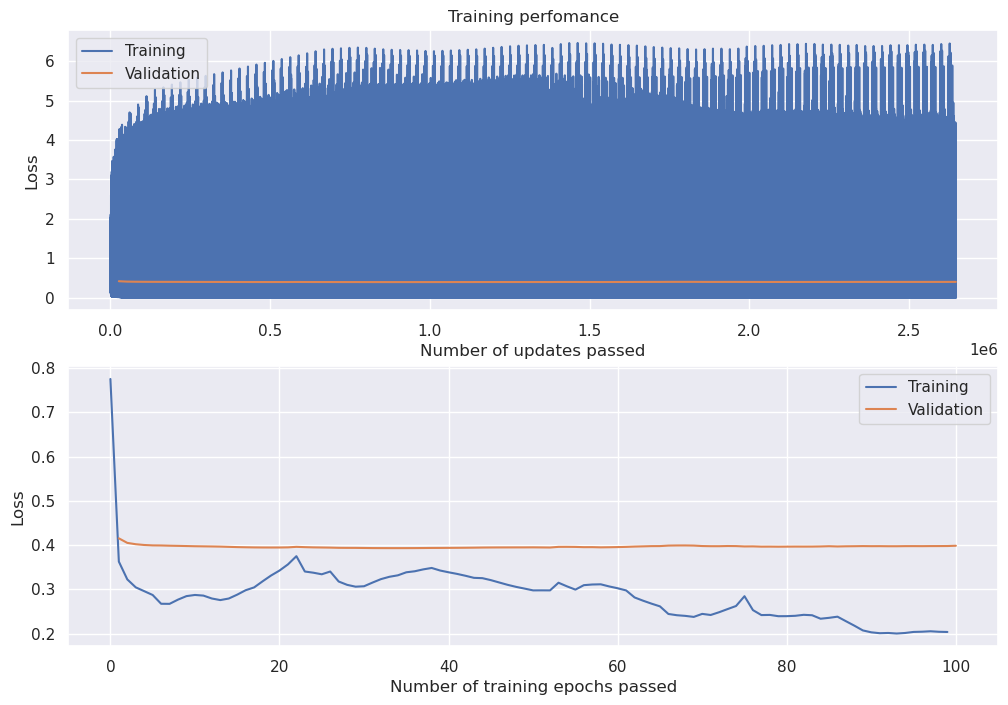

In [13]:
optimizer1.plot_errors()

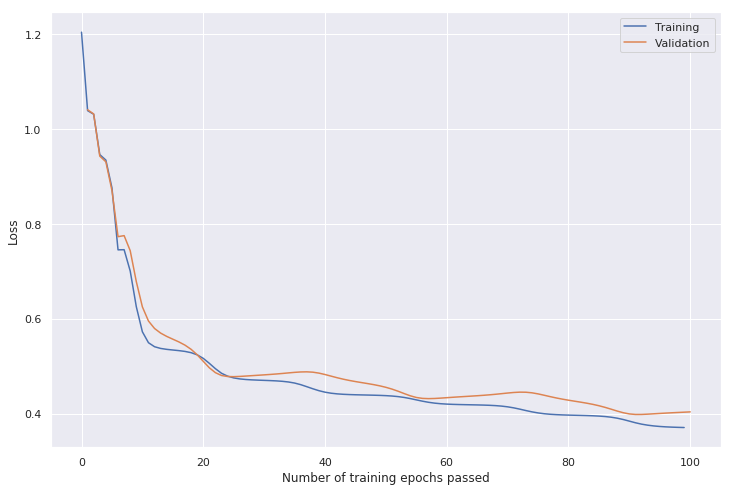

In [32]:
optimizer2.plot_errors()

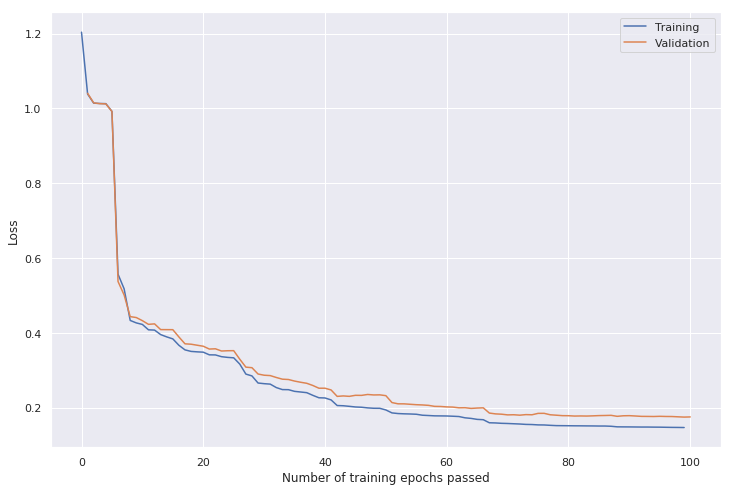

In [33]:
optimizer3.plot_errors()

In [34]:
print("SGD bs=1; test_loss = {:.4f}\nFletcher; test_loss = {:.4f}\nPolak; test_loss = {:.4f}\n".format(optimizer1.score(X_test, y_test),
optimizer2.score(X_test, y_test), optimizer3.score(X_test, y_test)))


                                                                               

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

SGD bs=1; test_loss = 0.2590
Fletcher; test_loss = 0.3394
Polak; test_loss = 0.1427



### в) Выводы
Метод Polac даёт пока лучшие результаты

## 4.5. Исследование метода AdaGrad

|№ п/п|Метод|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|-----|-------------------|---------------------------|--------------------------|
|1|AdaGrad|1000|0.16|0.16|

In [35]:
from neupy import init
"""
    prepare computational graph
"""
#clear session to erase old computational graph
tf.keras.backend.clear_session()

X_train = tf.Variable(train_dset.X.values, dtype=tf.float32, trainable = False)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32, trainable = False)

X_test = tf.Variable(df.loc[test_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_test = tf.Variable(df.loc[test_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

X_val = tf.Variable(df.loc[val_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_val = tf.Variable(df.loc[val_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

np.random.seed(221)

network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)

x = tf.placeholder(tf.float32, shape=(bs, X_train.shape[1]))
y = tf.placeholder(tf.float32, shape=(bs, ))

training_output = network.output(x, training=True)
training_output = tf.reshape(training_output, shape = (bs, ))
loss = tf.keras.losses.MSE(y, training_output)

# next we will change only optimizer, i.e. next line
optimizer = tf.train.AdagradOptimizer(0.1)
gvs = optimizer.compute_gradients(loss)
apply_gr = optimizer.apply_gradients(gvs)
    
total_tr_output = network.output(X_train, training=False)
total_tr_output = tf.reshape(total_tr_output, shape = (X_train.shape[0], ))
tr_loss = tf.keras.losses.MSE(y_train, total_tr_output)

total_val_output = network.output(X_val, training=False)
total_val_output = tf.reshape(total_val_output, shape = (X_val.shape[0], ))
val_loss = tf.keras.losses.MSE(y_val, total_val_output)

total_test_output = network.output(X_test, training=False)
total_test_output = tf.reshape(total_test_output, shape = (X_test.shape[0], ))
test_loss = tf.keras.losses.MSE(y_test, total_test_output)

init = tf.global_variables_initializer()   

Instructions for updating:
Use tf.cast instead.


In [36]:
train_err = []
val_err = []
alpha_i_1 = []
alpha_i_2 = []
alpha_i_3 = []
alpha_min = []
alpha_max = []
alpha_mean = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        
        # The `iter_batches` function has to be defined by the user
        for _, (x_batch, y_batch) in enumerate(train_dset):
            
            #compute grads
            grad_vals = sess.run([grad[0] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #compute vals
            w_pred = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #reshape
            grad_vals = np.concatenate([np.reshape(grad_vals[i], -1) for i in range(len(grad_vals))], axis = None)
            w_pred = np.concatenate([np.reshape(w_pred[i], -1) for i in range(len(w_pred))], axis = None)
            
            #minimize loss, one step
            _ = sess.run([apply_gr], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = np.concatenate([np.reshape(w_next[i], -1) for i in range(len(w_next))], axis = None)
            
            #cummulative statistics
            alpha = (w_pred-w_next)/grad_vals
            alpha_i_1.append(alpha[3])
            alpha_i_2.append(alpha[5])
            alpha_i_3.append(alpha[7])
            alpha_min.append(np.min(alpha))
            alpha_max.append(np.max(alpha))
            alpha_mean.append(np.mean(alpha))
            
        training_loss = sess.run(tr_loss)
        valid_loss = sess.run(val_loss)
        
        if valid_loss < 0.1:
            break
        
        train_err.append(training_loss)
        val_err.append(valid_loss)
        print('Training loss (epoch #{}): {:.6f}; Valid loss: {:.6f}'.format(epoch + 1, training_loss, valid_loss))
        
    test_loss = sess.run(test_loss)
    print('Test loss: {:.6f}'.format(test_loss))

Training loss (epoch #1): 1.320855; Valid loss: 1.327887
Training loss (epoch #2): 1.144056; Valid loss: 1.142740
Training loss (epoch #3): 1.053836; Valid loss: 1.056630
Training loss (epoch #4): 1.030648; Valid loss: 1.031336
Training loss (epoch #5): 1.023646; Valid loss: 1.025003
Training loss (epoch #6): 1.019819; Valid loss: 1.020698
Training loss (epoch #7): 1.016598; Valid loss: 1.017480
Training loss (epoch #8): 1.013497; Valid loss: 1.014186
Training loss (epoch #9): 1.010415; Valid loss: 1.010996
Training loss (epoch #10): 1.007327; Valid loss: 1.007766
Training loss (epoch #11): 1.004214; Valid loss: 1.004529
Training loss (epoch #12): 1.001065; Valid loss: 1.001251
Training loss (epoch #13): 0.997868; Valid loss: 0.997929
Training loss (epoch #14): 0.994610; Valid loss: 0.994547
Training loss (epoch #15): 0.991279; Valid loss: 0.991093
Training loss (epoch #16): 0.987861; Valid loss: 0.987555
Training loss (epoch #17): 0.984345; Valid loss: 0.983921
Training loss (epoch #1

Training loss (epoch #189): 0.326161; Valid loss: 0.341989
Training loss (epoch #190): 0.325634; Valid loss: 0.341510
Training loss (epoch #191): 0.325108; Valid loss: 0.341041
Training loss (epoch #192): 0.324582; Valid loss: 0.340563
Training loss (epoch #193): 0.324056; Valid loss: 0.340097
Training loss (epoch #194): 0.323530; Valid loss: 0.339619
Training loss (epoch #195): 0.323004; Valid loss: 0.339157
Training loss (epoch #196): 0.322478; Valid loss: 0.338679
Training loss (epoch #197): 0.321952; Valid loss: 0.338220
Training loss (epoch #198): 0.321426; Valid loss: 0.337741
Training loss (epoch #199): 0.320900; Valid loss: 0.337287
Training loss (epoch #200): 0.320374; Valid loss: 0.336805
Training loss (epoch #201): 0.319848; Valid loss: 0.336356
Training loss (epoch #202): 0.319322; Valid loss: 0.335872
Training loss (epoch #203): 0.318795; Valid loss: 0.335429
Training loss (epoch #204): 0.318269; Valid loss: 0.334941
Training loss (epoch #205): 0.317742; Valid loss: 0.3345

Training loss (epoch #376): 0.239544; Valid loss: 0.265995
Training loss (epoch #377): 0.239201; Valid loss: 0.265737
Training loss (epoch #378): 0.238859; Valid loss: 0.265370
Training loss (epoch #379): 0.238518; Valid loss: 0.265124
Training loss (epoch #380): 0.238179; Valid loss: 0.264749
Training loss (epoch #381): 0.237842; Valid loss: 0.264516
Training loss (epoch #382): 0.237505; Valid loss: 0.264132
Training loss (epoch #383): 0.237171; Valid loss: 0.263915
Training loss (epoch #384): 0.236837; Valid loss: 0.263518
Training loss (epoch #385): 0.236505; Valid loss: 0.263320
Training loss (epoch #386): 0.236175; Valid loss: 0.262907
Training loss (epoch #387): 0.235846; Valid loss: 0.262732
Training loss (epoch #388): 0.235518; Valid loss: 0.262299
Training loss (epoch #389): 0.235192; Valid loss: 0.262151
Training loss (epoch #390): 0.234867; Valid loss: 0.261692
Training loss (epoch #391): 0.234544; Valid loss: 0.261580
Training loss (epoch #392): 0.234223; Valid loss: 0.2610

Training loss (epoch #536): 0.199831; Valid loss: 0.229866
Training loss (epoch #537): 0.199647; Valid loss: 0.229709
Training loss (epoch #538): 0.199462; Valid loss: 0.229537
Training loss (epoch #539): 0.199279; Valid loss: 0.229382
Training loss (epoch #540): 0.199096; Valid loss: 0.229211
Training loss (epoch #541): 0.198913; Valid loss: 0.229057
Training loss (epoch #542): 0.198732; Valid loss: 0.228888
Training loss (epoch #543): 0.198551; Valid loss: 0.228735
Training loss (epoch #544): 0.198370; Valid loss: 0.228567
Training loss (epoch #545): 0.198190; Valid loss: 0.228415
Training loss (epoch #546): 0.198011; Valid loss: 0.228249
Training loss (epoch #547): 0.197833; Valid loss: 0.228098
Training loss (epoch #548): 0.197655; Valid loss: 0.227933
Training loss (epoch #549): 0.197478; Valid loss: 0.227783
Training loss (epoch #550): 0.197302; Valid loss: 0.227619
Training loss (epoch #551): 0.197126; Valid loss: 0.227471
Training loss (epoch #552): 0.196951; Valid loss: 0.2273

Training loss (epoch #713): 0.177108; Valid loss: 0.211250
Training loss (epoch #714): 0.176948; Valid loss: 0.209203
Training loss (epoch #715): 0.176801; Valid loss: 0.210818
Training loss (epoch #716): 0.176664; Valid loss: 0.209092
Training loss (epoch #717): 0.176536; Valid loss: 0.210454
Training loss (epoch #718): 0.176414; Valid loss: 0.208993
Training loss (epoch #719): 0.176299; Valid loss: 0.210141
Training loss (epoch #720): 0.176190; Valid loss: 0.208900
Training loss (epoch #721): 0.176084; Valid loss: 0.209867
Training loss (epoch #722): 0.175983; Valid loss: 0.208809
Training loss (epoch #723): 0.175885; Valid loss: 0.209623
Training loss (epoch #724): 0.175789; Valid loss: 0.208719
Training loss (epoch #725): 0.175696; Valid loss: 0.209403
Training loss (epoch #726): 0.175605; Valid loss: 0.208627
Training loss (epoch #727): 0.175516; Valid loss: 0.209201
Training loss (epoch #728): 0.175428; Valid loss: 0.208532
Training loss (epoch #729): 0.175341; Valid loss: 0.2090

Training loss (epoch #873): 0.165872; Valid loss: 0.201752
Training loss (epoch #874): 0.165817; Valid loss: 0.201714
Training loss (epoch #875): 0.165762; Valid loss: 0.201676
Training loss (epoch #876): 0.165707; Valid loss: 0.201637
Training loss (epoch #877): 0.165653; Valid loss: 0.201600
Training loss (epoch #878): 0.165598; Valid loss: 0.201562
Training loss (epoch #879): 0.165544; Valid loss: 0.201524
Training loss (epoch #880): 0.165489; Valid loss: 0.201486
Training loss (epoch #881): 0.165435; Valid loss: 0.201449
Training loss (epoch #882): 0.165381; Valid loss: 0.201411
Training loss (epoch #883): 0.165326; Valid loss: 0.201374
Training loss (epoch #884): 0.165272; Valid loss: 0.201336
Training loss (epoch #885): 0.165218; Valid loss: 0.201299
Training loss (epoch #886): 0.165165; Valid loss: 0.201262
Training loss (epoch #887): 0.165111; Valid loss: 0.201225
Training loss (epoch #888): 0.165057; Valid loss: 0.201188
Training loss (epoch #889): 0.165003; Valid loss: 0.2011

In [37]:
print('Test loss: {:.6f}'.format(test_loss))

Test loss: 0.157555


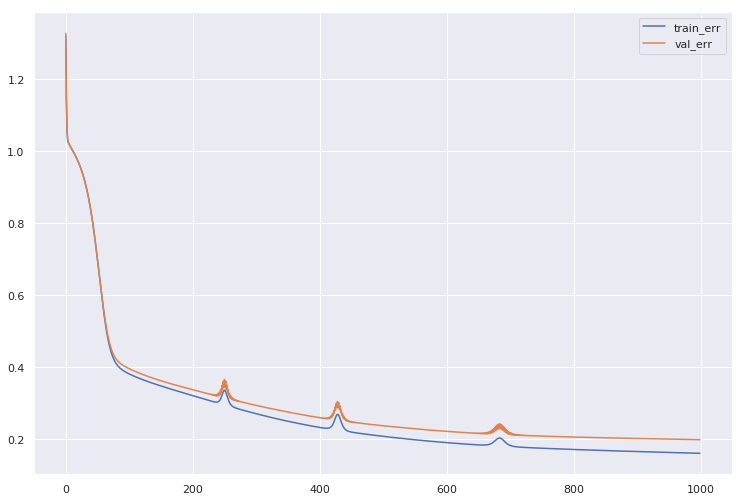

In [38]:
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])

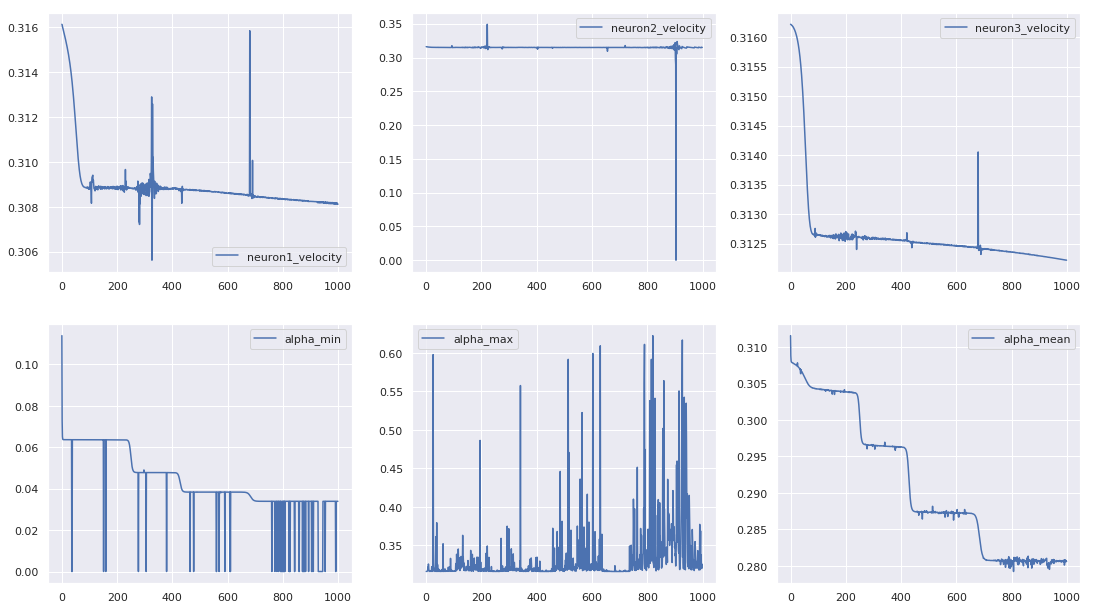

In [39]:
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

### в) Выводы
AdaGrad сходится куда медленнее предыдущих алгоритмов. По графикам скоростей обучения можно сделать вывод, что скорость обучения нейронов уменьшаются стремятся к константе

## 4.6. Исследование методов RMSProp и AdaDelta

|№ п/п|Метод|Параметр сглаживания, rho|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|-----|-------------------------|-------------------|---------------------------|--------------------------|
|1|RMSProp|0.00|1000|0.70|0.78|
|2|AdaDelta|0.00|1000|0.52|0.49|
|3|RMSProp|0.50|1000|0.09|0.22|
|4|AdaDelta|0.50|1000|0.59|0.54|
|5|RMSProp|0.80|1000|0.09|0.20|
|6|AdaDelta|0.80|1000|0.73|0.63|
|7|RMSProp|0.90|1000|0.09|0.21|
|8|AdaDelta|0.90|1000|0.87|0.73|

## RMSProp

In [58]:
from neupy import init
"""
    prepare computational graph
"""
#clear session to erase old computational graph
tf.keras.backend.clear_session()

X_train = tf.Variable(train_dset.X.values, dtype=tf.float32, trainable = False)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32, trainable = False)

X_test = tf.Variable(df.loc[test_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_test = tf.Variable(df.loc[test_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

X_val = tf.Variable(df.loc[val_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_val = tf.Variable(df.loc[val_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

np.random.seed(221)

network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)

x = tf.placeholder(tf.float32, shape=(bs, X_train.shape[1]))
y = tf.placeholder(tf.float32, shape=(bs, ))

training_output = network.output(x, training=True)
training_output = tf.reshape(training_output, shape = (bs, ))
loss = tf.keras.losses.MSE(y, training_output)

# next we will change only optimizer, i.e. next line
optimizer = tf.train.RMSPropOptimizer(0.1, decay=0.8)
gvs = optimizer.compute_gradients(loss)
apply_gr = optimizer.apply_gradients(gvs)
    
total_tr_output = network.output(X_train, training=False)
total_tr_output = tf.reshape(total_tr_output, shape = (X_train.shape[0], ))
tr_loss = tf.keras.losses.MSE(y_train, total_tr_output)

total_val_output = network.output(X_val, training=False)
total_val_output = tf.reshape(total_val_output, shape = (X_val.shape[0], ))
val_loss = tf.keras.losses.MSE(y_val, total_val_output)

total_test_output = network.output(X_test, training=False)
total_test_output = tf.reshape(total_test_output, shape = (X_test.shape[0], ))
test_loss = tf.keras.losses.MSE(y_test, total_test_output)

init = tf.global_variables_initializer()   

In [78]:
from neupy import init
"""
    prepare computational graph
"""
#clear session to erase old computational graph
tf.keras.backend.clear_session()

X_train = tf.Variable(train_dset.X.values, dtype=tf.float32, trainable = False)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32, trainable = False)

X_test = tf.Variable(df.loc[test_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_test = tf.Variable(df.loc[test_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

X_val = tf.Variable(df.loc[val_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_val = tf.Variable(df.loc[val_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

np.random.seed(221)

network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)

x = tf.placeholder(tf.float32, shape=(bs, X_train.shape[1]))
y = tf.placeholder(tf.float32, shape=(bs, ))

training_output = network.output(x, training=True)
training_output = tf.reshape(training_output, shape = (bs, ))
loss = tf.keras.losses.MSE(y, training_output)

# next we will change only optimizer, i.e. next line
optimizer = tf.train.AdadeltaOptimizer(0.1, rho=0.9)
gvs = optimizer.compute_gradients(loss)
apply_gr = optimizer.apply_gradients(gvs)
    
total_tr_output = network.output(X_train, training=False)
total_tr_output = tf.reshape(total_tr_output, shape = (X_train.shape[0], ))
tr_loss = tf.keras.losses.MSE(y_train, total_tr_output)

total_val_output = network.output(X_val, training=False)
total_val_output = tf.reshape(total_val_output, shape = (X_val.shape[0], ))
val_loss = tf.keras.losses.MSE(y_val, total_val_output)

total_test_output = network.output(X_test, training=False)
total_test_output = tf.reshape(total_test_output, shape = (X_test.shape[0], ))
test_loss = tf.keras.losses.MSE(y_test, total_test_output)

init = tf.global_variables_initializer()   

In [79]:
train_err = []
val_err = []
alpha_i_1 = []
alpha_i_2 = []
alpha_i_3 = []
alpha_min = []
alpha_max = []
alpha_mean = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        
        # The `iter_batches` function has to be defined by the user
        for _, (x_batch, y_batch) in enumerate(train_dset):
            
            #compute grads
            grad_vals = sess.run([grad[0] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #compute vals
            w_pred = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #reshape
            grad_vals = np.concatenate([np.reshape(grad_vals[i], -1) for i in range(len(grad_vals))], axis = None)
            w_pred = np.concatenate([np.reshape(w_pred[i], -1) for i in range(len(w_pred))], axis = None)
            
            #minimize loss, one step
            _ = sess.run([apply_gr], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = np.concatenate([np.reshape(w_next[i], -1) for i in range(len(w_next))], axis = None)
            
            #cummulative statistics
            alpha = (w_pred-w_next)/grad_vals
            alpha_i_1.append(alpha[3])
            alpha_i_2.append(alpha[5])
            alpha_i_3.append(alpha[7])
            alpha_min.append(np.min(alpha))
            alpha_max.append(np.max(alpha))
            alpha_mean.append(np.mean(alpha))
            
        training_loss = sess.run(tr_loss)
        valid_loss = sess.run(val_loss)
        
        if valid_loss < 0.1:
            break
        
        train_err.append(training_loss)
        val_err.append(valid_loss)
        print('Training loss (epoch #{}): {:.6f}; Valid loss: {:.6f}'.format(epoch + 1, training_loss, valid_loss))
        
    test_loss = sess.run(test_loss)
    print('Test loss: {:.6f}'.format(test_loss))

Training loss (epoch #1): 1.203227; Valid loss: 1.201248
Training loss (epoch #2): 1.202690; Valid loss: 1.200717
Training loss (epoch #3): 1.202145; Valid loss: 1.200179
Training loss (epoch #4): 1.201594; Valid loss: 1.199634
Training loss (epoch #5): 1.201039; Valid loss: 1.199086
Training loss (epoch #6): 1.200481; Valid loss: 1.198533
Training loss (epoch #7): 1.199919; Valid loss: 1.197978
Training loss (epoch #8): 1.199355; Valid loss: 1.197420
Training loss (epoch #9): 1.198789; Valid loss: 1.196861
Training loss (epoch #10): 1.198220; Valid loss: 1.196299
Training loss (epoch #11): 1.197651; Valid loss: 1.195736
Training loss (epoch #12): 1.197079; Valid loss: 1.195171
Training loss (epoch #13): 1.196507; Valid loss: 1.194605
Training loss (epoch #14): 1.195933; Valid loss: 1.194038
Training loss (epoch #15): 1.195358; Valid loss: 1.193470
Training loss (epoch #16): 1.194783; Valid loss: 1.192901
Training loss (epoch #17): 1.194206; Valid loss: 1.192331
Training loss (epoch #1

Training loss (epoch #196): 1.097150; Valid loss: 1.096573
Training loss (epoch #197): 1.096692; Valid loss: 1.096122
Training loss (epoch #198): 1.096235; Valid loss: 1.095673
Training loss (epoch #199): 1.095780; Valid loss: 1.095225
Training loss (epoch #200): 1.095326; Valid loss: 1.094778
Training loss (epoch #201): 1.094873; Valid loss: 1.094332
Training loss (epoch #202): 1.094421; Valid loss: 1.093887
Training loss (epoch #203): 1.093971; Valid loss: 1.093444
Training loss (epoch #204): 1.093521; Valid loss: 1.093002
Training loss (epoch #205): 1.093074; Valid loss: 1.092562
Training loss (epoch #206): 1.092627; Valid loss: 1.092122
Training loss (epoch #207): 1.092182; Valid loss: 1.091684
Training loss (epoch #208): 1.091738; Valid loss: 1.091247
Training loss (epoch #209): 1.091295; Valid loss: 1.090812
Training loss (epoch #210): 1.090854; Valid loss: 1.090378
Training loss (epoch #211): 1.090413; Valid loss: 1.089945
Training loss (epoch #212): 1.089975; Valid loss: 1.0895

Training loss (epoch #357): 1.040233; Valid loss: 1.040666
Training loss (epoch #358): 1.039980; Valid loss: 1.040417
Training loss (epoch #359): 1.039728; Valid loss: 1.040169
Training loss (epoch #360): 1.039477; Valid loss: 1.039922
Training loss (epoch #361): 1.039227; Valid loss: 1.039677
Training loss (epoch #362): 1.038978; Valid loss: 1.039432
Training loss (epoch #363): 1.038730; Valid loss: 1.039188
Training loss (epoch #364): 1.038484; Valid loss: 1.038945
Training loss (epoch #365): 1.038238; Valid loss: 1.038703
Training loss (epoch #366): 1.037993; Valid loss: 1.038463
Training loss (epoch #367): 1.037749; Valid loss: 1.038223
Training loss (epoch #368): 1.037506; Valid loss: 1.037984
Training loss (epoch #369): 1.037265; Valid loss: 1.037746
Training loss (epoch #370): 1.037024; Valid loss: 1.037509
Training loss (epoch #371): 1.036784; Valid loss: 1.037273
Training loss (epoch #372): 1.036545; Valid loss: 1.037038
Training loss (epoch #373): 1.036308; Valid loss: 1.0368

Training loss (epoch #533): 1.007052; Valid loss: 1.007640
Training loss (epoch #534): 1.006896; Valid loss: 1.007482
Training loss (epoch #535): 1.006741; Valid loss: 1.007323
Training loss (epoch #536): 1.006585; Valid loss: 1.007164
Training loss (epoch #537): 1.006430; Valid loss: 1.007005
Training loss (epoch #538): 1.006274; Valid loss: 1.006845
Training loss (epoch #539): 1.006119; Valid loss: 1.006686
Training loss (epoch #540): 1.005963; Valid loss: 1.006527
Training loss (epoch #541): 1.005807; Valid loss: 1.006368
Training loss (epoch #542): 1.005652; Valid loss: 1.006208
Training loss (epoch #543): 1.005496; Valid loss: 1.006049
Training loss (epoch #544): 1.005341; Valid loss: 1.005889
Training loss (epoch #545): 1.005185; Valid loss: 1.005730
Training loss (epoch #546): 1.005029; Valid loss: 1.005570
Training loss (epoch #547): 1.004873; Valid loss: 1.005410
Training loss (epoch #548): 1.004717; Valid loss: 1.005250
Training loss (epoch #549): 1.004561; Valid loss: 1.0050

Training loss (epoch #708): 0.976307; Valid loss: 0.975857
Training loss (epoch #709): 0.976091; Valid loss: 0.975633
Training loss (epoch #710): 0.975875; Valid loss: 0.975410
Training loss (epoch #711): 0.975658; Valid loss: 0.975185
Training loss (epoch #712): 0.975439; Valid loss: 0.974960
Training loss (epoch #713): 0.975221; Valid loss: 0.974734
Training loss (epoch #714): 0.975002; Valid loss: 0.974508
Training loss (epoch #715): 0.974782; Valid loss: 0.974281
Training loss (epoch #716): 0.974561; Valid loss: 0.974053
Training loss (epoch #717): 0.974340; Valid loss: 0.973824
Training loss (epoch #718): 0.974118; Valid loss: 0.973595
Training loss (epoch #719): 0.973895; Valid loss: 0.973365
Training loss (epoch #720): 0.973672; Valid loss: 0.973135
Training loss (epoch #721): 0.973448; Valid loss: 0.972903
Training loss (epoch #722): 0.973223; Valid loss: 0.972672
Training loss (epoch #723): 0.972998; Valid loss: 0.972439
Training loss (epoch #724): 0.972772; Valid loss: 0.9722

Training loss (epoch #905): 0.915848; Valid loss: 0.914178
Training loss (epoch #906): 0.915415; Valid loss: 0.913740
Training loss (epoch #907): 0.914979; Valid loss: 0.913300
Training loss (epoch #908): 0.914542; Valid loss: 0.912859
Training loss (epoch #909): 0.914103; Valid loss: 0.912416
Training loss (epoch #910): 0.913663; Valid loss: 0.911971
Training loss (epoch #911): 0.913220; Valid loss: 0.911524
Training loss (epoch #912): 0.912776; Valid loss: 0.911076
Training loss (epoch #913): 0.912330; Valid loss: 0.910626
Training loss (epoch #914): 0.911882; Valid loss: 0.910174
Training loss (epoch #915): 0.911433; Valid loss: 0.909720
Training loss (epoch #916): 0.910981; Valid loss: 0.909265
Training loss (epoch #917): 0.910528; Valid loss: 0.908808
Training loss (epoch #918): 0.910073; Valid loss: 0.908349
Training loss (epoch #919): 0.909616; Valid loss: 0.907888
Training loss (epoch #920): 0.909158; Valid loss: 0.907426
Training loss (epoch #921): 0.908697; Valid loss: 0.9069

In [50]:
print('rho = 0.0; Test loss: {:.6f}'.format(test_loss))

rho = 0.0; Test loss: 0.768556


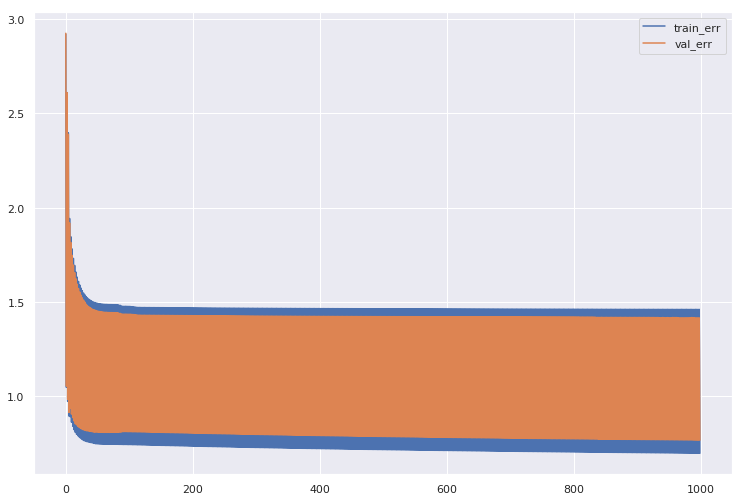

In [51]:
#rho= 0.0
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

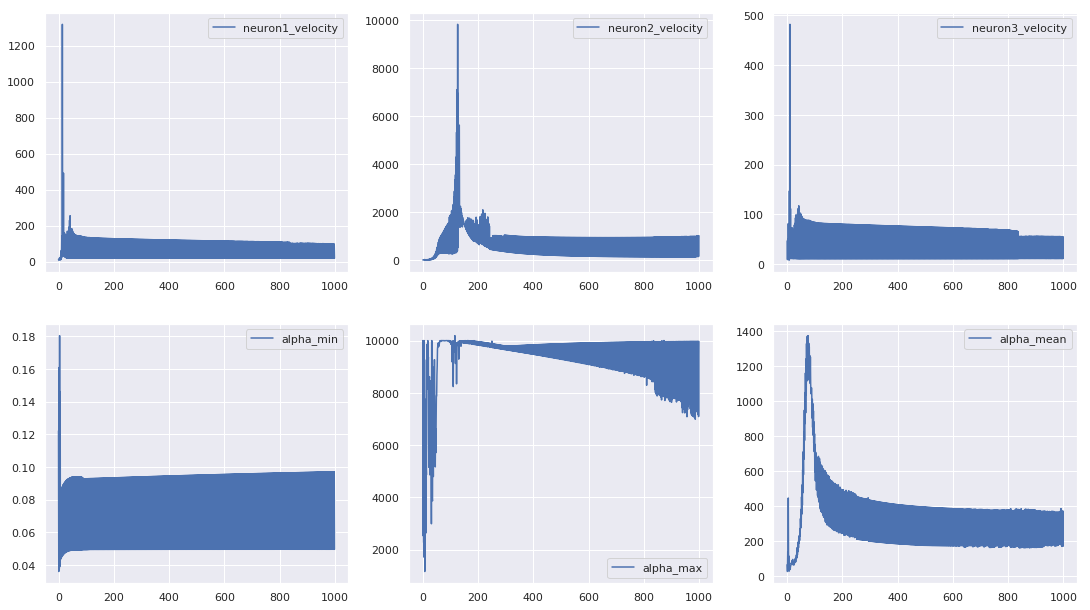

In [52]:
#rho= 0.0
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [55]:
print('rho = 0.5; Test loss: {:.6f}'.format(test_loss))

rho = 0.5; Test loss: 0.220786


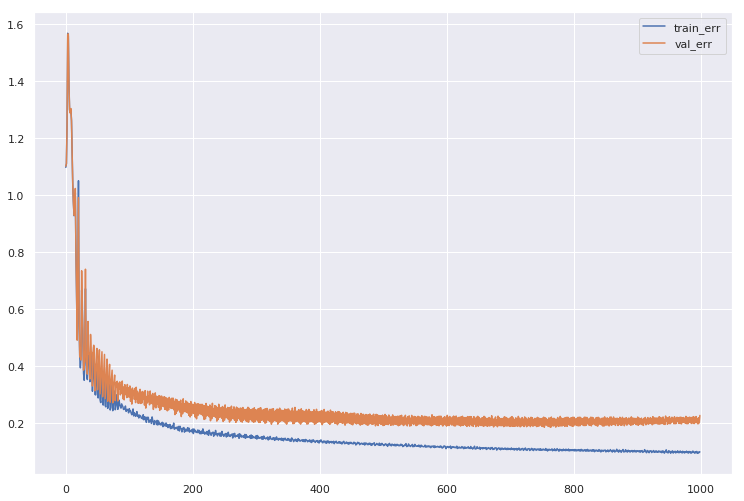

In [56]:
#rho= 0.5
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

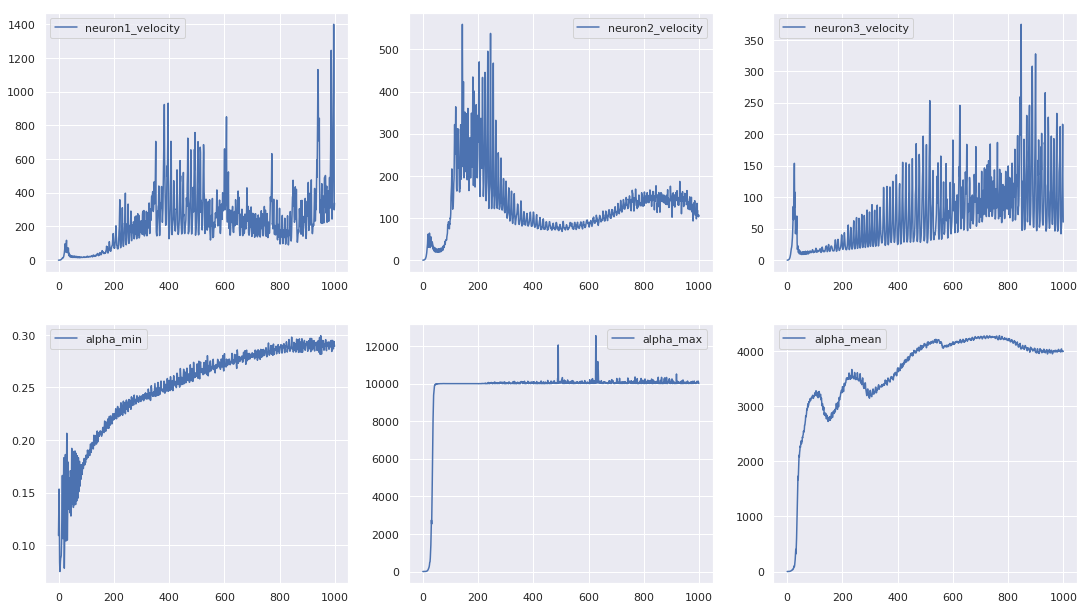

In [57]:
#rho= 0.5
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [60]:
print('rho = 0.8; Test loss: {:.6f}'.format(test_loss))

rho = 0.8; Test loss: 0.200322


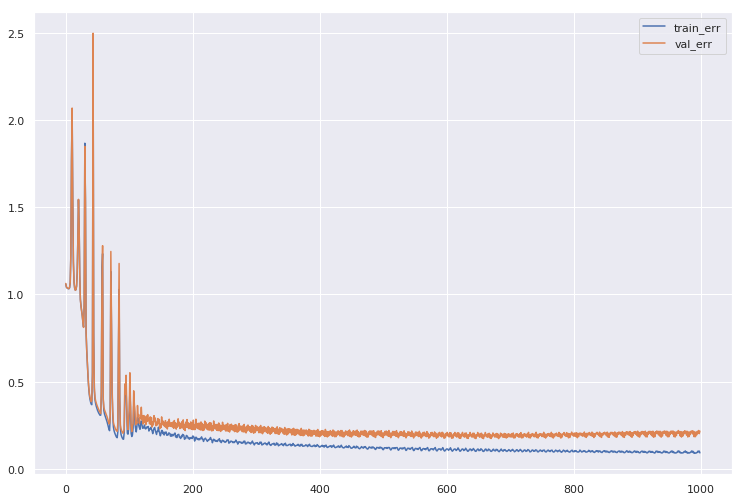

In [61]:
#rho= 0.8
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

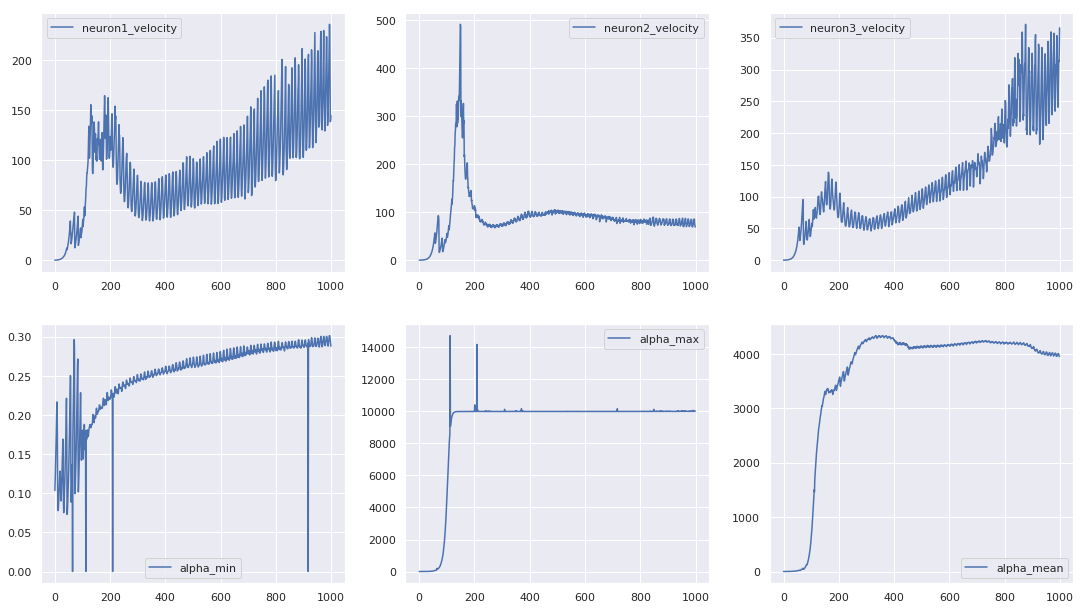

In [62]:
#rho= 0.8
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [45]:
print('rho = 0.9; Test loss: {:.6f}'.format(test_loss))

rho = 0.9; Test loss: 0.216473


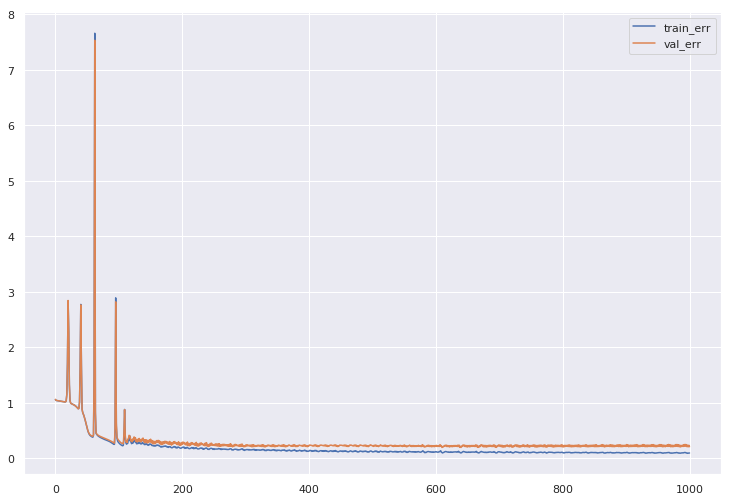

In [46]:
#rho= 0.9
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

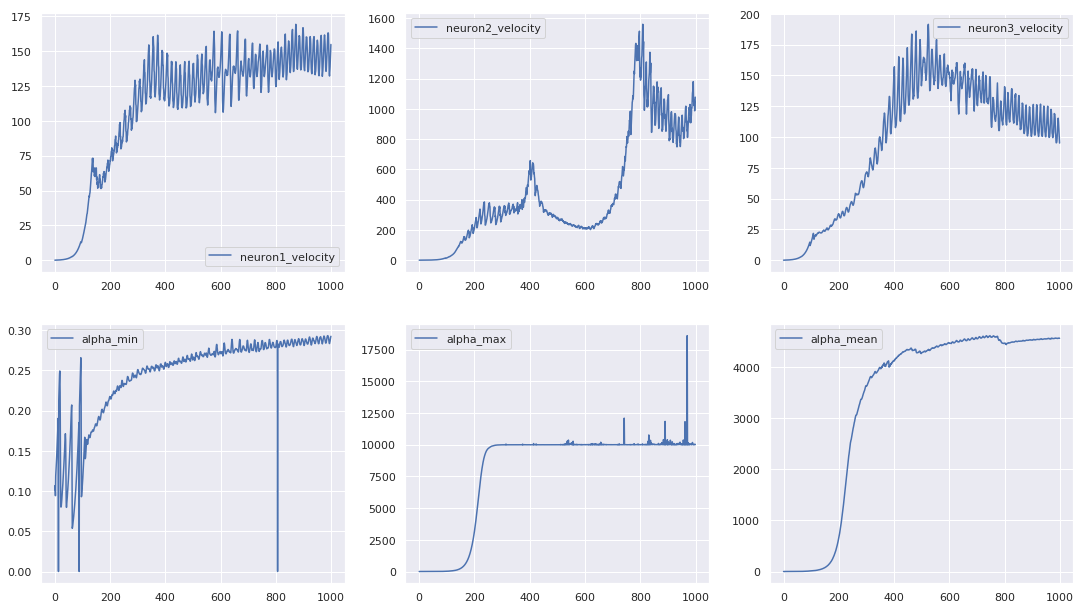

In [47]:
#rho= 0.9
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

## AdaDelta

In [65]:
print('rho = 0.0; Test loss: {:.6f}'.format(test_loss))

rho = 0.0; Test loss: 0.493618


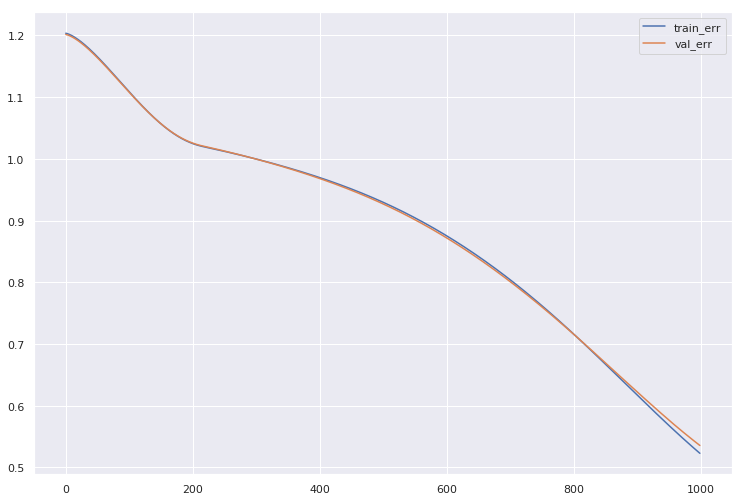

In [66]:
#rho= 0.0
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

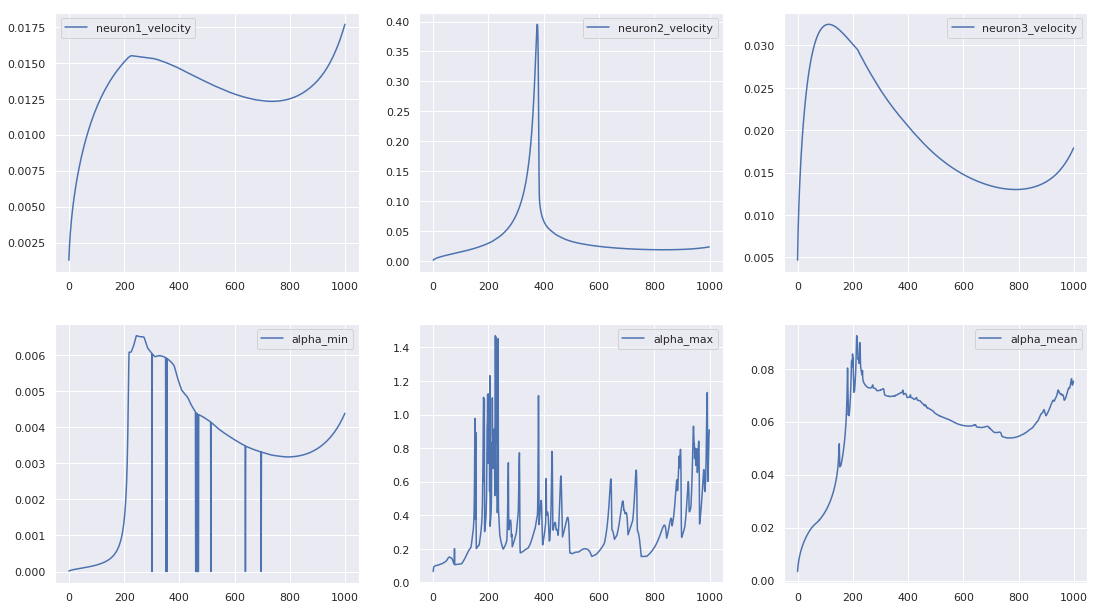

In [67]:
#rho= 0.0
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [70]:
print('rho = 0.5; Test loss: {:.6f}'.format(test_loss))

rho = 0.5; Test loss: 0.537494


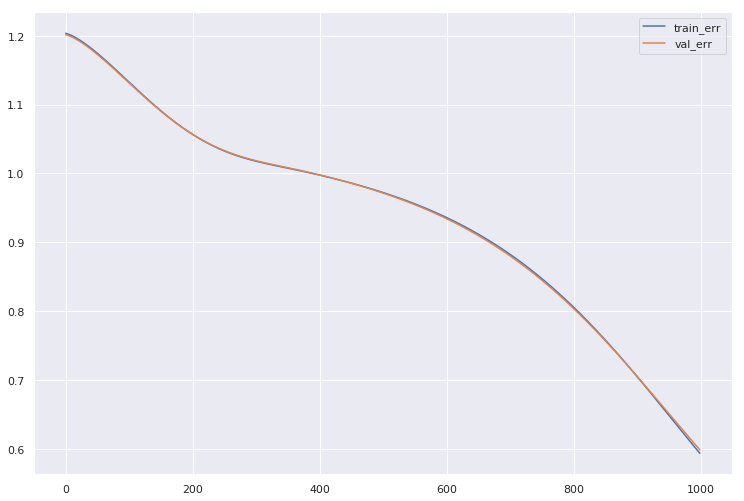

In [71]:
#rho= 0.5
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

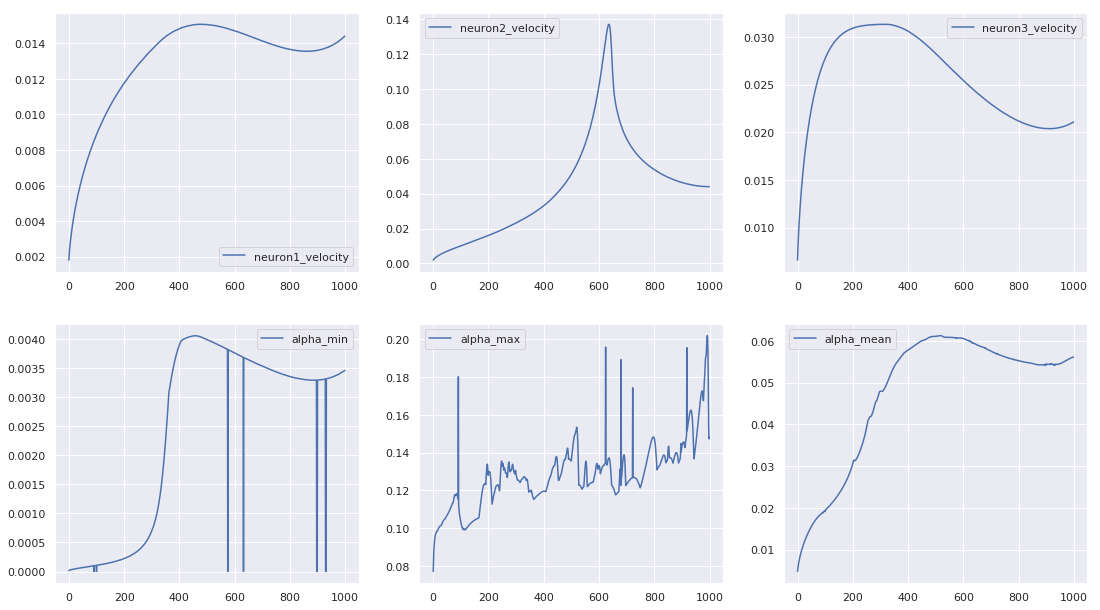

In [72]:
#rho= 0.5
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [75]:
print('rho = 0.8; Test loss: {:.6f}'.format(test_loss))

rho = 0.8; Test loss: 0.634910


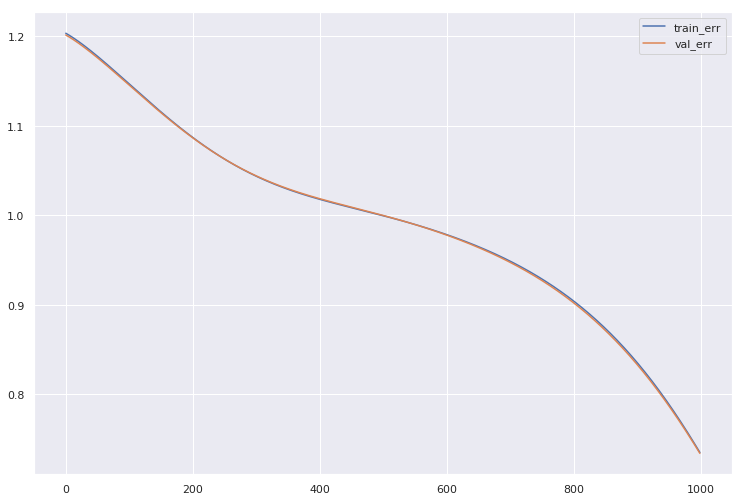

In [76]:
#rho= 0.8
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

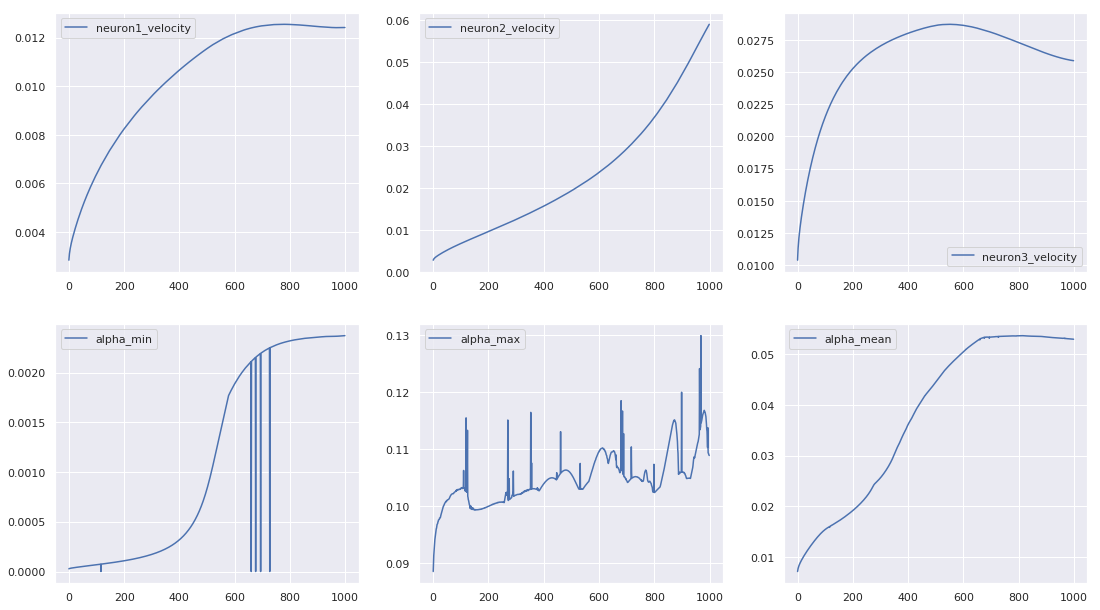

In [77]:
#rho= 0.8
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [80]:
print('rho = 0.9; Test loss: {:.6f}'.format(test_loss))

rho = 0.9; Test loss: 0.727716


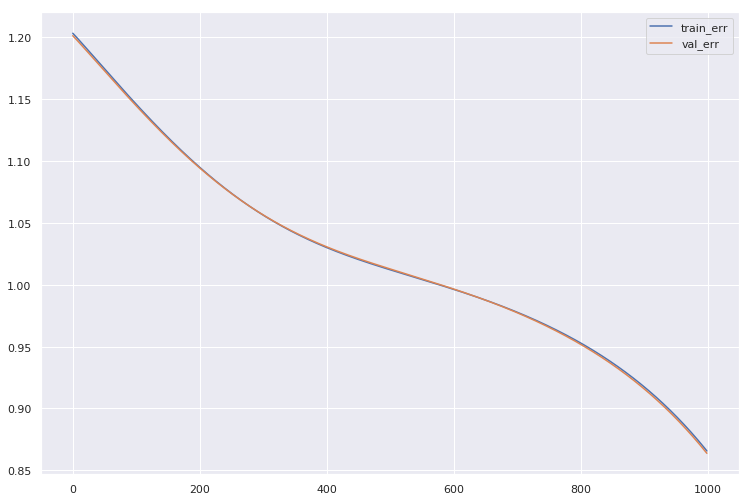

In [81]:
#rho= 0.9
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

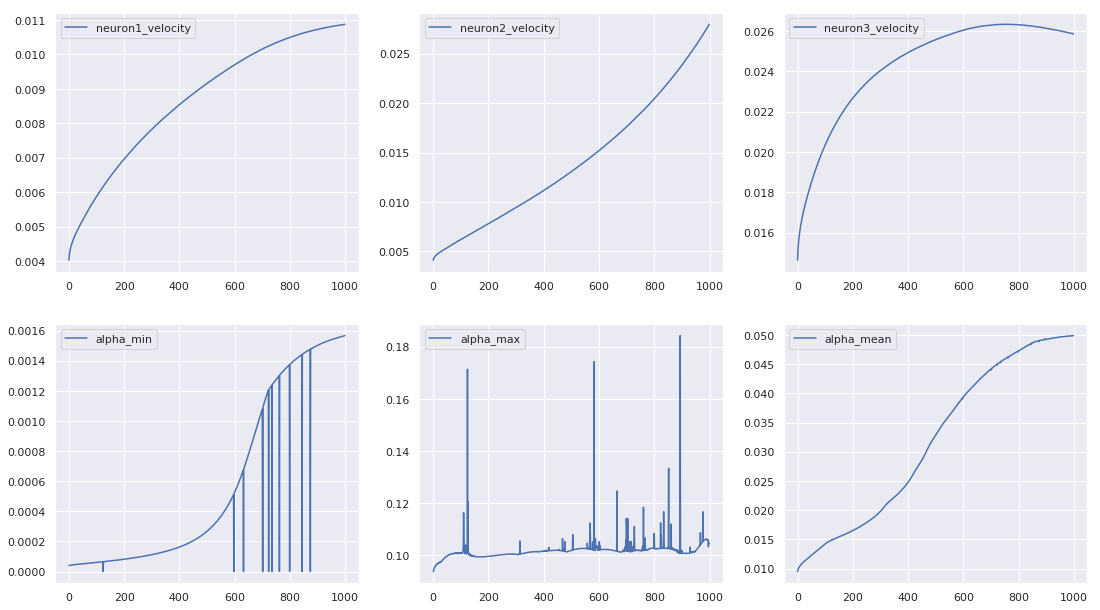

In [82]:
#rho= 0.9
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

### г) Выводы
RMSProp сходится достаточно быстро, в отличие от AdaDelta и даёт неплохие результаты

## 4.7. Исследование метода Adam

|№ п/п|beta_1|beta_2|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|------|------|-------------------|---------------------------|--------------------------|
|1|0.8|0.8|1000|0.02|0.09|
|2|0.9|0.9|1000|0.01|0.16|
|3|0.9|0.99|1000|0.01|0.17|
|4|0.99|0.9|1000|0.19|0.28|

In [98]:
from neupy import init
"""
    prepare computational graph
"""
#clear session to erase old computational graph
tf.keras.backend.clear_session()

X_train = tf.Variable(train_dset.X.values, dtype=tf.float32, trainable = False)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32, trainable = False)

X_test = tf.Variable(df.loc[test_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_test = tf.Variable(df.loc[test_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

X_val = tf.Variable(df.loc[val_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_val = tf.Variable(df.loc[val_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

np.random.seed(221)

network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)

x = tf.placeholder(tf.float32, shape=(bs, X_train.shape[1]))
y = tf.placeholder(tf.float32, shape=(bs, ))

training_output = network.output(x, training=True)
training_output = tf.reshape(training_output, shape = (bs, ))
loss = tf.keras.losses.MSE(y, training_output)

# next we will change only optimizer, i.e. next line
optimizer = tf.train.AdamOptimizer(0.1, beta1 = 0.99, beta2 = 0.9)
gvs = optimizer.compute_gradients(loss)
apply_gr = optimizer.apply_gradients(gvs)
    
total_tr_output = network.output(X_train, training=False)
total_tr_output = tf.reshape(total_tr_output, shape = (X_train.shape[0], ))
tr_loss = tf.keras.losses.MSE(y_train, total_tr_output)

total_val_output = network.output(X_val, training=False)
total_val_output = tf.reshape(total_val_output, shape = (X_val.shape[0], ))
val_loss = tf.keras.losses.MSE(y_val, total_val_output)

total_test_output = network.output(X_test, training=False)
total_test_output = tf.reshape(total_test_output, shape = (X_test.shape[0], ))
test_loss = tf.keras.losses.MSE(y_test, total_test_output)

init = tf.global_variables_initializer()   

In [99]:
train_err = []
val_err = []
alpha_i_1 = []
alpha_i_2 = []
alpha_i_3 = []
alpha_min = []
alpha_max = []
alpha_mean = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        
        # The `iter_batches` function has to be defined by the user
        for _, (x_batch, y_batch) in enumerate(train_dset):
            
            #compute grads
            grad_vals = sess.run([grad[0] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #compute vals
            w_pred = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            #reshape
            grad_vals = np.concatenate([np.reshape(grad_vals[i], -1) for i in range(len(grad_vals))], axis = None)
            w_pred = np.concatenate([np.reshape(w_pred[i], -1) for i in range(len(w_pred))], axis = None)
            
            #minimize loss, one step
            _ = sess.run([apply_gr], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = sess.run([grad[1] for grad in gvs], feed_dict={x: x_batch.values, y: y_batch.values})
            w_next = np.concatenate([np.reshape(w_next[i], -1) for i in range(len(w_next))], axis = None)
            
            #cummulative statistics
            alpha = (w_pred-w_next)/grad_vals
            alpha_i_1.append(alpha[3])
            alpha_i_2.append(alpha[5])
            alpha_i_3.append(alpha[7])
            alpha_min.append(np.min(alpha))
            alpha_max.append(np.max(alpha))
            alpha_mean.append(np.mean(alpha))
            
        training_loss = sess.run(tr_loss)
        valid_loss = sess.run(val_loss)
        
        if valid_loss < 0.1:
            break
        
        train_err.append(training_loss)
        val_err.append(valid_loss)
        print('Training loss (epoch #{}): {:.6f}; Valid loss: {:.6f}'.format(epoch + 1, training_loss, valid_loss))
        
    test_loss = sess.run(test_loss)
    print('Test loss: {:.6f}'.format(test_loss))

Training loss (epoch #1): 2.919886; Valid loss: 2.923557
Training loss (epoch #2): 1.348144; Valid loss: 1.351764
Training loss (epoch #3): 0.921320; Valid loss: 0.929230
Training loss (epoch #4): 1.295022; Valid loss: 1.306876
Training loss (epoch #5): 1.437752; Valid loss: 1.455874
Training loss (epoch #6): 1.283379; Valid loss: 1.306006
Training loss (epoch #7): 1.068573; Valid loss: 1.090962
Training loss (epoch #8): 0.912860; Valid loss: 0.931503
Training loss (epoch #9): 0.831236; Valid loss: 0.845180
Training loss (epoch #10): 0.800710; Valid loss: 0.810553
Training loss (epoch #11): 0.796851; Valid loss: 0.803628
Training loss (epoch #12): 0.803604; Valid loss: 0.808234
Training loss (epoch #13): 0.812181; Valid loss: 0.815276
Training loss (epoch #14): 0.817929; Valid loss: 0.819792
Training loss (epoch #15): 0.817996; Valid loss: 0.818711
Training loss (epoch #16): 0.810104; Valid loss: 0.809671
Training loss (epoch #17): 0.792213; Valid loss: 0.790689
Training loss (epoch #1

Training loss (epoch #193): 0.260875; Valid loss: 0.327068
Training loss (epoch #194): 0.259973; Valid loss: 0.329325
Training loss (epoch #195): 0.259357; Valid loss: 0.329549
Training loss (epoch #196): 0.258659; Valid loss: 0.329786
Training loss (epoch #197): 0.258487; Valid loss: 0.330040
Training loss (epoch #198): 0.258467; Valid loss: 0.330290
Training loss (epoch #199): 0.258498; Valid loss: 0.330460
Training loss (epoch #200): 0.258208; Valid loss: 0.330733
Training loss (epoch #201): 0.257949; Valid loss: 0.333243
Training loss (epoch #202): 0.257788; Valid loss: 0.341072
Training loss (epoch #203): 0.258108; Valid loss: 0.342309
Training loss (epoch #204): 0.258360; Valid loss: 0.341726
Training loss (epoch #205): 0.257703; Valid loss: 0.341197
Training loss (epoch #206): 0.256311; Valid loss: 0.345124
Training loss (epoch #207): 0.255005; Valid loss: 0.346340
Training loss (epoch #208): 0.253800; Valid loss: 0.341518
Training loss (epoch #209): 0.252963; Valid loss: 0.3370

Training loss (epoch #358): 0.207877; Valid loss: 0.281301
Training loss (epoch #359): 0.207218; Valid loss: 0.282723
Training loss (epoch #360): 0.207324; Valid loss: 0.283964
Training loss (epoch #361): 0.206549; Valid loss: 0.285692
Training loss (epoch #362): 0.206212; Valid loss: 0.287854
Training loss (epoch #363): 0.208421; Valid loss: 0.289853
Training loss (epoch #364): 0.208550; Valid loss: 0.291636
Training loss (epoch #365): 0.207551; Valid loss: 0.292935
Training loss (epoch #366): 0.207010; Valid loss: 0.297687
Training loss (epoch #367): 0.207110; Valid loss: 0.307428
Training loss (epoch #368): 0.206572; Valid loss: 0.309567
Training loss (epoch #369): 0.206045; Valid loss: 0.310015
Training loss (epoch #370): 0.206912; Valid loss: 0.312196
Training loss (epoch #371): 0.207471; Valid loss: 0.313977
Training loss (epoch #372): 0.207969; Valid loss: 0.315007
Training loss (epoch #373): 0.208091; Valid loss: 0.316423
Training loss (epoch #374): 0.208137; Valid loss: 0.3182

Training loss (epoch #517): 0.201255; Valid loss: 0.281429
Training loss (epoch #518): 0.201745; Valid loss: 0.282548
Training loss (epoch #519): 0.202121; Valid loss: 0.281274
Training loss (epoch #520): 0.202998; Valid loss: 0.279028
Training loss (epoch #521): 0.203407; Valid loss: 0.279539
Training loss (epoch #522): 0.204540; Valid loss: 0.280546
Training loss (epoch #523): 0.204951; Valid loss: 0.281213
Training loss (epoch #524): 0.205010; Valid loss: 0.281428
Training loss (epoch #525): 0.205027; Valid loss: 0.285209
Training loss (epoch #526): 0.208200; Valid loss: 0.287571
Training loss (epoch #527): 0.208088; Valid loss: 0.287650
Training loss (epoch #528): 0.209503; Valid loss: 0.287484
Training loss (epoch #529): 0.208968; Valid loss: 0.287184
Training loss (epoch #530): 0.207691; Valid loss: 0.287109
Training loss (epoch #531): 0.206129; Valid loss: 0.287717
Training loss (epoch #532): 0.204734; Valid loss: 0.286995
Training loss (epoch #533): 0.203259; Valid loss: 0.2865

Training loss (epoch #679): 0.196261; Valid loss: 0.301909
Training loss (epoch #680): 0.195899; Valid loss: 0.301280
Training loss (epoch #681): 0.195763; Valid loss: 0.300800
Training loss (epoch #682): 0.195304; Valid loss: 0.300255
Training loss (epoch #683): 0.194703; Valid loss: 0.299661
Training loss (epoch #684): 0.194001; Valid loss: 0.296768
Training loss (epoch #685): 0.193329; Valid loss: 0.296312
Training loss (epoch #686): 0.192842; Valid loss: 0.296004
Training loss (epoch #687): 0.192301; Valid loss: 0.295832
Training loss (epoch #688): 0.192290; Valid loss: 0.295904
Training loss (epoch #689): 0.191993; Valid loss: 0.295943
Training loss (epoch #690): 0.191049; Valid loss: 0.295988
Training loss (epoch #691): 0.190356; Valid loss: 0.295757
Training loss (epoch #692): 0.189685; Valid loss: 0.295153
Training loss (epoch #693): 0.189365; Valid loss: 0.294048
Training loss (epoch #694): 0.190006; Valid loss: 0.291607
Training loss (epoch #695): 0.191090; Valid loss: 0.2889

Training loss (epoch #850): 0.190643; Valid loss: 0.300125
Training loss (epoch #851): 0.190039; Valid loss: 0.299255
Training loss (epoch #852): 0.189882; Valid loss: 0.299236
Training loss (epoch #853): 0.189865; Valid loss: 0.299198
Training loss (epoch #854): 0.189679; Valid loss: 0.299192
Training loss (epoch #855): 0.189898; Valid loss: 0.299296
Training loss (epoch #856): 0.190226; Valid loss: 0.299929
Training loss (epoch #857): 0.190685; Valid loss: 0.301614
Training loss (epoch #858): 0.191219; Valid loss: 0.307288
Training loss (epoch #859): 0.191788; Valid loss: 0.308465
Training loss (epoch #860): 0.194412; Valid loss: 0.309265
Training loss (epoch #861): 0.192873; Valid loss: 0.309630
Training loss (epoch #862): 0.193401; Valid loss: 0.309579
Training loss (epoch #863): 0.194348; Valid loss: 0.306607
Training loss (epoch #864): 0.194444; Valid loss: 0.304767
Training loss (epoch #865): 0.192372; Valid loss: 0.298887
Training loss (epoch #866): 0.192363; Valid loss: 0.2984

In [85]:
print('beta1 = 0.8; beta2 = 0.8 Test loss: {:.6f}'.format(test_loss))

beta1 = 0.8; beta2 = 0.8 Test loss: 0.092640


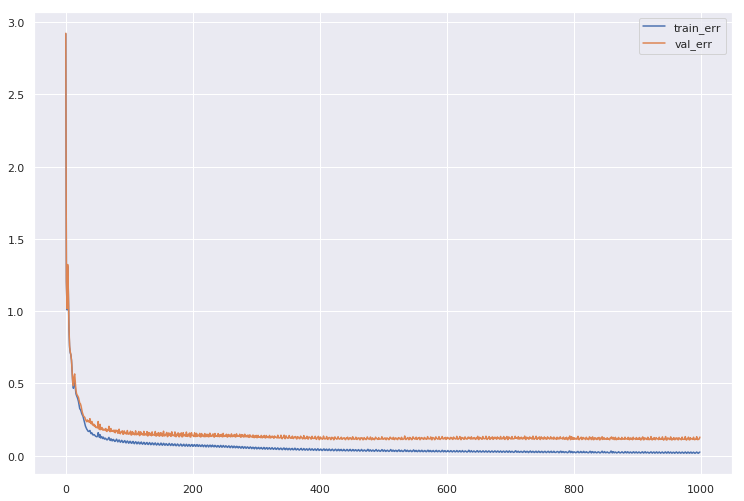

In [86]:
#beta1 = 0.8; beta2 = 0.8
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

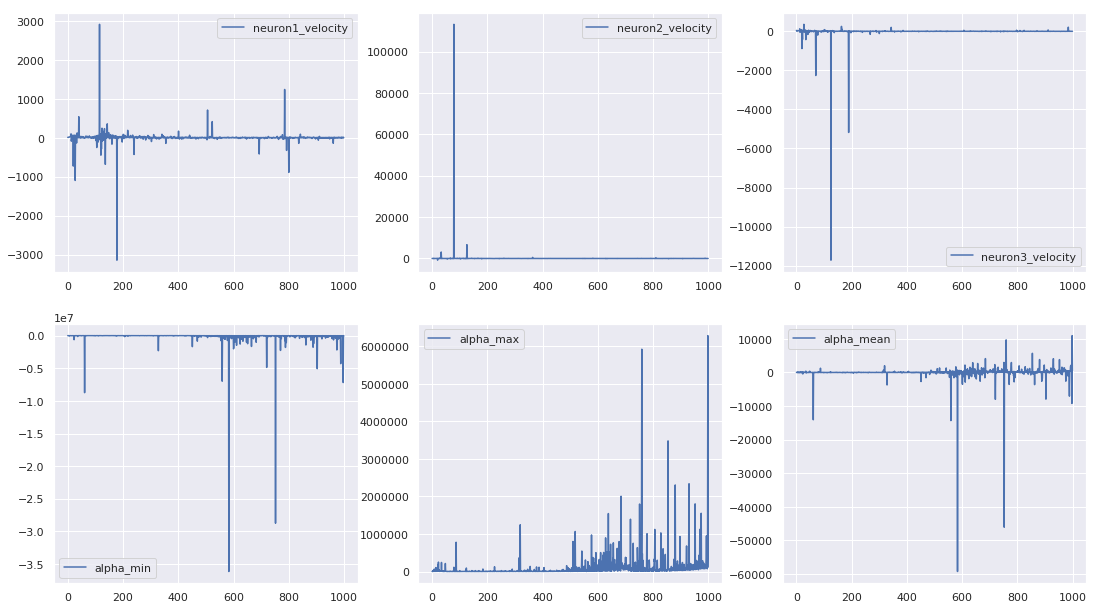

In [87]:
#beta1 = 0.8; beta2 = 0.8
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [90]:
print('beta1 = 0.9; beta2 = 0.9 Test loss: {:.6f}'.format(test_loss))

beta1 = 0.9; beta2 = 0.9 Test loss: 0.164635


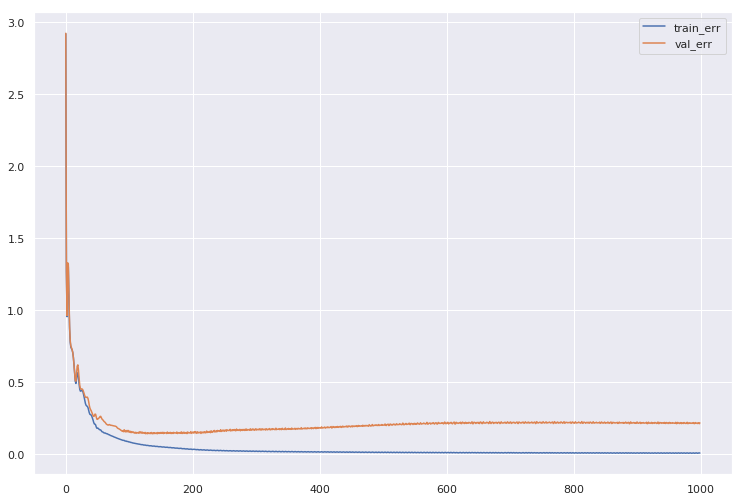

In [91]:
#beta1 = 0.9; beta2 = 0.9
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

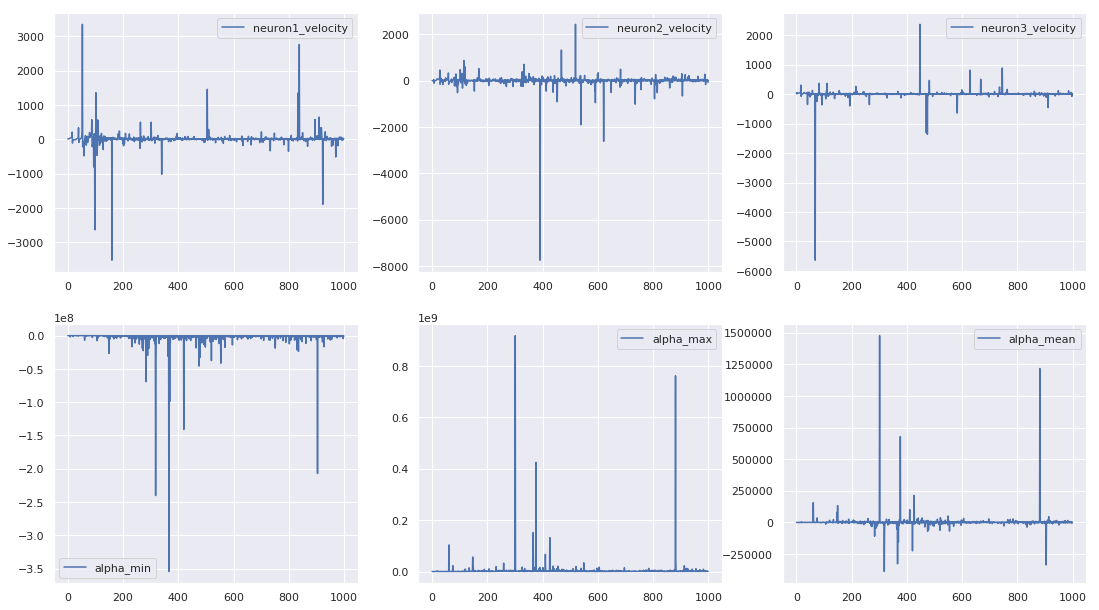

In [92]:
#beta1 = 0.9; beta2 = 0.9
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [95]:
print('beta1 = 0.9; beta2 = 0.99 Test loss: {:.6f}'.format(test_loss))

beta1 = 0.9; beta2 = 0.99 Test loss: 0.165647


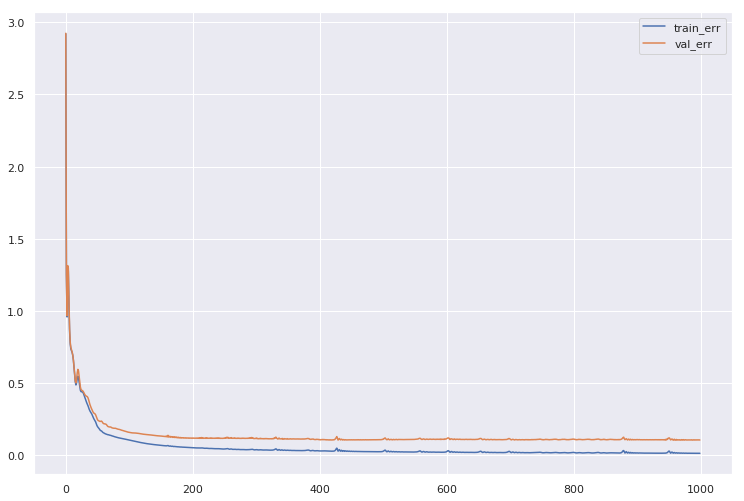

In [96]:
#beta1 = 0.9; beta2 = 0.99
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

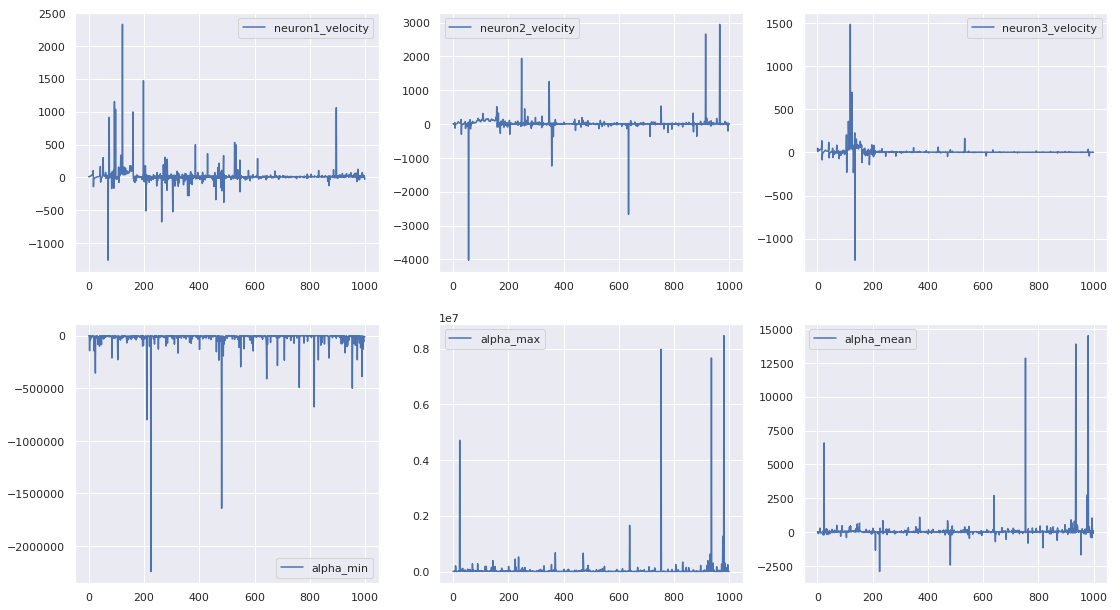

In [97]:
#beta1 = 0.9; beta2 = 0.99
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

In [100]:
print('beta1 = 0.99; beta2 = 0.9 Test loss: {:.6f}'.format(test_loss))

beta1 = 0.99; beta2 = 0.9 Test loss: 0.277197


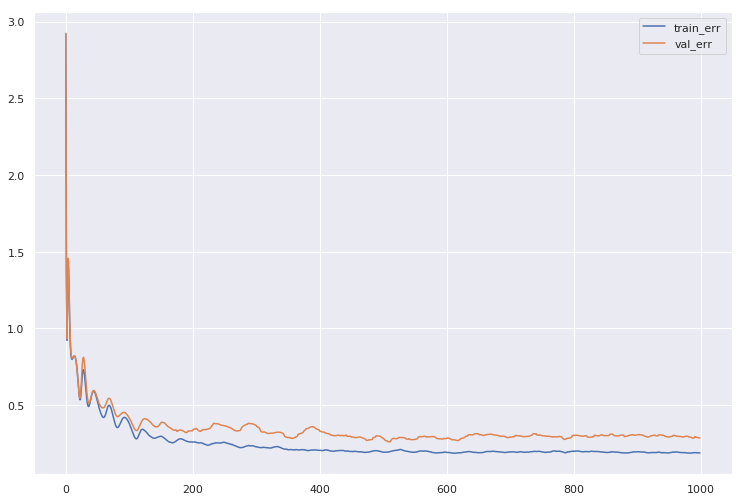

In [101]:
#beta1 = 0.99; beta2 = 0.9
fig, ax =  plt.subplots(1, 1)
fig.set_size_inches(12.5, 8.5)

ax.plot(range(len(train_err)) ,train_err)
ax.plot(range(len(val_err)) ,val_err)
ax.legend(['train_err', 'val_err'])
plt.show()

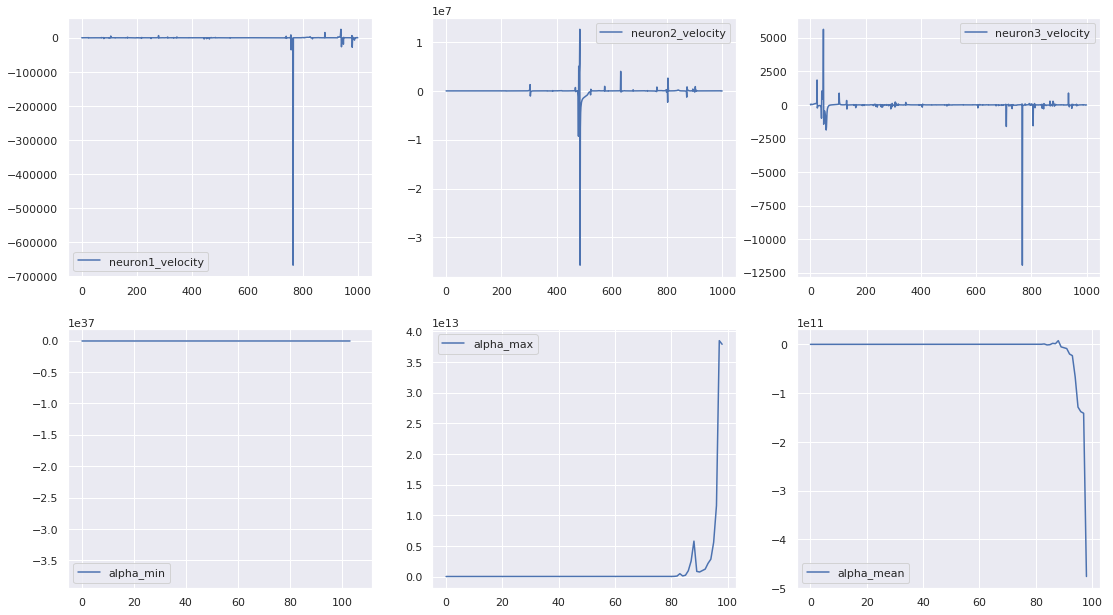

In [102]:
#beta1 = 0.99; beta2 = 0.9
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(range(len(alpha_i_1)) ,alpha_i_1)
ax[0, 0].legend(['neuron1_velocity'])

ax[0, 1].plot(range(len(alpha_i_2)) ,alpha_i_2)
ax[0, 1].legend(['neuron2_velocity'])

ax[0, 2].plot(range(len(alpha_i_3)) ,alpha_i_3)
ax[0, 2].legend(['neuron3_velocity'])

ax[1, 0].plot(range(len(alpha_min)) ,alpha_min)
ax[1, 0].legend(['alpha_min'])

ax[1, 1].plot(range(len(alpha_max)) ,alpha_max)
ax[1, 1].legend(['alpha_max'])

ax[1, 2].plot(range(len(alpha_mean)) ,alpha_mean)
ax[1, 2].legend(['alpha_mean'])

plt.show()

### г) Выводы
Adam работает лучше, чем AdaGrad, RMSProp, AdaDelta. Сходится гораздо быстрее. Пока алгоритм даёт лучшие результаты

## 4.8. Исследование метода RProp

|№ п/п|Метод|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|-----|-------------------|---------------------------|--------------------------|
|1|RProp|100|0.11|0.17|

In [10]:
np.random.seed(221)
network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)
optimizer1 = algorithms.RPROP(network, verbose = True, shuffle_data = False, regularizer=None, 
                                       loss='mse', step=0.10, signals=on_epoch_end)
optimizer1.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)


Main information

[ALGORITHM] RPROP

[OPTION] decrease_factor = 0.5
[OPTION] increase_factor = 1.2
[OPTION] loss = mse
[OPTION] maxstep = 10
[OPTION] minstep = 0.001
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-1:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
Instructions for updating:
Colocations handled automatically by placer.
[TENSORFLOW] Initialization finished successfully. It took 0.29 seconds
#1 : [66 ms] train: 1.203751, valid: 2.923557
#2 : [1 ms] train: 2.919885, valid: 1.042504
#3 : [1 ms] train: 1.035754, valid: 1.129520
#4 : [1 ms] train: 1.123815, valid: 0.945321
#5 : [1 ms] train: 0.934332, valid: 0.770456
#6 : [1 ms] train: 0.769333, valid: 0.636691
#7 : [1 ms] train: 0.630480, valid: 0.510507
#8 : [1 ms] train: 0.502994, valid: 0.449003
#9 : [1 ms] train: 0

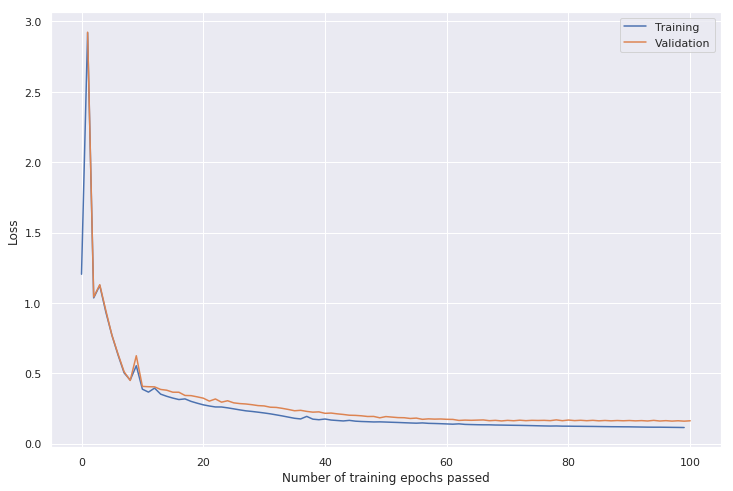

In [11]:
optimizer1.plot_errors()

In [12]:
print("RProp; test_loss = {:.4f}".format(optimizer1.score(X_test, y_test)))

RProp; test_loss = 0.1736


### г) Выводы
RProp даёт очень даже неплохие результаты

## 4.9. Исследование методов Левенберга-Маркардта и BFGS

|№ п/п|Метод|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|-----|-------------------|---------------------------|--------------------------|
|1|LM|100|0.00|1.9|
|2|BFGS|100|0.07|0.16|

In [13]:
np.random.seed(221)
network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)
optimizer1 = algorithms.LevenbergMarquardt(network, mu = 0.2, mu_update_factor=1.1, verbose = True, shuffle_data = False,  
                                       loss='mse', signals=on_epoch_end)
optimizer1.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)

np.random.seed(221)
network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)
optimizer2 = algorithms.QuasiNewton(network, verbose = True, shuffle_data = False,  
                                       loss='mse', signals=on_epoch_end)
optimizer2.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.2
[OPTION] mu_update_factor = 1.1
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] target = Tensor("placeholder/target/linear-2:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.31 seconds


#1 : [291 ms] train: 1.203751, valid: 2.101437
#2 : [88 ms] train: 2.028018, valid: 1.050056
#3 : [91 ms] train: 1.008336, valid: 0.720453


#4 : [97 ms] train: 0.712039, valid: 1.261454
#5 : [106 ms] train: 1.291066, valid: 0.730742
#6 : [89 ms] train: 0.690067, valid: 0.368241


#7 : [93 ms] train: 0.364550, valid: 0.191355
#8 : [95 ms] train: 0.141439, valid: 0.152997
#9 : [94 ms] train: 0.088679, valid: 0.141926


#10 : [101 ms] train: 0.061657, valid: 0.139079
#11 : [93 ms] train: 0.051811, valid: 0.139104
#12 : [84 ms] train: 0.045610, valid: 0.144705


#13 : [91 ms] train: 0.040862, valid: 0.143829
#14 : [88 ms] train: 0.038040, valid: 0.148352
#15 : [87 ms] train: 0.035237, valid: 0.149020


#16 : [97 ms] train: 0.033335, valid: 0.152848
#17 : [106 ms] train: 0.031592, valid: 0.156029
#18 : [85 ms] train: 0.030097, valid: 0.160707


#19 : [95 ms] train: 0.028637, valid: 0.166560
#20 : [87 ms] train: 0.027295, valid: 0.175163
#21 : [81 ms] train: 0.025917, valid: 0.185718


#22 : [94 ms] train: 0.024593, valid: 0.196057
#23 : [98 ms] train: 0.023329, valid: 0.207031
#24 : [92 ms] train: 0.022152, valid: 0.218204


#25 : [98 ms] train: 0.021031, valid: 0.228748
#26 : [103 ms] train: 0.020044, valid: 0.237885


#27 : [108 ms] train: 0.019159, valid: 0.245081
#28 : [97 ms] train: 0.018320, valid: 0.250233
#29 : [91 ms] train: 0.017508, valid: 0.253151


#30 : [93 ms] train: 0.016776, valid: 0.254087
#31 : [89 ms] train: 0.016085, valid: 0.254040
#32 : [81 ms] train: 0.015444, valid: 0.251151


#33 : [90 ms] train: 0.014842, valid: 0.248169
#34 : [92 ms] train: 0.014223, valid: 0.247296
#35 : [81 ms] train: 0.013599, valid: 0.247770


#36 : [90 ms] train: 0.012979, valid: 0.250121
#37 : [100 ms] train: 0.012368, valid: 0.255503


#38 : [102 ms] train: 0.011747, valid: 0.262557
#39 : [104 ms] train: 0.011179, valid: 0.270460
#40 : [92 ms] train: 0.010682, valid: 0.278599


#41 : [97 ms] train: 0.010205, valid: 0.288797
#42 : [109 ms] train: 0.009673, valid: 0.300124


#43 : [100 ms] train: 0.009185, valid: 0.315352
#44 : [106 ms] train: 0.008722, valid: 0.327736


#45 : [97 ms] train: 0.008309, valid: 0.341521
#46 : [97 ms] train: 0.007897, valid: 0.357750
#47 : [81 ms] train: 0.007476, valid: 0.375714


#48 : [91 ms] train: 0.007124, valid: 0.396647
#49 : [109 ms] train: 0.006759, valid: 0.418010
#50 : [87 ms] train: 0.006466, valid: 0.442828


#51 : [106 ms] train: 0.006194, valid: 0.469319
#52 : [96 ms] train: 0.005937, valid: 0.498241
#53 : [94 ms] train: 0.005696, valid: 0.531558


#54 : [98 ms] train: 0.005463, valid: 0.567445
#55 : [81 ms] train: 0.005237, valid: 0.605539
#56 : [80 ms] train: 0.005039, valid: 0.640617


#57 : [89 ms] train: 0.004848, valid: 0.674376
#58 : [86 ms] train: 0.004665, valid: 0.701171
#59 : [87 ms] train: 0.004507, valid: 0.721907


#60 : [102 ms] train: 0.004384, valid: 0.735115
#61 : [92 ms] train: 0.004246, valid: 0.744176
#62 : [95 ms] train: 0.004096, valid: 0.749796


#63 : [100 ms] train: 0.003987, valid: 0.761528
#64 : [93 ms] train: 0.003927, valid: 0.771709
#65 : [84 ms] train: 0.003871, valid: 0.788293


#66 : [110 ms] train: 0.003970, valid: 0.812952
#67 : [96 ms] train: 0.003829, valid: 0.829151
#68 : [81 ms] train: 0.003743, valid: 0.840886


#69 : [95 ms] train: 0.003868, valid: 0.875371
#70 : [88 ms] train: 0.003836, valid: 0.906249
#71 : [96 ms] train: 0.004122, valid: 0.931402


#72 : [100 ms] train: 0.004192, valid: 0.982809
#73 : [94 ms] train: 0.004378, valid: 1.006974


#74 : [129 ms] train: 0.004737, valid: 0.998267
#75 : [113 ms] train: 0.004575, valid: 1.025811


#76 : [96 ms] train: 0.004085, valid: 1.094204
#77 : [119 ms] train: 0.004031, valid: 1.154274


#78 : [119 ms] train: 0.004801, valid: 1.196071
#79 : [92 ms] train: 0.003747, valid: 1.258040


#80 : [125 ms] train: 0.003929, valid: 1.320089
#81 : [114 ms] train: 0.005185, valid: 1.294231


#82 : [91 ms] train: 0.003782, valid: 1.334016
#83 : [88 ms] train: 0.003096, valid: 1.391438
#84 : [93 ms] train: 0.003071, valid: 1.436608


#85 : [111 ms] train: 0.002905, valid: 1.501987
#86 : [94 ms] train: 0.003131, valid: 1.548305
#87 : [98 ms] train: 0.002860, valid: 1.575520


#88 : [97 ms] train: 0.002605, valid: 1.652861
#89 : [95 ms] train: 0.002564, valid: 1.722923
#90 : [91 ms] train: 0.002500, valid: 1.773336


#91 : [95 ms] train: 0.002415, valid: 1.823357
#92 : [82 ms] train: 0.002311, valid: 1.891642
#93 : [81 ms] train: 0.002540, valid: 1.945120


#94 : [96 ms] train: 0.002260, valid: 1.991951
#95 : [84 ms] train: 0.002150, valid: 2.039004
#96 : [95 ms] train: 0.002082, valid: 2.076240


#97 : [100 ms] train: 0.002027, valid: 2.115194
#98 : [84 ms] train: 0.001964, valid: 2.134893
#99 : [94 ms] train: 0.001926, valid: 2.162171


#100 : [94 ms] train: 0.001856, valid: 2.167174

Main information

[ALGORITHM] QuasiNewton

[OPTION] epsilon = 1e-07
[OPTION] h0_scale = 1
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] target = Tensor("placeholder/target/linear-3:0", shape=(?, 1), dtype=float32)
[OPTION] update_function = bfgs
[OPTION] verbose = True
[OPTION] wolfe_c1 = 0.0001
[OPTION] wolfe_c2 = 0.9
[OPTION] wolfe_maxiter = 20

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.12 seconds


#1 : [472 ms] train: 1.203751, valid: 1.040310
#2 : [23 ms] train: 1.038421, valid: 1.014941
#3 : [18 ms] train: 1.014334, valid: 0.889736
#4 : [20 ms] train: 0.894535, valid: 0.613974
#5 : [18 ms] train: 0.619723, valid: 0.491894
#6 : [18 ms] train: 0.495116, valid: 0.457841
#7 : [18 ms] train: 0.449989, valid: 0.453188
#8 : [17 ms] train: 0.437224, valid: 0.440869
#9 : [13 ms] train: 0.424820, valid: 0.419665
#10 : [18 ms] train: 0.404327, valid: 0.404843
#11 : [18 ms] train: 0.391423, valid: 0.393436
#12 : [13 ms] train: 0.381101, valid: 0.370968


#13 : [19 ms] train: 0.354363, valid: 0.362224
#14 : [17 ms] train: 0.343299, valid: 0.334207
#15 : [18 ms] train: 0.316791, valid: 0.290888
#16 : [13 ms] train: 0.280147, valid: 0.274934
#17 : [12 ms] train: 0.263055, valid: 0.275646
#18 : [17 ms] train: 0.248131, valid: 0.255549
#19 : [13 ms] train: 0.233246, valid: 0.254799
#20 : [18 ms] train: 0.228493, valid: 0.243430
#21 : [15 ms] train: 0.213805, valid: 0.241985
#22 : [15 ms] train: 0.208547, valid: 0.234900
#23 : [16 ms] train: 0.200458, valid: 0.209560
#24 : [15 ms] train: 0.182829, valid: 0.196904
#25 : [18 ms] train: 0.176636, valid: 0.188402


#26 : [16 ms] train: 0.172532, valid: 0.185363
#27 : [18 ms] train: 0.170313, valid: 0.182613
#28 : [19 ms] train: 0.167410, valid: 0.180818
#29 : [17 ms] train: 0.163903, valid: 0.178509
#30 : [17 ms] train: 0.158947, valid: 0.176291
#31 : [17 ms] train: 0.153726, valid: 0.174671
#32 : [17 ms] train: 0.150317, valid: 0.174066
#33 : [18 ms] train: 0.149187, valid: 0.173124
#34 : [18 ms] train: 0.148103, valid: 0.171633
#35 : [18 ms] train: 0.146127, valid: 0.169154
#36 : [18 ms] train: 0.142655, valid: 0.166759
#37 : [19 ms] train: 0.138265, valid: 0.165489


#38 : [17 ms] train: 0.134714, valid: 0.166368
#39 : [19 ms] train: 0.132852, valid: 0.166688
#40 : [18 ms] train: 0.131765, valid: 0.166928
#41 : [16 ms] train: 0.129874, valid: 0.165882
#42 : [17 ms] train: 0.127743, valid: 0.163692
#43 : [20 ms] train: 0.126092, valid: 0.160771
#44 : [16 ms] train: 0.125194, valid: 0.158712
#45 : [16 ms] train: 0.124538, valid: 0.156686
#46 : [16 ms] train: 0.123684, valid: 0.154957
#47 : [16 ms] train: 0.122114, valid: 0.154382
#48 : [16 ms] train: 0.120166, valid: 0.155510
#49 : [16 ms] train: 0.118831, valid: 0.157118


#50 : [17 ms] train: 0.118031, valid: 0.157843
#51 : [19 ms] train: 0.117290, valid: 0.157688
#52 : [18 ms] train: 0.115996, valid: 0.155289
#53 : [16 ms] train: 0.113630, valid: 0.150722
#54 : [15 ms] train: 0.110377, valid: 0.146089
#55 : [15 ms] train: 0.107817, valid: 0.143392
#56 : [15 ms] train: 0.106232, valid: 0.142563
#57 : [17 ms] train: 0.105545, valid: 0.143202
#58 : [17 ms] train: 0.104986, valid: 0.144626
#59 : [18 ms] train: 0.104330, valid: 0.146650
#60 : [18 ms] train: 0.103465, valid: 0.148389
#61 : [18 ms] train: 0.102389, valid: 0.150282


#62 : [18 ms] train: 0.100510, valid: 0.150379
#63 : [19 ms] train: 0.098535, valid: 0.148030
#64 : [17 ms] train: 0.096969, valid: 0.145931
#65 : [16 ms] train: 0.096245, valid: 0.144797
#66 : [15 ms] train: 0.095808, valid: 0.144041
#67 : [17 ms] train: 0.095187, valid: 0.143845
#68 : [17 ms] train: 0.094105, valid: 0.144504
#69 : [17 ms] train: 0.092588, valid: 0.145392
#70 : [17 ms] train: 0.091231, valid: 0.144774
#71 : [17 ms] train: 0.090400, valid: 0.143546
#72 : [19 ms] train: 0.089985, valid: 0.141655
#73 : [19 ms] train: 0.089737, valid: 0.140149


#74 : [17 ms] train: 0.089410, valid: 0.135940
#75 : [17 ms] train: 0.088267, valid: 0.134163
#76 : [21 ms] train: 0.087233, valid: 0.134755
#77 : [17 ms] train: 0.086013, valid: 0.137321
#78 : [18 ms] train: 0.085324, valid: 0.140299
#79 : [16 ms] train: 0.084878, valid: 0.142467
#80 : [16 ms] train: 0.084569, valid: 0.144111
#81 : [16 ms] train: 0.084196, valid: 0.145897
#82 : [17 ms] train: 0.083472, valid: 0.146692
#83 : [18 ms] train: 0.082555, valid: 0.145806
#84 : [17 ms] train: 0.081701, valid: 0.144158
#85 : [17 ms] train: 0.080968, valid: 0.143674


#86 : [18 ms] train: 0.080492, valid: 0.144425
#87 : [20 ms] train: 0.080111, valid: 0.146140
#88 : [19 ms] train: 0.079655, valid: 0.148770
#89 : [16 ms] train: 0.078983, valid: 0.151828
#90 : [15 ms] train: 0.078053, valid: 0.153110
#91 : [16 ms] train: 0.077200, valid: 0.151419
#92 : [19 ms] train: 0.076702, valid: 0.148918
#93 : [18 ms] train: 0.076421, valid: 0.146910
#94 : [17 ms] train: 0.076193, valid: 0.144524
#95 : [17 ms] train: 0.075751, valid: 0.142115
#96 : [18 ms] train: 0.074911, valid: 0.140707
#97 : [18 ms] train: 0.073879, valid: 0.141299
#98 : [21 ms] train: 0.073235, valid: 0.142194
#99 : [20 ms] train: 0.072909, valid: 0.143212
#100 : [19 ms] train: 0.072671, valid: 0.143148


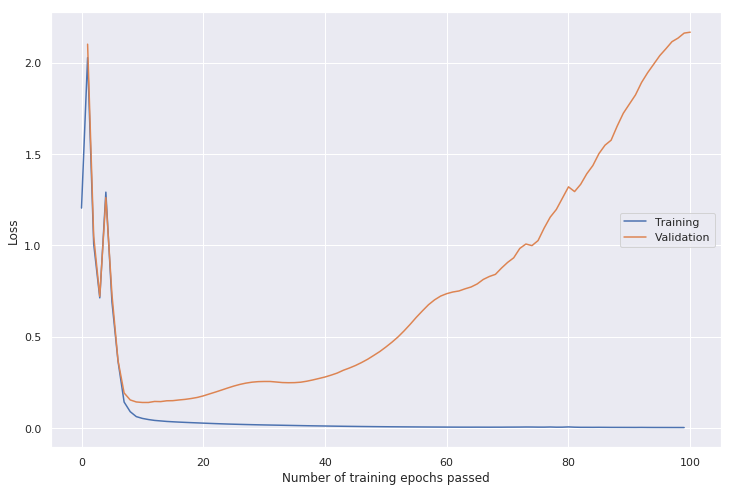

In [14]:
optimizer1.plot_errors()

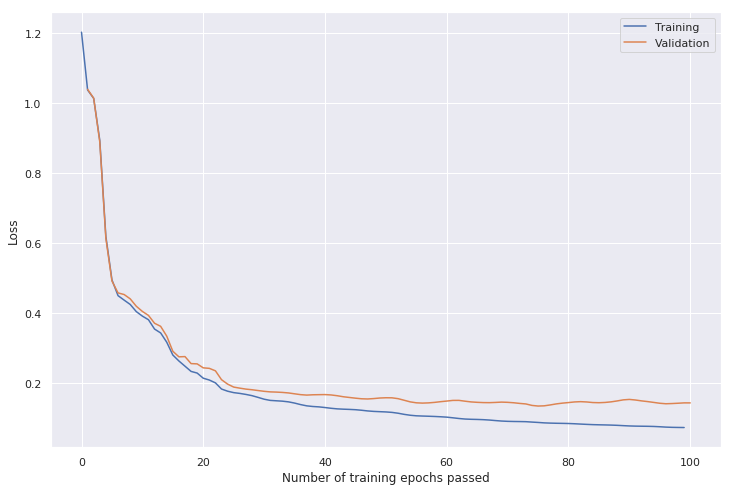

In [15]:
optimizer2.plot_errors()

In [16]:
print("LB; test_loss = {:.4f}; BFGS; test_loss = {:.4f}".format(optimizer1.score(X_test, y_test), optimizer2.score(X_test, y_test)))

LB; test_loss = 1.9066; BFGS; test_loss = 0.1595


### г) Выводы
BFGS работает хорошо, LM разошелся

## 4.10. Исследование метода стохастического градиента 

|№ п/п|Метод|Размер mini-batch’а|Число эпох обучения|Ошибка на обучающей выборке|Ошибка на тестовой выборке|
|-----|-----|-------------------|-------------------|---------------------------|--------------------------|
|1|1|GD|10|0.08|0.26|
|2|20|GD|100|0.11|0.15|
|3|100|GD|100|0.11|0.31|
|4|размер_выб.|GD|100|0.84|0.70|

In [17]:
#change learning rate for gradient descend. copy NN code for reproducible results
#neural network
np.random.seed(221)
network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)
optimizer1 = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=20, regularizer=None, 
                                       loss='mse', step=0.10, signals=on_epoch_end)
optimizer1.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)

np.random.seed(221)
network = join(
    Input(8), 
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Sigmoid(20, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)
optimizer2 = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=100, regularizer=None, 
                                       loss='mse', step=0.10, signals=on_epoch_end)
optimizer2.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 20
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-4:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.43 seconds
#1 : [120 ms] train: 0.272541, valid: 1.038476
#2 : [20 ms] train: 0.269790, valid: 0.969425
#3 : [21 ms] train: 0.241013, valid: 0.831649
#4 : [19 ms] train: 0.207694, valid: 0.615693


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#5 : [20 ms] train: 0.230171, valid: 0.567699
#6 : [21 ms] train: 0.227370, valid: 0.583653
#7 : [20 ms] train: 0.205182, valid: 0.548162
#8 : [21 ms] train: 0.185389, valid: 0.507666
#9 : [20 ms] train: 0.169973, valid: 0.473914
#10 : [21 ms] train: 0.158019, valid: 0.446297
#11 : [24 ms] train: 0.148805, valid: 0.423301
#12 : [24 ms] train: 0.141861, valid: 0.403849
#13 : [21 ms] train: 0.136835, valid: 0.387190
#14 : [21 ms] train: 0.133441, valid: 0.372758


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#15 : [22 ms] train: 0.131431, valid: 0.360104
#16 : [20 ms] train: 0.130592, valid: 0.348873
#17 : [20 ms] train: 0.130740, valid: 0.338789
#18 : [20 ms] train: 0.131709, valid: 0.329646
#19 : [23 ms] train: 0.133345, valid: 0.321293
#20 : [21 ms] train: 0.135506, valid: 0.313622
#21 : [21 ms] train: 0.138058, valid: 0.306548
#22 : [22 ms] train: 0.140878, valid: 0.300003
#23 : [22 ms] train: 0.143856, valid: 0.293930
#24 : [21 ms] train: 0.146894, valid: 0.288275


Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

#25 : [21 ms] train: 0.149905, valid: 0.282993
#26 : [20 ms] train: 0.152816, valid: 0.278043
#27 : [22 ms] train: 0.155567, valid: 0.273391
#28 : [21 ms] train: 0.158109, valid: 0.269004
#29 : [20 ms] train: 0.160406, valid: 0.264857
#30 : [24 ms] train: 0.162437, valid: 0.260928
#31 : [23 ms] train: 0.164189, valid: 0.257198
#32 : [21 ms] train: 0.165660, valid: 0.253653
#33 : [21 ms] train: 0.166858, valid: 0.250280


#34 : [21 ms] train: 0.167796, valid: 0.247070
#35 : [20 ms] train: 0.168494, valid: 0.244016
#36 : [22 ms] train: 0.168972, valid: 0.241109
#37 : [21 ms] train: 0.169254, valid: 0.238344
#38 : [21 ms] train: 0.169363, valid: 0.235715
#39 : [27 ms] train: 0.169321, valid: 0.233218
#40 : [21 ms] train: 0.169146, valid: 0.230848
#41 : [19 ms] train: 0.168857, valid: 0.228600
#42 : [20 ms] train: 0.168469, valid: 0.226469


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#43 : [22 ms] train: 0.167995, valid: 0.224453
#44 : [22 ms] train: 0.167448, valid: 0.222547
#45 : [20 ms] train: 0.166836, valid: 0.220749
#46 : [21 ms] train: 0.166168, valid: 0.219054
#47 : [24 ms] train: 0.165452, valid: 0.217459
#48 : [22 ms] train: 0.164693, valid: 0.215962
#49 : [22 ms] train: 0.163897, valid: 0.214559
#50 : [22 ms] train: 0.163068, valid: 0.213246
#51 : [22 ms] train: 0.162211, valid: 0.212021
#52 : [20 ms] train: 0.161327, valid: 0.210878


#53 : [23 ms] train: 0.160420, valid: 0.209815
#54 : [23 ms] train: 0.159494, valid: 0.208827
#55 : [23 ms] train: 0.158548, valid: 0.207909
#56 : [21 ms] train: 0.157587, valid: 0.207057
#57 : [21 ms] train: 0.156611, valid: 0.206266
#58 : [22 ms] train: 0.155622, valid: 0.205531
#59 : [20 ms] train: 0.154620, valid: 0.204848
#60 : [22 ms] train: 0.153608, valid: 0.204212
#61 : [21 ms] train: 0.152586, valid: 0.203619


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#62 : [20 ms] train: 0.151554, valid: 0.203065
#63 : [22 ms] train: 0.150514, valid: 0.202547
#64 : [22 ms] train: 0.149466, valid: 0.202060
#65 : [21 ms] train: 0.148411, valid: 0.201601
#66 : [22 ms] train: 0.147348, valid: 0.201168
#67 : [20 ms] train: 0.146278, valid: 0.200757
#68 : [23 ms] train: 0.145202, valid: 0.200367
#69 : [25 ms] train: 0.144119, valid: 0.199994
#70 : [23 ms] train: 0.143030, valid: 0.199638
#71 : [21 ms] train: 0.141934, valid: 0.199295


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#72 : [23 ms] train: 0.140832, valid: 0.198965
#73 : [21 ms] train: 0.139724, valid: 0.198646
#74 : [21 ms] train: 0.138610, valid: 0.198337
#75 : [20 ms] train: 0.137489, valid: 0.198036
#76 : [23 ms] train: 0.136361, valid: 0.197743
#77 : [21 ms] train: 0.135226, valid: 0.197456
#78 : [21 ms] train: 0.134084, valid: 0.197174
#79 : [21 ms] train: 0.132933, valid: 0.196897
#80 : [22 ms] train: 0.131775, valid: 0.196624
#81 : [22 ms] train: 0.130608, valid: 0.196354


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#82 : [22 ms] train: 0.129431, valid: 0.196087
#83 : [21 ms] train: 0.128245, valid: 0.195821
#84 : [21 ms] train: 0.127047, valid: 0.195557
#85 : [21 ms] train: 0.125838, valid: 0.195294
#86 : [20 ms] train: 0.124617, valid: 0.195031
#87 : [22 ms] train: 0.123383, valid: 0.194767
#88 : [20 ms] train: 0.122135, valid: 0.194504
#89 : [20 ms] train: 0.120873, valid: 0.194239
#90 : [21 ms] train: 0.119596, valid: 0.193972
#91 : [22 ms] train: 0.118302, valid: 0.193704


#92 : [26 ms] train: 0.116992, valid: 0.193433
#93 : [22 ms] train: 0.115665, valid: 0.193160
#94 : [21 ms] train: 0.114320, valid: 0.192883
#95 : [20 ms] train: 0.112957, valid: 0.192603
#96 : [21 ms] train: 0.111576, valid: 0.192319
#97 : [21 ms] train: 0.110177, valid: 0.192031
#98 : [21 ms] train: 0.108760, valid: 0.191739
#99 : [20 ms] train: 0.107325, valid: 0.191442
#100 : [20 ms] train: 0.105874, valid: 0.191139

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 100
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-5:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.42 seconds
#1 : [118 ms] train: 0.295450, valid: 1.089646
#2 : [10 ms] train: 0.292141, valid: 1.077579
#3 : [8 ms] train: 0.288837, valid: 1.065976
#4 : [8 ms] train: 0.285417, valid: 1.054346
#5 : [8 ms] train: 0.281746, valid: 1.042222
#6 : [8 ms] train: 0.277691, valid: 1.029137
#7 : [7 ms] train: 0.273113, valid: 1.014591
#8 : [9 ms] train: 0.267867, valid: 0.998038
#9 : [7 ms] train: 0.261800, valid: 0.978864
#10 : [8 ms] train: 0.254758, valid: 0.956398


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#11 : [8 ms] train: 0.246612, valid: 0.929934
#12 : [8 ms] train: 0.237293, valid: 0.898816
#13 : [8 ms] train: 0.226858, valid: 0.862599
#14 : [7 ms] train: 0.215584, valid: 0.821324
#15 : [7 ms] train: 0.204085, valid: 0.775919
#16 : [8 ms] train: 0.193391, valid: 0.728622
#17 : [7 ms] train: 0.184909, valid: 0.683193
#18 : [7 ms] train: 0.180145, valid: 0.644499
#19 : [7 ms] train: 0.180175, valid: 0.617168
#20 : [6 ms] train: 0.185042, valid: 0.603626
#21 : [8 ms] train: 0.193491, valid: 0.602689
#22 : [8 ms] train: 0.203332, valid: 0.609878
#23 : [8 ms] train: 0.212266, valid: 0.619457
#24 : [8 ms] train: 0.218681, valid: 0.626742
#25 : [8 ms] train: 0.221958, valid: 0.629304
#26 : [8 ms] train: 0.222297, valid: 0.626797
#27 : [8 ms] train: 0.220325, valid: 0.620112
#28 : [8 ms] train: 0.216763, valid: 0.610548
#29 : [8 ms] train: 0.212234, valid: 0.599315
#30 : [8 ms] train: 0.207206, valid: 0.587343
#31 : [7 ms] train: 0.201997, valid: 0.575259
#32 : [8 ms] train: 0.196810, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#35 : [7 ms] train: 0.182335, valid: 0.531253
#36 : [9 ms] train: 0.177987, valid: 0.521718
#37 : [7 ms] train: 0.173885, valid: 0.512747
#38 : [7 ms] train: 0.170017, valid: 0.504297
#39 : [7 ms] train: 0.166371, valid: 0.496323
#40 : [9 ms] train: 0.162932, valid: 0.488782
#41 : [9 ms] train: 0.159685, valid: 0.481634
#42 : [9 ms] train: 0.156615, valid: 0.474843
#43 : [8 ms] train: 0.153710, valid: 0.468376
#44 : [8 ms] train: 0.150956, valid: 0.462207
#45 : [8 ms] train: 0.148345, valid: 0.456310
#46 : [9 ms] train: 0.145865, valid: 0.450663
#47 : [8 ms] train: 0.143508, valid: 0.445249
#48 : [11 ms] train: 0.141267, valid: 0.440051
#49 : [7 ms] train: 0.139134, valid: 0.435055
#50 : [11 ms] train: 0.137104, valid: 0.430247
#51 : [9 ms] train: 0.135170, valid: 0.425615
#52 : [9 ms] train: 0.133329, valid: 0.421151
#53 : [8 ms] train: 0.131575, valid: 0.416843
#54 : [7 ms] train: 0.129906, valid: 0.412684
#55 : [10 ms] train: 0.128315, valid: 0.408666
#56 : [8 ms] train: 0.126802, v

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#57 : [10 ms] train: 0.125362, valid: 0.401022
#58 : [10 ms] train: 0.123992, valid: 0.397384
#59 : [8 ms] train: 0.122690, valid: 0.393860
#60 : [8 ms] train: 0.121454, valid: 0.390445
#61 : [8 ms] train: 0.120280, valid: 0.387132
#62 : [7 ms] train: 0.119167, valid: 0.383919
#63 : [10 ms] train: 0.118113, valid: 0.380799
#64 : [9 ms] train: 0.117115, valid: 0.377768
#65 : [9 ms] train: 0.116172, valid: 0.374822
#66 : [8 ms] train: 0.115281, valid: 0.371958
#67 : [11 ms] train: 0.114442, valid: 0.369171
#68 : [9 ms] train: 0.113652, valid: 0.366458
#69 : [8 ms] train: 0.112910, valid: 0.363815
#70 : [7 ms] train: 0.112214, valid: 0.361240
#71 : [8 ms] train: 0.111563, valid: 0.358730
#72 : [10 ms] train: 0.110955, valid: 0.356282
#73 : [8 ms] train: 0.110389, valid: 0.353893
#74 : [7 ms] train: 0.109864, valid: 0.351560
#75 : [9 ms] train: 0.109378, valid: 0.349283
#76 : [9 ms] train: 0.108929, valid: 0.347058
#77 : [7 ms] train: 0.108518, valid: 0.344883
#78 : [9 ms] train: 0.108141,

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#79 : [9 ms] train: 0.107799, valid: 0.340679
#80 : [9 ms] train: 0.107490, valid: 0.338645
#81 : [8 ms] train: 0.107212, valid: 0.336656
#82 : [8 ms] train: 0.106965, valid: 0.334709
#83 : [9 ms] train: 0.106748, valid: 0.332803
#84 : [9 ms] train: 0.106558, valid: 0.330937
#85 : [8 ms] train: 0.106396, valid: 0.329109
#86 : [8 ms] train: 0.106260, valid: 0.327320
#87 : [8 ms] train: 0.106149, valid: 0.325567
#88 : [11 ms] train: 0.106062, valid: 0.323849
#89 : [8 ms] train: 0.105998, valid: 0.322166
#90 : [10 ms] train: 0.105956, valid: 0.320517
#91 : [9 ms] train: 0.105934, valid: 0.318900
#92 : [8 ms] train: 0.105932, valid: 0.317315
#93 : [7 ms] train: 0.105949, valid: 0.315762
#94 : [13 ms] train: 0.105984, valid: 0.314238
#95 : [11 ms] train: 0.106036, valid: 0.312744
#96 : [9 ms] train: 0.106103, valid: 0.311279
#97 : [7 ms] train: 0.106186, valid: 0.309842
#98 : [11 ms] train: 0.106282, valid: 0.308432
#99 : [9 ms] train: 0.106392, valid: 0.307048


#100 : [10 ms] train: 0.106514, valid: 0.305691


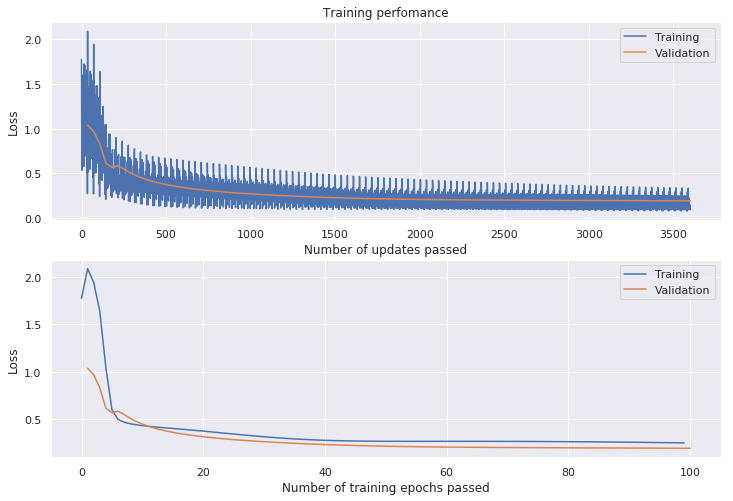

In [18]:
optimizer1.plot_errors()

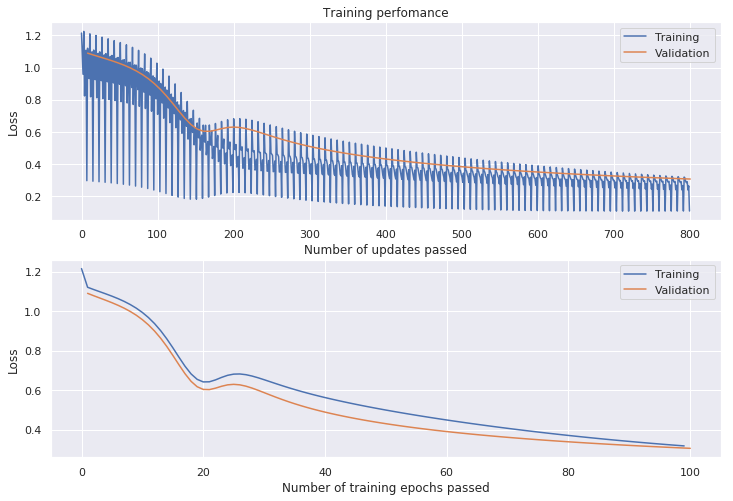

In [19]:
optimizer2.plot_errors()

In [20]:
print("SGD; test_loss = {:.4f}; SGD; test_loss = {:.4f}".format(optimizer1.score(X_test, y_test), optimizer2.score(X_test, y_test)))


                                                                               

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

SGD; test_loss = 0.1531; SGD; test_loss = 0.3064


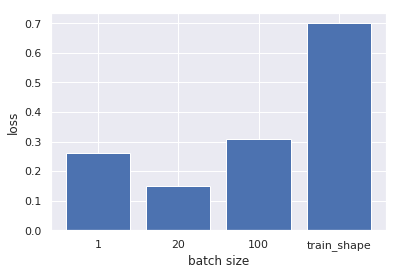

In [21]:
fig, ax =  plt.subplots()
ax.bar(['1', '20', '100', 'train_shape'], [0.26, 0.15, 0.31, 0.70])
ax.set_xlabel('batch size')
ax.set_ylabel('loss')
plt.show()

### г) Выводы
Как видно по графику, лучше брать batch size около 20

## 4.11. Сравнение методов обучения

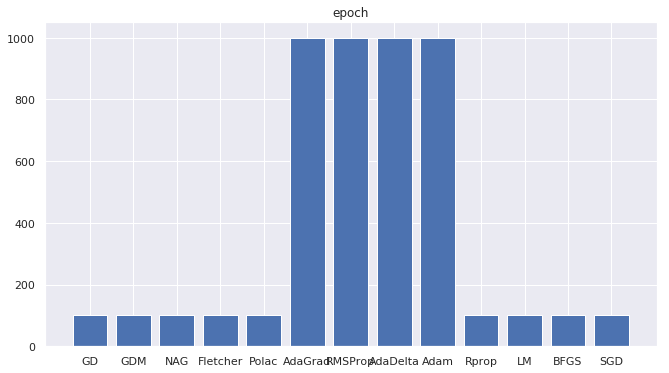

In [22]:
fig = plt.figure()
fig.set_size_inches(8.5, 4.5)
ax = fig.add_axes([0,0,1,1])
meth = ['GD', 'GDM', 'NAG', 'Fletcher', 'Polac', 'AdaGrad' ,'RMSProp', 'AdaDelta', 'Adam', 'Rprop', 'LM', 'BFGS', 'SGD']
ep = [100, 100, 100, 100, 100, 1000, 1000, 1000, 1000, 100, 100, 100, 100]
ax.set_title('epoch')
ax.bar(meth, ep)
plt.show()

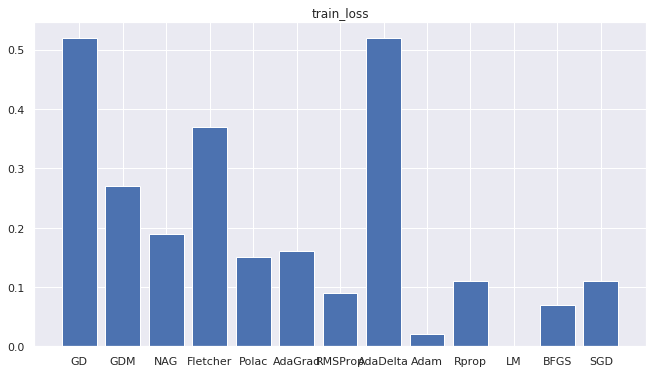

In [23]:
fig = plt.figure()
fig.set_size_inches(8.5, 4.5)
ax = fig.add_axes([0,0,1,1])
train_loss = [0.52, 0.27, 0.19, 0.37, 0.15, 0.16, 0.09, 0.52, 0.02, 0.11, 0.00, 0.07, 0.11]
ax.set_title('train_loss')
ax.bar(meth, train_loss)
plt.show()

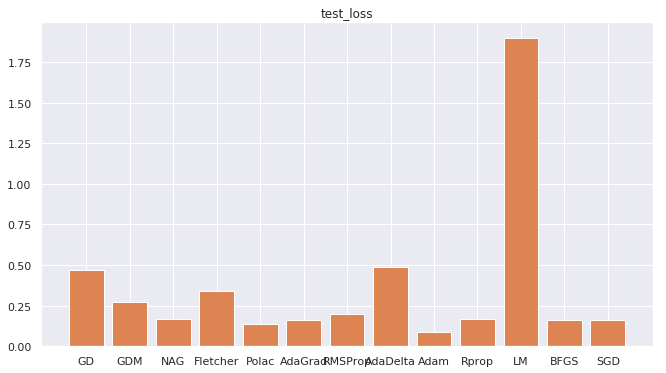

In [24]:
fig = plt.figure()
fig.set_size_inches(8.5, 4.5)
ax = fig.add_axes([0,0,1,1])
test_loss = [0.47, 0.27, 0.17, 0.34, 0.14, 0.16, 0.20, 0.49, 0.09, 0.17, 1.9, 0.16, 0.16]
ax.bar(meth, test_loss)
ax.set_title('test_loss')
ax.bar(meth, test_loss)
plt.show()

### в) Выводы
Adam справляется лучше всех алгоритмов

## 4.12. Исследование влияния способа инициализации весов на качество обучения

## а) Исследование прямого информационного потока в сети

In [2]:
tf.enable_v2_behavior()

In [71]:
X_train = tf.Variable(train_dset.X.values, dtype=tf.float32)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32)

In [43]:
def normal_init(std):
    
    w1 = tf.random.normal((8, 20), mean=0.0, stddev=std)
    b1 = tf.zeros((20,))
    w2 = tf.random.normal((20, 20), mean=0.0, stddev=std)
    b2 = tf.zeros((20,))
    w3 = tf.random.normal((20, 1), mean=0.0, stddev=std)
    b3 = tf.zeros((1,))
    
    return [w1, b1, w2, b2, w3, b3]

In [44]:
def Xavier_init(shape):
    
    fan_in, _ = shape
    return tf.random.normal(shape, mean=0.0, stddev=1.0) * (2.0 / fan_in)**(0.5)

In [45]:
def two_layer_fc_init():
    """
    Initialize the weights of a two-layer network, for use with the
    two_layer_network function defined above. 
    You can use the `create_matrix_with_kaiming_normal` helper!
    
    Inputs: None
    
    Returns: A list of:
    - w1: TensorFlow tf.Variable giving the weights for the first layer
    - w2: TensorFlow tf.Variable giving the weights for the second layer
    """
    b1 = tf.Variable(np.zeros((20,)), dtype = tf.float32)
    w1 = tf.Variable(Xavier_init((8, 20)), dtype = tf.float32)
    b2 = tf.Variable(np.zeros((20,)), dtype = tf.float32)
    w2 = tf.Variable(Xavier_init((20, 20)), dtype = tf.float32)
    b3 = tf.Variable(np.zeros((1,)), dtype = tf.float32)
    w3 = tf.Variable(Xavier_init((20, 1)), dtype = tf.float32)                 
    return [w1, b1, w2, b2, w3, b3]

In [49]:
def out_st_count(is_Xavier = False, std=1.0):
    
    if is_Xavier:
        w1, b1, w2, b2, w3, b3 = two_layer_fc_init()
    else:
        w1, b1, w2, b2, w3, b3 = normal_init(std)
        
    out_0 = tf.matmul(X_train, w1)
    out_0 = tf.nn.bias_add(out_0, b1)
    out_1 = tf.nn.sigmoid(out_0)
    
    out_2 = tf.matmul(out_1, w2)
    out_2 = tf.nn.bias_add(out_2, b2)
    out_3 = tf.nn.sigmoid(out_2)
    
    out_4 = tf.matmul(out_3, w3)         
    out_4 = tf.nn.bias_add(out_4, b3)
    
    return [out_0.numpy(), out_1.numpy(), out_2.numpy(), out_3.numpy(), out_4.numpy()]

In [50]:
sigma_list = np.arange(0.0001, 10., 0.2)
st = []
for sigma in sigma_list:
    st.append(out_st_count(std = sigma))

xav_st = out_st_count(is_Xavier=True)

In [62]:
neur_mean_l1 = []
neur_std_l1 = []
neur_mean_l2 = []
neur_std_l2 = []
neur_mean_l3 = []
neur_std_l3 = []

for it in st:
    
    neur_mean_l1.append(np.mean(it[1], axis = 0)[3])
    neur_mean_l2.append(np.mean(it[3], axis = 0)[5])
    neur_mean_l3.append(np.mean(it[4]))
    neur_std_l1.append(np.std(it[1], axis = 0)[3])
    neur_std_l2.append(np.std(it[3], axis = 0)[5])
    neur_std_l3.append(np.std(it[4]))

xav_std_l1 = np.mean(xav_st[1], axis=0)
xav_std_l2 = np.mean(xav_st[3], axis=0)
xav_std_l3 = np.mean(xav_st[4], axis=0)

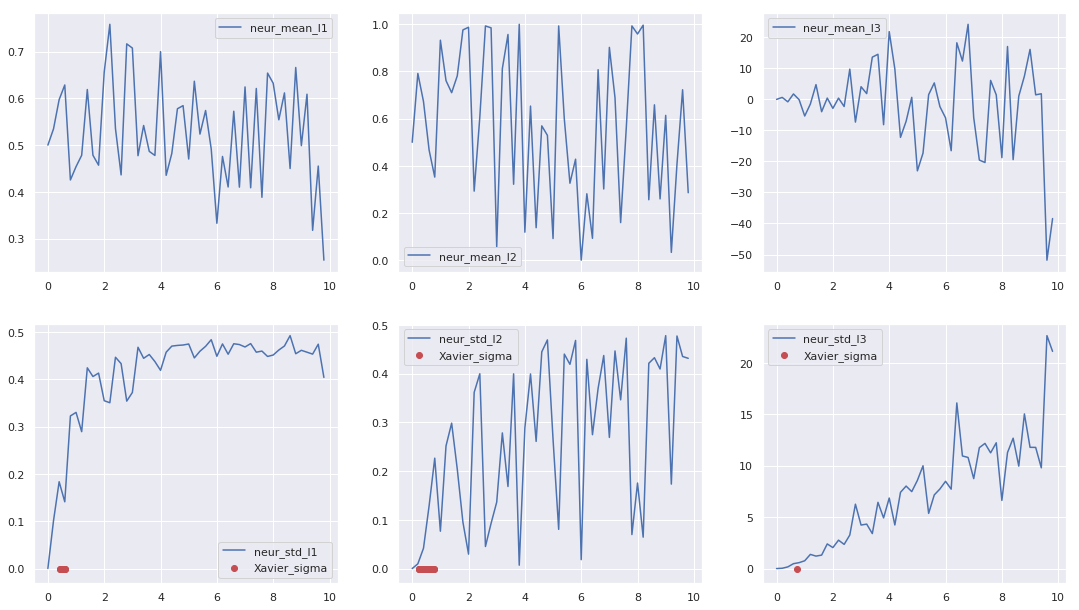

In [67]:
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(sigma_list , neur_mean_l1)
ax[0, 0].legend(['neur_mean_l1'])

ax[0, 1].plot(sigma_list , neur_mean_l2)
ax[0, 1].legend(['neur_mean_l2'])

ax[0, 2].plot(sigma_list , neur_mean_l3)
ax[0, 2].legend(['neur_mean_l3'])

ax[1, 0].plot(sigma_list , neur_std_l1)
ax[1, 0].scatter(xav_std_l1, np.zeros_like(xav_std_l1), c='r')
ax[1, 0].legend(['neur_std_l1', 'Xavier_sigma'])

ax[1, 1].plot(sigma_list , neur_std_l2)
ax[1, 1].scatter(xav_std_l2, np.zeros_like(xav_std_l2), c='r')
ax[1, 1].legend(['neur_std_l2', 'Xavier_sigma'])

ax[1, 2].plot(sigma_list , neur_std_l3)
ax[1, 2].scatter(xav_std_l3, np.zeros_like(xav_std_l3), c='r')
ax[1, 2].legend(['neur_std_l3', 'Xavier_sigma'])

plt.show()

## б) Исследование обратного информационного потока в сети

In [73]:
def forward(is_Xavier = False, std=1.0):
    
    if is_Xavier:
        w1, b1, w2, b2, w3, b3 = two_layer_fc_init()
    else:
        w1, b1, w2, b2, w3, b3 = normal_init(std)
        
    out_0 = tf.matmul(X_train, w1)
    out_0 = tf.nn.bias_add(out_0, b1)
    out_1 = tf.nn.sigmoid(out_0)
    
    out_2 = tf.matmul(out_1, w2)
    out_2 = tf.nn.bias_add(out_2, b2)
    out_3 = tf.nn.sigmoid(out_2)
    
    out_4 = tf.matmul(out_3, w3)         
    out_4 = tf.nn.bias_add(out_4, b3)
    out_4 = tf.reshape(out_4, (out_4.shape[0], ))
    
    return [out_0, out_2, out_4]

In [82]:
sigma_list = np.arange(0.0001, 10., 0.2)
dst = []
for sigma in sigma_list:
    
    with tf.GradientTape() as tape:
        out_0, out_2, out_4 = forward(is_Xavier=False, std = sigma)
        loss = tf.keras.losses.MSE(y_train, out_4)
        dout_0, dout_2, dout_4 = tape.gradient(loss, [out_0, out_2, out_4])
        dst.append([dout_0.numpy(), dout_2.numpy(), dout_4.numpy()])

dxav_st = forward(is_Xavier=True)

In [83]:
dneur_mean_l1 = []
dneur_std_l1 = []
dneur_mean_l2 = []
dneur_std_l2 = []
dneur_mean_l3 = []
dneur_std_l3 = []

for it in dst:
    
    dneur_mean_l1.append(np.mean(it[0], axis = 0)[3])
    dneur_mean_l2.append(np.mean(it[1], axis = 0)[5])
    dneur_mean_l3.append(np.mean(it[2]))
    dneur_std_l1.append(np.std(it[0], axis = 0)[3])
    dneur_std_l2.append(np.std(it[1], axis = 0)[5])
    dneur_std_l3.append(np.std(it[2]))

dxav_std_l1 = np.mean(xav_st[0], axis=0)
dxav_std_l2 = np.mean(xav_st[1], axis=0)
dxav_std_l3 = np.mean(xav_st[2], axis=0)

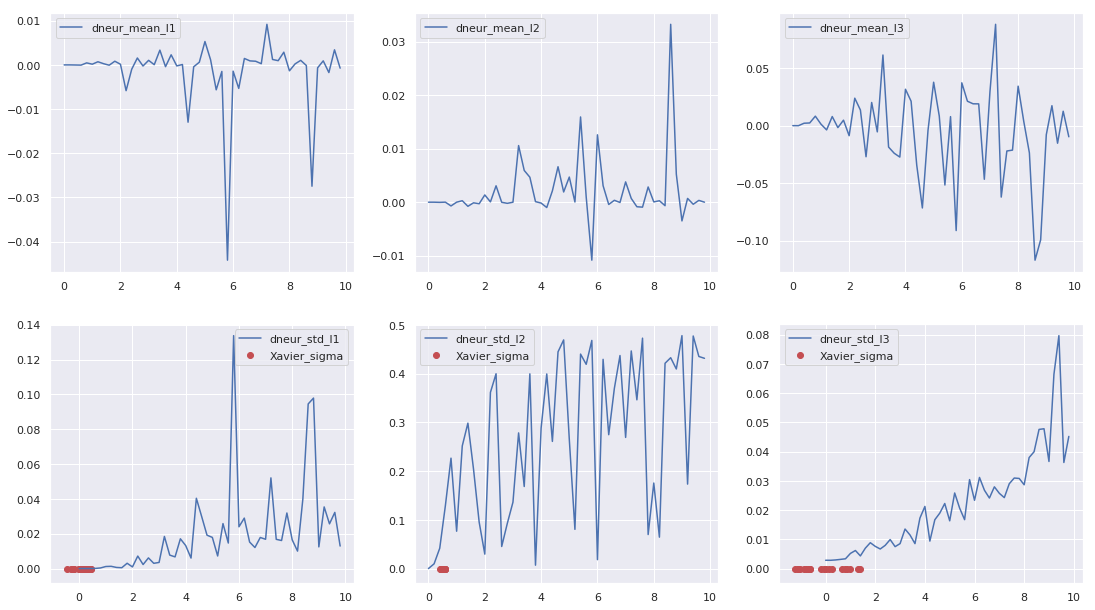

In [84]:
fig, ax =  plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(sigma_list , dneur_mean_l1)
ax[0, 0].legend(['dneur_mean_l1'])

ax[0, 1].plot(sigma_list , dneur_mean_l2)
ax[0, 1].legend(['dneur_mean_l2'])

ax[0, 2].plot(sigma_list , dneur_mean_l3)
ax[0, 2].legend(['dneur_mean_l3'])

ax[1, 0].plot(sigma_list , dneur_std_l1)
ax[1, 0].scatter(dxav_std_l1, np.zeros_like(dxav_std_l1), c='r')
ax[1, 0].legend(['dneur_std_l1', 'Xavier_sigma'])

ax[1, 1].plot(sigma_list , neur_std_l2)
ax[1, 1].scatter(dxav_std_l2, np.zeros_like(dxav_std_l2), c='r')
ax[1, 1].legend(['dneur_std_l2', 'Xavier_sigma'])

ax[1, 2].plot(sigma_list , dneur_std_l3)
ax[1, 2].scatter(dxav_std_l3, np.zeros_like(dxav_std_l3), c='r')
ax[1, 2].legend(['dneur_std_l3', 'Xavier_sigma'])

plt.show()

## в) Исследование распределений выходов и двойственных потенциалов нейронов

Выходы

In [117]:
# значения sigma при Xavier init
xav_std_l1

array([0.5872672 , 0.42667574, 0.547242  , 0.5072641 , 0.59576064,
       0.5228851 , 0.5183253 , 0.52677757, 0.54954946, 0.56987685,
       0.45592427, 0.5662179 , 0.4702018 , 0.44430777, 0.49874288,
       0.56143135, 0.46888062, 0.51889974, 0.5418256 , 0.5975512 ],
      dtype=float32)

In [95]:
#min std
_, s1out1, _, s1out3, s1out4 = out_st_count(std = 0.001)
_, s2out1, _, s2out3, s2out4 = out_st_count(std = 0.01)
_, s3out1, _, s3out3, s3out4 = out_st_count(std = 0.05)
#max std
_, s4out1, _, s4out3, s4out4 = out_st_count(std = 6)
_, s5out1, _, s5out3, s5out4 = out_st_count(std = 8)
_, s6out1, _, s6out3, s6out4 = out_st_count(std = 10)
#xav std
_, s7out1, _, s7out3, s7out4 = out_st_count(std = 0.5)
_, s8out1, _, s8out3, s8out4 = out_st_count(std = 0.6)
_, s9out1, _, s9out3, s9out4 = out_st_count(std = 0.7)

Гистограммы выходов нейрона с 1го слоя при различных sigma

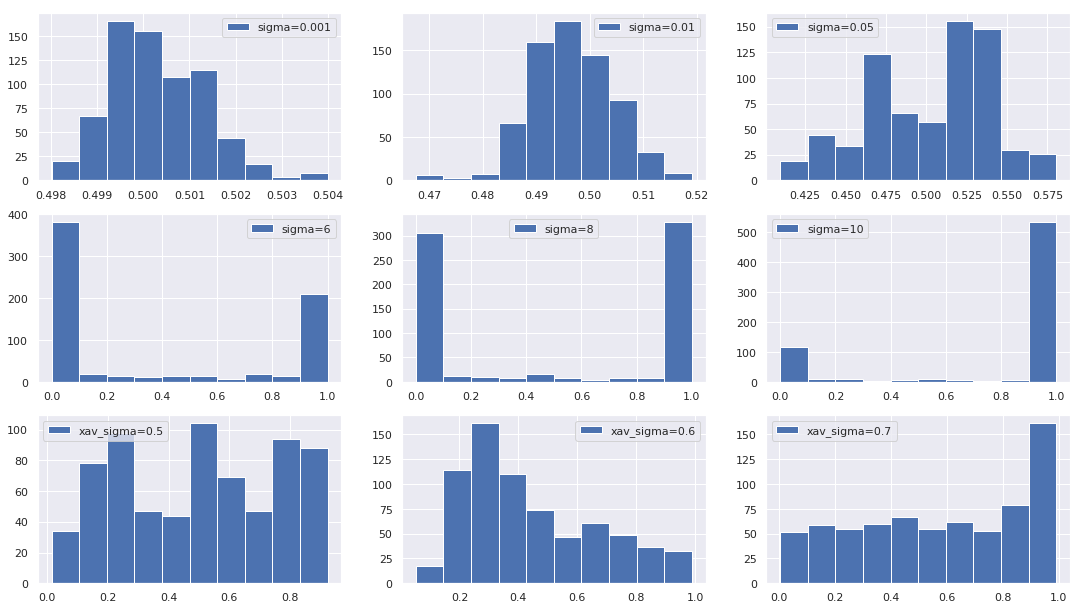

In [100]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out1[:, 3])
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out1[:, 3])
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out1[:, 3])
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out1[:, 3])
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out1[:, 3])
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out1[:, 3])
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out1[:, 3])
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out1[:, 3])
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out1[:, 3])
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

Гистограммы выходов нейрона с 2го слоя при различных sigma

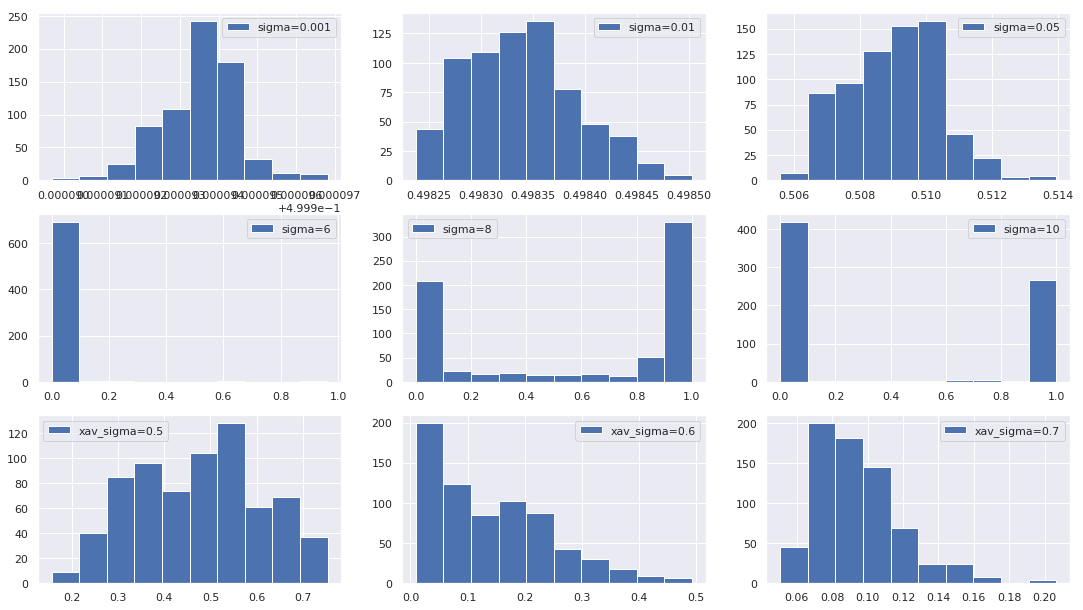

In [104]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out3[:, 5])
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out3[:, 5])
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out3[:, 5])
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out3[:, 5])
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out3[:, 5])
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out3[:, 5])
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out3[:, 5])
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out3[:, 5])
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out3[:, 5])
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

Гистограммы выходов нейрона с output слоя при различных sigma

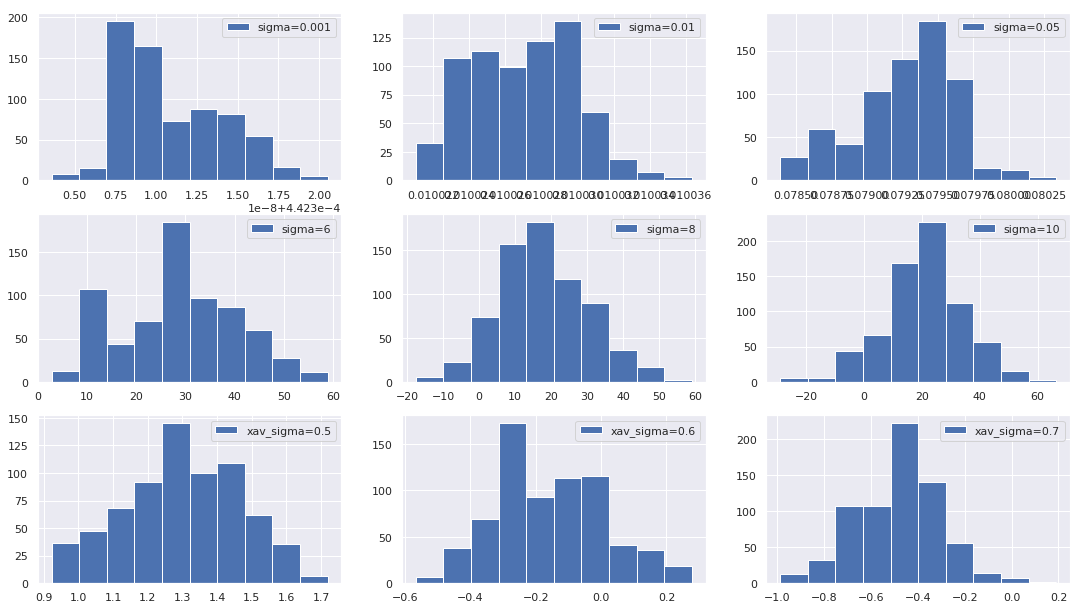

In [106]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out4)
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out4)
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out4)
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out4)
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out4)
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out4)
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out4)
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out4)
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out4)
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

двойственные потенциалы

In [107]:
sigma_list = [0.001, 0.01, 0.05, 6, 8, 10, 0.5, 0.6, 0.7]
dst = []
for sigma in sigma_list:
    
    with tf.GradientTape() as tape:
        out_0, out_2, out_4 = forward(is_Xavier=False, std = sigma)
        loss = tf.keras.losses.MSE(y_train, out_4)
        dout_0, dout_2, dout_4 = tape.gradient(loss, [out_0, out_2, out_4])
        dst.append([dout_0.numpy(), dout_2.numpy(), dout_4.numpy()])

In [113]:
#min std
s1out1, s1out3, s1out4 = dst[0]
s2out1, s2out3, s2out4 = dst[1]
s3out1, s3out3, s3out4 = dst[2]
#max std
s4out1, s4out3, s4out4 = dst[3]
s5out1, s5out3, s5out4 = dst[4]
s6out1, s6out3, s6out4 = dst[5]
#xav std
s7out1, s7out3, s7out4 = dst[6]
s8out1, s8out3, s8out4 = dst[7]
s9out1, s9out3, s9out4 = dst[8]

Гистограммы выходов нейрона с 1го слоя при различных sigma

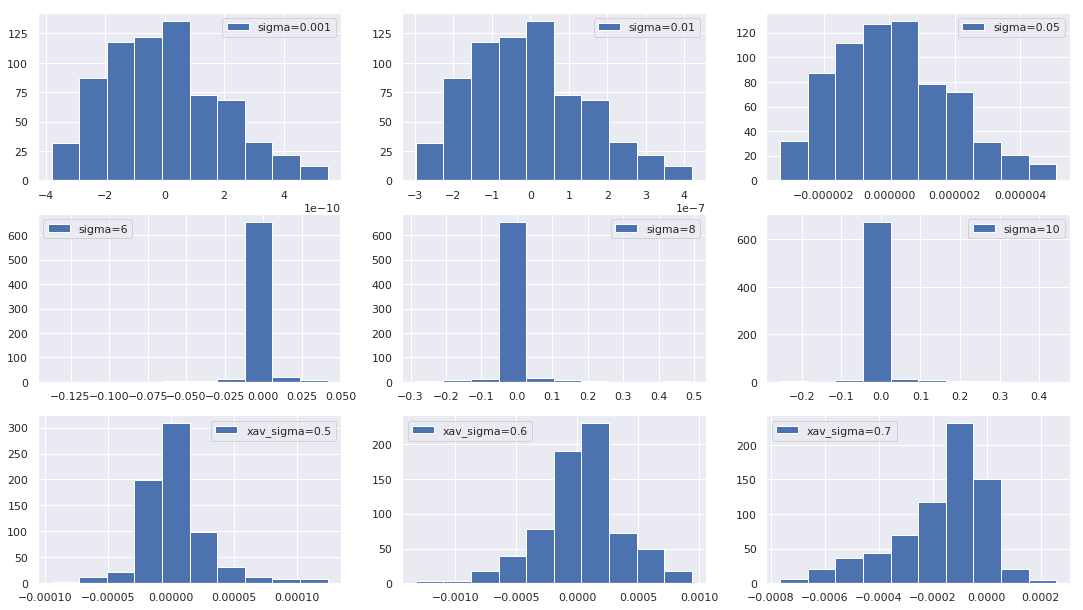

In [114]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out1[:, 3])
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out1[:, 3])
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out1[:, 3])
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out1[:, 3])
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out1[:, 3])
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out1[:, 3])
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out1[:, 3])
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out1[:, 3])
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out1[:, 3])
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

Гистограммы выходов нейрона с 2го слоя при различных sigma

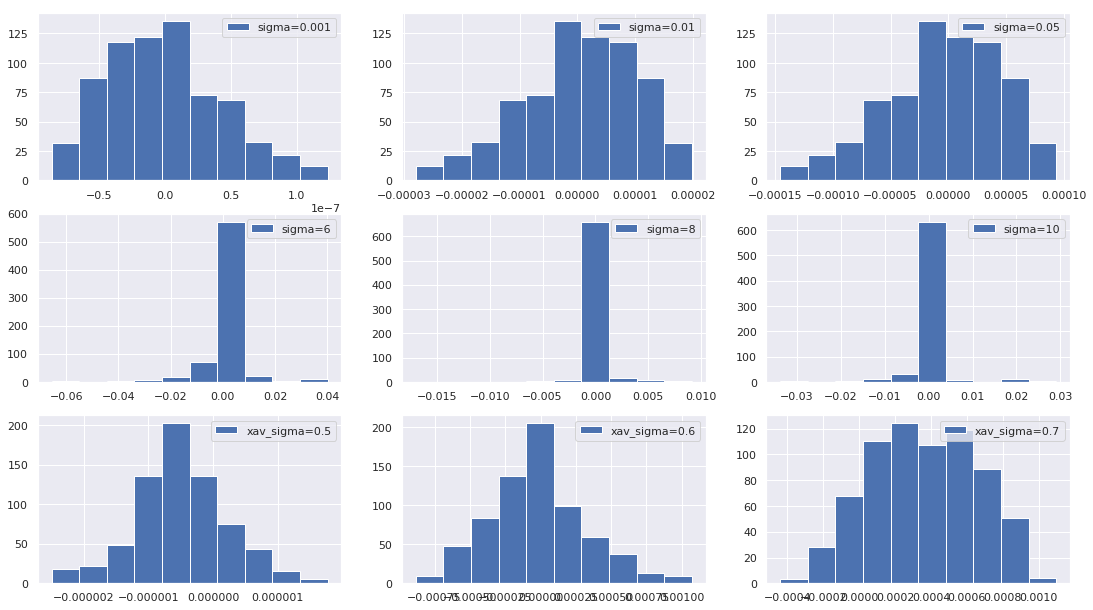

In [115]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out3[:, 5])
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out3[:, 5])
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out3[:, 5])
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out3[:, 5])
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out3[:, 5])
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out3[:, 5])
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out3[:, 5])
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out3[:, 5])
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out3[:, 5])
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

Гистограммы выходов нейрона с output слоя при различных sigma

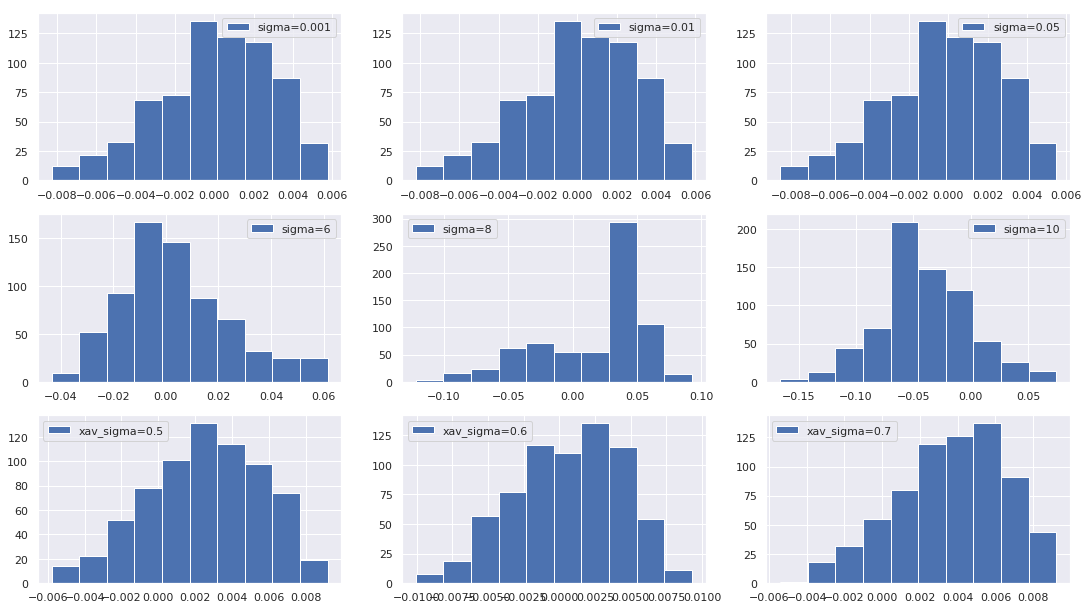

In [116]:
fig, ax =  plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

ax[0, 0].hist(s1out4)
ax[0, 0].legend(['sigma=0.001'])

ax[0, 1].hist(s2out4)
ax[0, 1].legend(['sigma=0.01'])

ax[0, 2].hist(s3out4)
ax[0, 2].legend(['sigma=0.05'])

ax[1, 0].hist(s4out4)
ax[1, 0].legend(['sigma=6'])

ax[1, 1].hist(s5out4)
ax[1, 1].legend(['sigma=8'])

ax[1, 2].hist(s6out4)
ax[1, 2].legend(['sigma=10'])

ax[2, 0].hist(s7out4)
ax[2, 0].legend(['xav_sigma=0.5'])

ax[2, 1].hist(s8out4)
ax[2, 1].legend(['xav_sigma=0.6'])

ax[2, 2].hist(s9out4)
ax[2, 2].legend(['xav_sigma=0.7'])

plt.show()

## г) Кривые обучения

In [29]:

network = join(
    Input(8), 
    Sigmoid(20, weight = init.Normal(std=0.6)),
    Sigmoid(20, weight = init.Normal(std=0.6)),
    Linear(1, weight = init.Normal(std=0.6)),
)

optimizer1 = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=bs, regularizer=None, 
                                       loss='mse', step=0.10, signals=on_epoch_end)
optimizer1.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 1000)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-8:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.63 seconds
#1 : [159 ms] train: 1.157021, valid: 1.044448
#2 : [2 ms] train: 1.063140, valid: 1.006143
#3 : [2 ms] train: 1.021212, valid: 0.982248
#4 : [2 ms] train: 0.997110, valid: 0.965966
#5 : [2 ms] train: 0.979010, valid: 0.951196
#6 : [1 ms] train: 0.963145, valid: 0.937631
#7 : [1 ms] train: 0.948216, valid: 0.924451
#8 : [1 ms] train: 0.933785, valid: 0.911598
#9 : [1 ms] train: 0.919684, valid: 0.899005
#10 : [1 ms] train: 0.905845, valid: 0.886598
#11 : [4 ms] train: 0.892230, valid: 0.874399
#12 : [2 ms] train: 0.87881

#25 : [2 ms] train: 0.718988, valid: 0.718658
#26 : [2 ms] train: 0.707775, valid: 0.708588
#27 : [1 ms] train: 0.696736, valid: 0.698677
#28 : [1 ms] train: 0.685875, valid: 0.688933
#29 : [1 ms] train: 0.675201, valid: 0.679361
#30 : [1 ms] train: 0.664719, valid: 0.669966
#31 : [1 ms] train: 0.654436, valid: 0.660754
#32 : [1 ms] train: 0.644358, valid: 0.651732
#33 : [7 ms] train: 0.634493, valid: 0.642905
#34 : [2 ms] train: 0.624844, valid: 0.634277
#35 : [2 ms] train: 0.615419, valid: 0.625854
#36 : [1 ms] train: 0.606222, valid: 0.617639
#37 : [1 ms] train: 0.597257, valid: 0.609636
#38 : [1 ms] train: 0.588529, valid: 0.601848
#39 : [1 ms] train: 0.580040, valid: 0.594277
#40 : [1 ms] train: 0.571792, valid: 0.586925
#41 : [1 ms] train: 0.563789, valid: 0.579794
#42 : [1 ms] train: 0.556031, valid: 0.572883
#43 : [1 ms] train: 0.548518, valid: 0.566192
#44 : [1 ms] train: 0.541250, valid: 0.559721
#45 : [2 ms] train: 0.534226, valid: 0.553468
#46 : [2 ms] train: 0.527444, vali

#137 : [2 ms] train: 0.351213, valid: 0.380323
#138 : [2 ms] train: 0.350548, valid: 0.379644
#139 : [2 ms] train: 0.349886, valid: 0.378969
#140 : [2 ms] train: 0.349227, valid: 0.378299
#141 : [2 ms] train: 0.348572, valid: 0.377634
#142 : [1 ms] train: 0.347920, valid: 0.376973
#143 : [2 ms] train: 0.347271, valid: 0.376316
#144 : [1 ms] train: 0.346625, valid: 0.375664
#145 : [1 ms] train: 0.345983, valid: 0.375016
#146 : [2 ms] train: 0.345343, valid: 0.374372
#147 : [2 ms] train: 0.344706, valid: 0.373732
#148 : [1 ms] train: 0.344072, valid: 0.373096
#149 : [2 ms] train: 0.343440, valid: 0.372464
#150 : [1 ms] train: 0.342811, valid: 0.371835
#151 : [1 ms] train: 0.342185, valid: 0.371211
#152 : [2 ms] train: 0.341561, valid: 0.370589
#153 : [2 ms] train: 0.340940, valid: 0.369971
#154 : [1 ms] train: 0.340322, valid: 0.369357
#155 : [2 ms] train: 0.339705, valid: 0.368746
#156 : [1 ms] train: 0.339091, valid: 0.368138
#157 : [1 ms] train: 0.338480, valid: 0.367533
#158 : [2 ms]

#256 : [2 ms] train: 0.287266, valid: 0.318351
#257 : [3 ms] train: 0.286826, valid: 0.317934
#258 : [4 ms] train: 0.286389, valid: 0.317519
#259 : [2 ms] train: 0.285952, valid: 0.317106
#260 : [2 ms] train: 0.285517, valid: 0.316693
#261 : [2 ms] train: 0.285082, valid: 0.316282
#262 : [2 ms] train: 0.284650, valid: 0.315872
#263 : [1 ms] train: 0.284218, valid: 0.315463
#264 : [1 ms] train: 0.283787, valid: 0.315056
#265 : [2 ms] train: 0.283358, valid: 0.314649
#266 : [1 ms] train: 0.282930, valid: 0.314244
#267 : [1 ms] train: 0.282503, valid: 0.313840
#268 : [1 ms] train: 0.282078, valid: 0.313438
#269 : [2 ms] train: 0.281653, valid: 0.313036
#270 : [2 ms] train: 0.281230, valid: 0.312636
#271 : [1 ms] train: 0.280808, valid: 0.312236
#272 : [2 ms] train: 0.280387, valid: 0.311838
#273 : [1 ms] train: 0.279968, valid: 0.311442
#274 : [1 ms] train: 0.279549, valid: 0.311046
#275 : [2 ms] train: 0.279132, valid: 0.310651
#276 : [1 ms] train: 0.278716, valid: 0.310258
#277 : [1 ms]

#368 : [2 ms] train: 0.244953, valid: 0.278279
#369 : [2 ms] train: 0.244632, valid: 0.277972
#370 : [1 ms] train: 0.244312, valid: 0.277667
#371 : [2 ms] train: 0.243993, valid: 0.277362
#372 : [2 ms] train: 0.243675, valid: 0.277057
#373 : [2 ms] train: 0.243358, valid: 0.276754
#374 : [1 ms] train: 0.243042, valid: 0.276451
#375 : [1 ms] train: 0.242727, valid: 0.276150
#376 : [2 ms] train: 0.242412, valid: 0.275848
#377 : [2 ms] train: 0.242099, valid: 0.275548
#378 : [1 ms] train: 0.241787, valid: 0.275249
#379 : [2 ms] train: 0.241475, valid: 0.274950
#380 : [1 ms] train: 0.241165, valid: 0.274653
#381 : [2 ms] train: 0.240855, valid: 0.274356
#382 : [1 ms] train: 0.240547, valid: 0.274059
#383 : [2 ms] train: 0.240239, valid: 0.273764
#384 : [1 ms] train: 0.239932, valid: 0.273470
#385 : [2 ms] train: 0.239626, valid: 0.273176
#386 : [1 ms] train: 0.239322, valid: 0.272883
#387 : [1 ms] train: 0.239018, valid: 0.272591
#388 : [1 ms] train: 0.238715, valid: 0.272299
#389 : [1 ms]

#482 : [2 ms] train: 0.214236, valid: 0.248402
#483 : [2 ms] train: 0.214016, valid: 0.248184
#484 : [1 ms] train: 0.213797, valid: 0.247967
#485 : [2 ms] train: 0.213579, valid: 0.247750
#486 : [1 ms] train: 0.213362, valid: 0.247534
#487 : [1 ms] train: 0.213145, valid: 0.247319
#488 : [2 ms] train: 0.212929, valid: 0.247105
#489 : [2 ms] train: 0.212715, valid: 0.246892
#490 : [1 ms] train: 0.212501, valid: 0.246679
#491 : [1 ms] train: 0.212287, valid: 0.246467
#492 : [1 ms] train: 0.212075, valid: 0.246255
#493 : [1 ms] train: 0.211863, valid: 0.246045
#494 : [1 ms] train: 0.211652, valid: 0.245835
#495 : [1 ms] train: 0.211442, valid: 0.245626
#496 : [1 ms] train: 0.211233, valid: 0.245417
#497 : [2 ms] train: 0.211024, valid: 0.245210
#498 : [2 ms] train: 0.210817, valid: 0.245003
#499 : [3 ms] train: 0.210610, valid: 0.244797
#500 : [2 ms] train: 0.210403, valid: 0.244591
#501 : [1 ms] train: 0.210198, valid: 0.244386
#502 : [2 ms] train: 0.209993, valid: 0.244182
#503 : [1 ms]

#603 : [2 ms] train: 0.192931, valid: 0.226953
#604 : [1 ms] train: 0.192794, valid: 0.226812
#605 : [1 ms] train: 0.192657, valid: 0.226672
#606 : [1 ms] train: 0.192520, valid: 0.226533
#607 : [1 ms] train: 0.192384, valid: 0.226394
#608 : [1 ms] train: 0.192249, valid: 0.226255
#609 : [2 ms] train: 0.192114, valid: 0.226117
#610 : [3 ms] train: 0.191980, valid: 0.225980
#611 : [2 ms] train: 0.191846, valid: 0.225843
#612 : [2 ms] train: 0.191713, valid: 0.225706
#613 : [2 ms] train: 0.191580, valid: 0.225570
#614 : [2 ms] train: 0.191448, valid: 0.225435
#615 : [2 ms] train: 0.191316, valid: 0.225300
#616 : [2 ms] train: 0.191185, valid: 0.225165
#617 : [2 ms] train: 0.191054, valid: 0.225031
#618 : [2 ms] train: 0.190923, valid: 0.224898
#619 : [2 ms] train: 0.190794, valid: 0.224765
#620 : [2 ms] train: 0.190664, valid: 0.224632
#621 : [2 ms] train: 0.190535, valid: 0.224500
#622 : [2 ms] train: 0.190407, valid: 0.224368
#623 : [2 ms] train: 0.190279, valid: 0.224237
#624 : [2 ms]

#718 : [2 ms] train: 0.180000, valid: 0.213657
#719 : [2 ms] train: 0.179908, valid: 0.213562
#720 : [1 ms] train: 0.179817, valid: 0.213468
#721 : [1 ms] train: 0.179726, valid: 0.213374
#722 : [1 ms] train: 0.179635, valid: 0.213281
#723 : [2 ms] train: 0.179544, valid: 0.213188
#724 : [1 ms] train: 0.179453, valid: 0.213095
#725 : [2 ms] train: 0.179363, valid: 0.213002
#726 : [3 ms] train: 0.179273, valid: 0.212910
#727 : [2 ms] train: 0.179184, valid: 0.212818
#728 : [2 ms] train: 0.179094, valid: 0.212726
#729 : [2 ms] train: 0.179005, valid: 0.212635
#730 : [2 ms] train: 0.178916, valid: 0.212543
#731 : [1 ms] train: 0.178828, valid: 0.212453
#732 : [1 ms] train: 0.178739, valid: 0.212362
#733 : [2 ms] train: 0.178651, valid: 0.212272
#734 : [1 ms] train: 0.178563, valid: 0.212182
#735 : [2 ms] train: 0.178476, valid: 0.212092
#736 : [1 ms] train: 0.178388, valid: 0.212003
#737 : [1 ms] train: 0.178301, valid: 0.211913
#738 : [1 ms] train: 0.178215, valid: 0.211825
#739 : [2 ms]

#841 : [2 ms] train: 0.170375, valid: 0.203970
#842 : [1 ms] train: 0.170308, valid: 0.203904
#843 : [1 ms] train: 0.170240, valid: 0.203840
#844 : [1 ms] train: 0.170173, valid: 0.203774
#845 : [2 ms] train: 0.170106, valid: 0.203710
#846 : [2 ms] train: 0.170040, valid: 0.203645
#847 : [1 ms] train: 0.169973, valid: 0.203581
#848 : [2 ms] train: 0.169906, valid: 0.203517
#849 : [2 ms] train: 0.169840, valid: 0.203453
#850 : [2 ms] train: 0.169774, valid: 0.203389
#851 : [1 ms] train: 0.169708, valid: 0.203326
#852 : [1 ms] train: 0.169642, valid: 0.203262
#853 : [1 ms] train: 0.169576, valid: 0.203199
#854 : [2 ms] train: 0.169510, valid: 0.203136
#855 : [2 ms] train: 0.169444, valid: 0.203073
#856 : [2 ms] train: 0.169379, valid: 0.203010
#857 : [2 ms] train: 0.169313, valid: 0.202948
#858 : [1 ms] train: 0.169248, valid: 0.202885
#859 : [1 ms] train: 0.169183, valid: 0.202824
#860 : [2 ms] train: 0.169118, valid: 0.202761
#861 : [2 ms] train: 0.169053, valid: 0.202700
#862 : [1 ms]

std = 0.1 При меньших не сходится процесс

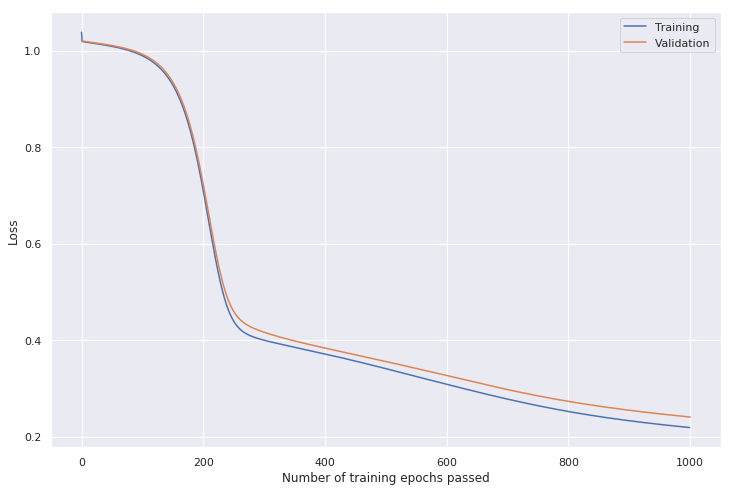

In [26]:
optimizer1.plot_errors()

std = 8; процесс не сходится

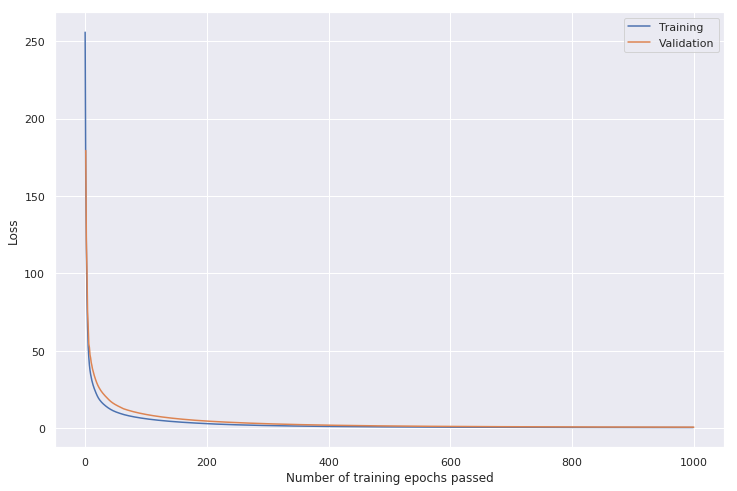

In [28]:
optimizer1.plot_errors()

std = 0.6; то, что дал Xavier.

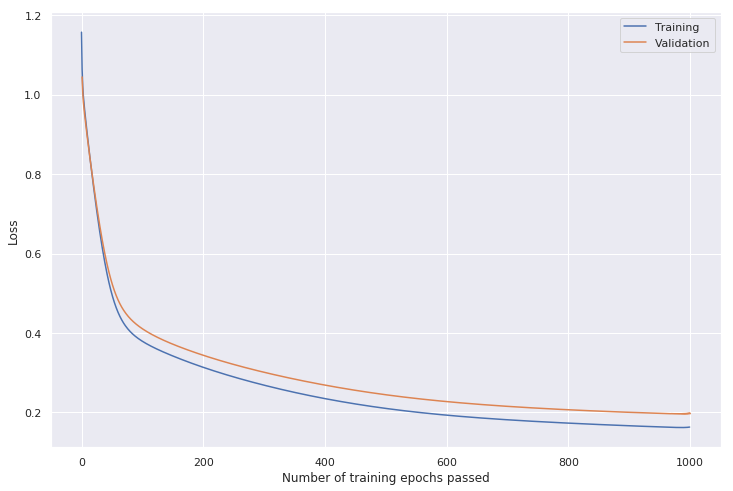

In [30]:
optimizer1.plot_errors()

## д) Заполнить таблицу по результатам обучения

In [33]:
def for_st_train(init_weight):

    network = join(
    Input(8), 
    Sigmoid(20, weight = init_weight),
    Sigmoid(20, weight = init_weight),
    Linear(1, weight = init_weight),
    )

    optimizer1 = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=bs, regularizer=None, 
                                       loss='mse', step=0.15, signals=on_epoch_end)
    optimizer1.train(train_dset.X.values, train_dset.y.values, X_val.values, y_val.values, epochs= 100)
    
    return (optimizer1.errors.train[-1], optimizer1.score(X_test, y_test))

In [29]:
class Trunc_Norm(init.Initializer):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def sample(self, shape):
        return tf.random.truncated_normal(shape, self.mean, self.std)

In [39]:
sigma = 2.0
tr_errors = []
tst_errors = []
#init_w = init.Normal(std = sigma)
#init_w = init.Uniform(-np.sqrt(3)*sigma, np.sqrt(3)*sigma)
init_w = Trunc_Norm(0, sigma)

for _ in range(10):
    
    tr_err, tst_err = for_st_train(init_w)
    tr_errors.append(tr_err)
    tst_errors.append(tst_err)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-21:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.49 seconds


#1 : [371 ms] train: 34.682556, valid: 246.573471
#2 : [2 ms] train: 248.714020, valid: 1184.557983
#3 : [1 ms] train: 1188.416504, valid: 879.816162
#4 : [1 ms] train: 883.431824, valid: 108.728745
#5 : [1 ms] train: 111.634979, valid: 1.988754
#6 : [2 ms] train: 2.018311, valid: 1.267095
#7 : [1 ms] train: 1.318725, valid: 1.187591
#8 : [1 ms] train: 1.246727, valid: 1.166806
#9 : [1 ms] train: 1.227296, valid: 1.153190
#10 : [1 ms] train: 1.213170, valid: 1.141499
#11 : [1 ms] train: 1.200453, valid: 1.130947
#12 : [1 ms] train: 1.188748, valid: 1.121308
#13 : [2 ms] train: 1.177939, valid: 1.112466
#14 : [1 ms] train: 1.167942, valid: 1.104334
#15 : [1 ms] train: 1.158682, valid: 1.096841
#16 : [1 ms] train: 1.150092, valid: 1.089926
#17 : [1 ms] train: 1.142112, valid: 1.083531
#18 : [1 ms] train: 1.134686, valid: 1.077608
#19 : [1 ms] train: 1.127767, valid: 1.072111
#20 : [1 ms] train: 1.121310, valid: 1.067003
#21 : [1 ms] train: 1.115274, valid: 1.062247
#22 : [1 ms] train: 1.

#146 : [2 ms] train: 0.934365, valid: 0.943605
#147 : [1 ms] train: 0.933317, valid: 0.943241
#148 : [1 ms] train: 0.932265, valid: 0.942870
#149 : [1 ms] train: 0.931210, valid: 0.942492
#150 : [1 ms] train: 0.930151, valid: 0.942108
#151 : [1 ms] train: 0.929089, valid: 0.941716
#152 : [1 ms] train: 0.928022, valid: 0.941316
#153 : [1 ms] train: 0.926952, valid: 0.940908
#154 : [1 ms] train: 0.925877, valid: 0.940492
#155 : [1 ms] train: 0.924797, valid: 0.940067
#156 : [1 ms] train: 0.923714, valid: 0.939633
#157 : [1 ms] train: 0.922626, valid: 0.939190
#158 : [1 ms] train: 0.921533, valid: 0.938736
#159 : [1 ms] train: 0.920435, valid: 0.938274
#160 : [1 ms] train: 0.919332, valid: 0.937800
#161 : [1 ms] train: 0.918224, valid: 0.937317
#162 : [1 ms] train: 0.917111, valid: 0.936823
#163 : [1 ms] train: 0.915992, valid: 0.936318
#164 : [1 ms] train: 0.914868, valid: 0.935802
#165 : [1 ms] train: 0.913738, valid: 0.935274
#166 : [1 ms] train: 0.912602, valid: 0.934736
#167 : [1 ms]

#287 : [2 ms] train: 0.743420, valid: 0.805829
#288 : [2 ms] train: 0.742162, valid: 0.804741
#289 : [1 ms] train: 0.740915, valid: 0.803663
#290 : [1 ms] train: 0.739677, valid: 0.802592
#291 : [1 ms] train: 0.738448, valid: 0.801531
#292 : [1 ms] train: 0.737230, valid: 0.800479
#293 : [1 ms] train: 0.736021, valid: 0.799435
#294 : [1 ms] train: 0.734822, valid: 0.798400
#295 : [1 ms] train: 0.733633, valid: 0.797374
#296 : [1 ms] train: 0.732453, valid: 0.796358
#297 : [1 ms] train: 0.731284, valid: 0.795350
#298 : [2 ms] train: 0.730124, valid: 0.794351
#299 : [2 ms] train: 0.728974, valid: 0.793361
#300 : [1 ms] train: 0.727833, valid: 0.792379
#301 : [1 ms] train: 0.726703, valid: 0.791407
#302 : [1 ms] train: 0.725582, valid: 0.790443
#303 : [1 ms] train: 0.724471, valid: 0.789488
#304 : [1 ms] train: 0.723369, valid: 0.788542
#305 : [1 ms] train: 0.722277, valid: 0.787605
#306 : [1 ms] train: 0.721195, valid: 0.786676
#307 : [1 ms] train: 0.720122, valid: 0.785756
#308 : [1 ms]

#426 : [2 ms] train: 0.632416, valid: 0.709588
#427 : [1 ms] train: 0.631783, valid: 0.709017
#428 : [1 ms] train: 0.631148, valid: 0.708445
#429 : [1 ms] train: 0.630512, valid: 0.707871
#430 : [1 ms] train: 0.629874, valid: 0.707295
#431 : [1 ms] train: 0.629234, valid: 0.706716
#432 : [1 ms] train: 0.628593, valid: 0.706136
#433 : [1 ms] train: 0.627950, valid: 0.705553
#434 : [1 ms] train: 0.627305, valid: 0.704968
#435 : [1 ms] train: 0.626658, valid: 0.704380
#436 : [2 ms] train: 0.626009, valid: 0.703790
#437 : [1 ms] train: 0.625359, valid: 0.703197
#438 : [1 ms] train: 0.624706, valid: 0.702601
#439 : [1 ms] train: 0.624051, valid: 0.702003
#440 : [1 ms] train: 0.623393, valid: 0.701402
#441 : [2 ms] train: 0.622734, valid: 0.700798
#442 : [1 ms] train: 0.622072, valid: 0.700190
#443 : [1 ms] train: 0.621407, valid: 0.699580
#444 : [2 ms] train: 0.620740, valid: 0.698966
#445 : [2 ms] train: 0.620070, valid: 0.698348
#446 : [1 ms] train: 0.619398, valid: 0.697728
#447 : [1 ms]

#556 : [2 ms] train: 0.486216, valid: 0.546710
#557 : [1 ms] train: 0.484375, valid: 0.544644
#558 : [1 ms] train: 0.482563, valid: 0.542624
#559 : [1 ms] train: 0.480781, valid: 0.540650
#560 : [1 ms] train: 0.479030, valid: 0.538725
#561 : [1 ms] train: 0.477310, valid: 0.536847
#562 : [1 ms] train: 0.475622, valid: 0.535018
#563 : [1 ms] train: 0.473967, valid: 0.533238
#564 : [1 ms] train: 0.472345, valid: 0.531505
#565 : [1 ms] train: 0.470756, valid: 0.529821
#566 : [1 ms] train: 0.469199, valid: 0.528183
#567 : [1 ms] train: 0.467675, valid: 0.526593
#568 : [1 ms] train: 0.466183, valid: 0.525047
#569 : [1 ms] train: 0.464722, valid: 0.523546
#570 : [1 ms] train: 0.463292, valid: 0.522089
#571 : [1 ms] train: 0.461892, valid: 0.520673
#572 : [1 ms] train: 0.460521, valid: 0.519299
#573 : [2 ms] train: 0.459180, valid: 0.517963
#574 : [1 ms] train: 0.457865, valid: 0.516666
#575 : [1 ms] train: 0.456578, valid: 0.515406
#576 : [1 ms] train: 0.455317, valid: 0.514182
#577 : [1 ms]


#694 : [2 ms] train: 0.376859, valid: 0.449436
#695 : [1 ms] train: 0.376451, valid: 0.449137
#696 : [2 ms] train: 0.376044, valid: 0.448840
#697 : [2 ms] train: 0.375640, valid: 0.448546
#698 : [2 ms] train: 0.375237, valid: 0.448254
#699 : [1 ms] train: 0.374837, valid: 0.447964
#700 : [1 ms] train: 0.374439, valid: 0.447676
#701 : [1 ms] train: 0.374043, valid: 0.447391
#702 : [1 ms] train: 0.373649, valid: 0.447107
#703 : [1 ms] train: 0.373258, valid: 0.446826
#704 : [1 ms] train: 0.372868, valid: 0.446547
#705 : [1 ms] train: 0.372480, valid: 0.446270
#706 : [1 ms] train: 0.372094, valid: 0.445995
#707 : [1 ms] train: 0.371710, valid: 0.445721
#708 : [1 ms] train: 0.371328, valid: 0.445450
#709 : [1 ms] train: 0.370948, valid: 0.445181
#710 : [1 ms] train: 0.370570, valid: 0.444914
#711 : [2 ms] train: 0.370194, valid: 0.444649
#712 : [1 ms] train: 0.369820, valid: 0.444385
#713 : [1 ms] train: 0.369447, valid: 0.444124
#714 : [1 ms] train: 0.369077, valid: 0.443864
#715 : [1 ms


#843 : [2 ms] train: 0.332489, valid: 0.420787
#844 : [1 ms] train: 0.332270, valid: 0.420659
#845 : [2 ms] train: 0.332053, valid: 0.420532
#846 : [1 ms] train: 0.331836, valid: 0.420405
#847 : [1 ms] train: 0.331619, valid: 0.420278
#848 : [2 ms] train: 0.331404, valid: 0.420152
#849 : [1 ms] train: 0.331189, valid: 0.420026
#850 : [1 ms] train: 0.330975, valid: 0.419901
#851 : [1 ms] train: 0.330762, valid: 0.419776
#852 : [1 ms] train: 0.330550, valid: 0.419652
#853 : [1 ms] train: 0.330338, valid: 0.419528
#854 : [1 ms] train: 0.330127, valid: 0.419404
#855 : [1 ms] train: 0.329917, valid: 0.419281
#856 : [1 ms] train: 0.329707, valid: 0.419158
#857 : [1 ms] train: 0.329499, valid: 0.419036
#858 : [1 ms] train: 0.329290, valid: 0.418914
#859 : [1 ms] train: 0.329083, valid: 0.418793
#860 : [1 ms] train: 0.328876, valid: 0.418671
#861 : [2 ms] train: 0.328671, valid: 0.418551
#862 : [1 ms] train: 0.328465, valid: 0.418430
#863 : [1 ms] train: 0.328261, valid: 0.418310
#864 : [1 ms

#995 : [2 ms] train: 0.306155, valid: 0.404724
#996 : [1 ms] train: 0.306016, valid: 0.404632
#997 : [1 ms] train: 0.305878, valid: 0.404540
#998 : [2 ms] train: 0.305740, valid: 0.404448
#999 : [1 ms] train: 0.305602, valid: 0.404356
#1000 : [1 ms] train: 0.305465, valid: 0.404264

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-22:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.55 seconds


#1 : [380 ms] train: 19.007807, valid: 47.876255
#2 : [1 ms] train: 47.687820, valid: 161.729782
#3 : [1 ms] train: 164.041641, valid: 307.722107
#4 : [1 ms] train: 307.678802, valid: 134.006592
#5 : [1 ms] train: 138.784317, valid: 20.554611
#6 : [1 ms] train: 20.160236, valid: 3.064842
#7 : [1 ms] train: 3.219783, valid: 2.170099
#8 : [1 ms] train: 2.182466, valid: 1.763720
#9 : [1 ms] train: 1.778829, valid: 1.503154
#10 : [1 ms] train: 1.502782, valid: 1.316528
#11 : [1 ms] train: 1.307163, valid: 1.184950
#12 : [1 ms] train: 1.167638, valid: 1.091247
#13 : [1 ms] train: 1.067002, valid: 1.023988
#14 : [1 ms] train: 0.993389, valid: 0.975214
#15 : [1 ms] train: 0.938728, valid: 0.939447
#16 : [1 ms] train: 0.897495, valid: 0.912862
#17 : [1 ms] train: 0.865853, valid: 0.892761
#18 : [1 ms] train: 0.841094, valid: 0.877225
#19 : [1 ms] train: 0.821285, valid: 0.864883
#20 : [1 ms] train: 0.805035, valid: 0.854753
#21 : [1 ms] train: 0.791339, valid: 0.846138
#22 : [1 ms] train: 0.77

#150 : [2 ms] train: 0.445632, valid: 0.536259
#151 : [2 ms] train: 0.444446, valid: 0.534724
#152 : [2 ms] train: 0.443268, valid: 0.533201
#153 : [2 ms] train: 0.442098, valid: 0.531692
#154 : [1 ms] train: 0.440937, valid: 0.530195
#155 : [1 ms] train: 0.439785, valid: 0.528712
#156 : [1 ms] train: 0.438640, valid: 0.527241
#157 : [1 ms] train: 0.437505, valid: 0.525784
#158 : [1 ms] train: 0.436377, valid: 0.524339
#159 : [1 ms] train: 0.435258, valid: 0.522907
#160 : [2 ms] train: 0.434147, valid: 0.521489
#161 : [2 ms] train: 0.433044, valid: 0.520083
#162 : [2 ms] train: 0.431949, valid: 0.518691
#163 : [1 ms] train: 0.430862, valid: 0.517311
#164 : [1 ms] train: 0.429784, valid: 0.515945
#165 : [2 ms] train: 0.428713, valid: 0.514591
#166 : [2 ms] train: 0.427650, valid: 0.513250
#167 : [1 ms] train: 0.426595, valid: 0.511922
#168 : [1 ms] train: 0.425548, valid: 0.510607
#169 : [1 ms] train: 0.424509, valid: 0.509305
#170 : [2 ms] train: 0.423477, valid: 0.508015
#171 : [1 ms]

#297 : [2 ms] train: 0.334590, valid: 0.413353
#298 : [2 ms] train: 0.334100, valid: 0.412933
#299 : [2 ms] train: 0.333613, valid: 0.412515
#300 : [2 ms] train: 0.333128, valid: 0.412101
#301 : [1 ms] train: 0.332645, valid: 0.411689
#302 : [1 ms] train: 0.332164, valid: 0.411280
#303 : [1 ms] train: 0.331684, valid: 0.410873
#304 : [2 ms] train: 0.331207, valid: 0.410469
#305 : [1 ms] train: 0.330732, valid: 0.410068
#306 : [1 ms] train: 0.330259, valid: 0.409670
#307 : [2 ms] train: 0.329787, valid: 0.409274
#308 : [1 ms] train: 0.329318, valid: 0.408880
#309 : [1 ms] train: 0.328850, valid: 0.408490
#310 : [1 ms] train: 0.328384, valid: 0.408101
#311 : [1 ms] train: 0.327920, valid: 0.407715
#312 : [1 ms] train: 0.327458, valid: 0.407332
#313 : [1 ms] train: 0.326998, valid: 0.406951
#314 : [1 ms] train: 0.326540, valid: 0.406573
#315 : [1 ms] train: 0.326083, valid: 0.406197
#316 : [1 ms] train: 0.325628, valid: 0.405823
#317 : [1 ms] train: 0.325175, valid: 0.405452
#318 : [2 ms]

#425 : [2 ms] train: 0.284586, valid: 0.375357
#426 : [2 ms] train: 0.284273, valid: 0.375145
#427 : [2 ms] train: 0.283961, valid: 0.374933
#428 : [2 ms] train: 0.283650, valid: 0.374723
#429 : [2 ms] train: 0.283340, valid: 0.374513
#430 : [1 ms] train: 0.283031, valid: 0.374304
#431 : [1 ms] train: 0.282723, valid: 0.374096
#432 : [2 ms] train: 0.282416, valid: 0.373889
#433 : [2 ms] train: 0.282110, valid: 0.373682
#434 : [2 ms] train: 0.281805, valid: 0.373477
#435 : [1 ms] train: 0.281500, valid: 0.373272
#436 : [2 ms] train: 0.281197, valid: 0.373068
#437 : [1 ms] train: 0.280895, valid: 0.372865
#438 : [1 ms] train: 0.280593, valid: 0.372662
#439 : [1 ms] train: 0.280293, valid: 0.372461
#440 : [2 ms] train: 0.279993, valid: 0.372260
#441 : [1 ms] train: 0.279695, valid: 0.372059
#442 : [1 ms] train: 0.279397, valid: 0.371860
#443 : [1 ms] train: 0.279100, valid: 0.371661
#444 : [1 ms] train: 0.278804, valid: 0.371463
#445 : [1 ms] train: 0.278509, valid: 0.371266
#446 : [2 ms]

#574 : [2 ms] train: 0.247161, valid: 0.350347
#575 : [1 ms] train: 0.246963, valid: 0.350210
#576 : [2 ms] train: 0.246766, valid: 0.350073
#577 : [2 ms] train: 0.246570, valid: 0.349936
#578 : [2 ms] train: 0.246374, valid: 0.349800
#579 : [1 ms] train: 0.246179, valid: 0.349664
#580 : [1 ms] train: 0.245984, valid: 0.349528
#581 : [2 ms] train: 0.245790, valid: 0.349392
#582 : [1 ms] train: 0.245596, valid: 0.349257
#583 : [2 ms] train: 0.245403, valid: 0.349121
#584 : [2 ms] train: 0.245211, valid: 0.348987
#585 : [2 ms] train: 0.245019, valid: 0.348852
#586 : [2 ms] train: 0.244828, valid: 0.348717
#587 : [2 ms] train: 0.244638, valid: 0.348583
#588 : [2 ms] train: 0.244448, valid: 0.348449
#589 : [1 ms] train: 0.244258, valid: 0.348316
#590 : [1 ms] train: 0.244069, valid: 0.348182
#591 : [1 ms] train: 0.243881, valid: 0.348049
#592 : [1 ms] train: 0.243693, valid: 0.347916
#593 : [1 ms] train: 0.243506, valid: 0.347783
#594 : [2 ms] train: 0.243320, valid: 0.347650
#595 : [2 ms]

#718 : [2 ms] train: 0.223855, valid: 0.332444
#719 : [2 ms] train: 0.223723, valid: 0.332329
#720 : [1 ms] train: 0.223591, valid: 0.332213
#721 : [2 ms] train: 0.223459, valid: 0.332097
#722 : [2 ms] train: 0.223328, valid: 0.331982
#723 : [2 ms] train: 0.223197, valid: 0.331867
#724 : [1 ms] train: 0.223066, valid: 0.331751
#725 : [2 ms] train: 0.222936, valid: 0.331636
#726 : [1 ms] train: 0.222806, valid: 0.331521
#727 : [2 ms] train: 0.222676, valid: 0.331406
#728 : [1 ms] train: 0.222547, valid: 0.331291
#729 : [1 ms] train: 0.222417, valid: 0.331176
#730 : [2 ms] train: 0.222289, valid: 0.331061
#731 : [2 ms] train: 0.222160, valid: 0.330946
#732 : [2 ms] train: 0.222032, valid: 0.330831
#733 : [1 ms] train: 0.221904, valid: 0.330716
#734 : [1 ms] train: 0.221776, valid: 0.330602
#735 : [1 ms] train: 0.221649, valid: 0.330487
#736 : [2 ms] train: 0.221522, valid: 0.330373
#737 : [1 ms] train: 0.221395, valid: 0.330258
#738 : [1 ms] train: 0.221269, valid: 0.330144
#739 : [1 ms]

#861 : [3 ms] train: 0.207578, valid: 0.316459
#862 : [2 ms] train: 0.207479, valid: 0.316350
#863 : [2 ms] train: 0.207380, valid: 0.316241
#864 : [2 ms] train: 0.207281, valid: 0.316132
#865 : [2 ms] train: 0.207183, valid: 0.316023
#866 : [1 ms] train: 0.207085, valid: 0.315915
#867 : [2 ms] train: 0.206986, valid: 0.315806
#868 : [1 ms] train: 0.206888, valid: 0.315698
#869 : [1 ms] train: 0.206790, valid: 0.315589
#870 : [2 ms] train: 0.206693, valid: 0.315480
#871 : [2 ms] train: 0.206595, valid: 0.315372
#872 : [2 ms] train: 0.206498, valid: 0.315263
#873 : [2 ms] train: 0.206400, valid: 0.315155
#874 : [2 ms] train: 0.206303, valid: 0.315046
#875 : [1 ms] train: 0.206206, valid: 0.314938
#876 : [1 ms] train: 0.206109, valid: 0.314830
#877 : [1 ms] train: 0.206013, valid: 0.314721
#878 : [1 ms] train: 0.205916, valid: 0.314613
#879 : [1 ms] train: 0.205820, valid: 0.314505
#880 : [1 ms] train: 0.205723, valid: 0.314396
#881 : [2 ms] train: 0.205627, valid: 0.314288
#882 : [1 ms]

#991 : [2 ms] train: 0.195805, valid: 0.302559
#992 : [2 ms] train: 0.195721, valid: 0.302454
#993 : [2 ms] train: 0.195638, valid: 0.302349
#994 : [2 ms] train: 0.195554, valid: 0.302244
#995 : [2 ms] train: 0.195471, valid: 0.302139
#996 : [2 ms] train: 0.195388, valid: 0.302034
#997 : [2 ms] train: 0.195304, valid: 0.301929
#998 : [2 ms] train: 0.195221, valid: 0.301824
#999 : [2 ms] train: 0.195138, valid: 0.301719
#1000 : [2 ms] train: 0.195056, valid: 0.301614

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-23:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.71 seconds


#1 : [426 ms] train: 80.817749, valid: 807.268738
#2 : [2 ms] train: 804.873779, valid: 2517.227539
#3 : [1 ms] train: 2513.590576, valid: 221.436172
#4 : [1 ms] train: 222.510239, valid: 24.501699
#5 : [1 ms] train: 24.519451, valid: 6.153906
#6 : [1 ms] train: 6.212971, valid: 5.009800
#7 : [1 ms] train: 4.990252, valid: 4.137246
#8 : [1 ms] train: 4.037359, valid: 3.458691
#9 : [1 ms] train: 3.316404, valid: 2.954636
#10 : [1 ms] train: 2.791406, valid: 2.590109
#11 : [1 ms] train: 2.417513, valid: 2.329692
#12 : [1 ms] train: 2.152692, valid: 2.141779
#13 : [1 ms] train: 1.962600, valid: 2.001685
#14 : [1 ms] train: 1.821750, valid: 1.892406
#15 : [1 ms] train: 1.712912, valid: 1.803156
#16 : [1 ms] train: 1.625123, valid: 1.727342
#17 : [1 ms] train: 1.551585, valid: 1.660961
#18 : [1 ms] train: 1.488082, valid: 1.601553
#19 : [1 ms] train: 1.431934, valid: 1.547570
#20 : [1 ms] train: 1.381390, valid: 1.498011
#21 : [1 ms] train: 1.335285, valid: 1.452201
#22 : [1 ms] train: 1.29

#155 : [3 ms] train: 0.560252, valid: 0.643052
#156 : [2 ms] train: 0.558719, valid: 0.641712
#157 : [2 ms] train: 0.557197, valid: 0.640384
#158 : [2 ms] train: 0.555686, valid: 0.639069
#159 : [1 ms] train: 0.554185, valid: 0.637767
#160 : [1 ms] train: 0.552696, valid: 0.636476
#161 : [2 ms] train: 0.551217, valid: 0.635198
#162 : [2 ms] train: 0.549748, valid: 0.633932
#163 : [1 ms] train: 0.548290, valid: 0.632678
#164 : [2 ms] train: 0.546842, valid: 0.631436
#165 : [2 ms] train: 0.545404, valid: 0.630206
#166 : [2 ms] train: 0.543976, valid: 0.628987
#167 : [1 ms] train: 0.542558, valid: 0.627780
#168 : [1 ms] train: 0.541150, valid: 0.626584
#169 : [1 ms] train: 0.539752, valid: 0.625400
#170 : [1 ms] train: 0.538363, valid: 0.624227
#171 : [1 ms] train: 0.536984, valid: 0.623066
#172 : [1 ms] train: 0.535614, valid: 0.621915
#173 : [2 ms] train: 0.534253, valid: 0.620775
#174 : [1 ms] train: 0.532902, valid: 0.619645
#175 : [2 ms] train: 0.531560, valid: 0.618527
#176 : [1 ms]

#299 : [2 ms] train: 0.415828, valid: 0.523520
#300 : [1 ms] train: 0.415162, valid: 0.522901
#301 : [1 ms] train: 0.414498, valid: 0.522282
#302 : [2 ms] train: 0.413837, valid: 0.521665
#303 : [1 ms] train: 0.413178, valid: 0.521048
#304 : [1 ms] train: 0.412521, valid: 0.520433
#305 : [1 ms] train: 0.411867, valid: 0.519818
#306 : [1 ms] train: 0.411215, valid: 0.519204
#307 : [1 ms] train: 0.410565, valid: 0.518592
#308 : [1 ms] train: 0.409917, valid: 0.517980
#309 : [1 ms] train: 0.409272, valid: 0.517369
#310 : [1 ms] train: 0.408629, valid: 0.516760
#311 : [2 ms] train: 0.407988, valid: 0.516151
#312 : [1 ms] train: 0.407349, valid: 0.515543
#313 : [1 ms] train: 0.406713, valid: 0.514937
#314 : [1 ms] train: 0.406079, valid: 0.514331
#315 : [1 ms] train: 0.405446, valid: 0.513727
#316 : [1 ms] train: 0.404816, valid: 0.513124
#317 : [1 ms] train: 0.404188, valid: 0.512522
#318 : [1 ms] train: 0.403562, valid: 0.511920
#319 : [1 ms] train: 0.402938, valid: 0.511321
#320 : [2 ms]


#445 : [2 ms] train: 0.338083, valid: 0.451588
#446 : [2 ms] train: 0.337677, valid: 0.451247
#447 : [2 ms] train: 0.337272, valid: 0.450908
#448 : [2 ms] train: 0.336869, valid: 0.450570
#449 : [1 ms] train: 0.336468, valid: 0.450233
#450 : [2 ms] train: 0.336069, valid: 0.449899
#451 : [2 ms] train: 0.335672, valid: 0.449565
#452 : [1 ms] train: 0.335276, valid: 0.449233
#453 : [2 ms] train: 0.334882, valid: 0.448902
#454 : [2 ms] train: 0.334490, valid: 0.448572
#455 : [2 ms] train: 0.334100, valid: 0.448244
#456 : [1 ms] train: 0.333712, valid: 0.447917
#457 : [1 ms] train: 0.333326, valid: 0.447592
#458 : [1 ms] train: 0.332941, valid: 0.447268
#459 : [1 ms] train: 0.332558, valid: 0.446944
#460 : [1 ms] train: 0.332177, valid: 0.446623
#461 : [2 ms] train: 0.331798, valid: 0.446302
#462 : [1 ms] train: 0.331420, valid: 0.445982
#463 : [1 ms] train: 0.331044, valid: 0.445664
#464 : [2 ms] train: 0.330670, valid: 0.445347
#465 : [2 ms] train: 0.330298, valid: 0.445030
#466 : [2 ms

#579 : [2 ms] train: 0.296490, valid: 0.413235
#580 : [2 ms] train: 0.296249, valid: 0.412981
#581 : [2 ms] train: 0.296009, valid: 0.412727
#582 : [2 ms] train: 0.295770, valid: 0.412474
#583 : [2 ms] train: 0.295531, valid: 0.412222
#584 : [2 ms] train: 0.295293, valid: 0.411970
#585 : [2 ms] train: 0.295056, valid: 0.411718
#586 : [2 ms] train: 0.294820, valid: 0.411466
#587 : [2 ms] train: 0.294584, valid: 0.411215
#588 : [2 ms] train: 0.294349, valid: 0.410964
#589 : [2 ms] train: 0.294114, valid: 0.410714
#590 : [1 ms] train: 0.293881, valid: 0.410464
#591 : [1 ms] train: 0.293648, valid: 0.410214
#592 : [2 ms] train: 0.293415, valid: 0.409965
#593 : [2 ms] train: 0.293184, valid: 0.409716
#594 : [2 ms] train: 0.292953, valid: 0.409468
#595 : [2 ms] train: 0.292723, valid: 0.409220
#596 : [1 ms] train: 0.292493, valid: 0.408972
#597 : [1 ms] train: 0.292264, valid: 0.408725
#598 : [2 ms] train: 0.292036, valid: 0.408478
#599 : [2 ms] train: 0.291808, valid: 0.408231
#600 : [2 ms]

#711 : [2 ms] train: 0.269882, valid: 0.382938
#712 : [2 ms] train: 0.269713, valid: 0.382732
#713 : [2 ms] train: 0.269545, valid: 0.382527
#714 : [2 ms] train: 0.269377, valid: 0.382321
#715 : [1 ms] train: 0.269209, valid: 0.382116
#716 : [1 ms] train: 0.269042, valid: 0.381911
#717 : [1 ms] train: 0.268875, valid: 0.381707
#718 : [1 ms] train: 0.268709, valid: 0.381503
#719 : [1 ms] train: 0.268542, valid: 0.381299
#720 : [1 ms] train: 0.268377, valid: 0.381096
#721 : [1 ms] train: 0.268211, valid: 0.380893
#722 : [1 ms] train: 0.268046, valid: 0.380690
#723 : [1 ms] train: 0.267882, valid: 0.380487
#724 : [1 ms] train: 0.267718, valid: 0.380285
#725 : [2 ms] train: 0.267554, valid: 0.380084
#726 : [1 ms] train: 0.267390, valid: 0.379882
#727 : [1 ms] train: 0.267227, valid: 0.379681
#728 : [1 ms] train: 0.267064, valid: 0.379480
#729 : [1 ms] train: 0.266902, valid: 0.379279
#730 : [2 ms] train: 0.266740, valid: 0.379079
#731 : [2 ms] train: 0.266578, valid: 0.378879
#732 : [1 ms]

#849 : [2 ms] train: 0.249546, valid: 0.357229
#850 : [2 ms] train: 0.249415, valid: 0.357060
#851 : [2 ms] train: 0.249285, valid: 0.356892
#852 : [2 ms] train: 0.249155, valid: 0.356724
#853 : [1 ms] train: 0.249025, valid: 0.356556
#854 : [1 ms] train: 0.248895, valid: 0.356388
#855 : [2 ms] train: 0.248766, valid: 0.356221
#856 : [2 ms] train: 0.248636, valid: 0.356053
#857 : [1 ms] train: 0.248507, valid: 0.355886
#858 : [1 ms] train: 0.248378, valid: 0.355720
#859 : [1 ms] train: 0.248249, valid: 0.355553
#860 : [2 ms] train: 0.248121, valid: 0.355387
#861 : [1 ms] train: 0.247992, valid: 0.355221
#862 : [1 ms] train: 0.247864, valid: 0.355055
#863 : [1 ms] train: 0.247736, valid: 0.354889
#864 : [1 ms] train: 0.247608, valid: 0.354724
#865 : [1 ms] train: 0.247480, valid: 0.354559
#866 : [1 ms] train: 0.247353, valid: 0.354394
#867 : [1 ms] train: 0.247226, valid: 0.354229
#868 : [1 ms] train: 0.247098, valid: 0.354065
#869 : [2 ms] train: 0.246971, valid: 0.353900
#870 : [1 ms]

#984 : [2 ms] train: 0.233416, valid: 0.336418
#985 : [2 ms] train: 0.233306, valid: 0.336278
#986 : [2 ms] train: 0.233197, valid: 0.336138
#987 : [2 ms] train: 0.233088, valid: 0.335998
#988 : [1 ms] train: 0.232979, valid: 0.335858
#989 : [1 ms] train: 0.232870, valid: 0.335718
#990 : [2 ms] train: 0.232762, valid: 0.335579
#991 : [2 ms] train: 0.232653, valid: 0.335440
#992 : [2 ms] train: 0.232545, valid: 0.335301
#993 : [1 ms] train: 0.232437, valid: 0.335162
#994 : [1 ms] train: 0.232329, valid: 0.335023
#995 : [1 ms] train: 0.232221, valid: 0.334885
#996 : [1 ms] train: 0.232113, valid: 0.334747
#997 : [1 ms] train: 0.232005, valid: 0.334609
#998 : [2 ms] train: 0.231898, valid: 0.334471
#999 : [2 ms] train: 0.231790, valid: 0.334334
#1000 : [1 ms] train: 0.231683, valid: 0.334196

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_ep

#1 : [497 ms] train: 9.379663, valid: 20.156843
#2 : [1 ms] train: 20.465330, valid: 34.992180
#3 : [1 ms] train: 36.289268, valid: 55.494125
#4 : [2 ms] train: 56.028503, valid: 33.760548
#5 : [1 ms] train: 34.473225, valid: 14.725842
#6 : [1 ms] train: 14.662168, valid: 2.708189
#7 : [1 ms] train: 2.887957, valid: 1.332281
#8 : [1 ms] train: 1.403040, valid: 1.005642
#9 : [1 ms] train: 1.095354, valid: 0.941812
#10 : [2 ms] train: 1.008438, valid: 0.895715
#11 : [1 ms] train: 0.956824, valid: 0.863734
#12 : [1 ms] train: 0.915132, valid: 0.833846
#13 : [1 ms] train: 0.878797, valid: 0.807836
#14 : [2 ms] train: 0.846573, valid: 0.784186
#15 : [1 ms] train: 0.817804, valid: 0.762928
#16 : [1 ms] train: 0.791999, valid: 0.743627
#17 : [1 ms] train: 0.768759, valid: 0.726092
#18 : [1 ms] train: 0.747750, valid: 0.710089
#19 : [1 ms] train: 0.728692, valid: 0.695446
#20 : [1 ms] train: 0.711349, valid: 0.682002
#21 : [1 ms] train: 0.695519, valid: 0.669623
#22 : [1 ms] train: 0.681028, v

#148 : [2 ms] train: 0.335099, valid: 0.358518
#149 : [1 ms] train: 0.334194, valid: 0.357816
#150 : [2 ms] train: 0.333299, valid: 0.357121
#151 : [2 ms] train: 0.332414, valid: 0.356434
#152 : [2 ms] train: 0.331537, valid: 0.355755
#153 : [2 ms] train: 0.330671, valid: 0.355083
#154 : [2 ms] train: 0.329813, valid: 0.354418
#155 : [1 ms] train: 0.328964, valid: 0.353761
#156 : [1 ms] train: 0.328124, valid: 0.353110
#157 : [1 ms] train: 0.327293, valid: 0.352466
#158 : [2 ms] train: 0.326470, valid: 0.351829
#159 : [1 ms] train: 0.325655, valid: 0.351199
#160 : [2 ms] train: 0.324849, valid: 0.350575
#161 : [1 ms] train: 0.324051, valid: 0.349957
#162 : [2 ms] train: 0.323261, valid: 0.349346
#163 : [1 ms] train: 0.322479, valid: 0.348741
#164 : [2 ms] train: 0.321704, valid: 0.348141
#165 : [2 ms] train: 0.320937, valid: 0.347548
#166 : [1 ms] train: 0.320177, valid: 0.346960
#167 : [1 ms] train: 0.319425, valid: 0.346378
#168 : [1 ms] train: 0.318680, valid: 0.345801
#169 : [2 ms]

#277 : [2 ms] train: 0.263899, valid: 0.303446
#278 : [2 ms] train: 0.263544, valid: 0.303178
#279 : [2 ms] train: 0.263190, valid: 0.302913
#280 : [2 ms] train: 0.262837, valid: 0.302649
#281 : [1 ms] train: 0.262487, valid: 0.302386
#282 : [1 ms] train: 0.262138, valid: 0.302124
#283 : [2 ms] train: 0.261790, valid: 0.301865
#284 : [1 ms] train: 0.261444, valid: 0.301606
#285 : [5 ms] train: 0.261099, valid: 0.301349
#286 : [1 ms] train: 0.260756, valid: 0.301093
#287 : [2 ms] train: 0.260414, valid: 0.300839
#288 : [1 ms] train: 0.260074, valid: 0.300586
#289 : [1 ms] train: 0.259735, valid: 0.300334
#290 : [1 ms] train: 0.259398, valid: 0.300084
#291 : [1 ms] train: 0.259062, valid: 0.299835
#292 : [1 ms] train: 0.258728, valid: 0.299587
#293 : [2 ms] train: 0.258395, valid: 0.299341
#294 : [1 ms] train: 0.258063, valid: 0.299096
#295 : [1 ms] train: 0.257732, valid: 0.298852
#296 : [2 ms] train: 0.257403, valid: 0.298609
#297 : [2 ms] train: 0.257076, valid: 0.298368
#298 : [1 ms]

#404 : [2 ms] train: 0.227803, valid: 0.277904
#405 : [2 ms] train: 0.227572, valid: 0.277749
#406 : [2 ms] train: 0.227342, valid: 0.277595
#407 : [2 ms] train: 0.227113, valid: 0.277441
#408 : [1 ms] train: 0.226884, valid: 0.277288
#409 : [1 ms] train: 0.226656, valid: 0.277135
#410 : [2 ms] train: 0.226429, valid: 0.276983
#411 : [1 ms] train: 0.226202, valid: 0.276831
#412 : [2 ms] train: 0.225976, valid: 0.276680
#413 : [2 ms] train: 0.225750, valid: 0.276529
#414 : [2 ms] train: 0.225525, valid: 0.276378
#415 : [2 ms] train: 0.225301, valid: 0.276228
#416 : [2 ms] train: 0.225078, valid: 0.276079
#417 : [1 ms] train: 0.224855, valid: 0.275930
#418 : [2 ms] train: 0.224633, valid: 0.275781
#419 : [2 ms] train: 0.224411, valid: 0.275633
#420 : [1 ms] train: 0.224190, valid: 0.275485
#421 : [2 ms] train: 0.223970, valid: 0.275338
#422 : [2 ms] train: 0.223750, valid: 0.275191
#423 : [2 ms] train: 0.223531, valid: 0.275045
#424 : [1 ms] train: 0.223312, valid: 0.274899
#425 : [1 ms]

#531 : [2 ms] train: 0.203139, valid: 0.261240
#532 : [2 ms] train: 0.202977, valid: 0.261127
#533 : [2 ms] train: 0.202815, valid: 0.261015
#534 : [2 ms] train: 0.202654, valid: 0.260902
#535 : [2 ms] train: 0.202493, valid: 0.260790
#536 : [2 ms] train: 0.202333, valid: 0.260677
#537 : [1 ms] train: 0.202173, valid: 0.260565
#538 : [1 ms] train: 0.202014, valid: 0.260454
#539 : [1 ms] train: 0.201854, valid: 0.260342
#540 : [1 ms] train: 0.201696, valid: 0.260231
#541 : [1 ms] train: 0.201537, valid: 0.260120
#542 : [2 ms] train: 0.201380, valid: 0.260009
#543 : [2 ms] train: 0.201222, valid: 0.259898
#544 : [2 ms] train: 0.201065, valid: 0.259787
#545 : [2 ms] train: 0.200908, valid: 0.259677
#546 : [2 ms] train: 0.200752, valid: 0.259567
#547 : [2 ms] train: 0.200596, valid: 0.259457
#548 : [1 ms] train: 0.200441, valid: 0.259347
#549 : [1 ms] train: 0.200286, valid: 0.259238
#550 : [1 ms] train: 0.200131, valid: 0.259128
#551 : [1 ms] train: 0.199977, valid: 0.259019
#552 : [2 ms]

#660 : [2 ms] train: 0.185236, valid: 0.248089
#661 : [2 ms] train: 0.185117, valid: 0.247996
#662 : [1 ms] train: 0.184998, valid: 0.247903
#663 : [1 ms] train: 0.184879, valid: 0.247810
#664 : [2 ms] train: 0.184761, valid: 0.247718
#665 : [1 ms] train: 0.184643, valid: 0.247625
#666 : [2 ms] train: 0.184526, valid: 0.247533
#667 : [2 ms] train: 0.184408, valid: 0.247441
#668 : [1 ms] train: 0.184291, valid: 0.247349
#669 : [1 ms] train: 0.184174, valid: 0.247256
#670 : [1 ms] train: 0.184058, valid: 0.247165
#671 : [1 ms] train: 0.183941, valid: 0.247073
#672 : [1 ms] train: 0.183825, valid: 0.246981
#673 : [1 ms] train: 0.183709, valid: 0.246890
#674 : [1 ms] train: 0.183593, valid: 0.246798
#675 : [1 ms] train: 0.183478, valid: 0.246707
#676 : [1 ms] train: 0.183363, valid: 0.246615
#677 : [1 ms] train: 0.183248, valid: 0.246524
#678 : [1 ms] train: 0.183133, valid: 0.246433
#679 : [1 ms] train: 0.183018, valid: 0.246342
#680 : [1 ms] train: 0.182904, valid: 0.246251
#681 : [1 ms]

#790 : [2 ms] train: 0.171585, valid: 0.236840
#791 : [2 ms] train: 0.171492, valid: 0.236760
#792 : [1 ms] train: 0.171399, valid: 0.236679
#793 : [1 ms] train: 0.171306, valid: 0.236599
#794 : [2 ms] train: 0.171214, valid: 0.236518
#795 : [1 ms] train: 0.171121, valid: 0.236438
#796 : [1 ms] train: 0.171029, valid: 0.236358
#797 : [1 ms] train: 0.170937, valid: 0.236278
#798 : [2 ms] train: 0.170845, valid: 0.236197
#799 : [1 ms] train: 0.170753, valid: 0.236117
#800 : [1 ms] train: 0.170662, valid: 0.236038
#801 : [1 ms] train: 0.170570, valid: 0.235958
#802 : [1 ms] train: 0.170479, valid: 0.235878
#803 : [1 ms] train: 0.170388, valid: 0.235798
#804 : [1 ms] train: 0.170297, valid: 0.235719
#805 : [2 ms] train: 0.170206, valid: 0.235639
#806 : [1 ms] train: 0.170115, valid: 0.235560
#807 : [1 ms] train: 0.170025, valid: 0.235481
#808 : [1 ms] train: 0.169934, valid: 0.235401
#809 : [1 ms] train: 0.169844, valid: 0.235322
#810 : [2 ms] train: 0.169754, valid: 0.235243
#811 : [1 ms]

#918 : [2 ms] train: 0.160813, valid: 0.227191
#919 : [2 ms] train: 0.160737, valid: 0.227121
#920 : [2 ms] train: 0.160661, valid: 0.227051
#921 : [2 ms] train: 0.160585, valid: 0.226981
#922 : [2 ms] train: 0.160509, valid: 0.226912
#923 : [2 ms] train: 0.160433, valid: 0.226842
#924 : [1 ms] train: 0.160358, valid: 0.226772
#925 : [1 ms] train: 0.160283, valid: 0.226703
#926 : [1 ms] train: 0.160207, valid: 0.226633
#927 : [1 ms] train: 0.160132, valid: 0.226564
#928 : [2 ms] train: 0.160057, valid: 0.226495
#929 : [1 ms] train: 0.159982, valid: 0.226426
#930 : [1 ms] train: 0.159907, valid: 0.226357
#931 : [2 ms] train: 0.159832, valid: 0.226288
#932 : [1 ms] train: 0.159758, valid: 0.226219
#933 : [2 ms] train: 0.159683, valid: 0.226150
#934 : [1 ms] train: 0.159609, valid: 0.226081
#935 : [2 ms] train: 0.159535, valid: 0.226013
#936 : [1 ms] train: 0.159460, valid: 0.225944
#937 : [1 ms] train: 0.159386, valid: 0.225875
#938 : [1 ms] train: 0.159312, valid: 0.225807
#939 : [2 ms]

#1 : [614 ms] train: 6.361660, valid: 4.705989
#2 : [3 ms] train: 5.371989, valid: 32.280060
#3 : [2 ms] train: 31.350344, valid: 264.419952
#4 : [2 ms] train: 266.242035, valid: 1142.541626
#5 : [1 ms] train: 1141.865356, valid: 422.164368
#6 : [2 ms] train: 422.219208, valid: 3.401952
#7 : [2 ms] train: 3.218577, valid: 1.166232
#8 : [2 ms] train: 0.959072, valid: 0.939934
#9 : [2 ms] train: 0.738916, valid: 0.905147
#10 : [2 ms] train: 0.709955, valid: 0.892179
#11 : [2 ms] train: 0.701437, valid: 0.882658
#12 : [2 ms] train: 0.695644, valid: 0.874282
#13 : [2 ms] train: 0.690615, valid: 0.866639
#14 : [2 ms] train: 0.686075, valid: 0.859585
#15 : [2 ms] train: 0.681939, valid: 0.853040
#16 : [2 ms] train: 0.678152, valid: 0.846941
#17 : [2 ms] train: 0.674670, valid: 0.841239
#18 : [2 ms] train: 0.671455, valid: 0.835891
#19 : [2 ms] train: 0.668475, valid: 0.830861
#20 : [2 ms] train: 0.665700, valid: 0.826116
#21 : [2 ms] train: 0.663109, valid: 0.821629
#22 : [2 ms] train: 0.660

#114 : [2 ms] train: 0.547699, valid: 0.639969
#115 : [2 ms] train: 0.546393, valid: 0.638498
#116 : [2 ms] train: 0.545070, valid: 0.637029
#117 : [2 ms] train: 0.543730, valid: 0.635563
#118 : [2 ms] train: 0.542373, valid: 0.634101
#119 : [2 ms] train: 0.540999, valid: 0.632642
#120 : [2 ms] train: 0.539608, valid: 0.631186
#121 : [1 ms] train: 0.538200, valid: 0.629734
#122 : [1 ms] train: 0.536776, valid: 0.628287
#123 : [2 ms] train: 0.535335, valid: 0.626844
#124 : [2 ms] train: 0.533879, valid: 0.625405
#125 : [1 ms] train: 0.532408, valid: 0.623972
#126 : [2 ms] train: 0.530925, valid: 0.622545
#127 : [2 ms] train: 0.529429, valid: 0.621124
#128 : [2 ms] train: 0.527923, valid: 0.619709
#129 : [2 ms] train: 0.526408, valid: 0.618301
#130 : [1 ms] train: 0.524887, valid: 0.616900
#131 : [1 ms] train: 0.523361, valid: 0.615508
#132 : [2 ms] train: 0.521832, valid: 0.614123
#133 : [2 ms] train: 0.520303, valid: 0.612746
#134 : [2 ms] train: 0.518776, valid: 0.611379
#135 : [2 ms]

#228 : [3 ms] train: 0.423796, valid: 0.510193
#229 : [2 ms] train: 0.423051, valid: 0.509301
#230 : [2 ms] train: 0.422309, valid: 0.508414
#231 : [2 ms] train: 0.421569, valid: 0.507531
#232 : [2 ms] train: 0.420832, valid: 0.506653
#233 : [2 ms] train: 0.420097, valid: 0.505778
#234 : [2 ms] train: 0.419366, valid: 0.504908
#235 : [2 ms] train: 0.418636, valid: 0.504043
#236 : [2 ms] train: 0.417910, valid: 0.503182
#237 : [2 ms] train: 0.417186, valid: 0.502325
#238 : [2 ms] train: 0.416464, valid: 0.501473
#239 : [2 ms] train: 0.415745, valid: 0.500626
#240 : [1 ms] train: 0.415029, valid: 0.499783
#241 : [1 ms] train: 0.414315, valid: 0.498945
#242 : [2 ms] train: 0.413603, valid: 0.498111
#243 : [2 ms] train: 0.412894, valid: 0.497283
#244 : [2 ms] train: 0.412187, valid: 0.496459
#245 : [2 ms] train: 0.411482, valid: 0.495640
#246 : [2 ms] train: 0.410780, valid: 0.494827
#247 : [2 ms] train: 0.410080, valid: 0.494018
#248 : [2 ms] train: 0.409382, valid: 0.493214
#249 : [2 ms]

#336 : [6 ms] train: 0.357066, valid: 0.445276
#337 : [3 ms] train: 0.356597, valid: 0.444966
#338 : [2 ms] train: 0.356132, valid: 0.444660
#339 : [2 ms] train: 0.355669, valid: 0.444357
#340 : [2 ms] train: 0.355210, valid: 0.444057
#341 : [2 ms] train: 0.354753, valid: 0.443760
#342 : [2 ms] train: 0.354300, valid: 0.443467
#343 : [2 ms] train: 0.353849, valid: 0.443175
#344 : [2 ms] train: 0.353401, valid: 0.442887
#345 : [2 ms] train: 0.352956, valid: 0.442602
#346 : [2 ms] train: 0.352514, valid: 0.442319
#347 : [2 ms] train: 0.352075, valid: 0.442038
#348 : [2 ms] train: 0.351639, valid: 0.441760
#349 : [2 ms] train: 0.351205, valid: 0.441485
#350 : [2 ms] train: 0.350775, valid: 0.441211
#351 : [2 ms] train: 0.350346, valid: 0.440940
#352 : [2 ms] train: 0.349921, valid: 0.440671
#353 : [2 ms] train: 0.349498, valid: 0.440404
#354 : [2 ms] train: 0.349078, valid: 0.440139
#355 : [2 ms] train: 0.348661, valid: 0.439876
#356 : [2 ms] train: 0.348246, valid: 0.439614
#357 : [2 ms]

#443 : [2 ms] train: 0.319550, valid: 0.418715
#444 : [2 ms] train: 0.319288, valid: 0.418477
#445 : [2 ms] train: 0.319028, valid: 0.418239
#446 : [2 ms] train: 0.318770, valid: 0.418001
#447 : [2 ms] train: 0.318512, valid: 0.417764
#448 : [2 ms] train: 0.318256, valid: 0.417527
#449 : [1 ms] train: 0.318001, valid: 0.417291
#450 : [2 ms] train: 0.317747, valid: 0.417055
#451 : [2 ms] train: 0.317495, valid: 0.416819
#452 : [1 ms] train: 0.317244, valid: 0.416584
#453 : [2 ms] train: 0.316994, valid: 0.416349
#454 : [2 ms] train: 0.316745, valid: 0.416114
#455 : [2 ms] train: 0.316497, valid: 0.415880
#456 : [2 ms] train: 0.316251, valid: 0.415647
#457 : [2 ms] train: 0.316006, valid: 0.415414
#458 : [2 ms] train: 0.315762, valid: 0.415181
#459 : [2 ms] train: 0.315519, valid: 0.414949
#460 : [3 ms] train: 0.315277, valid: 0.414717
#461 : [3 ms] train: 0.315037, valid: 0.414487
#462 : [2 ms] train: 0.314797, valid: 0.414256
#463 : [2 ms] train: 0.314559, valid: 0.414026
#464 : [2 ms]

#545 : [2 ms] train: 0.297963, valid: 0.397466
#546 : [2 ms] train: 0.297787, valid: 0.397291
#547 : [2 ms] train: 0.297612, valid: 0.397116
#548 : [2 ms] train: 0.297438, valid: 0.396941
#549 : [1 ms] train: 0.297264, valid: 0.396767
#550 : [1 ms] train: 0.297090, valid: 0.396593
#551 : [2 ms] train: 0.296917, valid: 0.396420
#552 : [1 ms] train: 0.296744, valid: 0.396248
#553 : [1 ms] train: 0.296572, valid: 0.396076
#554 : [1 ms] train: 0.296400, valid: 0.395904
#555 : [2 ms] train: 0.296228, valid: 0.395733
#556 : [2 ms] train: 0.296057, valid: 0.395563
#557 : [2 ms] train: 0.295887, valid: 0.395393
#558 : [1 ms] train: 0.295717, valid: 0.395223
#559 : [1 ms] train: 0.295547, valid: 0.395054
#560 : [2 ms] train: 0.295378, valid: 0.394885
#561 : [2 ms] train: 0.295209, valid: 0.394717
#562 : [2 ms] train: 0.295041, valid: 0.394549
#563 : [2 ms] train: 0.294873, valid: 0.394382
#564 : [2 ms] train: 0.294705, valid: 0.394215
#565 : [2 ms] train: 0.294538, valid: 0.394049
#566 : [2 ms]

#645 : [2 ms] train: 0.282248, valid: 0.381894
#646 : [3 ms] train: 0.282105, valid: 0.381754
#647 : [2 ms] train: 0.281963, valid: 0.381614
#648 : [2 ms] train: 0.281820, valid: 0.381474
#649 : [2 ms] train: 0.281678, valid: 0.381334
#650 : [2 ms] train: 0.281537, valid: 0.381195
#651 : [2 ms] train: 0.281395, valid: 0.381056
#652 : [2 ms] train: 0.281254, valid: 0.380916
#653 : [2 ms] train: 0.281113, valid: 0.380778
#654 : [2 ms] train: 0.280972, valid: 0.380639
#655 : [2 ms] train: 0.280831, valid: 0.380501
#656 : [2 ms] train: 0.280691, valid: 0.380362
#657 : [2 ms] train: 0.280551, valid: 0.380225
#658 : [2 ms] train: 0.280410, valid: 0.380087
#659 : [2 ms] train: 0.280270, valid: 0.379949
#660 : [2 ms] train: 0.280131, valid: 0.379812
#661 : [2 ms] train: 0.279991, valid: 0.379675
#662 : [2 ms] train: 0.279852, valid: 0.379538
#663 : [2 ms] train: 0.279713, valid: 0.379401
#664 : [2 ms] train: 0.279574, valid: 0.379265
#665 : [2 ms] train: 0.279435, valid: 0.379129
#666 : [2 ms]

#754 : [2 ms] train: 0.267713, valid: 0.367716
#755 : [2 ms] train: 0.267587, valid: 0.367594
#756 : [2 ms] train: 0.267461, valid: 0.367473
#757 : [2 ms] train: 0.267335, valid: 0.367352
#758 : [2 ms] train: 0.267209, valid: 0.367232
#759 : [2 ms] train: 0.267083, valid: 0.367111
#760 : [2 ms] train: 0.266957, valid: 0.366991
#761 : [2 ms] train: 0.266831, valid: 0.366870
#762 : [2 ms] train: 0.266706, valid: 0.366750
#763 : [2 ms] train: 0.266580, valid: 0.366630
#764 : [2 ms] train: 0.266455, valid: 0.366510
#765 : [2 ms] train: 0.266329, valid: 0.366391
#766 : [2 ms] train: 0.266204, valid: 0.366271
#767 : [2 ms] train: 0.266079, valid: 0.366152
#768 : [2 ms] train: 0.265954, valid: 0.366032
#769 : [2 ms] train: 0.265829, valid: 0.365913
#770 : [2 ms] train: 0.265704, valid: 0.365794
#771 : [2 ms] train: 0.265579, valid: 0.365675
#772 : [2 ms] train: 0.265454, valid: 0.365556
#773 : [2 ms] train: 0.265329, valid: 0.365437
#774 : [2 ms] train: 0.265205, valid: 0.365319
#775 : [2 ms]

#856 : [2 ms] train: 0.255199, valid: 0.356016
#857 : [2 ms] train: 0.255079, valid: 0.355907
#858 : [2 ms] train: 0.254959, valid: 0.355798
#859 : [2 ms] train: 0.254840, valid: 0.355689
#860 : [2 ms] train: 0.254720, valid: 0.355581
#861 : [2 ms] train: 0.254601, valid: 0.355472
#862 : [2 ms] train: 0.254481, valid: 0.355364
#863 : [2 ms] train: 0.254362, valid: 0.355255
#864 : [2 ms] train: 0.254242, valid: 0.355147
#865 : [2 ms] train: 0.254123, valid: 0.355039
#866 : [2 ms] train: 0.254003, valid: 0.354931
#867 : [2 ms] train: 0.253884, valid: 0.354823
#868 : [2 ms] train: 0.253765, valid: 0.354715
#869 : [2 ms] train: 0.253646, valid: 0.354607
#870 : [2 ms] train: 0.253527, valid: 0.354500
#871 : [2 ms] train: 0.253408, valid: 0.354392
#872 : [2 ms] train: 0.253289, valid: 0.354284
#873 : [2 ms] train: 0.253170, valid: 0.354177
#874 : [2 ms] train: 0.253051, valid: 0.354069
#875 : [2 ms] train: 0.252932, valid: 0.353962
#876 : [2 ms] train: 0.252813, valid: 0.353855
#877 : [2 ms]

#958 : [3 ms] train: 0.243275, valid: 0.345283
#959 : [3 ms] train: 0.243161, valid: 0.345181
#960 : [2 ms] train: 0.243048, valid: 0.345078
#961 : [3 ms] train: 0.242934, valid: 0.344975
#962 : [2 ms] train: 0.242821, valid: 0.344873
#963 : [2 ms] train: 0.242708, valid: 0.344770
#964 : [2 ms] train: 0.242594, valid: 0.344668
#965 : [2 ms] train: 0.242481, valid: 0.344565
#966 : [2 ms] train: 0.242368, valid: 0.344463
#967 : [2 ms] train: 0.242255, valid: 0.344361
#968 : [2 ms] train: 0.242142, valid: 0.344258
#969 : [2 ms] train: 0.242029, valid: 0.344156
#970 : [2 ms] train: 0.241916, valid: 0.344053
#971 : [2 ms] train: 0.241804, valid: 0.343951
#972 : [2 ms] train: 0.241691, valid: 0.343849
#973 : [2 ms] train: 0.241578, valid: 0.343747
#974 : [2 ms] train: 0.241466, valid: 0.343644
#975 : [2 ms] train: 0.241353, valid: 0.343542
#976 : [2 ms] train: 0.241241, valid: 0.343440
#977 : [2 ms] train: 0.241129, valid: 0.343338
#978 : [2 ms] train: 0.241017, valid: 0.343235
#979 : [2 ms]

#1 : [739 ms] train: 13.262579, valid: 68.255188
#2 : [1 ms] train: 69.251686, valid: 267.564087
#3 : [1 ms] train: 263.181183, valid: 342.680084
#4 : [1 ms] train: 337.750824, valid: 53.385288
#5 : [2 ms] train: 52.623711, valid: 1.424988
#6 : [1 ms] train: 1.304485, valid: 1.304072
#7 : [1 ms] train: 1.194875, valid: 1.242496
#8 : [1 ms] train: 1.131062, valid: 1.196394
#9 : [1 ms] train: 1.079892, valid: 1.157911
#10 : [1 ms] train: 1.036414, valid: 1.124441
#11 : [1 ms] train: 0.998685, valid: 1.094685
#12 : [1 ms] train: 0.965458, valid: 1.067843
#13 : [1 ms] train: 0.935844, valid: 1.043371
#14 : [1 ms] train: 0.909191, valid: 1.020872
#15 : [1 ms] train: 0.885009, valid: 1.000044
#16 : [1 ms] train: 0.862924, valid: 0.980656
#17 : [1 ms] train: 0.842642, valid: 0.962522
#18 : [1 ms] train: 0.823931, valid: 0.945494
#19 : [1 ms] train: 0.806602, valid: 0.929450
#20 : [1 ms] train: 0.790501, valid: 0.914289
#21 : [1 ms] train: 0.775497, valid: 0.899929
#22 : [1 ms] train: 0.761483

#137 : [2 ms] train: 0.434392, valid: 0.516581
#138 : [7 ms] train: 0.433601, valid: 0.515796
#139 : [3 ms] train: 0.432816, valid: 0.515018
#140 : [2 ms] train: 0.432036, valid: 0.514249
#141 : [2 ms] train: 0.431261, valid: 0.513487
#142 : [2 ms] train: 0.430492, valid: 0.512733
#143 : [2 ms] train: 0.429728, valid: 0.511986
#144 : [2 ms] train: 0.428969, valid: 0.511246
#145 : [2 ms] train: 0.428215, valid: 0.510513
#146 : [2 ms] train: 0.427465, valid: 0.509787
#147 : [2 ms] train: 0.426720, valid: 0.509067
#148 : [2 ms] train: 0.425980, valid: 0.508354
#149 : [2 ms] train: 0.425244, valid: 0.507648
#150 : [2 ms] train: 0.424513, valid: 0.506948
#151 : [2 ms] train: 0.423786, valid: 0.506253
#152 : [2 ms] train: 0.423063, valid: 0.505565
#153 : [2 ms] train: 0.422344, valid: 0.504883
#154 : [2 ms] train: 0.421630, valid: 0.504207
#155 : [6 ms] train: 0.420919, valid: 0.503536
#156 : [2 ms] train: 0.420212, valid: 0.502871
#157 : [1 ms] train: 0.419509, valid: 0.502210
#158 : [1 ms]

#248 : [2 ms] train: 0.365181, valid: 0.456261
#249 : [2 ms] train: 0.364646, valid: 0.455859
#250 : [2 ms] train: 0.364112, valid: 0.455459
#251 : [2 ms] train: 0.363579, valid: 0.455061
#252 : [2 ms] train: 0.363047, valid: 0.454665
#253 : [2 ms] train: 0.362516, valid: 0.454270
#254 : [1 ms] train: 0.361985, valid: 0.453878
#255 : [1 ms] train: 0.361455, valid: 0.453487
#256 : [2 ms] train: 0.360926, valid: 0.453098
#257 : [1 ms] train: 0.360398, valid: 0.452711
#258 : [1 ms] train: 0.359871, valid: 0.452326
#259 : [2 ms] train: 0.359344, valid: 0.451942
#260 : [2 ms] train: 0.358818, valid: 0.451561
#261 : [2 ms] train: 0.358293, valid: 0.451181
#262 : [1 ms] train: 0.357769, valid: 0.450803
#263 : [1 ms] train: 0.357246, valid: 0.450427
#264 : [1 ms] train: 0.356724, valid: 0.450054
#265 : [1 ms] train: 0.356202, valid: 0.449682
#266 : [1 ms] train: 0.355681, valid: 0.449311
#267 : [2 ms] train: 0.355161, valid: 0.448943
#268 : [1 ms] train: 0.354642, valid: 0.448577
#269 : [2 ms]

#358 : [2 ms] train: 0.313298, valid: 0.423690
#359 : [3 ms] train: 0.312917, valid: 0.423493
#360 : [2 ms] train: 0.312537, valid: 0.423296
#361 : [2 ms] train: 0.312160, valid: 0.423101
#362 : [2 ms] train: 0.311784, valid: 0.422908
#363 : [2 ms] train: 0.311410, valid: 0.422715
#364 : [2 ms] train: 0.311038, valid: 0.422524
#365 : [2 ms] train: 0.310668, valid: 0.422333
#366 : [2 ms] train: 0.310299, valid: 0.422144
#367 : [2 ms] train: 0.309933, valid: 0.421956
#368 : [2 ms] train: 0.309568, valid: 0.421770
#369 : [2 ms] train: 0.309206, valid: 0.421584
#370 : [2 ms] train: 0.308845, valid: 0.421399
#371 : [1 ms] train: 0.308486, valid: 0.421216
#372 : [2 ms] train: 0.308128, valid: 0.421033
#373 : [2 ms] train: 0.307773, valid: 0.420852
#374 : [2 ms] train: 0.307419, valid: 0.420671
#375 : [2 ms] train: 0.307067, valid: 0.420492
#376 : [2 ms] train: 0.306717, valid: 0.420313
#377 : [2 ms] train: 0.306368, valid: 0.420136
#378 : [2 ms] train: 0.306021, valid: 0.419959
#379 : [2 ms]

#461 : [3 ms] train: 0.282055, valid: 0.407030
#462 : [2 ms] train: 0.281810, valid: 0.406884
#463 : [2 ms] train: 0.281566, valid: 0.406737
#464 : [2 ms] train: 0.281323, valid: 0.406590
#465 : [2 ms] train: 0.281081, valid: 0.406443
#466 : [2 ms] train: 0.280840, valid: 0.406297
#467 : [2 ms] train: 0.280599, valid: 0.406150
#468 : [2 ms] train: 0.280359, valid: 0.406003
#469 : [2 ms] train: 0.280120, valid: 0.405857
#470 : [2 ms] train: 0.279881, valid: 0.405710
#471 : [2 ms] train: 0.279643, valid: 0.405564
#472 : [2 ms] train: 0.279406, valid: 0.405417
#473 : [2 ms] train: 0.279170, valid: 0.405271
#474 : [2 ms] train: 0.278935, valid: 0.405125
#475 : [2 ms] train: 0.278700, valid: 0.404978
#476 : [2 ms] train: 0.278466, valid: 0.404832
#477 : [2 ms] train: 0.278232, valid: 0.404686
#478 : [1 ms] train: 0.277999, valid: 0.404540
#479 : [2 ms] train: 0.277767, valid: 0.404393
#480 : [2 ms] train: 0.277536, valid: 0.404247
#481 : [2 ms] train: 0.277305, valid: 0.404101
#482 : [2 ms]

#572 : [5 ms] train: 0.258690, valid: 0.390978
#573 : [2 ms] train: 0.258509, valid: 0.390837
#574 : [2 ms] train: 0.258327, valid: 0.390696
#575 : [1 ms] train: 0.258146, valid: 0.390556
#576 : [1 ms] train: 0.257966, valid: 0.390415
#577 : [2 ms] train: 0.257786, valid: 0.390275
#578 : [2 ms] train: 0.257606, valid: 0.390134
#579 : [2 ms] train: 0.257427, valid: 0.389994
#580 : [2 ms] train: 0.257248, valid: 0.389854
#581 : [2 ms] train: 0.257070, valid: 0.389714
#582 : [2 ms] train: 0.256892, valid: 0.389574
#583 : [1 ms] train: 0.256715, valid: 0.389434
#584 : [1 ms] train: 0.256538, valid: 0.389294
#585 : [1 ms] train: 0.256361, valid: 0.389155
#586 : [2 ms] train: 0.256185, valid: 0.389015
#587 : [2 ms] train: 0.256009, valid: 0.388876
#588 : [2 ms] train: 0.255834, valid: 0.388737
#589 : [2 ms] train: 0.255659, valid: 0.388598
#590 : [2 ms] train: 0.255485, valid: 0.388459
#591 : [2 ms] train: 0.255311, valid: 0.388320
#592 : [2 ms] train: 0.255138, valid: 0.388181
#593 : [2 ms]

#692 : [2 ms] train: 0.239785, valid: 0.375122
#693 : [2 ms] train: 0.239650, valid: 0.375001
#694 : [2 ms] train: 0.239515, valid: 0.374880
#695 : [2 ms] train: 0.239380, valid: 0.374759
#696 : [2 ms] train: 0.239246, valid: 0.374638
#697 : [2 ms] train: 0.239112, valid: 0.374517
#698 : [2 ms] train: 0.238979, valid: 0.374396
#699 : [1 ms] train: 0.238845, valid: 0.374276
#700 : [2 ms] train: 0.238712, valid: 0.374156
#701 : [2 ms] train: 0.238580, valid: 0.374036
#702 : [2 ms] train: 0.238447, valid: 0.373916
#703 : [1 ms] train: 0.238315, valid: 0.373796
#704 : [1 ms] train: 0.238183, valid: 0.373677
#705 : [1 ms] train: 0.238052, valid: 0.373558
#706 : [1 ms] train: 0.237921, valid: 0.373438
#707 : [1 ms] train: 0.237790, valid: 0.373320
#708 : [1 ms] train: 0.237660, valid: 0.373201
#709 : [1 ms] train: 0.237530, valid: 0.373082
#710 : [2 ms] train: 0.237400, valid: 0.372964
#711 : [2 ms] train: 0.237270, valid: 0.372846
#712 : [2 ms] train: 0.237141, valid: 0.372728
#713 : [1 ms]

#815 : [2 ms] train: 0.225257, valid: 0.361495
#816 : [2 ms] train: 0.225154, valid: 0.361394
#817 : [2 ms] train: 0.225051, valid: 0.361293
#818 : [1 ms] train: 0.224948, valid: 0.361193
#819 : [1 ms] train: 0.224845, valid: 0.361092
#820 : [1 ms] train: 0.224743, valid: 0.360991
#821 : [1 ms] train: 0.224640, valid: 0.360891
#822 : [1 ms] train: 0.224538, valid: 0.360791
#823 : [2 ms] train: 0.224436, valid: 0.360691
#824 : [2 ms] train: 0.224334, valid: 0.360591
#825 : [2 ms] train: 0.224233, valid: 0.360491
#826 : [1 ms] train: 0.224131, valid: 0.360391
#827 : [2 ms] train: 0.224030, valid: 0.360292
#828 : [1 ms] train: 0.223929, valid: 0.360192
#829 : [1 ms] train: 0.223828, valid: 0.360093
#830 : [1 ms] train: 0.223728, valid: 0.359994
#831 : [1 ms] train: 0.223627, valid: 0.359895
#832 : [2 ms] train: 0.223527, valid: 0.359796
#833 : [2 ms] train: 0.223427, valid: 0.359697
#834 : [1 ms] train: 0.223327, valid: 0.359598
#835 : [1 ms] train: 0.223228, valid: 0.359500
#836 : [2 ms]

#938 : [2 ms] train: 0.213819, valid: 0.349932
#939 : [2 ms] train: 0.213735, valid: 0.349844
#940 : [2 ms] train: 0.213651, valid: 0.349756
#941 : [2 ms] train: 0.213567, valid: 0.349668
#942 : [1 ms] train: 0.213484, valid: 0.349580
#943 : [1 ms] train: 0.213400, valid: 0.349492
#944 : [1 ms] train: 0.213317, valid: 0.349404
#945 : [2 ms] train: 0.213233, valid: 0.349317
#946 : [1 ms] train: 0.213150, valid: 0.349229
#947 : [2 ms] train: 0.213067, valid: 0.349142
#948 : [2 ms] train: 0.212984, valid: 0.349054
#949 : [2 ms] train: 0.212901, valid: 0.348967
#950 : [2 ms] train: 0.212818, valid: 0.348880
#951 : [1 ms] train: 0.212735, valid: 0.348792
#952 : [2 ms] train: 0.212653, valid: 0.348705
#953 : [2 ms] train: 0.212570, valid: 0.348618
#954 : [1 ms] train: 0.212488, valid: 0.348531
#955 : [1 ms] train: 0.212406, valid: 0.348444
#956 : [1 ms] train: 0.212324, valid: 0.348358
#957 : [1 ms] train: 0.212242, valid: 0.348271
#958 : [1 ms] train: 0.212160, valid: 0.348184
#959 : [2 ms]

#1 : [676 ms] train: 15.640686, valid: 76.571648
#2 : [1 ms] train: 79.116432, valid: 408.672821
#3 : [1 ms] train: 410.189331, valid: 965.654480
#4 : [1 ms] train: 958.007263, valid: 119.839584
#5 : [1 ms] train: 121.175598, valid: 4.009377
#6 : [1 ms] train: 3.924623, valid: 2.507447
#7 : [1 ms] train: 2.432811, valid: 1.811687
#8 : [1 ms] train: 1.744283, valid: 1.488799
#9 : [1 ms] train: 1.427292, valid: 1.335730
#10 : [1 ms] train: 1.279231, valid: 1.258877
#11 : [1 ms] train: 1.206714, valid: 1.216090
#12 : [1 ms] train: 1.167746, valid: 1.188738
#13 : [1 ms] train: 1.143823, valid: 1.168657
#14 : [1 ms] train: 1.126877, valid: 1.152252
#15 : [1 ms] train: 1.113388, valid: 1.137907
#16 : [1 ms] train: 1.101792, valid: 1.124869
#17 : [1 ms] train: 1.091375, valid: 1.112764
#18 : [1 ms] train: 1.081788, valid: 1.101391
#19 : [1 ms] train: 1.072849, valid: 1.090630
#20 : [1 ms] train: 1.064449, valid: 1.080401
#21 : [1 ms] train: 1.056515, valid: 1.070647
#22 : [1 ms] train: 1.0489

#151 : [2 ms] train: 0.786357, valid: 0.739704
#152 : [1 ms] train: 0.785075, valid: 0.738495
#153 : [2 ms] train: 0.783779, valid: 0.737278
#154 : [1 ms] train: 0.782471, valid: 0.736055
#155 : [1 ms] train: 0.781151, valid: 0.734824
#156 : [1 ms] train: 0.779819, valid: 0.733587
#157 : [1 ms] train: 0.778476, valid: 0.732344
#158 : [1 ms] train: 0.777122, valid: 0.731096
#159 : [1 ms] train: 0.775758, valid: 0.729844
#160 : [1 ms] train: 0.774385, valid: 0.728588
#161 : [1 ms] train: 0.773004, valid: 0.727330
#162 : [1 ms] train: 0.771615, valid: 0.726070
#163 : [1 ms] train: 0.770221, valid: 0.724809
#164 : [1 ms] train: 0.768821, valid: 0.723549
#165 : [1 ms] train: 0.767417, valid: 0.722290
#166 : [1 ms] train: 0.766011, valid: 0.721034
#167 : [1 ms] train: 0.764603, valid: 0.719781
#168 : [1 ms] train: 0.763195, valid: 0.718534
#169 : [1 ms] train: 0.761789, valid: 0.717292
#170 : [1 ms] train: 0.760386, valid: 0.716058
#171 : [1 ms] train: 0.758987, valid: 0.714833
#172 : [1 ms]


#298 : [2 ms] train: 0.670577, valid: 0.641118
#299 : [2 ms] train: 0.670131, valid: 0.640739
#300 : [2 ms] train: 0.669684, valid: 0.640360
#301 : [2 ms] train: 0.669235, valid: 0.639981
#302 : [1 ms] train: 0.668785, valid: 0.639601
#303 : [1 ms] train: 0.668333, valid: 0.639222
#304 : [1 ms] train: 0.667880, valid: 0.638841
#305 : [1 ms] train: 0.667425, valid: 0.638461
#306 : [1 ms] train: 0.666967, valid: 0.638080
#307 : [1 ms] train: 0.666508, valid: 0.637698
#308 : [1 ms] train: 0.666046, valid: 0.637316
#309 : [1 ms] train: 0.665582, valid: 0.636933
#310 : [1 ms] train: 0.665115, valid: 0.636549
#311 : [2 ms] train: 0.664646, valid: 0.636164
#312 : [1 ms] train: 0.664174, valid: 0.635778
#313 : [1 ms] train: 0.663699, valid: 0.635391
#314 : [1 ms] train: 0.663221, valid: 0.635002
#315 : [1 ms] train: 0.662740, valid: 0.634613
#316 : [1 ms] train: 0.662255, valid: 0.634221
#317 : [1 ms] train: 0.661767, valid: 0.633829
#318 : [1 ms] train: 0.661275, valid: 0.633434
#319 : [1 ms

#433 : [2 ms] train: 0.524470, valid: 0.500533
#434 : [2 ms] train: 0.523567, valid: 0.499690
#435 : [2 ms] train: 0.522682, valid: 0.498865
#436 : [2 ms] train: 0.521814, valid: 0.498057
#437 : [1 ms] train: 0.520962, valid: 0.497266
#438 : [1 ms] train: 0.520127, valid: 0.496490
#439 : [1 ms] train: 0.519306, valid: 0.495728
#440 : [1 ms] train: 0.518500, valid: 0.494981
#441 : [1 ms] train: 0.517707, valid: 0.494247
#442 : [1 ms] train: 0.516928, valid: 0.493526
#443 : [1 ms] train: 0.516161, valid: 0.492818
#444 : [1 ms] train: 0.515407, valid: 0.492121
#445 : [1 ms] train: 0.514664, valid: 0.491435
#446 : [1 ms] train: 0.513932, valid: 0.490759
#447 : [1 ms] train: 0.513211, valid: 0.490094
#448 : [1 ms] train: 0.512500, valid: 0.489439
#449 : [2 ms] train: 0.511800, valid: 0.488793
#450 : [1 ms] train: 0.511108, valid: 0.488156
#451 : [1 ms] train: 0.510426, valid: 0.487527
#452 : [1 ms] train: 0.509752, valid: 0.486907
#453 : [1 ms] train: 0.509087, valid: 0.486295
#454 : [2 ms]

#565 : [1 ms] train: 0.458331, valid: 0.442669
#566 : [2 ms] train: 0.457988, valid: 0.442425
#567 : [2 ms] train: 0.457645, valid: 0.442182
#568 : [2 ms] train: 0.457304, valid: 0.441941
#569 : [2 ms] train: 0.456963, valid: 0.441702
#570 : [1 ms] train: 0.456624, valid: 0.441464
#571 : [1 ms] train: 0.456286, valid: 0.441229
#572 : [1 ms] train: 0.455948, valid: 0.440995
#573 : [1 ms] train: 0.455612, valid: 0.440764
#574 : [2 ms] train: 0.455277, valid: 0.440534
#575 : [1 ms] train: 0.454943, valid: 0.440305
#576 : [1 ms] train: 0.454609, valid: 0.440079
#577 : [1 ms] train: 0.454277, valid: 0.439854
#578 : [1 ms] train: 0.453946, valid: 0.439631
#579 : [1 ms] train: 0.453615, valid: 0.439410
#580 : [1 ms] train: 0.453286, valid: 0.439190
#581 : [1 ms] train: 0.452957, valid: 0.438972
#582 : [1 ms] train: 0.452629, valid: 0.438756
#583 : [1 ms] train: 0.452302, valid: 0.438541
#584 : [1 ms] train: 0.451976, valid: 0.438328
#585 : [1 ms] train: 0.451651, valid: 0.438116
#586 : [1 ms]

#700 : [2 ms] train: 0.417684, valid: 0.419424
#701 : [1 ms] train: 0.417415, valid: 0.419274
#702 : [1 ms] train: 0.417146, valid: 0.419123
#703 : [1 ms] train: 0.416878, valid: 0.418973
#704 : [1 ms] train: 0.416610, valid: 0.418822
#705 : [1 ms] train: 0.416343, valid: 0.418671
#706 : [1 ms] train: 0.416076, valid: 0.418520
#707 : [1 ms] train: 0.415810, valid: 0.418369
#708 : [1 ms] train: 0.415545, valid: 0.418217
#709 : [1 ms] train: 0.415280, valid: 0.418065
#710 : [1 ms] train: 0.415015, valid: 0.417913
#711 : [2 ms] train: 0.414751, valid: 0.417761
#712 : [1 ms] train: 0.414488, valid: 0.417608
#713 : [2 ms] train: 0.414225, valid: 0.417455
#714 : [1 ms] train: 0.413963, valid: 0.417302
#715 : [1 ms] train: 0.413701, valid: 0.417148
#716 : [1 ms] train: 0.413440, valid: 0.416994
#717 : [1 ms] train: 0.413180, valid: 0.416840
#718 : [1 ms] train: 0.412920, valid: 0.416686
#719 : [1 ms] train: 0.412660, valid: 0.416531
#720 : [1 ms] train: 0.412401, valid: 0.416376
#721 : [1 ms]

#834 : [2 ms] train: 0.385154, valid: 0.396522
#835 : [2 ms] train: 0.384930, valid: 0.396329
#836 : [2 ms] train: 0.384707, valid: 0.396135
#837 : [1 ms] train: 0.384484, valid: 0.395941
#838 : [1 ms] train: 0.384261, valid: 0.395747
#839 : [1 ms] train: 0.384039, valid: 0.395552
#840 : [1 ms] train: 0.383817, valid: 0.395357
#841 : [1 ms] train: 0.383595, valid: 0.395162
#842 : [2 ms] train: 0.383374, valid: 0.394967
#843 : [2 ms] train: 0.383153, valid: 0.394771
#844 : [2 ms] train: 0.382932, valid: 0.394575
#845 : [1 ms] train: 0.382712, valid: 0.394379
#846 : [1 ms] train: 0.382492, valid: 0.394183
#847 : [1 ms] train: 0.382273, valid: 0.393986
#848 : [1 ms] train: 0.382054, valid: 0.393790
#849 : [2 ms] train: 0.381835, valid: 0.393593
#850 : [1 ms] train: 0.381617, valid: 0.393395
#851 : [1 ms] train: 0.381399, valid: 0.393198
#852 : [1 ms] train: 0.381182, valid: 0.393000
#853 : [1 ms] train: 0.380965, valid: 0.392803
#854 : [1 ms] train: 0.380749, valid: 0.392605
#855 : [1 ms]

#968 : [2 ms] train: 0.357700, valid: 0.369452
#969 : [1 ms] train: 0.357503, valid: 0.369246
#970 : [2 ms] train: 0.357306, valid: 0.369040
#971 : [1 ms] train: 0.357109, valid: 0.368834
#972 : [1 ms] train: 0.356912, valid: 0.368628
#973 : [1 ms] train: 0.356715, valid: 0.368423
#974 : [2 ms] train: 0.356518, valid: 0.368217
#975 : [1 ms] train: 0.356321, valid: 0.368011
#976 : [1 ms] train: 0.356124, valid: 0.367805
#977 : [1 ms] train: 0.355927, valid: 0.367599
#978 : [1 ms] train: 0.355730, valid: 0.367392
#979 : [1 ms] train: 0.355533, valid: 0.367186
#980 : [1 ms] train: 0.355337, valid: 0.366980
#981 : [1 ms] train: 0.355140, valid: 0.366774
#982 : [1 ms] train: 0.354943, valid: 0.366567
#983 : [1 ms] train: 0.354747, valid: 0.366361
#984 : [2 ms] train: 0.354550, valid: 0.366154
#985 : [1 ms] train: 0.354354, valid: 0.365948
#986 : [2 ms] train: 0.354158, valid: 0.365741
#987 : [1 ms] train: 0.353961, valid: 0.365534
#988 : [1 ms] train: 0.353765, valid: 0.365328
#989 : [1 ms]

#1 : [793 ms] train: 41.442997, valid: 194.586105
#2 : [1 ms] train: 192.688965, valid: 407.577240
#3 : [1 ms] train: 400.367767, valid: 144.483505
#4 : [1 ms] train: 146.891464, valid: 6.403201
#5 : [1 ms] train: 6.485072, valid: 1.562600
#6 : [1 ms] train: 1.497957, valid: 1.239761
#7 : [1 ms] train: 1.148349, valid: 1.191754
#8 : [1 ms] train: 1.094750, valid: 1.156674
#9 : [1 ms] train: 1.057848, valid: 1.125014
#10 : [1 ms] train: 1.025356, valid: 1.096307
#11 : [1 ms] train: 0.996233, valid: 1.070207
#12 : [1 ms] train: 0.969969, valid: 1.046378
#13 : [1 ms] train: 0.946159, valid: 1.024532
#14 : [1 ms] train: 0.924469, valid: 1.004424
#15 : [1 ms] train: 0.904623, valid: 0.985848
#16 : [1 ms] train: 0.886389, valid: 0.968626
#17 : [1 ms] train: 0.869571, valid: 0.952611
#18 : [1 ms] train: 0.854006, valid: 0.937672
#19 : [1 ms] train: 0.839553, valid: 0.923698
#20 : [1 ms] train: 0.826092, valid: 0.910593
#21 : [1 ms] train: 0.813520, valid: 0.898274
#22 : [1 ms] train: 0.801747

#150 : [2 ms] train: 0.480705, valid: 0.529852
#151 : [1 ms] train: 0.479943, valid: 0.528992
#152 : [2 ms] train: 0.479187, valid: 0.528141
#153 : [2 ms] train: 0.478437, valid: 0.527299
#154 : [1 ms] train: 0.477692, valid: 0.526464
#155 : [1 ms] train: 0.476954, valid: 0.525638
#156 : [1 ms] train: 0.476220, valid: 0.524820
#157 : [1 ms] train: 0.475493, valid: 0.524009
#158 : [1 ms] train: 0.474771, valid: 0.523206
#159 : [1 ms] train: 0.474054, valid: 0.522410
#160 : [1 ms] train: 0.473342, valid: 0.521622
#161 : [1 ms] train: 0.472635, valid: 0.520841
#162 : [1 ms] train: 0.471933, valid: 0.520067
#163 : [1 ms] train: 0.471237, valid: 0.519300
#164 : [1 ms] train: 0.470545, valid: 0.518540
#165 : [1 ms] train: 0.469858, valid: 0.517786
#166 : [1 ms] train: 0.469175, valid: 0.517040
#167 : [1 ms] train: 0.468497, valid: 0.516300
#168 : [1 ms] train: 0.467824, valid: 0.515566
#169 : [1 ms] train: 0.467155, valid: 0.514839
#170 : [1 ms] train: 0.466490, valid: 0.514118
#171 : [1 ms]

#297 : [2 ms] train: 0.402642, valid: 0.452490
#298 : [2 ms] train: 0.402241, valid: 0.452144
#299 : [2 ms] train: 0.401841, valid: 0.451800
#300 : [1 ms] train: 0.401442, valid: 0.451457
#301 : [1 ms] train: 0.401043, valid: 0.451116
#302 : [1 ms] train: 0.400646, valid: 0.450776
#303 : [1 ms] train: 0.400250, valid: 0.450436
#304 : [1 ms] train: 0.399855, valid: 0.450098
#305 : [1 ms] train: 0.399462, valid: 0.449762
#306 : [1 ms] train: 0.399069, valid: 0.449426
#307 : [1 ms] train: 0.398677, valid: 0.449092
#308 : [1 ms] train: 0.398286, valid: 0.448758
#309 : [1 ms] train: 0.397896, valid: 0.448426
#310 : [1 ms] train: 0.397508, valid: 0.448095
#311 : [2 ms] train: 0.397120, valid: 0.447765
#312 : [1 ms] train: 0.396733, valid: 0.447436
#313 : [1 ms] train: 0.396348, valid: 0.447109
#314 : [1 ms] train: 0.395963, valid: 0.446782
#315 : [1 ms] train: 0.395579, valid: 0.446456
#316 : [1 ms] train: 0.395197, valid: 0.446132
#317 : [2 ms] train: 0.394815, valid: 0.445808
#318 : [1 ms]

#432 : [2 ms] train: 0.356289, valid: 0.412783
#433 : [1 ms] train: 0.355990, valid: 0.412512
#434 : [1 ms] train: 0.355691, valid: 0.412241
#435 : [2 ms] train: 0.355392, valid: 0.411970
#436 : [2 ms] train: 0.355094, valid: 0.411699
#437 : [1 ms] train: 0.354797, valid: 0.411428
#438 : [1 ms] train: 0.354499, valid: 0.411157
#439 : [1 ms] train: 0.354203, valid: 0.410886
#440 : [1 ms] train: 0.353906, valid: 0.410614
#441 : [1 ms] train: 0.353610, valid: 0.410343
#442 : [1 ms] train: 0.353314, valid: 0.410072
#443 : [1 ms] train: 0.353018, valid: 0.409800
#444 : [1 ms] train: 0.352723, valid: 0.409528
#445 : [1 ms] train: 0.352428, valid: 0.409257
#446 : [1 ms] train: 0.352134, valid: 0.408985
#447 : [1 ms] train: 0.351840, valid: 0.408713
#448 : [2 ms] train: 0.351546, valid: 0.408441
#449 : [1 ms] train: 0.351252, valid: 0.408169
#450 : [1 ms] train: 0.350959, valid: 0.407897
#451 : [1 ms] train: 0.350666, valid: 0.407624
#452 : [1 ms] train: 0.350374, valid: 0.407352
#453 : [1 ms]

#571 : [2 ms] train: 0.316681, valid: 0.372990
#572 : [1 ms] train: 0.316407, valid: 0.372684
#573 : [2 ms] train: 0.316134, valid: 0.372378
#574 : [2 ms] train: 0.315860, valid: 0.372072
#575 : [1 ms] train: 0.315588, valid: 0.371766
#576 : [1 ms] train: 0.315315, valid: 0.371460
#577 : [1 ms] train: 0.315043, valid: 0.371153
#578 : [1 ms] train: 0.314771, valid: 0.370847
#579 : [1 ms] train: 0.314499, valid: 0.370540
#580 : [1 ms] train: 0.314228, valid: 0.370233
#581 : [1 ms] train: 0.313957, valid: 0.369926
#582 : [1 ms] train: 0.313687, valid: 0.369619
#583 : [1 ms] train: 0.313417, valid: 0.369313
#584 : [1 ms] train: 0.313147, valid: 0.369005
#585 : [1 ms] train: 0.312877, valid: 0.368699
#586 : [2 ms] train: 0.312608, valid: 0.368391
#587 : [1 ms] train: 0.312340, valid: 0.368084
#588 : [1 ms] train: 0.312072, valid: 0.367777
#589 : [1 ms] train: 0.311804, valid: 0.367470
#590 : [1 ms] train: 0.311536, valid: 0.367163
#591 : [1 ms] train: 0.311269, valid: 0.366856
#592 : [1 ms]

#707 : [2 ms] train: 0.282890, valid: 0.333503
#708 : [1 ms] train: 0.282660, valid: 0.333246
#709 : [2 ms] train: 0.282431, valid: 0.332989
#710 : [2 ms] train: 0.282202, valid: 0.332733
#711 : [2 ms] train: 0.281973, valid: 0.332478
#712 : [1 ms] train: 0.281744, valid: 0.332223
#713 : [1 ms] train: 0.281515, valid: 0.331969
#714 : [1 ms] train: 0.281287, valid: 0.331715
#715 : [1 ms] train: 0.281058, valid: 0.331462
#716 : [1 ms] train: 0.280830, valid: 0.331210
#717 : [1 ms] train: 0.280601, valid: 0.330958
#718 : [1 ms] train: 0.280373, valid: 0.330707
#719 : [1 ms] train: 0.280145, valid: 0.330456
#720 : [1 ms] train: 0.279917, valid: 0.330206
#721 : [2 ms] train: 0.279689, valid: 0.329957
#722 : [2 ms] train: 0.279461, valid: 0.329708
#723 : [2 ms] train: 0.279233, valid: 0.329460
#724 : [1 ms] train: 0.279006, valid: 0.329212
#725 : [1 ms] train: 0.278778, valid: 0.328965
#726 : [1 ms] train: 0.278551, valid: 0.328719
#727 : [1 ms] train: 0.278323, valid: 0.328473
#728 : [2 ms]

#840 : [2 ms] train: 0.253196, valid: 0.304188
#841 : [1 ms] train: 0.252982, valid: 0.304001
#842 : [2 ms] train: 0.252769, valid: 0.303814
#843 : [2 ms] train: 0.252556, valid: 0.303628
#844 : [1 ms] train: 0.252344, valid: 0.303443
#845 : [1 ms] train: 0.252131, valid: 0.303258
#846 : [1 ms] train: 0.251919, valid: 0.303073
#847 : [1 ms] train: 0.251708, valid: 0.302889
#848 : [2 ms] train: 0.251496, valid: 0.302705
#849 : [1 ms] train: 0.251285, valid: 0.302521
#850 : [1 ms] train: 0.251074, valid: 0.302338
#851 : [2 ms] train: 0.250864, valid: 0.302156
#852 : [1 ms] train: 0.250653, valid: 0.301974
#853 : [1 ms] train: 0.250443, valid: 0.301792
#854 : [1 ms] train: 0.250234, valid: 0.301611
#855 : [1 ms] train: 0.250024, valid: 0.301430
#856 : [1 ms] train: 0.249816, valid: 0.301249
#857 : [1 ms] train: 0.249607, valid: 0.301069
#858 : [1 ms] train: 0.249398, valid: 0.300889
#859 : [1 ms] train: 0.249190, valid: 0.300710
#860 : [1 ms] train: 0.248983, valid: 0.300531
#861 : [1 ms]

#978 : [2 ms] train: 0.227016, valid: 0.281813
#979 : [2 ms] train: 0.226850, valid: 0.281671
#980 : [2 ms] train: 0.226684, valid: 0.281529
#981 : [1 ms] train: 0.226519, valid: 0.281387
#982 : [1 ms] train: 0.226354, valid: 0.281245
#983 : [1 ms] train: 0.226189, valid: 0.281103
#984 : [1 ms] train: 0.226025, valid: 0.280962
#985 : [1 ms] train: 0.225861, valid: 0.280821
#986 : [2 ms] train: 0.225697, valid: 0.280680
#987 : [1 ms] train: 0.225533, valid: 0.280539
#988 : [1 ms] train: 0.225370, valid: 0.280399
#989 : [1 ms] train: 0.225207, valid: 0.280258
#990 : [1 ms] train: 0.225044, valid: 0.280118
#991 : [1 ms] train: 0.224882, valid: 0.279978
#992 : [1 ms] train: 0.224719, valid: 0.279839
#993 : [1 ms] train: 0.224558, valid: 0.279699
#994 : [1 ms] train: 0.224396, valid: 0.279560
#995 : [1 ms] train: 0.224234, valid: 0.279421
#996 : [1 ms] train: 0.224073, valid: 0.279282
#997 : [1 ms] train: 0.223912, valid: 0.279143
#998 : [2 ms] train: 0.223752, valid: 0.279004
#999 : [1 ms]

#1 : [870 ms] train: 6.201023, valid: 5.114056
#2 : [1 ms] train: 5.223608, valid: 5.298221
#3 : [1 ms] train: 5.034548, valid: 4.993866
#4 : [1 ms] train: 5.186182, valid: 5.641219
#5 : [1 ms] train: 5.297149, valid: 5.109149
#6 : [1 ms] train: 5.338764, valid: 5.453528
#7 : [1 ms] train: 5.114158, valid: 4.496176
#8 : [1 ms] train: 4.702636, valid: 4.433306
#9 : [1 ms] train: 4.145873, valid: 3.367408
#10 : [1 ms] train: 3.517319, valid: 3.154959
#11 : [1 ms] train: 2.930419, valid: 2.306952
#12 : [1 ms] train: 2.396143, valid: 2.141644
#13 : [1 ms] train: 1.970999, valid: 1.587005
#14 : [1 ms] train: 1.627352, valid: 1.503999
#15 : [1 ms] train: 1.373202, valid: 1.173380
#16 : [1 ms] train: 1.179707, valid: 1.143381
#17 : [1 ms] train: 1.040068, valid: 0.951693
#18 : [1 ms] train: 0.936005, valid: 0.945422
#19 : [1 ms] train: 0.860465, valid: 0.833219
#20 : [1 ms] train: 0.803833, valid: 0.834433
#21 : [1 ms] train: 0.761581, valid: 0.766733
#22 : [1 ms] train: 0.729031, valid: 0.76

#135 : [3 ms] train: 0.360899, valid: 0.414534
#136 : [2 ms] train: 0.359906, valid: 0.413599
#137 : [2 ms] train: 0.358921, valid: 0.412672
#138 : [2 ms] train: 0.357944, valid: 0.411751
#139 : [2 ms] train: 0.356975, valid: 0.410836
#140 : [2 ms] train: 0.356013, valid: 0.409927
#141 : [2 ms] train: 0.355059, valid: 0.409025
#142 : [2 ms] train: 0.354113, valid: 0.408128
#143 : [2 ms] train: 0.353173, valid: 0.407237
#144 : [2 ms] train: 0.352241, valid: 0.406353
#145 : [2 ms] train: 0.351316, valid: 0.405473
#146 : [2 ms] train: 0.350398, valid: 0.404599
#147 : [2 ms] train: 0.349487, valid: 0.403731
#148 : [2 ms] train: 0.348582, valid: 0.402868
#149 : [2 ms] train: 0.347683, valid: 0.402010
#150 : [2 ms] train: 0.346792, valid: 0.401157
#151 : [1 ms] train: 0.345906, valid: 0.400309
#152 : [1 ms] train: 0.345027, valid: 0.399467
#153 : [2 ms] train: 0.344154, valid: 0.398629
#154 : [2 ms] train: 0.343287, valid: 0.397796
#155 : [2 ms] train: 0.342426, valid: 0.396967
#156 : [2 ms]

#253 : [2 ms] train: 0.277843, valid: 0.332581
#254 : [1 ms] train: 0.277328, valid: 0.332059
#255 : [2 ms] train: 0.276816, valid: 0.331539
#256 : [2 ms] train: 0.276305, valid: 0.331021
#257 : [2 ms] train: 0.275797, valid: 0.330505
#258 : [1 ms] train: 0.275291, valid: 0.329991
#259 : [2 ms] train: 0.274787, valid: 0.329480
#260 : [2 ms] train: 0.274284, valid: 0.328970
#261 : [2 ms] train: 0.273784, valid: 0.328462
#262 : [1 ms] train: 0.273286, valid: 0.327957
#263 : [1 ms] train: 0.272789, valid: 0.327453
#264 : [1 ms] train: 0.272295, valid: 0.326951
#265 : [2 ms] train: 0.271803, valid: 0.326451
#266 : [2 ms] train: 0.271312, valid: 0.325953
#267 : [1 ms] train: 0.270823, valid: 0.325457
#268 : [1 ms] train: 0.270337, valid: 0.324963
#269 : [2 ms] train: 0.269852, valid: 0.324471
#270 : [2 ms] train: 0.269369, valid: 0.323980
#271 : [1 ms] train: 0.268887, valid: 0.323491
#272 : [2 ms] train: 0.268408, valid: 0.323004
#273 : [2 ms] train: 0.267930, valid: 0.322519
#274 : [2 ms]

#377 : [2 ms] train: 0.226464, valid: 0.279608
#378 : [2 ms] train: 0.226137, valid: 0.279262
#379 : [2 ms] train: 0.225812, valid: 0.278918
#380 : [2 ms] train: 0.225488, valid: 0.278576
#381 : [1 ms] train: 0.225165, valid: 0.278234
#382 : [1 ms] train: 0.224844, valid: 0.277894
#383 : [2 ms] train: 0.224524, valid: 0.277556
#384 : [1 ms] train: 0.224205, valid: 0.277219
#385 : [1 ms] train: 0.223888, valid: 0.276883
#386 : [2 ms] train: 0.223572, valid: 0.276549
#387 : [1 ms] train: 0.223257, valid: 0.276216
#388 : [2 ms] train: 0.222943, valid: 0.275884
#389 : [2 ms] train: 0.222631, valid: 0.275554
#390 : [2 ms] train: 0.222320, valid: 0.275225
#391 : [2 ms] train: 0.222011, valid: 0.274898
#392 : [2 ms] train: 0.221702, valid: 0.274572
#393 : [1 ms] train: 0.221395, valid: 0.274248
#394 : [1 ms] train: 0.221090, valid: 0.273925
#395 : [2 ms] train: 0.220785, valid: 0.273603
#396 : [2 ms] train: 0.220482, valid: 0.273283
#397 : [1 ms] train: 0.220180, valid: 0.272964
#398 : [2 ms]

#501 : [3 ms] train: 0.194786, valid: 0.247114
#502 : [2 ms] train: 0.194589, valid: 0.246926
#503 : [2 ms] train: 0.194392, valid: 0.246738
#504 : [2 ms] train: 0.194197, valid: 0.246552
#505 : [2 ms] train: 0.194002, valid: 0.246367
#506 : [2 ms] train: 0.193807, valid: 0.246183
#507 : [2 ms] train: 0.193614, valid: 0.245999
#508 : [1 ms] train: 0.193421, valid: 0.245817
#509 : [2 ms] train: 0.193229, valid: 0.245635
#510 : [1 ms] train: 0.193037, valid: 0.245455
#511 : [2 ms] train: 0.192846, valid: 0.245275
#512 : [2 ms] train: 0.192656, valid: 0.245096
#513 : [1 ms] train: 0.192466, valid: 0.244918
#514 : [1 ms] train: 0.192278, valid: 0.244740
#515 : [1 ms] train: 0.192089, valid: 0.244564
#516 : [2 ms] train: 0.191902, valid: 0.244389
#517 : [2 ms] train: 0.191715, valid: 0.244214
#518 : [1 ms] train: 0.191529, valid: 0.244040
#519 : [1 ms] train: 0.191343, valid: 0.243867
#520 : [2 ms] train: 0.191158, valid: 0.243695
#521 : [1 ms] train: 0.190974, valid: 0.243524
#522 : [2 ms]

#626 : [2 ms] train: 0.174567, valid: 0.229256
#627 : [2 ms] train: 0.174435, valid: 0.229148
#628 : [2 ms] train: 0.174303, valid: 0.229041
#629 : [2 ms] train: 0.174171, valid: 0.228934
#630 : [1 ms] train: 0.174040, valid: 0.228827
#631 : [1 ms] train: 0.173910, valid: 0.228721
#632 : [1 ms] train: 0.173779, valid: 0.228615
#633 : [1 ms] train: 0.173649, valid: 0.228510
#634 : [1 ms] train: 0.173520, valid: 0.228405
#635 : [1 ms] train: 0.173391, valid: 0.228301
#636 : [2 ms] train: 0.173262, valid: 0.228197
#637 : [1 ms] train: 0.173134, valid: 0.228093
#638 : [1 ms] train: 0.173006, valid: 0.227990
#639 : [2 ms] train: 0.172878, valid: 0.227887
#640 : [2 ms] train: 0.172751, valid: 0.227784
#641 : [1 ms] train: 0.172624, valid: 0.227682
#642 : [2 ms] train: 0.172498, valid: 0.227580
#643 : [2 ms] train: 0.172371, valid: 0.227479
#644 : [1 ms] train: 0.172246, valid: 0.227378
#645 : [2 ms] train: 0.172120, valid: 0.227277
#646 : [2 ms] train: 0.171996, valid: 0.227177
#647 : [2 ms]

#749 : [2 ms] train: 0.160951, valid: 0.218466
#750 : [2 ms] train: 0.160860, valid: 0.218394
#751 : [2 ms] train: 0.160769, valid: 0.218322
#752 : [2 ms] train: 0.160678, valid: 0.218251
#753 : [1 ms] train: 0.160588, valid: 0.218179
#754 : [1 ms] train: 0.160497, valid: 0.218108
#755 : [1 ms] train: 0.160407, valid: 0.218037
#756 : [1 ms] train: 0.160318, valid: 0.217966
#757 : [1 ms] train: 0.160228, valid: 0.217895
#758 : [2 ms] train: 0.160139, valid: 0.217825
#759 : [1 ms] train: 0.160050, valid: 0.217754
#760 : [1 ms] train: 0.159962, valid: 0.217684
#761 : [2 ms] train: 0.159873, valid: 0.217614
#762 : [1 ms] train: 0.159785, valid: 0.217544
#763 : [2 ms] train: 0.159697, valid: 0.217475
#764 : [1 ms] train: 0.159610, valid: 0.217405
#765 : [1 ms] train: 0.159522, valid: 0.217336
#766 : [1 ms] train: 0.159435, valid: 0.217267
#767 : [2 ms] train: 0.159348, valid: 0.217198
#768 : [2 ms] train: 0.159262, valid: 0.217129
#769 : [2 ms] train: 0.159176, valid: 0.217061
#770 : [2 ms]

#873 : [2 ms] train: 0.151389, valid: 0.210697
#874 : [1 ms] train: 0.151324, valid: 0.210642
#875 : [2 ms] train: 0.151259, valid: 0.210587
#876 : [2 ms] train: 0.151194, valid: 0.210533
#877 : [2 ms] train: 0.151130, valid: 0.210478
#878 : [1 ms] train: 0.151065, valid: 0.210423
#879 : [2 ms] train: 0.151001, valid: 0.210369
#880 : [1 ms] train: 0.150937, valid: 0.210314
#881 : [1 ms] train: 0.150873, valid: 0.210260
#882 : [2 ms] train: 0.150809, valid: 0.210206
#883 : [1 ms] train: 0.150745, valid: 0.210152
#884 : [2 ms] train: 0.150681, valid: 0.210098
#885 : [1 ms] train: 0.150618, valid: 0.210044
#886 : [2 ms] train: 0.150555, valid: 0.209990
#887 : [2 ms] train: 0.150492, valid: 0.209936
#888 : [2 ms] train: 0.150429, valid: 0.209883
#889 : [2 ms] train: 0.150366, valid: 0.209829
#890 : [1 ms] train: 0.150303, valid: 0.209776
#891 : [1 ms] train: 0.150241, valid: 0.209722
#892 : [1 ms] train: 0.150178, valid: 0.209669
#893 : [1 ms] train: 0.150116, valid: 0.209616
#894 : [1 ms]

#992 : [2 ms] train: 0.144567, valid: 0.204772
#993 : [2 ms] train: 0.144517, valid: 0.204727
#994 : [2 ms] train: 0.144466, valid: 0.204682
#995 : [3 ms] train: 0.144416, valid: 0.204637
#996 : [2 ms] train: 0.144365, valid: 0.204592
#997 : [1 ms] train: 0.144315, valid: 0.204547
#998 : [2 ms] train: 0.144264, valid: 0.204503
#999 : [1 ms] train: 0.144214, valid: 0.204458
#1000 : [1 ms] train: 0.144164, valid: 0.204413

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 703
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = on_epoch_end
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-30:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 3.75 seconds


#1 : [982 ms] train: 49.292252, valid: 94.138947
#2 : [2 ms] train: 96.173027, valid: 51.500748
#3 : [1 ms] train: 49.518402, valid: 18.538731
#4 : [1 ms] train: 19.537745, valid: 2.530600
#5 : [1 ms] train: 2.493153, valid: 1.492725
#6 : [1 ms] train: 1.684210, valid: 1.396436
#7 : [1 ms] train: 1.540857, valid: 1.309614
#8 : [1 ms] train: 1.441639, valid: 1.247367
#9 : [1 ms] train: 1.365588, valid: 1.198233
#10 : [1 ms] train: 1.305094, valid: 1.158347
#11 : [2 ms] train: 1.255353, valid: 1.124862
#12 : [1 ms] train: 1.213269, valid: 1.096013
#13 : [1 ms] train: 1.176818, valid: 1.070646
#14 : [1 ms] train: 1.144660, valid: 1.047991
#15 : [1 ms] train: 1.115882, valid: 1.027521
#16 : [1 ms] train: 1.089845, valid: 1.008856
#17 : [1 ms] train: 1.066085, valid: 0.991713
#18 : [1 ms] train: 1.044252, valid: 0.975872
#19 : [1 ms] train: 1.024074, valid: 0.961159
#20 : [1 ms] train: 1.005331, valid: 0.947430
#21 : [1 ms] train: 0.987843, valid: 0.934563
#22 : [1 ms] train: 0.971461, vali

#131 : [2 ms] train: 0.381477, valid: 0.442160
#132 : [2 ms] train: 0.379506, valid: 0.440383
#133 : [2 ms] train: 0.377563, valid: 0.438628
#134 : [2 ms] train: 0.375647, valid: 0.436895
#135 : [2 ms] train: 0.373758, valid: 0.435183
#136 : [2 ms] train: 0.371895, valid: 0.433492
#137 : [1 ms] train: 0.370058, valid: 0.431822
#138 : [1 ms] train: 0.368246, valid: 0.430173
#139 : [1 ms] train: 0.366459, valid: 0.428543
#140 : [1 ms] train: 0.364697, valid: 0.426934
#141 : [1 ms] train: 0.362958, valid: 0.425344
#142 : [2 ms] train: 0.361244, valid: 0.423774
#143 : [2 ms] train: 0.359552, valid: 0.422223
#144 : [1 ms] train: 0.357884, valid: 0.420691
#145 : [1 ms] train: 0.356237, valid: 0.419178
#146 : [2 ms] train: 0.354614, valid: 0.417683
#147 : [1 ms] train: 0.353012, valid: 0.416207
#148 : [2 ms] train: 0.351431, valid: 0.414749
#149 : [1 ms] train: 0.349871, valid: 0.413308
#150 : [1 ms] train: 0.348333, valid: 0.411886
#151 : [1 ms] train: 0.346815, valid: 0.410480
#152 : [1 ms]

#270 : [2 ms] train: 0.250138, valid: 0.319593
#271 : [2 ms] train: 0.249690, valid: 0.319167
#272 : [2 ms] train: 0.249245, valid: 0.318743
#273 : [2 ms] train: 0.248803, valid: 0.318322
#274 : [1 ms] train: 0.248363, valid: 0.317903
#275 : [2 ms] train: 0.247926, valid: 0.317487
#276 : [2 ms] train: 0.247492, valid: 0.317073
#277 : [2 ms] train: 0.247060, valid: 0.316662
#278 : [1 ms] train: 0.246631, valid: 0.316253
#279 : [1 ms] train: 0.246205, valid: 0.315846
#280 : [1 ms] train: 0.245781, valid: 0.315441
#281 : [2 ms] train: 0.245360, valid: 0.315039
#282 : [1 ms] train: 0.244941, valid: 0.314638
#283 : [1 ms] train: 0.244524, valid: 0.314240
#284 : [1 ms] train: 0.244110, valid: 0.313844
#285 : [1 ms] train: 0.243698, valid: 0.313450
#286 : [2 ms] train: 0.243289, valid: 0.313058
#287 : [1 ms] train: 0.242881, valid: 0.312669
#288 : [2 ms] train: 0.242476, valid: 0.312281
#289 : [2 ms] train: 0.242074, valid: 0.311895
#290 : [1 ms] train: 0.241673, valid: 0.311511
#291 : [1 ms]

#406 : [2 ms] train: 0.205734, valid: 0.276216
#407 : [1 ms] train: 0.205490, valid: 0.275971
#408 : [1 ms] train: 0.205246, valid: 0.275727
#409 : [1 ms] train: 0.205003, valid: 0.275484
#410 : [2 ms] train: 0.204761, valid: 0.275241
#411 : [2 ms] train: 0.204520, valid: 0.274999
#412 : [1 ms] train: 0.204280, valid: 0.274758
#413 : [1 ms] train: 0.204040, valid: 0.274518
#414 : [1 ms] train: 0.203801, valid: 0.274278
#415 : [1 ms] train: 0.203563, valid: 0.274040
#416 : [1 ms] train: 0.203326, valid: 0.273802
#417 : [2 ms] train: 0.203090, valid: 0.273565
#418 : [1 ms] train: 0.202854, valid: 0.273328
#419 : [1 ms] train: 0.202620, valid: 0.273093
#420 : [1 ms] train: 0.202385, valid: 0.272858
#421 : [1 ms] train: 0.202152, valid: 0.272624
#422 : [2 ms] train: 0.201920, valid: 0.272390
#423 : [2 ms] train: 0.201688, valid: 0.272158
#424 : [1 ms] train: 0.201457, valid: 0.271926
#425 : [1 ms] train: 0.201227, valid: 0.271695
#426 : [1 ms] train: 0.200997, valid: 0.271464
#427 : [1 ms]

#545 : [2 ms] train: 0.178070, valid: 0.248396
#546 : [1 ms] train: 0.177908, valid: 0.248232
#547 : [1 ms] train: 0.177746, valid: 0.248069
#548 : [2 ms] train: 0.177584, valid: 0.247906
#549 : [2 ms] train: 0.177423, valid: 0.247743
#550 : [2 ms] train: 0.177263, valid: 0.247581
#551 : [1 ms] train: 0.177103, valid: 0.247419
#552 : [1 ms] train: 0.176943, valid: 0.247257
#553 : [1 ms] train: 0.176784, valid: 0.247096
#554 : [1 ms] train: 0.176625, valid: 0.246935
#555 : [1 ms] train: 0.176466, valid: 0.246775
#556 : [1 ms] train: 0.176308, valid: 0.246615
#557 : [1 ms] train: 0.176151, valid: 0.246455
#558 : [1 ms] train: 0.175993, valid: 0.246296
#559 : [1 ms] train: 0.175837, valid: 0.246137
#560 : [1 ms] train: 0.175680, valid: 0.245978
#561 : [2 ms] train: 0.175524, valid: 0.245820
#562 : [1 ms] train: 0.175369, valid: 0.245662
#563 : [1 ms] train: 0.175213, valid: 0.245505
#564 : [1 ms] train: 0.175059, valid: 0.245348
#565 : [1 ms] train: 0.174904, valid: 0.245191
#566 : [2 ms]

#683 : [2 ms] train: 0.159231, valid: 0.228895
#684 : [1 ms] train: 0.159117, valid: 0.228773
#685 : [2 ms] train: 0.159005, valid: 0.228651
#686 : [2 ms] train: 0.158892, valid: 0.228530
#687 : [1 ms] train: 0.158780, valid: 0.228409
#688 : [1 ms] train: 0.158668, valid: 0.228288
#689 : [1 ms] train: 0.158556, valid: 0.228167
#690 : [1 ms] train: 0.158445, valid: 0.228046
#691 : [1 ms] train: 0.158334, valid: 0.227926
#692 : [1 ms] train: 0.158223, valid: 0.227806
#693 : [1 ms] train: 0.158112, valid: 0.227686
#694 : [1 ms] train: 0.158002, valid: 0.227567
#695 : [1 ms] train: 0.157892, valid: 0.227447
#696 : [1 ms] train: 0.157783, valid: 0.227328
#697 : [1 ms] train: 0.157673, valid: 0.227209
#698 : [1 ms] train: 0.157564, valid: 0.227091
#699 : [1 ms] train: 0.157456, valid: 0.226972
#700 : [1 ms] train: 0.157347, valid: 0.226854
#701 : [1 ms] train: 0.157239, valid: 0.226736
#702 : [1 ms] train: 0.157131, valid: 0.226619
#703 : [1 ms] train: 0.157023, valid: 0.226501
#704 : [1 ms]

#823 : [2 ms] train: 0.145921, valid: 0.214018
#824 : [1 ms] train: 0.145842, valid: 0.213927
#825 : [2 ms] train: 0.145762, valid: 0.213835
#826 : [2 ms] train: 0.145683, valid: 0.213744
#827 : [2 ms] train: 0.145604, valid: 0.213654
#828 : [2 ms] train: 0.145525, valid: 0.213563
#829 : [1 ms] train: 0.145446, valid: 0.213473
#830 : [1 ms] train: 0.145367, valid: 0.213383
#831 : [1 ms] train: 0.145289, valid: 0.213293
#832 : [1 ms] train: 0.145210, valid: 0.213203
#833 : [1 ms] train: 0.145132, valid: 0.213113
#834 : [1 ms] train: 0.145054, valid: 0.213024
#835 : [1 ms] train: 0.144977, valid: 0.212935
#836 : [2 ms] train: 0.144899, valid: 0.212846
#837 : [1 ms] train: 0.144822, valid: 0.212757
#838 : [1 ms] train: 0.144744, valid: 0.212668
#839 : [1 ms] train: 0.144667, valid: 0.212580
#840 : [1 ms] train: 0.144590, valid: 0.212491
#841 : [1 ms] train: 0.144513, valid: 0.212403
#842 : [2 ms] train: 0.144437, valid: 0.212315
#843 : [1 ms] train: 0.144360, valid: 0.212228
#844 : [1 ms]

In [40]:
print('mean_tr: {:.2f}; std_tr: {:.2f}; mean_tst: {:.2f}; std_tst: {:.2f};'.format(np.mean(tr_errors),
                                                                                  np.std(tr_errors),
                                                                                  np.mean(tst_errors),
                                                                                  np.std(tst_errors)))

mean_tr: 0.22; std_tr: 0.07; mean_tst: 0.27; std_tst: 0.05;


|№ п/п|Распределение начальных весов|С.к.о. начальных весов|mean_train|std_train|mean_test|std_test|
|-----|-----------------------------|----------------------|----------|---------|---------|--------|
|1|Равномерное|0.6|0.15|0.02|0.17|0.03|
|2|Нормальное|0.6|0.15|0.02|0.16|0.02|
|3|Усеченное нормальное|0.6|0.15|0.01|0.16|0.01|
|4|Равномерное|1.0|0.16|0.02|0.18|0.02|
|5|Нормальное|1.0|0.14|0.01|0.17|0.02|
|6|Усеченное нормальное|1.0|0.14|0.01|0.16|0.01|
|7|Равномерное|2.0|0.18|0.03|0.26|0.03|
|8|Нормальное|2.0|0.29|0.20|0.33|0.14|
|9|Усеченное нормальное|2.0|0.22|0.07|0.27|0.05|

### е) Выводы
Исходя из графиков зависимости средних значений выходов и std от sigma, можно сделать вывод, что с ростом sigma увеличивается разброс выходов и двойственных потенциалов. Это подтверждают и гистограммы выходов и двойственных потенциалов(для скрытых слоёв). При больших sigma наша сигмойда превращается уже почти что в пороговую ф-ю. мы видим либо 0 либо 1 на выходе, а двойственные потенциалы почти всегда равны 0, т.е. градиент перестаёт распространятся на первые слои, что отрицательно сказывется на обучении. Исходя из последнего пункта предпочтительными являются инициализации с сигма=0.6 или 1.0. с увеличением сигма качество падает.

## 4.13. Методы кросс-валидации

In [34]:
tr_errors = []
tst_errors = []

#splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
splitter = KFold(n_splits=10)

for train_index, test_index in splitter.split(df):
    
    network = join(
    Input(9), 
    Sigmoid(20, weight = Trunc_Norm(0, 1.0)),
    Sigmoid(20, weight = Trunc_Norm(0, 1.0)),
    Linear(1, weight = Trunc_Norm(0, 1.0)),
    )
    
    optimizer1 = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, regularizer=None, 
                                       loss='mse', step=0.1)
    optimizer1.train(df.loc[train_index].drop(['Concr_comp_str'], axis=1), df.loc[train_index, 'Concr_comp_str'],
                     df.loc[test_index].drop(['Concr_comp_str'], axis=1), df.loc[test_index, 'Concr_comp_str'], epochs = 100)
    
    tr_errors.append(optimizer1.errors.train[-1])
    tst_errors.append(min(optimizer1.errors.valid))


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-11:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.47 seconds
#1 : [111 ms] train: 0.703268, valid: 1.171972
#2 : [7 ms] train: 0.244729, valid: 0.770712
#3 : [7 ms] train: 0.198854, valid: 0.693079
#4 : [7 ms] train: 0.166668, valid: 0.661818
#5 : [6 ms] train: 0.148445, valid: 0.677603
#6 : [6 ms] train: 0.144013, valid: 0.733782
#7 : [6 ms] train: 0.145029, valid: 0.811566
#8 : [6 ms] train: 0.145048, valid: 0.890017
#9 : [5 ms] train: 0.141991, valid: 0.954570
#10 : [7 ms] train: 0.135967, valid: 0.999884
#11 : [6 ms] train: 0.127870, valid: 1.027266
#12 : [6 ms] train: 0.118710, valid: 1.040782


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#13 : [7 ms] train: 0.109311, valid: 1.044707
#14 : [7 ms] train: 0.100224, valid: 1.042491
#15 : [6 ms] train: 0.091765, valid: 1.036600
#16 : [6 ms] train: 0.084082, valid: 1.028685
#17 : [6 ms] train: 0.077214, valid: 1.019800
#18 : [7 ms] train: 0.071145, valid: 1.010594
#19 : [6 ms] train: 0.065823, valid: 1.001448
#20 : [6 ms] train: 0.061180, valid: 0.992569
#21 : [7 ms] train: 0.057145, valid: 0.984052
#22 : [7 ms] train: 0.053642, valid: 0.975921
#23 : [7 ms] train: 0.050603, valid: 0.968163
#24 : [7 ms] train: 0.047963, valid: 0.960743
#25 : [6 ms] train: 0.045663, valid: 0.953616
#26 : [8 ms] train: 0.043652, valid: 0.946737
#27 : [7 ms] train: 0.041886, valid: 0.940066
#28 : [6 ms] train: 0.040324, valid: 0.933567
#29 : [6 ms] train: 0.038935, valid: 0.927208
#30 : [9 ms] train: 0.037690, valid: 0.920967
#31 : [6 ms] train: 0.036564, valid: 0.914823
#32 : [7 ms] train: 0.035539, valid: 0.908760
#33 : [6 ms] train: 0.034596, valid: 0.902764
#34 : [7 ms] train: 0.033723, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [7 ms] train: 0.029445, valid: 0.861801
#41 : [6 ms] train: 0.028840, valid: 0.855982
#42 : [6 ms] train: 0.028258, valid: 0.850145
#43 : [6 ms] train: 0.027697, valid: 0.844284
#44 : [6 ms] train: 0.027156, valid: 0.838395
#45 : [6 ms] train: 0.026634, valid: 0.832472
#46 : [7 ms] train: 0.026130, valid: 0.826514
#47 : [6 ms] train: 0.025643, valid: 0.820518
#48 : [7 ms] train: 0.025174, valid: 0.814486
#49 : [8 ms] train: 0.024721, valid: 0.808420
#50 : [6 ms] train: 0.024285, valid: 0.802322
#51 : [7 ms] train: 0.023865, valid: 0.796199
#52 : [6 ms] train: 0.023460, valid: 0.790059
#53 : [6 ms] train: 0.023072, valid: 0.783909
#54 : [7 ms] train: 0.022698, valid: 0.777760
#55 : [7 ms] train: 0.022340, valid: 0.771624
#56 : [6 ms] train: 0.021996, valid: 0.765512
#57 : [7 ms] train: 0.021665, valid: 0.759438
#58 : [6 ms] train: 0.021349, valid: 0.753415
#59 : [6 ms] train: 0.021045, valid: 0.747459
#60 : [7 ms] train: 0.020754, valid: 0.741582
#61 : [7 ms] train: 0.020474, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#68 : [8 ms] train: 0.018810, valid: 0.699023
#69 : [7 ms] train: 0.018607, valid: 0.694416
#70 : [8 ms] train: 0.018412, valid: 0.689991
#71 : [7 ms] train: 0.018225, valid: 0.685751
#72 : [7 ms] train: 0.018044, valid: 0.681698
#73 : [7 ms] train: 0.017870, valid: 0.677832
#74 : [6 ms] train: 0.017703, valid: 0.674151
#75 : [7 ms] train: 0.017541, valid: 0.670654
#76 : [6 ms] train: 0.017386, valid: 0.667338
#77 : [6 ms] train: 0.017236, valid: 0.664199
#78 : [6 ms] train: 0.017092, valid: 0.661231
#79 : [6 ms] train: 0.016953, valid: 0.658430
#80 : [9 ms] train: 0.016820, valid: 0.655791
#81 : [8 ms] train: 0.016692, valid: 0.653305
#82 : [6 ms] train: 0.016569, valid: 0.650967
#83 : [7 ms] train: 0.016451, valid: 0.648770
#84 : [7 ms] train: 0.016338, valid: 0.646707
#85 : [7 ms] train: 0.016230, valid: 0.644771
#86 : [7 ms] train: 0.016126, valid: 0.642955
#87 : [7 ms] train: 0.016027, valid: 0.641253
#88 : [7 ms] train: 0.015932, valid: 0.639656
#89 : [6 ms] train: 0.015842, vali

#95 : [8 ms] train: 0.015384, valid: 0.630937
#96 : [7 ms] train: 0.015320, valid: 0.629976
#97 : [7 ms] train: 0.015259, valid: 0.629070
#98 : [6 ms] train: 0.015201, valid: 0.628216
#99 : [6 ms] train: 0.015146, valid: 0.627411
#100 : [6 ms] train: 0.015095, valid: 0.626649

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-12:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.64 seconds
#1 : [122 ms] train: 0.183091, valid: 2.081272
#2 : [6 ms] train: 0.137899, valid: 1.745727
#3 : [7 ms] train: 0.113281, valid: 1.484719
#4 : [6 ms] train: 0.092729, valid: 1.260832
#5 : [6 ms] train: 0.076284, valid: 1.072443
#6 : [6 ms] train: 0.063769, valid: 0.920785
#7 : [6 ms] train: 0.054617, valid: 0.804001
#8 : [7 ms] train: 0.048111, valid: 0.717080
#9 : [6 ms] train: 0.043544, valid: 0.653580
#10 : [6 ms] train: 0.040330, valid: 0.607320
#11 : [6 ms] train: 0.038031, valid: 0.573252


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#12 : [6 ms] train: 0.036342, valid: 0.547622
#13 : [6 ms] train: 0.035062, valid: 0.527792
#14 : [6 ms] train: 0.034058, valid: 0.511959
#15 : [6 ms] train: 0.033242, valid: 0.498919
#16 : [6 ms] train: 0.032557, valid: 0.487874
#17 : [7 ms] train: 0.031964, valid: 0.478297
#18 : [5 ms] train: 0.031437, valid: 0.469840
#19 : [7 ms] train: 0.030956, valid: 0.462275
#20 : [6 ms] train: 0.030508, valid: 0.455446
#21 : [6 ms] train: 0.030085, valid: 0.449249
#22 : [6 ms] train: 0.029679, valid: 0.443605
#23 : [6 ms] train: 0.029285, valid: 0.438457
#24 : [8 ms] train: 0.028899, valid: 0.433758
#25 : [6 ms] train: 0.028520, valid: 0.429467
#26 : [6 ms] train: 0.028144, valid: 0.425546
#27 : [6 ms] train: 0.027770, valid: 0.421959
#28 : [5 ms] train: 0.027398, valid: 0.418673
#29 : [7 ms] train: 0.027027, valid: 0.415654
#30 : [6 ms] train: 0.026658, valid: 0.412873
#31 : [7 ms] train: 0.026289, valid: 0.410298
#32 : [7 ms] train: 0.025920, valid: 0.407904
#33 : [6 ms] train: 0.025553, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#41 : [7 ms] train: 0.022685, valid: 0.390880
#42 : [7 ms] train: 0.022341, valid: 0.389211
#43 : [6 ms] train: 0.022001, valid: 0.387549
#44 : [8 ms] train: 0.021666, valid: 0.385890
#45 : [7 ms] train: 0.021336, valid: 0.384227
#46 : [6 ms] train: 0.021012, valid: 0.382557
#47 : [7 ms] train: 0.020695, valid: 0.380878
#48 : [7 ms] train: 0.020383, valid: 0.379186
#49 : [6 ms] train: 0.020078, valid: 0.377479
#50 : [6 ms] train: 0.019781, valid: 0.375757
#51 : [6 ms] train: 0.019491, valid: 0.374019
#52 : [7 ms] train: 0.019208, valid: 0.372263
#53 : [7 ms] train: 0.018933, valid: 0.370491
#54 : [7 ms] train: 0.018665, valid: 0.368702
#55 : [6 ms] train: 0.018406, valid: 0.366897
#56 : [6 ms] train: 0.018155, valid: 0.365077
#57 : [7 ms] train: 0.017911, valid: 0.363242
#58 : [6 ms] train: 0.017676, valid: 0.361394
#59 : [6 ms] train: 0.017449, valid: 0.359534
#60 : [7 ms] train: 0.017229, valid: 0.357664
#61 : [6 ms] train: 0.017018, valid: 0.355785
#62 : [6 ms] train: 0.016814, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#69 : [7 ms] train: 0.015597, valid: 0.340651
#70 : [6 ms] train: 0.015451, valid: 0.338774
#71 : [7 ms] train: 0.015312, valid: 0.336906
#72 : [6 ms] train: 0.015178, valid: 0.335050
#73 : [7 ms] train: 0.015052, valid: 0.333207
#74 : [6 ms] train: 0.014931, valid: 0.331378
#75 : [6 ms] train: 0.014816, valid: 0.329566
#76 : [7 ms] train: 0.014706, valid: 0.327771
#77 : [6 ms] train: 0.014602, valid: 0.325996
#78 : [6 ms] train: 0.014503, valid: 0.324240
#79 : [6 ms] train: 0.014410, valid: 0.322507
#80 : [6 ms] train: 0.014321, valid: 0.320796
#81 : [6 ms] train: 0.014237, valid: 0.319109
#82 : [6 ms] train: 0.014158, valid: 0.317448
#83 : [7 ms] train: 0.014083, valid: 0.315812
#84 : [6 ms] train: 0.014012, valid: 0.314203
#85 : [6 ms] train: 0.013945, valid: 0.312621
#86 : [6 ms] train: 0.013882, valid: 0.311068
#87 : [7 ms] train: 0.013823, valid: 0.309543
#88 : [6 ms] train: 0.013768, valid: 0.308047
#89 : [7 ms] train: 0.013715, valid: 0.306581
#90 : [7 ms] train: 0.013667, vali

#97 : [7 ms] train: 0.013404, valid: 0.295944
#98 : [6 ms] train: 0.013376, valid: 0.294752
#99 : [6 ms] train: 0.013350, valid: 0.293590
#100 : [8 ms] train: 0.013326, valid: 0.292457

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-13:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.58 seconds
#1 : [134 ms] train: 0.166764, valid: 0.693186
#2 : [6 ms] train: 0.110319, valid: 0.570937
#3 : [6 ms] train: 0.095371, valid: 0.550240
#4 : [6 ms] train: 0.084341, valid: 0.526617
#5 : [6 ms] train: 0.075775, valid: 0.501698
#6 : [6 ms] train: 0.068876, valid: 0.477337
#7 : [6 ms] train: 0.063085, valid: 0.454473
#8 : [6 ms] train: 0.058081, valid: 0.433563
#9 : [6 ms] train: 0.053722, valid: 0.414792
#10 : [6 ms] train: 0.049958, valid: 0.398147


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#11 : [6 ms] train: 0.046758, valid: 0.383469
#12 : [5 ms] train: 0.044074, valid: 0.370512
#13 : [6 ms] train: 0.041839, valid: 0.358994
#14 : [7 ms] train: 0.039974, valid: 0.348646
#15 : [6 ms] train: 0.038401, valid: 0.339236
#16 : [5 ms] train: 0.037049, valid: 0.330575
#17 : [5 ms] train: 0.035860, valid: 0.322517
#18 : [5 ms] train: 0.034788, valid: 0.314954
#19 : [6 ms] train: 0.033796, valid: 0.307807
#20 : [6 ms] train: 0.032857, valid: 0.301018
#21 : [6 ms] train: 0.031950, valid: 0.294544
#22 : [6 ms] train: 0.031060, valid: 0.288355
#23 : [6 ms] train: 0.030177, valid: 0.282426
#24 : [6 ms] train: 0.029292, valid: 0.276738
#25 : [5 ms] train: 0.028402, valid: 0.271276
#26 : [7 ms] train: 0.027504, valid: 0.266028
#27 : [5 ms] train: 0.026597, valid: 0.260984
#28 : [6 ms] train: 0.025682, valid: 0.256134
#29 : [7 ms] train: 0.024762, valid: 0.251472
#30 : [6 ms] train: 0.023840, valid: 0.246992
#31 : [6 ms] train: 0.022920, valid: 0.242688
#32 : [6 ms] train: 0.022006, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#42 : [6 ms] train: 0.014184, valid: 0.206072
#43 : [6 ms] train: 0.013600, valid: 0.203619
#44 : [7 ms] train: 0.013055, valid: 0.201288
#45 : [6 ms] train: 0.012548, valid: 0.199071
#46 : [7 ms] train: 0.012078, valid: 0.196960
#47 : [7 ms] train: 0.011643, valid: 0.194948
#48 : [6 ms] train: 0.011241, valid: 0.193028
#49 : [7 ms] train: 0.010870, valid: 0.191193
#50 : [9 ms] train: 0.010528, valid: 0.189436
#51 : [6 ms] train: 0.010213, valid: 0.187752
#52 : [5 ms] train: 0.009923, valid: 0.186136
#53 : [7 ms] train: 0.009655, valid: 0.184582
#54 : [6 ms] train: 0.009409, valid: 0.183087
#55 : [6 ms] train: 0.009182, valid: 0.181646
#56 : [6 ms] train: 0.008974, valid: 0.180258
#57 : [6 ms] train: 0.008781, valid: 0.178919
#58 : [7 ms] train: 0.008604, valid: 0.177627
#59 : [5 ms] train: 0.008442, valid: 0.176382
#60 : [6 ms] train: 0.008292, valid: 0.175180
#61 : [6 ms] train: 0.008154, valid: 0.174022
#62 : [6 ms] train: 0.008027, valid: 0.172906
#63 : [6 ms] train: 0.007910, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#71 : [7 ms] train: 0.007271, valid: 0.164673
#72 : [6 ms] train: 0.007220, valid: 0.163950
#73 : [8 ms] train: 0.007174, valid: 0.163265
#74 : [7 ms] train: 0.007133, valid: 0.162614
#75 : [6 ms] train: 0.007097, valid: 0.162000
#76 : [7 ms] train: 0.007065, valid: 0.161420
#77 : [7 ms] train: 0.007038, valid: 0.160873
#78 : [7 ms] train: 0.007013, valid: 0.160360
#79 : [6 ms] train: 0.006993, valid: 0.159879
#80 : [6 ms] train: 0.006976, valid: 0.159429
#81 : [7 ms] train: 0.006962, valid: 0.159010
#82 : [5 ms] train: 0.006951, valid: 0.158620
#83 : [7 ms] train: 0.006942, valid: 0.158260
#84 : [6 ms] train: 0.006937, valid: 0.157927
#85 : [6 ms] train: 0.006934, valid: 0.157620
#86 : [7 ms] train: 0.006933, valid: 0.157340
#87 : [6 ms] train: 0.006934, valid: 0.157085
#88 : [6 ms] train: 0.006938, valid: 0.156854
#89 : [6 ms] train: 0.006943, valid: 0.156646
#90 : [6 ms] train: 0.006951, valid: 0.156460
#91 : [6 ms] train: 0.006960, valid: 0.156296
#92 : [6 ms] train: 0.006970, vali

#99 : [6 ms] train: 0.007083, valid: 0.155646
#100 : [7 ms] train: 0.007103, valid: 0.155635

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-14:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.66 seconds
#1 : [164 ms] train: 41.339760, valid: 47.392326
#2 : [7 ms] train: 0.233341, valid: 1.162498
#3 : [6 ms] train: 0.202061, valid: 1.043639
#4 : [7 ms] train: 0.178729, valid: 0.949176
#5 : [6 ms] train: 0.157751, valid: 0.864724


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#6 : [6 ms] train: 0.139756, valid: 0.796844
#7 : [7 ms] train: 0.126485, valid: 0.755627
#8 : [6 ms] train: 0.117693, valid: 0.741054
#9 : [6 ms] train: 0.111146, valid: 0.743258
#10 : [6 ms] train: 0.104908, valid: 0.751840
#11 : [7 ms] train: 0.098362, valid: 0.760592
#12 : [7 ms] train: 0.091706, valid: 0.766922
#13 : [6 ms] train: 0.085305, valid: 0.770132
#14 : [5 ms] train: 0.079404, valid: 0.770275
#15 : [6 ms] train: 0.074103, valid: 0.767641
#16 : [6 ms] train: 0.069398, valid: 0.762566
#17 : [6 ms] train: 0.065237, valid: 0.755378
#18 : [6 ms] train: 0.061548, valid: 0.746378
#19 : [6 ms] train: 0.058261, valid: 0.735844
#20 : [6 ms] train: 0.055314, valid: 0.724024
#21 : [7 ms] train: 0.052653, valid: 0.711144
#22 : [6 ms] train: 0.050237, valid: 0.697402
#23 : [6 ms] train: 0.048032, valid: 0.682979
#24 : [6 ms] train: 0.046012, valid: 0.668034
#25 : [5 ms] train: 0.044159, valid: 0.652716
#26 : [7 ms] train: 0.042459, valid: 0.637167
#27 : [6 ms] train: 0.040901, valid: 0

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#36 : [6 ms] train: 0.031819, valid: 0.497298
#37 : [6 ms] train: 0.031184, valid: 0.486873
#38 : [6 ms] train: 0.030593, valid: 0.477193
#39 : [6 ms] train: 0.030043, valid: 0.468223
#40 : [7 ms] train: 0.029528, valid: 0.459920
#41 : [7 ms] train: 0.029046, valid: 0.452237
#42 : [6 ms] train: 0.028593, valid: 0.445125
#43 : [6 ms] train: 0.028167, valid: 0.438538
#44 : [6 ms] train: 0.027766, valid: 0.432428
#45 : [7 ms] train: 0.027389, valid: 0.426754
#46 : [6 ms] train: 0.027032, valid: 0.421476
#47 : [7 ms] train: 0.026696, valid: 0.416558
#48 : [6 ms] train: 0.026378, valid: 0.411968
#49 : [6 ms] train: 0.026077, valid: 0.407676
#50 : [7 ms] train: 0.025793, valid: 0.403657
#51 : [6 ms] train: 0.025524, valid: 0.399888
#52 : [7 ms] train: 0.025268, valid: 0.396350
#53 : [7 ms] train: 0.025026, valid: 0.393024
#54 : [7 ms] train: 0.024796, valid: 0.389895
#55 : [7 ms] train: 0.024577, valid: 0.386949
#56 : [6 ms] train: 0.024369, valid: 0.384175
#57 : [6 ms] train: 0.024170, vali

#64 : [8 ms] train: 0.022987, valid: 0.367142
#65 : [11 ms] train: 0.022840, valid: 0.365565
#66 : [6 ms] train: 0.022698, valid: 0.364095
#67 : [6 ms] train: 0.022560, valid: 0.362728
#68 : [7 ms] train: 0.022425, valid: 0.361462
#69 : [6 ms] train: 0.022292, valid: 0.360293
#70 : [6 ms] train: 0.022163, valid: 0.359219
#71 : [9 ms] train: 0.022035, valid: 0.358236
#72 : [6 ms] train: 0.021910, valid: 0.357342
#73 : [6 ms] train: 0.021785, valid: 0.356535
#74 : [7 ms] train: 0.021663, valid: 0.355813
#75 : [6 ms] train: 0.021541, valid: 0.355172
#76 : [5 ms] train: 0.021420, valid: 0.354612
#77 : [10 ms] train: 0.021300, valid: 0.354130
#78 : [6 ms] train: 0.021181, valid: 0.353724
#79 : [6 ms] train: 0.021062, valid: 0.353392
#80 : [6 ms] train: 0.020943, valid: 0.353132
#81 : [7 ms] train: 0.020824, valid: 0.352942
#82 : [6 ms] train: 0.020706, valid: 0.352821
#83 : [9 ms] train: 0.020587, valid: 0.352766
#84 : [7 ms] train: 0.020469, valid: 0.352776
#85 : [6 ms] train: 0.020350, va

#89 : [12 ms] train: 0.019878, valid: 0.353735
#90 : [7 ms] train: 0.019760, valid: 0.354096
#91 : [6 ms] train: 0.019643, valid: 0.354509
#92 : [6 ms] train: 0.019526, valid: 0.354973
#93 : [7 ms] train: 0.019410, valid: 0.355486
#94 : [6 ms] train: 0.019294, valid: 0.356045
#95 : [8 ms] train: 0.019179, valid: 0.356650
#96 : [6 ms] train: 0.019065, valid: 0.357298
#97 : [6 ms] train: 0.018951, valid: 0.357987
#98 : [6 ms] train: 0.018839, valid: 0.358717
#99 : [6 ms] train: 0.018728, valid: 0.359484
#100 : [7 ms] train: 0.018618, valid: 0.360288

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-15:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


[TENSORFLOW] Initialization finished successfully. It took 0.72 seconds
#1 : [176 ms] train: 0.189038, valid: 0.735439
#2 : [6 ms] train: 0.179343, valid: 0.730557
#3 : [6 ms] train: 0.171816, valid: 0.717315


#4 : [6 ms] train: 0.163735, valid: 0.699793
#5 : [5 ms] train: 0.153621, valid: 0.679588
#6 : [6 ms] train: 0.140123, valid: 0.658535
#7 : [6 ms] train: 0.122479, valid: 0.641073
#8 : [5 ms] train: 0.102757, valid: 0.635919
#9 : [6 ms] train: 0.087913, valid: 0.650978
#10 : [6 ms] train: 0.083775, valid: 0.681759
#11 : [6 ms] train: 0.087458, valid: 0.713908
#12 : [6 ms] train: 0.092773, valid: 0.737448
#13 : [7 ms] train: 0.096307, valid: 0.750286
#14 : [6 ms] train: 0.097288, valid: 0.754156
#15 : [6 ms] train: 0.096050, valid: 0.751523
#16 : [6 ms] train: 0.093182, valid: 0.744469
#17 : [6 ms] train: 0.089230, valid: 0.734519
#18 : [6 ms] train: 0.084618, valid: 0.722731
#19 : [6 ms] train: 0.079656, valid: 0.709832
#20 : [6 ms] train: 0.074564, valid: 0.696320
#21 : [6 ms] train: 0.069495, valid: 0.682541
#22 : [5 ms] train: 0.064552, valid: 0.668740
#23 : [6 ms] train: 0.059803, valid: 0.655092
#24 : [7 ms] train: 0.055296, valid: 0.641727
#25 : [6 ms] train: 0.051058, valid: 0.6

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#35 : [8 ms] train: 0.024720, valid: 0.529268
#36 : [6 ms] train: 0.023555, valid: 0.522621
#37 : [6 ms] train: 0.022607, valid: 0.516528
#38 : [8 ms] train: 0.021856, valid: 0.510958
#39 : [6 ms] train: 0.021285, valid: 0.505879
#40 : [7 ms] train: 0.020873, valid: 0.501251
#41 : [6 ms] train: 0.020601, valid: 0.497034
#42 : [6 ms] train: 0.020448, valid: 0.493187
#43 : [6 ms] train: 0.020395, valid: 0.489666
#44 : [6 ms] train: 0.020422, valid: 0.486430
#45 : [6 ms] train: 0.020510, valid: 0.483437
#46 : [6 ms] train: 0.020642, valid: 0.480649
#47 : [7 ms] train: 0.020801, valid: 0.478028
#48 : [8 ms] train: 0.020971, valid: 0.475542
#49 : [6 ms] train: 0.021141, valid: 0.473161
#50 : [6 ms] train: 0.021297, valid: 0.470858
#51 : [6 ms] train: 0.021429, valid: 0.468610
#52 : [7 ms] train: 0.021530, valid: 0.466399
#53 : [6 ms] train: 0.021592, valid: 0.464209
#54 : [7 ms] train: 0.021610, valid: 0.462028
#55 : [6 ms] train: 0.021581, valid: 0.459848
#56 : [6 ms] train: 0.021502, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#64 : [9 ms] train: 0.019207, valid: 0.439962
#65 : [8 ms] train: 0.018769, valid: 0.437794
#66 : [8 ms] train: 0.018317, valid: 0.435661
#67 : [8 ms] train: 0.017858, valid: 0.433573
#68 : [7 ms] train: 0.017398, valid: 0.431539
#69 : [7 ms] train: 0.016945, valid: 0.429567
#70 : [8 ms] train: 0.016505, valid: 0.427664
#71 : [9 ms] train: 0.016083, valid: 0.425838
#72 : [7 ms] train: 0.015685, valid: 0.424095
#73 : [6 ms] train: 0.015314, valid: 0.422438
#74 : [6 ms] train: 0.014973, valid: 0.420871
#75 : [7 ms] train: 0.014664, valid: 0.419396
#76 : [6 ms] train: 0.014389, valid: 0.418011
#77 : [7 ms] train: 0.014146, valid: 0.416714
#78 : [7 ms] train: 0.013935, valid: 0.415503
#79 : [6 ms] train: 0.013753, valid: 0.414373
#80 : [6 ms] train: 0.013600, valid: 0.413318
#81 : [6 ms] train: 0.013472, valid: 0.412333
#82 : [7 ms] train: 0.013367, valid: 0.411410
#83 : [6 ms] train: 0.013281, valid: 0.410543
#84 : [6 ms] train: 0.013213, valid: 0.409724
#85 : [7 ms] train: 0.013159, vali

#90 : [8 ms] train: 0.013048, valid: 0.405483
#91 : [7 ms] train: 0.013047, valid: 0.404839
#92 : [6 ms] train: 0.013050, valid: 0.404204
#93 : [6 ms] train: 0.013057, valid: 0.403572
#94 : [6 ms] train: 0.013066, valid: 0.402944
#95 : [6 ms] train: 0.013079, valid: 0.402316
#96 : [6 ms] train: 0.013094, valid: 0.401687
#97 : [6 ms] train: 0.013110, valid: 0.401055
#98 : [6 ms] train: 0.013128, valid: 0.400420
#99 : [7 ms] train: 0.013147, valid: 0.399780
#100 : [5 ms] train: 0.013167, valid: 0.399134

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-16:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 0.87 seconds
#1 : [190 ms] train: 0.163462, valid: 0.855483
#2 : [6 ms] train: 0.187305, valid: 0.735876


Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

#3 : [6 ms] train: 0.183382, valid: 0.744525
#4 : [6 ms] train: 0.183216, valid: 0.740795
#5 : [6 ms] train: 0.184271, valid: 0.729221
#6 : [7 ms] train: 0.184504, valid: 0.713599
#7 : [6 ms] train: 0.182383, valid: 0.696193
#8 : [6 ms] train: 0.177322, valid: 0.678051
#9 : [7 ms] train: 0.170225, valid: 0.659804
#10 : [6 ms] train: 0.162921, valid: 0.641446
#11 : [8 ms] train: 0.156557, valid: 0.622485
#12 : [6 ms] train: 0.151094, valid: 0.602815
#13 : [7 ms] train: 0.145960, valid: 0.582846
#14 : [6 ms] train: 0.140648, valid: 0.563071
#15 : [6 ms] train: 0.134910, valid: 0.543805
#16 : [6 ms] train: 0.128725, valid: 0.525168
#17 : [6 ms] train: 0.122197, valid: 0.507169
#18 : [6 ms] train: 0.115485, valid: 0.489776
#19 : [6 ms] train: 0.108755, valid: 0.472960
#20 : [6 ms] train: 0.102157, valid: 0.456719
#21 : [6 ms] train: 0.095818, valid: 0.441073
#22 : [6 ms] train: 0.089833, valid: 0.426061
#23 : [6 ms] train: 0.084272, valid: 0.411733
#24 : [6 ms] train: 0.079176, valid: 0.39

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#32 : [6 ms] train: 0.054159, valid: 0.316844
#33 : [6 ms] train: 0.052534, valid: 0.309688
#34 : [6 ms] train: 0.051124, valid: 0.303030
#35 : [6 ms] train: 0.049895, valid: 0.296815
#36 : [6 ms] train: 0.048821, valid: 0.290993
#37 : [7 ms] train: 0.047876, valid: 0.285519
#38 : [7 ms] train: 0.047036, valid: 0.280350
#39 : [6 ms] train: 0.046284, valid: 0.275451
#40 : [7 ms] train: 0.045601, valid: 0.270792
#41 : [7 ms] train: 0.044973, valid: 0.266347
#42 : [6 ms] train: 0.044388, valid: 0.262094
#43 : [6 ms] train: 0.043835, valid: 0.258015
#44 : [6 ms] train: 0.043306, valid: 0.254095
#45 : [6 ms] train: 0.042793, valid: 0.250323
#46 : [7 ms] train: 0.042290, valid: 0.246688
#47 : [7 ms] train: 0.041793, valid: 0.243183
#48 : [6 ms] train: 0.041298, valid: 0.239800
#49 : [6 ms] train: 0.040802, valid: 0.236536
#50 : [6 ms] train: 0.040304, valid: 0.233385
#51 : [6 ms] train: 0.039801, valid: 0.230343
#52 : [7 ms] train: 0.039293, valid: 0.227408
#53 : [7 ms] train: 0.038779, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#61 : [7 ms] train: 0.034485, valid: 0.205311
#62 : [6 ms] train: 0.033935, valid: 0.203290
#63 : [6 ms] train: 0.033385, valid: 0.201348
#64 : [6 ms] train: 0.032835, valid: 0.199480
#65 : [7 ms] train: 0.032286, valid: 0.197687
#66 : [6 ms] train: 0.031740, valid: 0.195963
#67 : [6 ms] train: 0.031196, valid: 0.194308
#68 : [7 ms] train: 0.030656, valid: 0.192719
#69 : [6 ms] train: 0.030121, valid: 0.191193
#70 : [6 ms] train: 0.029590, valid: 0.189728
#71 : [6 ms] train: 0.029065, valid: 0.188322
#72 : [6 ms] train: 0.028546, valid: 0.186973
#73 : [6 ms] train: 0.028034, valid: 0.185678
#74 : [6 ms] train: 0.027529, valid: 0.184436
#75 : [5 ms] train: 0.027032, valid: 0.183244
#76 : [7 ms] train: 0.026542, valid: 0.182099
#77 : [6 ms] train: 0.026061, valid: 0.181001
#78 : [6 ms] train: 0.025589, valid: 0.179948
#79 : [6 ms] train: 0.025125, valid: 0.178937
#80 : [6 ms] train: 0.024671, valid: 0.177966
#81 : [6 ms] train: 0.024226, valid: 0.177035
#82 : [7 ms] train: 0.023791, vali

#89 : [7 ms] train: 0.021024, valid: 0.170798
#90 : [7 ms] train: 0.020669, valid: 0.170150
#91 : [7 ms] train: 0.020325, valid: 0.169527
#92 : [6 ms] train: 0.019991, valid: 0.168928
#93 : [6 ms] train: 0.019666, valid: 0.168351
#94 : [6 ms] train: 0.019352, valid: 0.167797
#95 : [7 ms] train: 0.019048, valid: 0.167264
#96 : [7 ms] train: 0.018753, valid: 0.166751
#97 : [6 ms] train: 0.018469, valid: 0.166257
#98 : [6 ms] train: 0.018193, valid: 0.165781
#99 : [6 ms] train: 0.017928, valid: 0.165324
#100 : [9 ms] train: 0.017671, valid: 0.164883

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-17:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:   10.6

[TENSORFLOW] Initialization finished successfully. It took 0.88 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [216 ms] train: 0.184176, valid: 0.893296
#2 : [6 ms] train: 0.206814, valid: 0.809599
#3 : [7 ms] train: 0.179720, valid: 0.796232
#4 : [6 ms] train: 0.163042, valid: 0.776535
#5 : [6 ms] train: 0.152805, valid: 0.750981
#6 : [6 ms] train: 0.146676, valid: 0.720678
#7 : [6 ms] train: 0.143288, valid: 0.686715
#8 : [6 ms] train: 0.141638, valid: 0.650277
#9 : [7 ms] train: 0.140889, valid: 0.612629
#10 : [6 ms] train: 0.140364, valid: 0.575000
#11 : [7 ms] train: 0.139571, valid: 0.538466
#12 : [6 ms] train: 0.138215, valid: 0.503878
#13 : [5 ms] train: 0.136174, valid: 0.471838
#14 : [7 ms] train: 0.133452, valid: 0.442718
#15 : [6 ms] train: 0.130130, valid: 0.416698
#16 : [6 ms] train: 0.126331, valid: 0.393802
#17 : [6 ms] train: 0.122193, valid: 0.373935
#18 : [6 ms] train: 0.117849, valid: 0.356910
#19 : [7 ms] train: 0.113422, valid: 0.342471
#20 : [6 ms] train: 0.109016, valid: 0.330315
#21 : [6 ms] train: 0.104718, valid: 0.320101
#22 : [6 ms] train: 0.100592, valid: 0.31

#30 : [8 ms] train: 0.075895, valid: 0.263986
#31 : [5 ms] train: 0.073695, valid: 0.257881
#32 : [7 ms] train: 0.071633, valid: 0.251500
#33 : [6 ms] train: 0.069696, valid: 0.244877
#34 : [6 ms] train: 0.067874, valid: 0.238073
#35 : [6 ms] train: 0.066161, valid: 0.231170
#36 : [6 ms] train: 0.064554, valid: 0.224255
#37 : [6 ms] train: 0.063052, valid: 0.217418
#38 : [6 ms] train: 0.061654, valid: 0.210737
#39 : [8 ms] train: 0.060361, valid: 0.204281
#40 : [6 ms] train: 0.059173, valid: 0.198101
#41 : [6 ms] train: 0.058088, valid: 0.192229
#42 : [6 ms] train: 0.057101, valid: 0.186687
#43 : [6 ms] train: 0.056208, valid: 0.181479
#44 : [6 ms] train: 0.055400, valid: 0.176602
#45 : [6 ms] train: 0.054667, valid: 0.172044
#46 : [6 ms] train: 0.054000, valid: 0.167788
#47 : [7 ms] train: 0.053387, valid: 0.163814
#48 : [6 ms] train: 0.052817, valid: 0.160101
#49 : [6 ms] train: 0.052278, valid: 0.156628
#50 : [6 ms] train: 0.051761, valid: 0.153376
#51 : [6 ms] train: 0.051256, vali

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#58 : [6 ms] train: 0.047657, valid: 0.133560
#59 : [6 ms] train: 0.047112, valid: 0.131704
#60 : [6 ms] train: 0.046560, valid: 0.129958
#61 : [6 ms] train: 0.046004, valid: 0.128316
#62 : [7 ms] train: 0.045447, valid: 0.126772
#63 : [6 ms] train: 0.044889, valid: 0.125320
#64 : [6 ms] train: 0.044334, valid: 0.123953
#65 : [6 ms] train: 0.043783, valid: 0.122665
#66 : [6 ms] train: 0.043238, valid: 0.121451
#67 : [7 ms] train: 0.042701, valid: 0.120307
#68 : [6 ms] train: 0.042174, valid: 0.119226
#69 : [7 ms] train: 0.041657, valid: 0.118204
#70 : [6 ms] train: 0.041153, valid: 0.117238
#71 : [6 ms] train: 0.040661, valid: 0.116323
#72 : [6 ms] train: 0.040183, valid: 0.115456
#73 : [6 ms] train: 0.039719, valid: 0.114633
#74 : [6 ms] train: 0.039269, valid: 0.113851
#75 : [5 ms] train: 0.038834, valid: 0.113108
#76 : [5 ms] train: 0.038414, valid: 0.112401
#77 : [7 ms] train: 0.038009, valid: 0.111727
#78 : [6 ms] train: 0.037619, valid: 0.111085
#79 : [6 ms] train: 0.037244, vali

#87 : [7 ms] train: 0.034732, valid: 0.106442
#88 : [7 ms] train: 0.034473, valid: 0.106028
#89 : [6 ms] train: 0.034225, valid: 0.105630
#90 : [6 ms] train: 0.033987, valid: 0.105248
#91 : [8 ms] train: 0.033759, valid: 0.104881
#92 : [6 ms] train: 0.033540, valid: 0.104528
#93 : [6 ms] train: 0.033330, valid: 0.104189
#94 : [7 ms] train: 0.033127, valid: 0.103862
#95 : [6 ms] train: 0.032933, valid: 0.103548
#96 : [6 ms] train: 0.032746, valid: 0.103245
#97 : [7 ms] train: 0.032566, valid: 0.102954
#98 : [6 ms] train: 0.032393, valid: 0.102673
#99 : [5 ms] train: 0.032226, valid: 0.102402
#100 : [6 ms] train: 0.032064, valid: 0.102141

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-18:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initiali

Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:   25.5

[TENSORFLOW] Initialization finished successfully. It took 0.98 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [247 ms] train: 0.134067, valid: 0.869718
#2 : [6 ms] train: 0.104198, valid: 0.810578
#3 : [6 ms] train: 0.087064, valid: 0.752263
#4 : [6 ms] train: 0.074255, valid: 0.697374
#5 : [6 ms] train: 0.063664, valid: 0.646897
#6 : [7 ms] train: 0.054854, valid: 0.601501
#7 : [5 ms] train: 0.047812, valid: 0.561640
#8 : [6 ms] train: 0.042487, valid: 0.527393
#9 : [6 ms] train: 0.038661, valid: 0.498371
#10 : [6 ms] train: 0.035977, valid: 0.473819
#11 : [6 ms] train: 0.034045, valid: 0.452851
#12 : [6 ms] train: 0.032534, valid: 0.434661
#13 : [6 ms] train: 0.031212, valid: 0.418636
#14 : [6 ms] train: 0.029952, valid: 0.404365
#15 : [6 ms] train: 0.028697, valid: 0.391594
#16 : [6 ms] train: 0.027441, valid: 0.380170
#17 : [6 ms] train: 0.026197, valid: 0.369986
#18 : [6 ms] train: 0.024989, valid: 0.360952
#19 : [6 ms] train: 0.023837, valid: 0.352977
#20 : [5 ms] train: 0.022761, valid: 0.345962
#21 : [8 ms] train: 0.021771, valid: 0.339799
#22 : [6 ms] train: 0.020874, valid: 0.33

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#32 : [6 ms] train: 0.016215, valid: 0.300775
#33 : [6 ms] train: 0.016030, valid: 0.298178
#34 : [5 ms] train: 0.015871, valid: 0.295607
#35 : [6 ms] train: 0.015734, valid: 0.293054
#36 : [8 ms] train: 0.015615, valid: 0.290513
#37 : [6 ms] train: 0.015513, valid: 0.287982
#38 : [6 ms] train: 0.015425, valid: 0.285459
#39 : [6 ms] train: 0.015349, valid: 0.282944
#40 : [6 ms] train: 0.015284, valid: 0.280436
#41 : [7 ms] train: 0.015229, valid: 0.277935
#42 : [6 ms] train: 0.015182, valid: 0.275440
#43 : [6 ms] train: 0.015145, valid: 0.272952
#44 : [6 ms] train: 0.015116, valid: 0.270471
#45 : [6 ms] train: 0.015095, valid: 0.267996
#46 : [6 ms] train: 0.015082, valid: 0.265529
#47 : [7 ms] train: 0.015078, valid: 0.263069
#48 : [6 ms] train: 0.015081, valid: 0.260617
#49 : [6 ms] train: 0.015092, valid: 0.258175
#50 : [8 ms] train: 0.015111, valid: 0.255743
#51 : [6 ms] train: 0.015139, valid: 0.253323
#52 : [7 ms] train: 0.015174, valid: 0.250918
#53 : [7 ms] train: 0.015217, vali

Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

#61 : [7 ms] train: 0.015825, valid: 0.230256
#62 : [6 ms] train: 0.015929, valid: 0.228113
#63 : [5 ms] train: 0.016039, valid: 0.226009
#64 : [8 ms] train: 0.016153, valid: 0.223947
#65 : [6 ms] train: 0.016271, valid: 0.221928
#66 : [6 ms] train: 0.016393, valid: 0.219955
#67 : [6 ms] train: 0.016517, valid: 0.218030
#68 : [6 ms] train: 0.016643, valid: 0.216154
#69 : [6 ms] train: 0.016770, valid: 0.214329
#70 : [6 ms] train: 0.016898, valid: 0.212557
#71 : [7 ms] train: 0.017025, valid: 0.210839
#72 : [6 ms] train: 0.017152, valid: 0.209176
#73 : [6 ms] train: 0.017277, valid: 0.207570
#74 : [7 ms] train: 0.017400, valid: 0.206020
#75 : [6 ms] train: 0.017520, valid: 0.204529
#76 : [6 ms] train: 0.017636, valid: 0.203095
#77 : [6 ms] train: 0.017748, valid: 0.201720
#78 : [7 ms] train: 0.017855, valid: 0.200403
#79 : [7 ms] train: 0.017958, valid: 0.199144
#80 : [6 ms] train: 0.018055, valid: 0.197943
#81 : [6 ms] train: 0.018147, valid: 0.196799
#82 : [6 ms] train: 0.018232, vali

#89 : [7 ms] train: 0.018665, valid: 0.189550
#90 : [6 ms] train: 0.018705, valid: 0.188858
#91 : [7 ms] train: 0.018739, valid: 0.188209
#92 : [7 ms] train: 0.018768, valid: 0.187599
#93 : [7 ms] train: 0.018793, valid: 0.187027
#94 : [6 ms] train: 0.018814, valid: 0.186491
#95 : [6 ms] train: 0.018831, valid: 0.185990
#96 : [8 ms] train: 0.018844, valid: 0.185521
#97 : [6 ms] train: 0.018854, valid: 0.185083
#98 : [6 ms] train: 0.018861, valid: 0.184675
#99 : [6 ms] train: 0.018865, valid: 0.184294
#100 : [6 ms] train: 0.018867, valid: 0.183939

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/target/linear-19:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.



                                                                               

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 1.10 seconds


#1 : [282 ms] train: 0.509035, valid: 0.605304
#2 : [6 ms] train: 0.278685, valid: 0.565451
#3 : [6 ms] train: 0.255649, valid: 0.536703
#4 : [7 ms] train: 0.239845, valid: 0.505669
#5 : [6 ms] train: 0.223477, valid: 0.469947
#6 : [6 ms] train: 0.202605, valid: 0.431268
#7 : [6 ms] train: 0.176656, valid: 0.393949
#8 : [6 ms] train: 0.149183, valid: 0.362652
#9 : [7 ms] train: 0.125951, valid: 0.340308
#10 : [7 ms] train: 0.110510, valid: 0.326896
#11 : [6 ms] train: 0.102084, valid: 0.320150
#12 : [7 ms] train: 0.097715, valid: 0.317288
#13 : [6 ms] train: 0.094902, valid: 0.316155
#14 : [7 ms] train: 0.092381, valid: 0.315490
#15 : [6 ms] train: 0.089756, valid: 0.314726
#16 : [6 ms] train: 0.087012, valid: 0.313702
#17 : [7 ms] train: 0.084243, valid: 0.312437
#18 : [6 ms] train: 0.081545, valid: 0.311005
#19 : [6 ms] train: 0.078985, valid: 0.309478
#20 : [6 ms] train: 0.076602, valid: 0.307913
#21 : [6 ms] train: 0.074412, valid: 0.306346
#22 : [6 ms] train: 0.072421, valid: 0.30

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#29 : [6 ms] train: 0.063263, valid: 0.294478
#30 : [6 ms] train: 0.062479, valid: 0.292979
#31 : [6 ms] train: 0.061785, valid: 0.291437
#32 : [6 ms] train: 0.061167, valid: 0.289840
#33 : [6 ms] train: 0.060613, valid: 0.288176
#34 : [6 ms] train: 0.060112, valid: 0.286434
#35 : [6 ms] train: 0.059650, valid: 0.284606
#36 : [6 ms] train: 0.059219, valid: 0.282683
#37 : [6 ms] train: 0.058808, valid: 0.280662
#38 : [8 ms] train: 0.058409, valid: 0.278541
#39 : [7 ms] train: 0.058014, valid: 0.276322
#40 : [6 ms] train: 0.057617, valid: 0.274009
#41 : [6 ms] train: 0.057212, valid: 0.271610
#42 : [7 ms] train: 0.056796, valid: 0.269135
#43 : [6 ms] train: 0.056364, valid: 0.266594
#44 : [6 ms] train: 0.055917, valid: 0.264002
#45 : [6 ms] train: 0.055451, valid: 0.261371
#46 : [6 ms] train: 0.054969, valid: 0.258715
#47 : [5 ms] train: 0.054469, valid: 0.256047
#48 : [6 ms] train: 0.053953, valid: 0.253378
#49 : [6 ms] train: 0.053423, valid: 0.250719
#50 : [6 ms] train: 0.052881, vali

Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

#59 : [8 ms] train: 0.047777, valid: 0.226082
#60 : [7 ms] train: 0.047218, valid: 0.223883
#61 : [8 ms] train: 0.046664, valid: 0.221734
#62 : [8 ms] train: 0.046117, valid: 0.219637
#63 : [8 ms] train: 0.045578, valid: 0.217589
#64 : [7 ms] train: 0.045047, valid: 0.215590
#65 : [8 ms] train: 0.044524, valid: 0.213639
#66 : [7 ms] train: 0.044011, valid: 0.211734
#67 : [8 ms] train: 0.043507, valid: 0.209875
#68 : [6 ms] train: 0.043012, valid: 0.208059
#69 : [6 ms] train: 0.042527, valid: 0.206286
#70 : [6 ms] train: 0.042052, valid: 0.204554
#71 : [6 ms] train: 0.041587, valid: 0.202862
#72 : [7 ms] train: 0.041131, valid: 0.201208
#73 : [6 ms] train: 0.040685, valid: 0.199591
#74 : [6 ms] train: 0.040249, valid: 0.198010
#75 : [7 ms] train: 0.039822, valid: 0.196462
#76 : [6 ms] train: 0.039405, valid: 0.194948
#77 : [7 ms] train: 0.038997, valid: 0.193465
#78 : [8 ms] train: 0.038598, valid: 0.192013
#79 : [6 ms] train: 0.038208, valid: 0.190591
#80 : [6 ms] train: 0.037827, vali

#85 : [7 ms] train: 0.036044, valid: 0.182613
#86 : [6 ms] train: 0.035710, valid: 0.181368
#87 : [7 ms] train: 0.035384, valid: 0.180144
#88 : [6 ms] train: 0.035064, valid: 0.178942
#89 : [6 ms] train: 0.034751, valid: 0.177760
#90 : [6 ms] train: 0.034444, valid: 0.176598
#91 : [6 ms] train: 0.034144, valid: 0.175455
#92 : [7 ms] train: 0.033849, valid: 0.174331
#93 : [8 ms] train: 0.033561, valid: 0.173225
#94 : [6 ms] train: 0.033277, valid: 0.172137
#95 : [6 ms] train: 0.033000, valid: 0.171066
#96 : [6 ms] train: 0.032727, valid: 0.170012
#97 : [6 ms] train: 0.032459, valid: 0.168975
#98 : [6 ms] train: 0.032197, valid: 0.167953
#99 : [7 ms] train: 0.031939, valid: 0.166948
#100 : [6 ms] train: 0.031685, valid: 0.165958

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.15
[OPTION] target = Tensor("placeholder/targ


                                                                               

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 1.37 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [351 ms] train: 0.347782, valid: 0.550910
#2 : [7 ms] train: 0.338141, valid: 0.520917
#3 : [12 ms] train: 0.324382, valid: 0.479059
#4 : [138 ms] train: 0.305456, valid: 0.427020
#5 : [7 ms] train: 0.284701, valid: 0.378506
#6 : [8 ms] train: 0.266097, valid: 0.343680
#7 : [7 ms] train: 0.250272, valid: 0.319477
#8 : [7 ms] train: 0.236330, valid: 0.300848
#9 : [6 ms] train: 0.223679, valid: 0.285130


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#10 : [11 ms] train: 0.212072, valid: 0.271206
#11 : [8 ms] train: 0.201372, valid: 0.258602
#12 : [6 ms] train: 0.191464, valid: 0.247089
#13 : [7 ms] train: 0.182241, valid: 0.236523
#14 : [7 ms] train: 0.173613, valid: 0.226800
#15 : [7 ms] train: 0.165511, valid: 0.217836
#16 : [6 ms] train: 0.157884, valid: 0.209564
#17 : [6 ms] train: 0.150696, valid: 0.201927
#18 : [6 ms] train: 0.143919, valid: 0.194877
#19 : [6 ms] train: 0.137534, valid: 0.188373
#20 : [6 ms] train: 0.131520, valid: 0.182377
#21 : [10 ms] train: 0.125861, valid: 0.176856
#22 : [7 ms] train: 0.120537, valid: 0.171778
#23 : [7 ms] train: 0.115527, valid: 0.167110
#24 : [7 ms] train: 0.110810, valid: 0.162824
#25 : [6 ms] train: 0.106364, valid: 0.158889
#26 : [7 ms] train: 0.102167, valid: 0.155277
#27 : [7 ms] train: 0.098197, valid: 0.151960
#28 : [7 ms] train: 0.094432, valid: 0.148913
#29 : [6 ms] train: 0.090855, valid: 0.146112
#30 : [9 ms] train: 0.087445, valid: 0.143533
#31 : [7 ms] train: 0.084188, va

#35 : [11 ms] train: 0.072414, valid: 0.133345
#36 : [8 ms] train: 0.069734, valid: 0.131743
#37 : [7 ms] train: 0.067146, valid: 0.130260
#38 : [7 ms] train: 0.064643, valid: 0.128886
#39 : [10 ms] train: 0.062222, valid: 0.127614
#40 : [7 ms] train: 0.059880, valid: 0.126435
#41 : [7 ms] train: 0.057615, valid: 0.125344
#42 : [7 ms] train: 0.055426, valid: 0.124334
#43 : [6 ms] train: 0.053311, valid: 0.123401
#44 : [7 ms] train: 0.051269, valid: 0.122539
#45 : [8 ms] train: 0.049301, valid: 0.121744
#46 : [10 ms] train: 0.047405, valid: 0.121011
#47 : [6 ms] train: 0.045582, valid: 0.120337
#48 : [6 ms] train: 0.043831, valid: 0.119717
#49 : [10 ms] train: 0.042151, valid: 0.119149
#50 : [7 ms] train: 0.040543, valid: 0.118627
#51 : [11 ms] train: 0.039005, valid: 0.118150
#52 : [8 ms] train: 0.037536, valid: 0.117713
#53 : [7 ms] train: 0.036137, valid: 0.117313
#54 : [6 ms] train: 0.034804, valid: 0.116947
#55 : [8 ms] train: 0.033537, valid: 0.116613
#56 : [8 ms] train: 0.032335,

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#58 : [8 ms] train: 0.030116, valid: 0.115772
#59 : [7 ms] train: 0.029095, valid: 0.115537
#60 : [10 ms] train: 0.028132, valid: 0.115322
#61 : [8 ms] train: 0.027223, valid: 0.115123
#62 : [7 ms] train: 0.026366, valid: 0.114939
#63 : [6 ms] train: 0.025559, valid: 0.114769
#64 : [6 ms] train: 0.024801, valid: 0.114611
#65 : [23 ms] train: 0.024089, valid: 0.114463
#66 : [7 ms] train: 0.023420, valid: 0.114325
#67 : [7 ms] train: 0.022794, valid: 0.114194
#68 : [8 ms] train: 0.022207, valid: 0.114071
#69 : [7 ms] train: 0.021658, valid: 0.113954
#70 : [9 ms] train: 0.021145, valid: 0.113842
#71 : [7 ms] train: 0.020665, valid: 0.113736
#72 : [9 ms] train: 0.020218, valid: 0.113633
#73 : [7 ms] train: 0.019802, valid: 0.113534
#74 : [7 ms] train: 0.019415, valid: 0.113439
#75 : [7 ms] train: 0.019054, valid: 0.113347
#76 : [7 ms] train: 0.018720, valid: 0.113257
#77 : [6 ms] train: 0.018411, valid: 0.113171
#78 : [8 ms] train: 0.018124, valid: 0.113086
#79 : [8 ms] train: 0.017860, va

#81 : [7 ms] train: 0.017392, valid: 0.112847
#82 : [7 ms] train: 0.017186, valid: 0.112771
#83 : [7 ms] train: 0.016998, valid: 0.112698
#84 : [6 ms] train: 0.016827, valid: 0.112627
#85 : [8 ms] train: 0.016671, valid: 0.112559
#86 : [8 ms] train: 0.016530, valid: 0.112492
#87 : [7 ms] train: 0.016403, valid: 0.112429
#88 : [9 ms] train: 0.016289, valid: 0.112367
#89 : [8 ms] train: 0.016187, valid: 0.112308
#90 : [6 ms] train: 0.016098, valid: 0.112251
#91 : [6 ms] train: 0.016019, valid: 0.112197
#92 : [8 ms] train: 0.015951, valid: 0.112146
#93 : [7 ms] train: 0.015893, valid: 0.112097
#94 : [6 ms] train: 0.015844, valid: 0.112051
#95 : [6 ms] train: 0.015804, valid: 0.112008
#96 : [7 ms] train: 0.015772, valid: 0.111967
#97 : [8 ms] train: 0.015748, valid: 0.111929
#98 : [9 ms] train: 0.015732, valid: 0.111893
#99 : [7 ms] train: 0.015722, valid: 0.111860
#100 : [8 ms] train: 0.015719, valid: 0.111830


In [35]:
print('mean_tr: {:.2f}; std_tr: {:.2f}; mean_tst: {:.2f}; std_tst: {:.2f};'.format(np.mean(tr_errors),
                                                                                  np.std(tr_errors),
                                                                                  np.mean(tst_errors),
                                                                                  np.std(tst_errors)))

mean_tr: 0.02; std_tr: 0.01; mean_tst: 0.26; std_tst: 0.16;


CVLOO слишком долго считается

|Метод кросс-валидации|Число запусков обучения|mean_train|std_train|mean_test|std_test|
|---------------------|-----------------------|----------|---------|---------|--------|
|Монте-Карло|10|0.19|0.02|0.20|0.03|
|Holdout 60/30/10|1|0.15|0|0.14|0|
|10-fold|1|0.03|0.01|0.25|0.17|
|LOOCV|1|-|-|-|-|

### б) Исследование k-fold кросс-валидации

In [36]:
def kfold_CV(n_folds):

    tr_errors = []
    tst_errors = []

    splitter = KFold(n_splits = n_folds)

    for train_index, test_index in splitter.split(df):
    
        network = join(
        Input(9), 
        Sigmoid(20, weight = Trunc_Norm(0, 1.0)),
        Sigmoid(20, weight = Trunc_Norm(0, 1.0)),
        Linear(1, weight = Trunc_Norm(0, 1.0)),
        )
    
        optimizer1 = algorithms.GradientDescent(network, verbose = False, shuffle_data = False, regularizer=None, 
                                       loss='mse', step=0.15)
        optimizer1.train(df.loc[train_index].drop(['Concr_comp_str'], axis=1), df.loc[train_index, 'Concr_comp_str'],
                     df.loc[test_index].drop(['Concr_comp_str'], axis=1), df.loc[test_index, 'Concr_comp_str'], epochs = 100)
    
        tr_errors.append(optimizer1.errors.train[-1])
        tst_errors.append(min(optimizer1.errors.valid))
        
    return np.mean(tr_errors), np.std(tr_errors), np.mean(tst_errors), np.std(tst_errors)

In [37]:
from tqdm import tqdm
tr_errors_mean = []
tr_errors_std = []
tst_errors_mean = []
tst_errors_std = []

for k in tqdm(range(3, 11)):
    
    tr_mean, tr_std, tst_mean, tst_std = kfold_CV(k)
    
    tr_errors_mean.append(tr_mean)
    tr_errors_std.append(tr_std)
    tst_errors_mean.append(tst_mean)
    tst_errors_std.append(tst_std)

100%|██████████| 8/8 [35:40<00:00, 499.45s/it]                                 


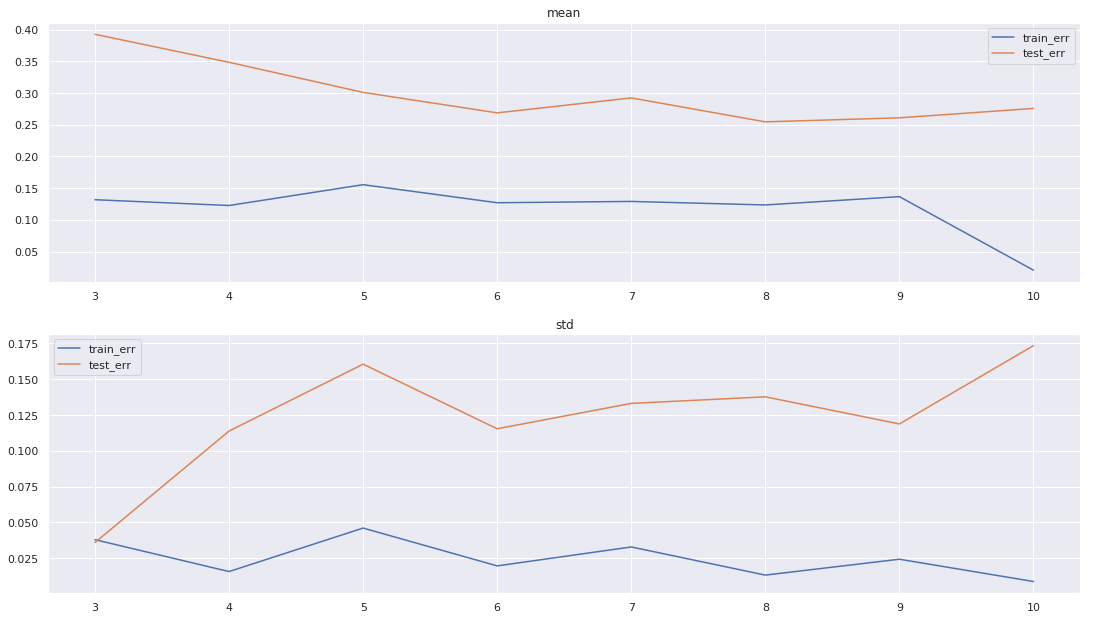

In [38]:
fig, ax =  plt.subplots(2)
fig.set_size_inches(18.5, 10.5)

ax[0].plot(range(3, 11) ,tr_errors_mean)
ax[0].plot(range(3, 11) ,tst_errors_mean)
ax[0].legend(['train_err', 'test_err'])
ax[0].set_title("mean")

ax[1].plot(range(3, 11) ,tr_errors_std)
ax[1].plot(range(3, 11) ,tst_errors_std)
ax[1].legend(['train_err', 'test_err'])
ax[1].set_title("std")

plt.show()

### в) Выводы
Исходя из проведенного анализа сделаем вывод что в методе kfold оптимальное значение k=6 для нашей задачи

## 4.14. Исследование различных архитектур нейронных сетей

### а) Исследование зависимости качества обучения от числа нейронов в скрытых слоях

In [30]:
## Change NN architecture
def Qkfold_CV(n_folds):
    
    """
    QuasiNewton alg
    """

    tr_errors = []
    tst_errors = []

    splitter = KFold(n_splits = n_folds)

    for train_index, test_index in splitter.split(df):
    
        network = join(
        Input(8), 
        LeakyRelu(30, weight = Trunc_Norm(0, 1.0)),
        LeakyRelu(30, weight = Trunc_Norm(0, 1.0)),
        LeakyRelu(1, weight = Trunc_Norm(0, 1.0)),
        )
    
        optimizer1 = algorithms.QuasiNewton(network, verbose = False, shuffle_data = False, regularizer=None, 
                                       loss='mse')
        optimizer1.train(df.loc[train_index].drop(['Concr_comp_str'], axis=1), df.loc[train_index, 'Concr_comp_str'],
                     df.loc[test_index].drop(['Concr_comp_str'], axis=1), df.loc[test_index, 'Concr_comp_str'], epochs = 100)
    
        tr_errors.append(optimizer1.errors.train[-1])
        tst_errors.append(min(optimizer1.errors.valid))
        
    return np.mean(tr_errors), np.std(tr_errors), np.mean(tst_errors), np.std(tst_errors)

In [31]:
Qkfold_CV(10)

Instructions for updating:
Colocations handled automatically by placer.


(0.11481734, 0.032178633, 0.2917062, 0.1735485)

|№ п/п|Число нейронов в скрытых слоях|mean_train|std_train|mean_test|std_test|
|-----|-----------------------|----------|---------|---------|--------|
|1|10, 10|0.10|0.01|0.25|0.16|
|2|20, 20|0.09|0.01|0.24|0.12|
|3|30, 30|0.08|0.01|0.24|0.14|

### б) Исследование зависимости качества обучения от активационных характеристик нейронов

In [31]:
Qkfold_CV(10)

Instructions for updating:
Colocations handled automatically by placer.


(0.99999076, 0.05763639, 0.9992455, 0.5167134)

|АХ нейронов скрытых слоёв|mean_train|std_train|mean_test|std_test|
|-------------------------|----------|---------|---------|--------|
|logistic|0.07|0.00|0.21|0.14|
|tanh|0.04|0.00|0.25|0.18|
|linear|0.28|0.13|0.54|0.14|

## 4.15. L1 и L2 регуляризация весов

### а) Исследование зависимости качества обученной сети от параметра регуляризации

In [37]:
from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import regularizers

#change l2->l1
def fit_reg_model(lbd):
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(30, activation='sigmoid', input_shape=(8, ), kernel_regularizer=regularizers.l2(lbd)),
      tf.keras.layers.Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l2(lbd)),
      tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lbd)),
  
    ])

    def count_tr_stats(batch, logs):
        w_arr = []
    
        for layer in model.layers:
            w_arr += (layer.get_weights()[0].reshape(-1).tolist())
        
        global_l1.append(norm(w_arr, 1))
        global_l2.append(norm(w_arr, 2))

    save_weights = LambdaCallback(on_epoch_end=count_tr_stats)

    loss_fn = tf.keras.losses.MSE

    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.15, momentum=0.8),
                  loss=loss_fn,
                  metrics=['mse']
                  )
    
    global_l1 = []
    global_l2 = []
    history_callback = model.fit(train_dset.X, train_dset.y, epochs=100, callbacks = [save_weights], validation_data=(X_val, y_val))
    
    return history_callback.history['mean_squared_error'][-1], min(history_callback.history['val_mean_squared_error']), global_l2, global_l1

In [65]:
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
tr_losses = []
val_losses = []
l2_norm = []
l1_norm = []

for lbd in tqdm(lambdas):
    
    tr_loss, val_loss, global_l2, global_l1 = fit_reg_model(lbd)
    tr_losses.append(tr_loss)
    val_losses.append(val_loss)
    l2_norm.append(global_l2[-1])
    l1_norm.append(global_l1[-1])



  0%|          | 0/5 [00:00<?, ?it/s]

Train on 703 samples, validate on 204 samples
Epoch 1/300
703/703 [==============================] - 1s 823us/sample - loss: 1.2635 - mean_squared_error: 1.2615 - val_loss: 0.8626 - val_mean_squared_error: 0.8605
Epoch 2/300
703/703 [==============================] - 0s 46us/sample - loss: 0.5688 - mean_squared_error: 0.5666 - val_loss: 0.5837 - val_mean_squared_error: 0.5815
Epoch 3/300
703/703 [==============================] - 0s 52us/sample - loss: 0.4010 - mean_squared_error: 0.3987 - val_loss: 0.3165 - val_mean_squared_error: 0.3141
Epoch 4/300
703/703 [==============================] - 0s 46us/sample - loss: 0.3649 - mean_squared_error: 0.3625 - val_loss: 0.2921 - val_mean_squared_error: 0.2897
Epoch 5/300
703/703 [==============================] - 0s 47us/sample - loss: 0.3045 - mean_squared_error: 0.3021 - val_loss: 0.3403 - val_mean_squared_error: 0.3378
Epoch 6/300
703/703 [==============================] - 0s 51us/sample - loss: 0.2745 - mean_squared_error: 0.2721 - val_los

Epoch 50/300
703/703 [==============================] - 0s 52us/sample - loss: 0.1335 - mean_squared_error: 0.1303 - val_loss: 0.1645 - val_mean_squared_error: 0.1613
Epoch 51/300
703/703 [==============================] - 0s 53us/sample - loss: 0.1280 - mean_squared_error: 0.1247 - val_loss: 0.1710 - val_mean_squared_error: 0.1678
Epoch 52/300
703/703 [==============================] - 0s 52us/sample - loss: 0.1505 - mean_squared_error: 0.1473 - val_loss: 0.1621 - val_mean_squared_error: 0.1588
Epoch 53/300
703/703 [==============================] - 0s 48us/sample - loss: 0.1376 - mean_squared_error: 0.1344 - val_loss: 0.1600 - val_mean_squared_error: 0.1567
Epoch 54/300
703/703 [==============================] - 0s 43us/sample - loss: 0.1302 - mean_squared_error: 0.1270 - val_loss: 0.1543 - val_mean_squared_error: 0.1511
Epoch 55/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1301 - mean_squared_error: 0.1269 - val_loss: 0.1562 - val_mean_squared_error: 0.152

703/703 [==============================] - 0s 45us/sample - loss: 0.1099 - mean_squared_error: 0.1062 - val_loss: 0.1979 - val_mean_squared_error: 0.1942
Epoch 100/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1141 - mean_squared_error: 0.1105 - val_loss: 0.1763 - val_mean_squared_error: 0.1726
Epoch 101/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1149 - mean_squared_error: 0.1112 - val_loss: 0.1577 - val_mean_squared_error: 0.1540
Epoch 102/300
703/703 [==============================] - 0s 41us/sample - loss: 0.1091 - mean_squared_error: 0.1055 - val_loss: 0.1562 - val_mean_squared_error: 0.1525
Epoch 103/300
703/703 [==============================] - 0s 43us/sample - loss: 0.1027 - mean_squared_error: 0.0990 - val_loss: 0.1632 - val_mean_squared_error: 0.1596
Epoch 104/300
703/703 [==============================] - 0s 44us/sample - loss: 0.1056 - mean_squared_error: 0.1019 - val_loss: 0.1619 - val_mean_squared_error: 0.1582
Epoch 

Epoch 148/300
703/703 [==============================] - 0s 49us/sample - loss: 0.0957 - mean_squared_error: 0.0917 - val_loss: 0.1619 - val_mean_squared_error: 0.1579
Epoch 149/300
703/703 [==============================] - 0s 47us/sample - loss: 0.0958 - mean_squared_error: 0.0919 - val_loss: 0.1591 - val_mean_squared_error: 0.1551
Epoch 150/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1053 - mean_squared_error: 0.1013 - val_loss: 0.1581 - val_mean_squared_error: 0.1541
Epoch 151/300
703/703 [==============================] - 0s 58us/sample - loss: 0.1011 - mean_squared_error: 0.0971 - val_loss: 0.1589 - val_mean_squared_error: 0.1549
Epoch 152/300
703/703 [==============================] - 0s 47us/sample - loss: 0.0960 - mean_squared_error: 0.0920 - val_loss: 0.1642 - val_mean_squared_error: 0.1602
Epoch 153/300
703/703 [==============================] - 0s 56us/sample - loss: 0.0914 - mean_squared_error: 0.0874 - val_loss: 0.1634 - val_mean_squared_error:

Epoch 197/300
703/703 [==============================] - 0s 60us/sample - loss: 0.0986 - mean_squared_error: 0.0944 - val_loss: 0.1684 - val_mean_squared_error: 0.1642
Epoch 198/300
703/703 [==============================] - 0s 56us/sample - loss: 0.0866 - mean_squared_error: 0.0823 - val_loss: 0.1564 - val_mean_squared_error: 0.1521
Epoch 199/300
703/703 [==============================] - 0s 56us/sample - loss: 0.0858 - mean_squared_error: 0.0816 - val_loss: 0.1563 - val_mean_squared_error: 0.1521
Epoch 200/300
703/703 [==============================] - 0s 62us/sample - loss: 0.0884 - mean_squared_error: 0.0841 - val_loss: 0.1653 - val_mean_squared_error: 0.1611
Epoch 201/300
703/703 [==============================] - 0s 62us/sample - loss: 0.0835 - mean_squared_error: 0.0792 - val_loss: 0.1522 - val_mean_squared_error: 0.1480
Epoch 202/300
703/703 [==============================] - 0s 62us/sample - loss: 0.0856 - mean_squared_error: 0.0813 - val_loss: 0.1609 - val_mean_squared_error:

Epoch 246/300
703/703 [==============================] - 0s 59us/sample - loss: 0.0814 - mean_squared_error: 0.0770 - val_loss: 0.1535 - val_mean_squared_error: 0.1491
Epoch 247/300
703/703 [==============================] - 0s 57us/sample - loss: 0.0816 - mean_squared_error: 0.0772 - val_loss: 0.1582 - val_mean_squared_error: 0.1538
Epoch 248/300
703/703 [==============================] - 0s 55us/sample - loss: 0.0823 - mean_squared_error: 0.0779 - val_loss: 0.1585 - val_mean_squared_error: 0.1541
Epoch 249/300
703/703 [==============================] - 0s 55us/sample - loss: 0.0806 - mean_squared_error: 0.0762 - val_loss: 0.1543 - val_mean_squared_error: 0.1498
Epoch 250/300
703/703 [==============================] - 0s 56us/sample - loss: 0.0795 - mean_squared_error: 0.0751 - val_loss: 0.1555 - val_mean_squared_error: 0.1510
Epoch 251/300
703/703 [==============================] - 0s 57us/sample - loss: 0.0822 - mean_squared_error: 0.0778 - val_loss: 0.1631 - val_mean_squared_error:

Epoch 295/300
703/703 [==============================] - 0s 54us/sample - loss: 0.0803 - mean_squared_error: 0.0758 - val_loss: 0.1665 - val_mean_squared_error: 0.1619
Epoch 296/300
703/703 [==============================] - 0s 57us/sample - loss: 0.0826 - mean_squared_error: 0.0780 - val_loss: 0.1700 - val_mean_squared_error: 0.1654
Epoch 297/300
703/703 [==============================] - 0s 59us/sample - loss: 0.0807 - mean_squared_error: 0.0761 - val_loss: 0.1692 - val_mean_squared_error: 0.1646
Epoch 298/300
703/703 [==============================] - 0s 67us/sample - loss: 0.0768 - mean_squared_error: 0.0723 - val_loss: 0.1596 - val_mean_squared_error: 0.1550
Epoch 299/300
703/703 [==============================] - 0s 59us/sample - loss: 0.0787 - mean_squared_error: 0.0741 - val_loss: 0.1684 - val_mean_squared_error: 0.1638
Epoch 300/300
703/703 [==============================] - 0s 60us/sample - loss: 0.0768 - mean_squared_error: 0.0722 - val_loss: 0.1652 - val_mean_squared_error:



 20%|██        | 1/5 [00:13<00:53, 13.41s/it]

Train on 703 samples, validate on 204 samples
Epoch 1/300
703/703 [==============================] - 1s 955us/sample - loss: 1.2719 - mean_squared_error: 1.2512 - val_loss: 0.7243 - val_mean_squared_error: 0.7020
Epoch 2/300
703/703 [==============================] - 0s 55us/sample - loss: 0.4881 - mean_squared_error: 0.4648 - val_loss: 0.4130 - val_mean_squared_error: 0.3891
Epoch 3/300
703/703 [==============================] - 0s 55us/sample - loss: 0.4483 - mean_squared_error: 0.4244 - val_loss: 0.6583 - val_mean_squared_error: 0.6341
Epoch 4/300
703/703 [==============================] - 0s 61us/sample - loss: 0.3756 - mean_squared_error: 0.3510 - val_loss: 0.3383 - val_mean_squared_error: 0.3136
Epoch 5/300
703/703 [==============================] - 0s 58us/sample - loss: 0.3336 - mean_squared_error: 0.3087 - val_loss: 0.3709 - val_mean_squared_error: 0.3458
Epoch 6/300
703/703 [==============================] - 0s 61us/sample - loss: 0.2952 - mean_squared_error: 0.2700 - val_los

Epoch 50/300
703/703 [==============================] - 0s 57us/sample - loss: 0.1562 - mean_squared_error: 0.1274 - val_loss: 0.2030 - val_mean_squared_error: 0.1742
Epoch 51/300
703/703 [==============================] - 0s 54us/sample - loss: 0.1658 - mean_squared_error: 0.1370 - val_loss: 0.2058 - val_mean_squared_error: 0.1770
Epoch 52/300
703/703 [==============================] - 0s 57us/sample - loss: 0.1666 - mean_squared_error: 0.1378 - val_loss: 0.3219 - val_mean_squared_error: 0.2930
Epoch 53/300
703/703 [==============================] - 0s 60us/sample - loss: 0.1688 - mean_squared_error: 0.1398 - val_loss: 0.1916 - val_mean_squared_error: 0.1626
Epoch 54/300
703/703 [==============================] - 0s 55us/sample - loss: 0.1612 - mean_squared_error: 0.1322 - val_loss: 0.2500 - val_mean_squared_error: 0.2211
Epoch 55/300
703/703 [==============================] - 0s 65us/sample - loss: 0.1679 - mean_squared_error: 0.1389 - val_loss: 0.2388 - val_mean_squared_error: 0.209

703/703 [==============================] - 0s 54us/sample - loss: 0.1505 - mean_squared_error: 0.1215 - val_loss: 0.1964 - val_mean_squared_error: 0.1673
Epoch 100/300
703/703 [==============================] - 0s 57us/sample - loss: 0.1358 - mean_squared_error: 0.1067 - val_loss: 0.1907 - val_mean_squared_error: 0.1616
Epoch 101/300
703/703 [==============================] - 0s 56us/sample - loss: 0.1366 - mean_squared_error: 0.1075 - val_loss: 0.1928 - val_mean_squared_error: 0.1638
Epoch 102/300
703/703 [==============================] - 0s 60us/sample - loss: 0.1368 - mean_squared_error: 0.1078 - val_loss: 0.2088 - val_mean_squared_error: 0.1798
Epoch 103/300
703/703 [==============================] - 0s 60us/sample - loss: 0.1342 - mean_squared_error: 0.1053 - val_loss: 0.1978 - val_mean_squared_error: 0.1688
Epoch 104/300
703/703 [==============================] - 0s 55us/sample - loss: 0.1330 - mean_squared_error: 0.1040 - val_loss: 0.1983 - val_mean_squared_error: 0.1693
Epoch 

Epoch 148/300
703/703 [==============================] - 0s 53us/sample - loss: 0.1269 - mean_squared_error: 0.0989 - val_loss: 0.1806 - val_mean_squared_error: 0.1526
Epoch 149/300
703/703 [==============================] - 0s 59us/sample - loss: 0.1239 - mean_squared_error: 0.0959 - val_loss: 0.2018 - val_mean_squared_error: 0.1737
Epoch 150/300
703/703 [==============================] - 0s 53us/sample - loss: 0.1267 - mean_squared_error: 0.0987 - val_loss: 0.1845 - val_mean_squared_error: 0.1565
Epoch 151/300
703/703 [==============================] - 0s 57us/sample - loss: 0.1290 - mean_squared_error: 0.1009 - val_loss: 0.2069 - val_mean_squared_error: 0.1788
Epoch 152/300
703/703 [==============================] - 0s 57us/sample - loss: 0.1314 - mean_squared_error: 0.1034 - val_loss: 0.1765 - val_mean_squared_error: 0.1485
Epoch 153/300
703/703 [==============================] - 0s 55us/sample - loss: 0.1263 - mean_squared_error: 0.0983 - val_loss: 0.1937 - val_mean_squared_error:

Epoch 197/300
703/703 [==============================] - 0s 67us/sample - loss: 0.1197 - mean_squared_error: 0.0918 - val_loss: 0.1893 - val_mean_squared_error: 0.1615
Epoch 198/300
703/703 [==============================] - 0s 59us/sample - loss: 0.1230 - mean_squared_error: 0.0952 - val_loss: 0.2075 - val_mean_squared_error: 0.1797
Epoch 199/300
703/703 [==============================] - 0s 49us/sample - loss: 0.1200 - mean_squared_error: 0.0922 - val_loss: 0.2023 - val_mean_squared_error: 0.1745
Epoch 200/300
703/703 [==============================] - 0s 54us/sample - loss: 0.1162 - mean_squared_error: 0.0884 - val_loss: 0.1825 - val_mean_squared_error: 0.1547
Epoch 201/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1166 - mean_squared_error: 0.0889 - val_loss: 0.1830 - val_mean_squared_error: 0.1552
Epoch 202/300
703/703 [==============================] - 0s 44us/sample - loss: 0.1250 - mean_squared_error: 0.0972 - val_loss: 0.1799 - val_mean_squared_error:

Epoch 246/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1098 - mean_squared_error: 0.0825 - val_loss: 0.1881 - val_mean_squared_error: 0.1608
Epoch 247/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1197 - mean_squared_error: 0.0923 - val_loss: 0.1802 - val_mean_squared_error: 0.1528
Epoch 248/300
703/703 [==============================] - 0s 45us/sample - loss: 0.1176 - mean_squared_error: 0.0902 - val_loss: 0.1881 - val_mean_squared_error: 0.1608
Epoch 249/300
703/703 [==============================] - 0s 44us/sample - loss: 0.1130 - mean_squared_error: 0.0857 - val_loss: 0.1750 - val_mean_squared_error: 0.1477
Epoch 250/300
703/703 [==============================] - 0s 51us/sample - loss: 0.1151 - mean_squared_error: 0.0877 - val_loss: 0.1965 - val_mean_squared_error: 0.1692
Epoch 251/300
703/703 [==============================] - 0s 51us/sample - loss: 0.1107 - mean_squared_error: 0.0834 - val_loss: 0.1798 - val_mean_squared_error:

Epoch 295/300
703/703 [==============================] - 0s 49us/sample - loss: 0.1272 - mean_squared_error: 0.1001 - val_loss: 0.2125 - val_mean_squared_error: 0.1853
Epoch 296/300
703/703 [==============================] - 0s 48us/sample - loss: 0.1239 - mean_squared_error: 0.0968 - val_loss: 0.2018 - val_mean_squared_error: 0.1746
Epoch 297/300
703/703 [==============================] - 0s 51us/sample - loss: 0.1069 - mean_squared_error: 0.0797 - val_loss: 0.1872 - val_mean_squared_error: 0.1600
Epoch 298/300
703/703 [==============================] - 0s 45us/sample - loss: 0.1057 - mean_squared_error: 0.0786 - val_loss: 0.2090 - val_mean_squared_error: 0.1819
Epoch 299/300
703/703 [==============================] - 0s 44us/sample - loss: 0.1089 - mean_squared_error: 0.0818 - val_loss: 0.1794 - val_mean_squared_error: 0.1523
Epoch 300/300
703/703 [==============================] - 0s 48us/sample - loss: 0.1113 - mean_squared_error: 0.0842 - val_loss: 0.2279 - val_mean_squared_error:



 40%|████      | 2/5 [00:27<00:40, 13.65s/it]

Train on 703 samples, validate on 204 samples
Epoch 1/300
703/703 [==============================] - 1s 951us/sample - loss: 1.6713 - mean_squared_error: 1.4712 - val_loss: 1.2914 - val_mean_squared_error: 1.0872
Epoch 2/300
703/703 [==============================] - 0s 46us/sample - loss: 0.8783 - mean_squared_error: 0.6701 - val_loss: 0.6479 - val_mean_squared_error: 0.4374
Epoch 3/300
703/703 [==============================] - 0s 51us/sample - loss: 0.6139 - mean_squared_error: 0.4099 - val_loss: 0.5420 - val_mean_squared_error: 0.3424
Epoch 4/300
703/703 [==============================] - 0s 47us/sample - loss: 0.5640 - mean_squared_error: 0.3702 - val_loss: 0.6545 - val_mean_squared_error: 0.4639
Epoch 5/300
703/703 [==============================] - 0s 43us/sample - loss: 0.5411 - mean_squared_error: 0.3549 - val_loss: 0.5179 - val_mean_squared_error: 0.3369
Epoch 6/300
703/703 [==============================] - 0s 47us/sample - loss: 0.4865 - mean_squared_error: 0.3091 - val_los

Epoch 50/300
703/703 [==============================] - 0s 48us/sample - loss: 0.2359 - mean_squared_error: 0.1636 - val_loss: 0.2589 - val_mean_squared_error: 0.1865
Epoch 51/300
703/703 [==============================] - 0s 52us/sample - loss: 0.2660 - mean_squared_error: 0.1942 - val_loss: 0.2916 - val_mean_squared_error: 0.2199
Epoch 52/300
703/703 [==============================] - 0s 46us/sample - loss: 0.2344 - mean_squared_error: 0.1633 - val_loss: 0.2637 - val_mean_squared_error: 0.1924
Epoch 53/300
703/703 [==============================] - 0s 42us/sample - loss: 0.2624 - mean_squared_error: 0.1915 - val_loss: 0.2693 - val_mean_squared_error: 0.1978
Epoch 54/300
703/703 [==============================] - 0s 46us/sample - loss: 0.3082 - mean_squared_error: 0.2359 - val_loss: 0.2534 - val_mean_squared_error: 0.1817
Epoch 55/300
703/703 [==============================] - 0s 54us/sample - loss: 0.2292 - mean_squared_error: 0.1583 - val_loss: 0.2540 - val_mean_squared_error: 0.183

703/703 [==============================] - 0s 52us/sample - loss: 0.2245 - mean_squared_error: 0.1674 - val_loss: 0.2323 - val_mean_squared_error: 0.1754
Epoch 100/300
703/703 [==============================] - 0s 44us/sample - loss: 0.2001 - mean_squared_error: 0.1435 - val_loss: 0.2811 - val_mean_squared_error: 0.2245
Epoch 101/300
703/703 [==============================] - 0s 49us/sample - loss: 0.2042 - mean_squared_error: 0.1482 - val_loss: 0.2179 - val_mean_squared_error: 0.1618
Epoch 102/300
703/703 [==============================] - 0s 50us/sample - loss: 0.2120 - mean_squared_error: 0.1561 - val_loss: 0.2854 - val_mean_squared_error: 0.2296
Epoch 103/300
703/703 [==============================] - 0s 49us/sample - loss: 0.2283 - mean_squared_error: 0.1725 - val_loss: 0.3883 - val_mean_squared_error: 0.3318
Epoch 104/300
703/703 [==============================] - 0s 44us/sample - loss: 0.2452 - mean_squared_error: 0.1894 - val_loss: 0.3637 - val_mean_squared_error: 0.3074
Epoch 

Epoch 148/300
703/703 [==============================] - 0s 45us/sample - loss: 0.2084 - mean_squared_error: 0.1579 - val_loss: 0.2090 - val_mean_squared_error: 0.1586
Epoch 149/300
703/703 [==============================] - 0s 46us/sample - loss: 0.2146 - mean_squared_error: 0.1640 - val_loss: 0.2019 - val_mean_squared_error: 0.1515
Epoch 150/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1926 - mean_squared_error: 0.1422 - val_loss: 0.2262 - val_mean_squared_error: 0.1757
Epoch 151/300
703/703 [==============================] - 0s 45us/sample - loss: 0.1889 - mean_squared_error: 0.1385 - val_loss: 0.2188 - val_mean_squared_error: 0.1687
Epoch 152/300
703/703 [==============================] - 0s 51us/sample - loss: 0.2147 - mean_squared_error: 0.1638 - val_loss: 0.2534 - val_mean_squared_error: 0.2028
Epoch 153/300
703/703 [==============================] - 0s 48us/sample - loss: 0.2128 - mean_squared_error: 0.1620 - val_loss: 0.2281 - val_mean_squared_error:

Epoch 197/300
703/703 [==============================] - 0s 49us/sample - loss: 0.1990 - mean_squared_error: 0.1493 - val_loss: 0.2084 - val_mean_squared_error: 0.1590
Epoch 198/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1956 - mean_squared_error: 0.1461 - val_loss: 0.2112 - val_mean_squared_error: 0.1617
Epoch 199/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1840 - mean_squared_error: 0.1348 - val_loss: 0.2181 - val_mean_squared_error: 0.1689
Epoch 200/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1955 - mean_squared_error: 0.1463 - val_loss: 0.2629 - val_mean_squared_error: 0.2136
Epoch 201/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1930 - mean_squared_error: 0.1441 - val_loss: 0.2280 - val_mean_squared_error: 0.1788
Epoch 202/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1922 - mean_squared_error: 0.1431 - val_loss: 0.2019 - val_mean_squared_error:

Epoch 246/300
703/703 [==============================] - 0s 47us/sample - loss: 0.1797 - mean_squared_error: 0.1325 - val_loss: 0.1962 - val_mean_squared_error: 0.1492
Epoch 247/300
703/703 [==============================] - 0s 46us/sample - loss: 0.1824 - mean_squared_error: 0.1354 - val_loss: 0.2165 - val_mean_squared_error: 0.1695
Epoch 248/300
703/703 [==============================] - 0s 45us/sample - loss: 0.1798 - mean_squared_error: 0.1327 - val_loss: 0.2051 - val_mean_squared_error: 0.1580
Epoch 249/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1874 - mean_squared_error: 0.1404 - val_loss: 0.2164 - val_mean_squared_error: 0.1692
Epoch 250/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1800 - mean_squared_error: 0.1329 - val_loss: 0.2067 - val_mean_squared_error: 0.1597
Epoch 251/300
703/703 [==============================] - 0s 53us/sample - loss: 0.1755 - mean_squared_error: 0.1287 - val_loss: 0.1919 - val_mean_squared_error:

Epoch 295/300
703/703 [==============================] - 0s 53us/sample - loss: 0.1869 - mean_squared_error: 0.1420 - val_loss: 0.1924 - val_mean_squared_error: 0.1476
Epoch 296/300
703/703 [==============================] - 0s 48us/sample - loss: 0.1785 - mean_squared_error: 0.1335 - val_loss: 0.2021 - val_mean_squared_error: 0.1571
Epoch 297/300
703/703 [==============================] - 0s 52us/sample - loss: 0.1783 - mean_squared_error: 0.1334 - val_loss: 0.2100 - val_mean_squared_error: 0.1651
Epoch 298/300
703/703 [==============================] - 0s 55us/sample - loss: 0.1825 - mean_squared_error: 0.1375 - val_loss: 0.2031 - val_mean_squared_error: 0.1582
Epoch 299/300
703/703 [==============================] - 0s 50us/sample - loss: 0.1757 - mean_squared_error: 0.1308 - val_loss: 0.2076 - val_mean_squared_error: 0.1626
Epoch 300/300
703/703 [==============================] - 0s 56us/sample - loss: 0.1775 - mean_squared_error: 0.1326 - val_loss: 0.2125 - val_mean_squared_error:



 60%|██████    | 3/5 [00:40<00:26, 13.42s/it]

Train on 703 samples, validate on 204 samples
Epoch 1/300
703/703 [==============================] - 1s 906us/sample - loss: 2.6175 - mean_squared_error: 1.0714 - val_loss: 2.3966 - val_mean_squared_error: 1.4130
Epoch 2/300
703/703 [==============================] - 0s 47us/sample - loss: 1.7292 - mean_squared_error: 0.9354 - val_loss: 1.1594 - val_mean_squared_error: 0.5431
Epoch 3/300
703/703 [==============================] - 0s 46us/sample - loss: 1.7404 - mean_squared_error: 1.1512 - val_loss: 1.2500 - val_mean_squared_error: 0.5778
Epoch 4/300
703/703 [==============================] - 0s 40us/sample - loss: 1.2071 - mean_squared_error: 0.6299 - val_loss: 1.0261 - val_mean_squared_error: 0.5490
Epoch 5/300
703/703 [==============================] - 0s 44us/sample - loss: 0.9674 - mean_squared_error: 0.5288 - val_loss: 0.9762 - val_mean_squared_error: 0.5770
Epoch 6/300
703/703 [==============================] - 0s 48us/sample - loss: 0.8509 - mean_squared_error: 0.4695 - val_los

Epoch 50/300
703/703 [==============================] - 0s 41us/sample - loss: 0.4583 - mean_squared_error: 0.2359 - val_loss: 0.4189 - val_mean_squared_error: 0.2001
Epoch 51/300
703/703 [==============================] - 0s 42us/sample - loss: 0.5155 - mean_squared_error: 0.2931 - val_loss: 0.5176 - val_mean_squared_error: 0.2973
Epoch 52/300
703/703 [==============================] - 0s 43us/sample - loss: 0.4518 - mean_squared_error: 0.2367 - val_loss: 0.4579 - val_mean_squared_error: 0.2408
Epoch 53/300
703/703 [==============================] - 0s 44us/sample - loss: 0.4335 - mean_squared_error: 0.2128 - val_loss: 0.4389 - val_mean_squared_error: 0.2222
Epoch 54/300
703/703 [==============================] - 0s 45us/sample - loss: 0.4425 - mean_squared_error: 0.2260 - val_loss: 0.4366 - val_mean_squared_error: 0.2216
Epoch 55/300
703/703 [==============================] - 0s 40us/sample - loss: 0.4538 - mean_squared_error: 0.2365 - val_loss: 0.4557 - val_mean_squared_error: 0.237

703/703 [==============================] - 0s 47us/sample - loss: 0.4568 - mean_squared_error: 0.2611 - val_loss: 0.4668 - val_mean_squared_error: 0.2694
Epoch 100/300
703/703 [==============================] - 0s 48us/sample - loss: 0.4202 - mean_squared_error: 0.2252 - val_loss: 0.3868 - val_mean_squared_error: 0.1930
Epoch 101/300
703/703 [==============================] - 0s 45us/sample - loss: 0.3914 - mean_squared_error: 0.1955 - val_loss: 0.3804 - val_mean_squared_error: 0.1900
Epoch 102/300
703/703 [==============================] - 0s 39us/sample - loss: 0.4038 - mean_squared_error: 0.2106 - val_loss: 0.4241 - val_mean_squared_error: 0.2311
Epoch 103/300
703/703 [==============================] - 0s 40us/sample - loss: 0.3950 - mean_squared_error: 0.2013 - val_loss: 0.4690 - val_mean_squared_error: 0.2726
Epoch 104/300
703/703 [==============================] - 0s 40us/sample - loss: 0.4042 - mean_squared_error: 0.2099 - val_loss: 0.4151 - val_mean_squared_error: 0.2235
Epoch 

Epoch 148/300
703/703 [==============================] - 0s 45us/sample - loss: 0.4285 - mean_squared_error: 0.2337 - val_loss: 0.5727 - val_mean_squared_error: 0.3716
Epoch 149/300
703/703 [==============================] - 0s 43us/sample - loss: 0.4087 - mean_squared_error: 0.2154 - val_loss: 0.3867 - val_mean_squared_error: 0.1958
Epoch 150/300
703/703 [==============================] - 0s 40us/sample - loss: 0.4032 - mean_squared_error: 0.2086 - val_loss: 0.4063 - val_mean_squared_error: 0.2148
Epoch 151/300
703/703 [==============================] - 0s 38us/sample - loss: 0.3985 - mean_squared_error: 0.2079 - val_loss: 0.5181 - val_mean_squared_error: 0.3193
Epoch 152/300
703/703 [==============================] - 0s 38us/sample - loss: 0.4418 - mean_squared_error: 0.2467 - val_loss: 0.4357 - val_mean_squared_error: 0.2420
Epoch 153/300
703/703 [==============================] - 0s 42us/sample - loss: 0.3980 - mean_squared_error: 0.2039 - val_loss: 0.4149 - val_mean_squared_error:

Epoch 197/300
703/703 [==============================] - 0s 45us/sample - loss: 0.4066 - mean_squared_error: 0.2143 - val_loss: 0.4060 - val_mean_squared_error: 0.2141
Epoch 198/300
703/703 [==============================] - 0s 44us/sample - loss: 0.3935 - mean_squared_error: 0.2027 - val_loss: 0.3946 - val_mean_squared_error: 0.2049
Epoch 199/300
703/703 [==============================] - 0s 43us/sample - loss: 0.4207 - mean_squared_error: 0.2279 - val_loss: 0.3989 - val_mean_squared_error: 0.2093
Epoch 200/300
703/703 [==============================] - 0s 44us/sample - loss: 0.4224 - mean_squared_error: 0.2305 - val_loss: 0.4031 - val_mean_squared_error: 0.2144
Epoch 201/300
703/703 [==============================] - 0s 45us/sample - loss: 0.3830 - mean_squared_error: 0.1931 - val_loss: 0.4017 - val_mean_squared_error: 0.2098
Epoch 202/300
703/703 [==============================] - 0s 44us/sample - loss: 0.4097 - mean_squared_error: 0.2187 - val_loss: 0.4791 - val_mean_squared_error:

Epoch 246/300
703/703 [==============================] - 0s 40us/sample - loss: 0.4289 - mean_squared_error: 0.2366 - val_loss: 0.3886 - val_mean_squared_error: 0.1962
Epoch 247/300
703/703 [==============================] - 0s 40us/sample - loss: 0.4127 - mean_squared_error: 0.2218 - val_loss: 0.4006 - val_mean_squared_error: 0.2097
Epoch 248/300
703/703 [==============================] - 0s 42us/sample - loss: 0.4019 - mean_squared_error: 0.2089 - val_loss: 0.4378 - val_mean_squared_error: 0.2456
Epoch 249/300
703/703 [==============================] - 0s 40us/sample - loss: 0.3853 - mean_squared_error: 0.1958 - val_loss: 0.4112 - val_mean_squared_error: 0.2251
Epoch 250/300
703/703 [==============================] - 0s 40us/sample - loss: 0.3950 - mean_squared_error: 0.2040 - val_loss: 0.3955 - val_mean_squared_error: 0.2037
Epoch 251/300
703/703 [==============================] - 0s 42us/sample - loss: 0.3989 - mean_squared_error: 0.2065 - val_loss: 0.5558 - val_mean_squared_error:

Epoch 295/300
703/703 [==============================] - 0s 48us/sample - loss: 0.3917 - mean_squared_error: 0.1999 - val_loss: 0.3987 - val_mean_squared_error: 0.2064
Epoch 296/300
703/703 [==============================] - 0s 53us/sample - loss: 0.3872 - mean_squared_error: 0.1969 - val_loss: 0.3970 - val_mean_squared_error: 0.2063
Epoch 297/300
703/703 [==============================] - 0s 39us/sample - loss: 0.3910 - mean_squared_error: 0.1978 - val_loss: 0.3790 - val_mean_squared_error: 0.1884
Epoch 298/300
703/703 [==============================] - 0s 39us/sample - loss: 0.3931 - mean_squared_error: 0.2037 - val_loss: 0.3937 - val_mean_squared_error: 0.2074
Epoch 299/300
703/703 [==============================] - 0s 47us/sample - loss: 0.4059 - mean_squared_error: 0.2154 - val_loss: 0.3851 - val_mean_squared_error: 0.1971
Epoch 300/300
703/703 [==============================] - 0s 45us/sample - loss: 0.3882 - mean_squared_error: 0.1983 - val_loss: 0.3792 - val_mean_squared_error:



 80%|████████  | 4/5 [00:52<00:13, 13.03s/it]

Train on 703 samples, validate on 204 samples
Epoch 1/300
703/703 [==============================] - 1s 1ms/sample - loss: 7.2939 - mean_squared_error: 1.3207 - val_loss: 2.8042 - val_mean_squared_error: 1.1158
Epoch 2/300
703/703 [==============================] - 0s 57us/sample - loss: 3.0535 - mean_squared_error: 1.4179 - val_loss: 2.9294 - val_mean_squared_error: 1.2506
Epoch 3/300
703/703 [==============================] - 0s 56us/sample - loss: 2.8006 - mean_squared_error: 1.2123 - val_loss: 2.5934 - val_mean_squared_error: 1.1111
Epoch 4/300
703/703 [==============================] - 0s 44us/sample - loss: 2.6124 - mean_squared_error: 1.0708 - val_loss: 2.5445 - val_mean_squared_error: 1.0302
Epoch 5/300
703/703 [==============================] - 0s 52us/sample - loss: 2.6807 - mean_squared_error: 1.1590 - val_loss: 2.7033 - val_mean_squared_error: 1.0928
Epoch 6/300
703/703 [==============================] - 0s 53us/sample - loss: 2.9279 - mean_squared_error: 1.3000 - val_loss:

Epoch 50/300
703/703 [==============================] - 0s 49us/sample - loss: 2.4621 - mean_squared_error: 1.0423 - val_loss: 2.4673 - val_mean_squared_error: 1.0196
Epoch 51/300
703/703 [==============================] - 0s 54us/sample - loss: 2.4414 - mean_squared_error: 1.0399 - val_loss: 2.4697 - val_mean_squared_error: 1.0744
Epoch 52/300
703/703 [==============================] - 0s 54us/sample - loss: 2.5039 - mean_squared_error: 1.0456 - val_loss: 2.5072 - val_mean_squared_error: 1.0643
Epoch 53/300
703/703 [==============================] - 0s 54us/sample - loss: 2.4440 - mean_squared_error: 1.0283 - val_loss: 2.3993 - val_mean_squared_error: 1.0334
Epoch 54/300
703/703 [==============================] - 0s 57us/sample - loss: 2.4427 - mean_squared_error: 1.0325 - val_loss: 2.4154 - val_mean_squared_error: 1.0185
Epoch 55/300
703/703 [==============================] - 0s 61us/sample - loss: 2.4475 - mean_squared_error: 1.0373 - val_loss: 2.5081 - val_mean_squared_error: 1.128

703/703 [==============================] - 0s 46us/sample - loss: 2.4798 - mean_squared_error: 1.0471 - val_loss: 2.5160 - val_mean_squared_error: 1.0606
Epoch 100/300
703/703 [==============================] - 0s 48us/sample - loss: 2.4727 - mean_squared_error: 1.0449 - val_loss: 2.5351 - val_mean_squared_error: 1.0871
Epoch 101/300
703/703 [==============================] - 0s 47us/sample - loss: 2.4612 - mean_squared_error: 1.0366 - val_loss: 2.4434 - val_mean_squared_error: 1.0228
Epoch 102/300
703/703 [==============================] - 0s 47us/sample - loss: 2.4268 - mean_squared_error: 1.0285 - val_loss: 2.4542 - val_mean_squared_error: 1.0209
Epoch 103/300
703/703 [==============================] - 0s 47us/sample - loss: 2.4825 - mean_squared_error: 1.0503 - val_loss: 2.4171 - val_mean_squared_error: 1.0177
Epoch 104/300
703/703 [==============================] - 0s 47us/sample - loss: 2.4776 - mean_squared_error: 1.0414 - val_loss: 2.6501 - val_mean_squared_error: 1.1580
Epoch 

Epoch 148/300
703/703 [==============================] - 0s 50us/sample - loss: 2.4412 - mean_squared_error: 1.0258 - val_loss: 2.4299 - val_mean_squared_error: 1.0247
Epoch 149/300
703/703 [==============================] - 0s 51us/sample - loss: 2.4387 - mean_squared_error: 1.0336 - val_loss: 2.4091 - val_mean_squared_error: 1.0283
Epoch 150/300
703/703 [==============================] - 0s 53us/sample - loss: 2.4568 - mean_squared_error: 1.0420 - val_loss: 2.4817 - val_mean_squared_error: 1.0178
Epoch 151/300
703/703 [==============================] - 0s 48us/sample - loss: 2.4455 - mean_squared_error: 1.0362 - val_loss: 2.4399 - val_mean_squared_error: 1.0177
Epoch 152/300
703/703 [==============================] - 0s 48us/sample - loss: 2.4279 - mean_squared_error: 1.0296 - val_loss: 2.4328 - val_mean_squared_error: 1.0180
Epoch 153/300
703/703 [==============================] - 0s 59us/sample - loss: 2.4579 - mean_squared_error: 1.0380 - val_loss: 2.3968 - val_mean_squared_error:

Epoch 197/300
703/703 [==============================] - 0s 55us/sample - loss: 2.4941 - mean_squared_error: 1.0469 - val_loss: 2.4514 - val_mean_squared_error: 1.0188
Epoch 198/300
703/703 [==============================] - 0s 51us/sample - loss: 2.4931 - mean_squared_error: 1.0550 - val_loss: 2.5796 - val_mean_squared_error: 1.0945
Epoch 199/300
703/703 [==============================] - 0s 51us/sample - loss: 2.4684 - mean_squared_error: 1.0401 - val_loss: 2.4655 - val_mean_squared_error: 1.0370
Epoch 200/300
703/703 [==============================] - 0s 50us/sample - loss: 2.4738 - mean_squared_error: 1.0477 - val_loss: 2.4571 - val_mean_squared_error: 1.0227
Epoch 201/300
703/703 [==============================] - 0s 51us/sample - loss: 2.4628 - mean_squared_error: 1.0368 - val_loss: 2.4368 - val_mean_squared_error: 1.0284
Epoch 202/300
703/703 [==============================] - 0s 48us/sample - loss: 2.4543 - mean_squared_error: 1.0313 - val_loss: 2.3931 - val_mean_squared_error:

Epoch 246/300
703/703 [==============================] - 0s 45us/sample - loss: 2.4317 - mean_squared_error: 1.0292 - val_loss: 2.4010 - val_mean_squared_error: 1.0259
Epoch 247/300
703/703 [==============================] - 0s 49us/sample - loss: 2.4643 - mean_squared_error: 1.0441 - val_loss: 2.4341 - val_mean_squared_error: 1.0217
Epoch 248/300
703/703 [==============================] - 0s 43us/sample - loss: 2.4575 - mean_squared_error: 1.0395 - val_loss: 2.4484 - val_mean_squared_error: 1.0224
Epoch 249/300
703/703 [==============================] - 0s 60us/sample - loss: 2.4468 - mean_squared_error: 1.0378 - val_loss: 2.4422 - val_mean_squared_error: 1.0198
Epoch 250/300
703/703 [==============================] - 0s 60us/sample - loss: 2.4361 - mean_squared_error: 1.0359 - val_loss: 2.4404 - val_mean_squared_error: 1.0536
Epoch 251/300
703/703 [==============================] - 0s 55us/sample - loss: 2.4486 - mean_squared_error: 1.0395 - val_loss: 2.4736 - val_mean_squared_error:

Epoch 295/300
703/703 [==============================] - 0s 55us/sample - loss: 2.4635 - mean_squared_error: 1.0406 - val_loss: 2.4227 - val_mean_squared_error: 1.0235
Epoch 296/300
703/703 [==============================] - 0s 60us/sample - loss: 2.4586 - mean_squared_error: 1.0438 - val_loss: 2.4483 - val_mean_squared_error: 1.0243
Epoch 297/300
703/703 [==============================] - 0s 55us/sample - loss: 2.4480 - mean_squared_error: 1.0304 - val_loss: 2.4855 - val_mean_squared_error: 1.0219
Epoch 298/300
703/703 [==============================] - 0s 55us/sample - loss: 2.4760 - mean_squared_error: 1.0609 - val_loss: 2.4347 - val_mean_squared_error: 1.0329
Epoch 299/300
703/703 [==============================] - 0s 48us/sample - loss: 2.4524 - mean_squared_error: 1.0321 - val_loss: 2.4667 - val_mean_squared_error: 1.0279
Epoch 300/300
703/703 [==============================] - 0s 54us/sample - loss: 2.4372 - mean_squared_error: 1.0349 - val_loss: 2.5012 - val_mean_squared_error:



100%|██████████| 5/5 [01:06<00:00, 13.27s/it]



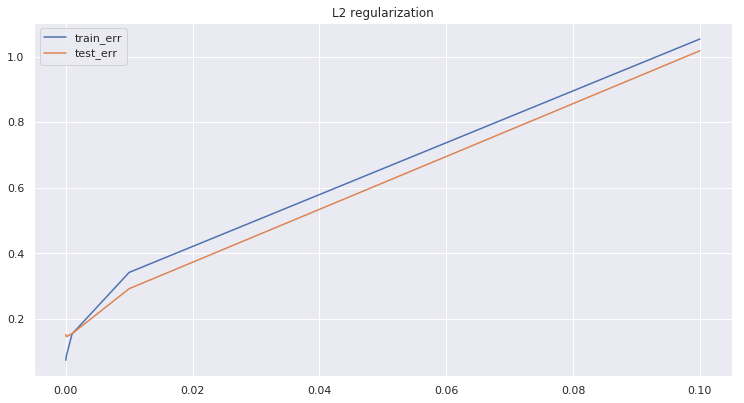

In [63]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(lambdas, tr_losses)
ax.plot(lambdas, val_losses)
ax.legend(['train_err', 'test_err'])
ax.set_title("L2 regularization")

plt.show()

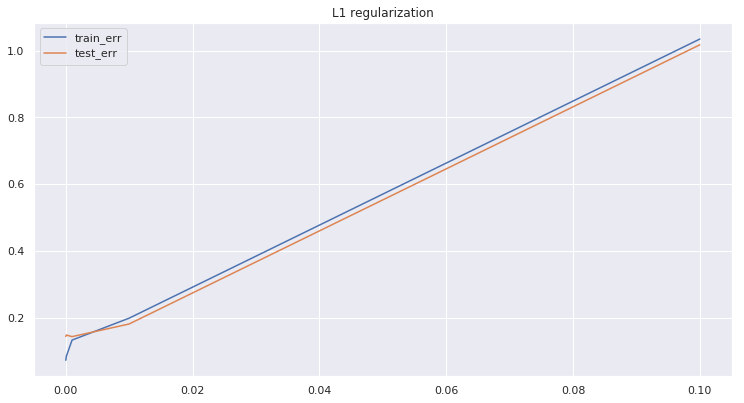

In [66]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(lambdas, tr_losses)
ax.plot(lambdas, val_losses)
ax.legend(['train_err', 'test_err'])
ax.set_title("L1 regularization")

plt.show()

### б) Исследование зависимости нормы вектора синаптических коэффициентов от параметра регуляризации

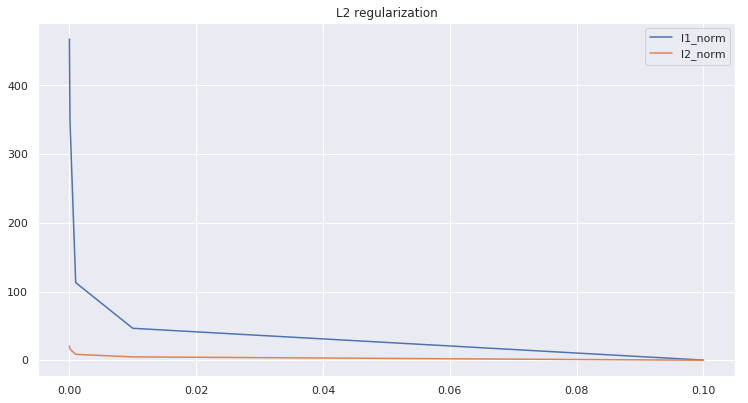

In [72]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(lambdas, l1_norm)
ax.plot(lambdas, l2_norm)
ax.legend(['l1_norm', 'l2_norm'])
ax.set_title("L2 regularization")

plt.show()

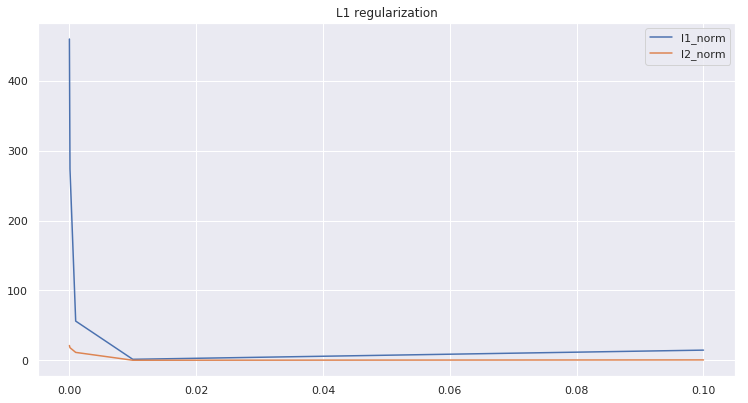

In [69]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(lambdas, l1_norm)
ax.plot(lambdas, l2_norm)
ax.legend(['l1_norm', 'l2_norm'])
ax.set_title("L1 regularization")

plt.show()

### в) Сравнение кривых обучения при различных значениях параметра регуляризации

In [42]:
_, _, global_l2, global_l1 = fit_reg_model(1)

Train on 703 samples, validate on 204 samples
Epoch 1/100
703/703 [==============================] - 0s 568us/sample - loss: 8.9838 - mean_squared_error: 2.2998 - val_loss: 1.4024 - val_mean_squared_error: 1.0647
Epoch 2/100
703/703 [==============================] - 0s 42us/sample - loss: 1.3549 - mean_squared_error: 1.2598 - val_loss: 1.1069 - val_mean_squared_error: 1.0916
Epoch 3/100
703/703 [==============================] - 0s 46us/sample - loss: 1.1737 - mean_squared_error: 1.1469 - val_loss: 1.6249 - val_mean_squared_error: 1.5177
Epoch 4/100
703/703 [==============================] - 0s 42us/sample - loss: 1.1579 - mean_squared_error: 1.1378 - val_loss: 1.0576 - val_mean_squared_error: 1.0407
Epoch 5/100
703/703 [==============================] - 0s 47us/sample - loss: 1.2530 - mean_squared_error: 1.2108 - val_loss: 1.2794 - val_mean_squared_error: 1.2258
Epoch 6/100
703/703 [==============================] - 0s 44us/sample - loss: 1.1387 - mean_squared_error: 1.1093 - val_los

Epoch 50/100
703/703 [==============================] - 0s 42us/sample - loss: 1.0585 - mean_squared_error: 1.0474 - val_loss: 1.0717 - val_mean_squared_error: 1.0610
Epoch 51/100
703/703 [==============================] - 0s 46us/sample - loss: 1.0698 - mean_squared_error: 1.0572 - val_loss: 1.1093 - val_mean_squared_error: 1.0383
Epoch 52/100
703/703 [==============================] - 0s 41us/sample - loss: 1.0680 - mean_squared_error: 1.0515 - val_loss: 1.0955 - val_mean_squared_error: 1.0553
Epoch 53/100
703/703 [==============================] - 0s 48us/sample - loss: 1.0543 - mean_squared_error: 1.0417 - val_loss: 1.0308 - val_mean_squared_error: 1.0302
Epoch 54/100
703/703 [==============================] - 0s 46us/sample - loss: 1.0430 - mean_squared_error: 1.0382 - val_loss: 1.0348 - val_mean_squared_error: 1.0188
Epoch 55/100
703/703 [==============================] - 0s 46us/sample - loss: 1.0626 - mean_squared_error: 1.0448 - val_loss: 1.0252 - val_mean_squared_error: 1.023

703/703 [==============================] - 0s 43us/sample - loss: 1.0481 - mean_squared_error: 1.0361 - val_loss: 1.0253 - val_mean_squared_error: 1.0252
Epoch 100/100
703/703 [==============================] - 0s 47us/sample - loss: 1.0538 - mean_squared_error: 1.0416 - val_loss: 1.0423 - val_mean_squared_error: 1.0423


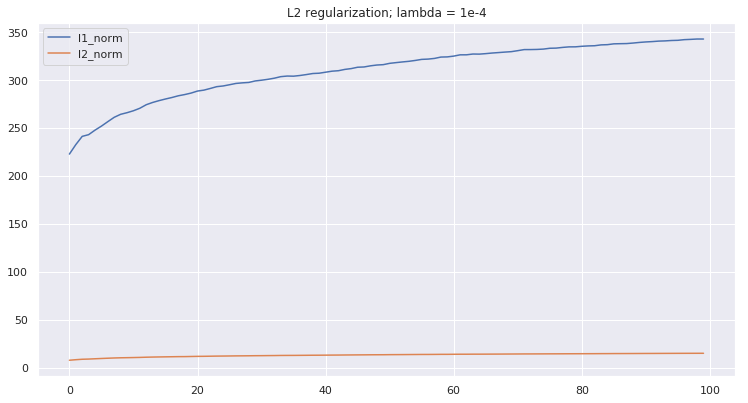

In [39]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(global_l1)), global_l1)
ax.plot(range(len(global_l2)), global_l2)
ax.legend(['l1_norm', 'l2_norm'])
ax.set_title("L2 regularization; lambda = 1e-4")

plt.show()

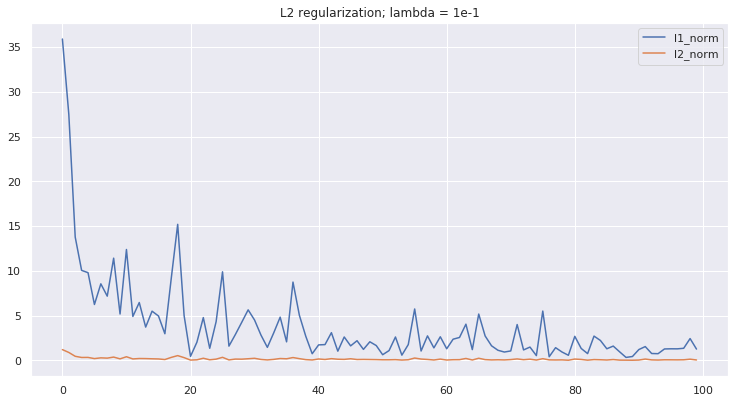

In [41]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(global_l1)), global_l1)
ax.plot(range(len(global_l2)), global_l2)
ax.legend(['l1_norm', 'l2_norm'])
ax.set_title("L2 regularization; lambda = 1e-1")

plt.show()

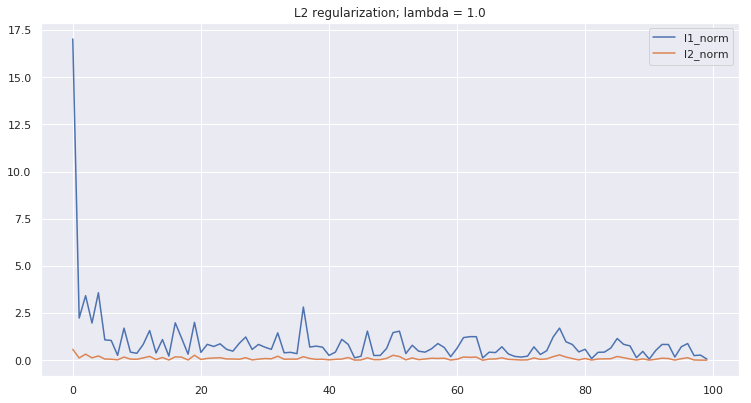

In [43]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(global_l1)), global_l1)
ax.plot(range(len(global_l2)), global_l2)
ax.legend(['l1_norm', 'l2_norm'])
ax.set_title("L2 regularization; lambda = 1.0")

plt.show()

### г) Выводы
В ходе анализа выяснили, что регуляризация для нашей модели не нужна. С увеличением параметра регуляризации норма вектора весов уменьшается быстрее и она в итоге меньше

## 4.16. Инъекция шума

## V. Исследование обученной нейросетевой модели

### а) Исследование зависимости качества обученной сети от параметра зашумления

In [53]:
from neupy import init
"""
    prepare computational graph
"""
#clear session to erase old computational graph
tf.keras.backend.clear_session()

X_train = tf.Variable(train_dset.X.values, dtype=tf.float32, trainable = False)
y_train = tf.Variable(train_dset.y.values, dtype=tf.float32, trainable = False)

X_test = tf.Variable(df.loc[test_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_test = tf.Variable(df.loc[test_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

X_val = tf.Variable(df.loc[val_inds].drop(['Concr_comp_str'], axis=1).values, dtype = tf.float32, trainable = False)
y_val = tf.Variable(df.loc[val_inds, 'Concr_comp_str'].values, dtype = tf.float32, trainable = False)

np.random.seed(221)

network = join(
    Input(8), 
    Sigmoid(30, weight = init.XavierNormal(seed = 221)),
    Sigmoid(30, weight = init.XavierNormal(seed = 221)),
    Linear(1, weight = init.XavierNormal(seed = 221)),
)

x = tf.placeholder(tf.float32, shape=(bs, X_train.shape[1]))
y = tf.placeholder(tf.float32, shape=(bs, ))

#input_noise = tf.random_normal(x.shape, stddev=0.01)
#training_output = network.output(x+input_noise, training=True)
training_output = network.output(x, training=True)
training_output = tf.reshape(training_output, shape = (bs, ))
loss = tf.keras.losses.MSE(y, training_output)

# next we will change only optimizer, i.e. next line
optimizer = tf.train.MomentumOptimizer(0.1, momentum=0.9)
gvs = optimizer.compute_gradients(loss)
gvs = [(grad + tf.random_normal(grad.shape, stddev=0.01), var) for grad, var in gvs]

apply_gr = optimizer.apply_gradients(gvs)
    
total_tr_output = network.output(X_train, training=False)
total_tr_output = tf.reshape(total_tr_output, shape = (X_train.shape[0], ))
tr_loss = tf.keras.losses.MSE(y_train, total_tr_output)

total_val_output = network.output(X_val, training=False)
total_val_output = tf.reshape(total_val_output, shape = (X_val.shape[0], ))
val_loss = tf.keras.losses.MSE(y_val, total_val_output)

total_test_output = network.output(X_test, training=False)
total_test_output = tf.reshape(total_test_output, shape = (X_test.shape[0], ))
test_loss = tf.keras.losses.MSE(y_test, total_test_output)

init = tf.global_variables_initializer()   

In [54]:
train_err = []
val_err = []

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        
        # The `iter_batches` function has to be defined by the user
        for _, (x_batch, y_batch) in enumerate(train_dset):
    
            #minimize loss, one step
            _ = sess.run([apply_gr], feed_dict={x: x_batch.values, y: y_batch.values})
            
        training_loss = sess.run(tr_loss)
        valid_loss = sess.run(val_loss)
        
        if valid_loss < 0.1:
            break
        
        train_err.append(training_loss)
        val_err.append(valid_loss)
        print('Training loss (epoch #{}): {:.6f}; Valid loss: {:.6f}'.format(epoch + 1, training_loss, valid_loss))
        
    test_loss = sess.run(test_loss)
    print('Test loss: {:.6f}'.format(test_loss))

Training loss (epoch #1): 1.089229; Valid loss: 1.089698
Training loss (epoch #2): 1.088443; Valid loss: 1.089080
Training loss (epoch #3): 1.068647; Valid loss: 1.067614
Training loss (epoch #4): 1.068355; Valid loss: 1.067611
Training loss (epoch #5): 1.047615; Valid loss: 1.048535
Training loss (epoch #6): 1.050797; Valid loss: 1.052004
Training loss (epoch #7): 1.023682; Valid loss: 1.024445
Training loss (epoch #8): 1.028194; Valid loss: 1.029467
Training loss (epoch #9): 0.997625; Valid loss: 0.999772
Training loss (epoch #10): 1.005980; Valid loss: 1.008533
Training loss (epoch #11): 0.969795; Valid loss: 0.972958
Training loss (epoch #12): 0.980449; Valid loss: 0.984321
Training loss (epoch #13): 0.939901; Valid loss: 0.943712
Training loss (epoch #14): 0.948848; Valid loss: 0.952833
Training loss (epoch #15): 0.904824; Valid loss: 0.910499
Training loss (epoch #16): 0.910175; Valid loss: 0.917300
Training loss (epoch #17): 0.863307; Valid loss: 0.869648
Training loss (epoch #1

Training loss (epoch #213): 0.158748; Valid loss: 0.190298
Training loss (epoch #214): 0.158490; Valid loss: 0.190500
Training loss (epoch #215): 0.158058; Valid loss: 0.189753
Training loss (epoch #216): 0.157769; Valid loss: 0.189369
Training loss (epoch #217): 0.157477; Valid loss: 0.189371
Training loss (epoch #218): 0.157235; Valid loss: 0.189161
Training loss (epoch #219): 0.157070; Valid loss: 0.188391
Training loss (epoch #220): 0.156796; Valid loss: 0.188800
Training loss (epoch #221): 0.156385; Valid loss: 0.188054
Training loss (epoch #222): 0.155907; Valid loss: 0.188243
Training loss (epoch #223): 0.155649; Valid loss: 0.188775
Training loss (epoch #224): 0.155429; Valid loss: 0.188554
Training loss (epoch #225): 0.155092; Valid loss: 0.189158
Training loss (epoch #226): 0.154780; Valid loss: 0.189323
Training loss (epoch #227): 0.154685; Valid loss: 0.189497
Training loss (epoch #228): 0.154541; Valid loss: 0.191041
Training loss (epoch #229): 0.154074; Valid loss: 0.1904

Training loss (epoch #398): 0.125939; Valid loss: 0.160318
Training loss (epoch #399): 0.125806; Valid loss: 0.161000
Training loss (epoch #400): 0.125747; Valid loss: 0.159971
Training loss (epoch #401): 0.125583; Valid loss: 0.161428
Training loss (epoch #402): 0.125455; Valid loss: 0.161093
Training loss (epoch #403): 0.125387; Valid loss: 0.163078
Training loss (epoch #404): 0.125521; Valid loss: 0.162435
Training loss (epoch #405): 0.125605; Valid loss: 0.164660
Training loss (epoch #406): 0.125275; Valid loss: 0.163383
Training loss (epoch #407): 0.124933; Valid loss: 0.164648
Training loss (epoch #408): 0.124451; Valid loss: 0.163206
Training loss (epoch #409): 0.124165; Valid loss: 0.163887
Training loss (epoch #410): 0.123917; Valid loss: 0.162804
Training loss (epoch #411): 0.123720; Valid loss: 0.162370
Training loss (epoch #412): 0.123639; Valid loss: 0.161840
Training loss (epoch #413): 0.123598; Valid loss: 0.161674
Training loss (epoch #414): 0.123633; Valid loss: 0.1623

Training loss (epoch #575): 0.111078; Valid loss: 0.154757
Training loss (epoch #576): 0.112167; Valid loss: 0.158510
Training loss (epoch #577): 0.111859; Valid loss: 0.155443
Training loss (epoch #578): 0.110479; Valid loss: 0.156612
Training loss (epoch #579): 0.109542; Valid loss: 0.155114
Training loss (epoch #580): 0.109606; Valid loss: 0.154826
Training loss (epoch #581): 0.109987; Valid loss: 0.156659
Training loss (epoch #582): 0.110347; Valid loss: 0.155431
Training loss (epoch #583): 0.110421; Valid loss: 0.158143
Training loss (epoch #584): 0.109945; Valid loss: 0.156120
Training loss (epoch #585): 0.109303; Valid loss: 0.157284
Training loss (epoch #586): 0.108953; Valid loss: 0.156159
Training loss (epoch #587): 0.108826; Valid loss: 0.155842
Training loss (epoch #588): 0.108926; Valid loss: 0.155867
Training loss (epoch #589): 0.109128; Valid loss: 0.154464
Training loss (epoch #590): 0.109090; Valid loss: 0.155117
Training loss (epoch #591): 0.108907; Valid loss: 0.1532

Training loss (epoch #748): 0.099391; Valid loss: 0.146025
Training loss (epoch #749): 0.098878; Valid loss: 0.147611
Training loss (epoch #750): 0.098549; Valid loss: 0.146795
Training loss (epoch #751): 0.098365; Valid loss: 0.147344
Training loss (epoch #752): 0.098511; Valid loss: 0.148965
Training loss (epoch #753): 0.098672; Valid loss: 0.148236
Training loss (epoch #754): 0.098497; Valid loss: 0.150007
Training loss (epoch #755): 0.098471; Valid loss: 0.148818
Training loss (epoch #756): 0.098205; Valid loss: 0.149647
Training loss (epoch #757): 0.098074; Valid loss: 0.149581
Training loss (epoch #758): 0.098189; Valid loss: 0.148305
Training loss (epoch #759): 0.098280; Valid loss: 0.150485
Training loss (epoch #760): 0.097977; Valid loss: 0.148037
Training loss (epoch #761): 0.097787; Valid loss: 0.149271
Training loss (epoch #762): 0.097809; Valid loss: 0.149914
Training loss (epoch #763): 0.097899; Valid loss: 0.149799
Training loss (epoch #764): 0.097802; Valid loss: 0.1510

Training loss (epoch #936): 0.088401; Valid loss: 0.151055
Training loss (epoch #937): 0.087621; Valid loss: 0.154105
Training loss (epoch #938): 0.087259; Valid loss: 0.152018
Training loss (epoch #939): 0.087445; Valid loss: 0.150517
Training loss (epoch #940): 0.088662; Valid loss: 0.155975
Training loss (epoch #941): 0.090994; Valid loss: 0.149417
Training loss (epoch #942): 0.094130; Valid loss: 0.164319
Training loss (epoch #943): 0.097469; Valid loss: 0.152244
Training loss (epoch #944): 0.099861; Valid loss: 0.172169
Training loss (epoch #945): 0.099591; Valid loss: 0.152924
Training loss (epoch #946): 0.099428; Valid loss: 0.171118
Training loss (epoch #947): 0.097735; Valid loss: 0.151043
Training loss (epoch #948): 0.095337; Valid loss: 0.164816
Training loss (epoch #949): 0.093029; Valid loss: 0.148500
Training loss (epoch #950): 0.090848; Valid loss: 0.158470
Training loss (epoch #951): 0.088724; Valid loss: 0.147962
Training loss (epoch #952): 0.087478; Valid loss: 0.1513

In [31]:
train_err = [0.11, 0.12, 0.50, 0.80, 1.12]
test_err = [0.12, 0.16, 0.40, 0.70, 0.90]
sigma = [0.01, 0.1, 1.0, 2.0, 5.0]

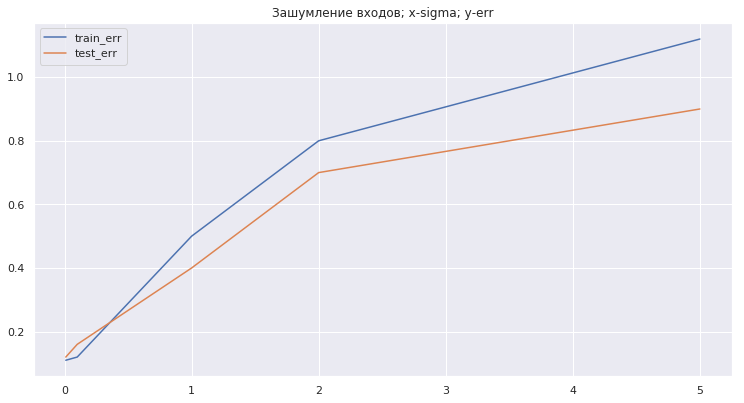

In [32]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(sigma, train_err)
ax.plot(sigma, test_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('Зашумление входов; x-sigma; y-err')

plt.show()

In [33]:
train_err = [0.05, 0.37, 6.10, 29.82, 125]
test_err = [0.07, 0.44, 7.32, 49.11, 95]
sigma = [0.01, 0.1, 1.0, 2.0, 5.0]

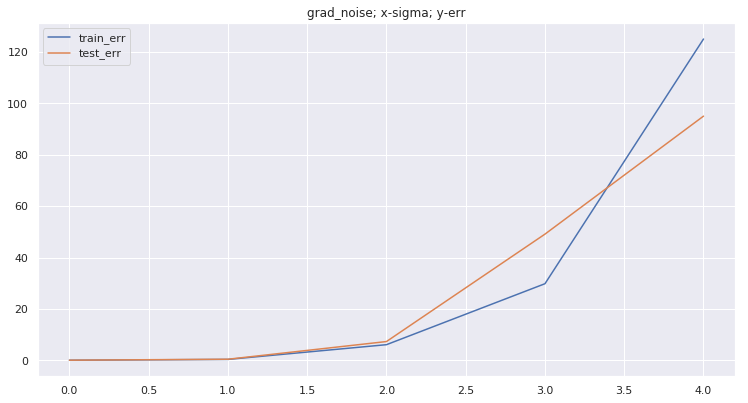

In [34]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(train_err)), train_err)
ax.plot(range(len(test_err)), test_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('grad_noise; x-sigma; y-err')

plt.show()

### б) Сравнение кривых обучения

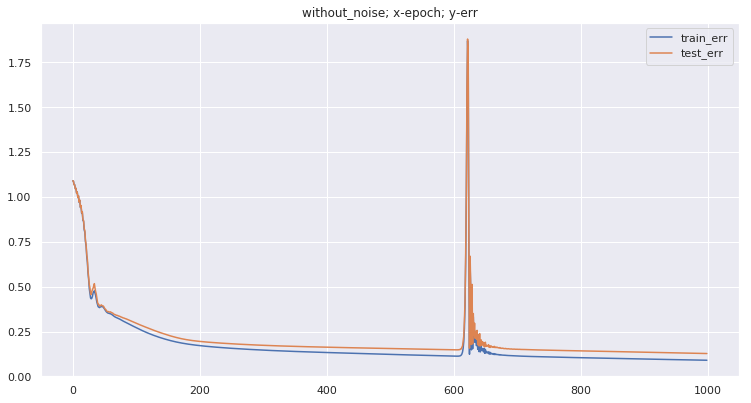

In [46]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(train_err)), train_err)
ax.plot(range(len(val_err)), val_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('without_noise; x-epoch; y-err')

plt.show()

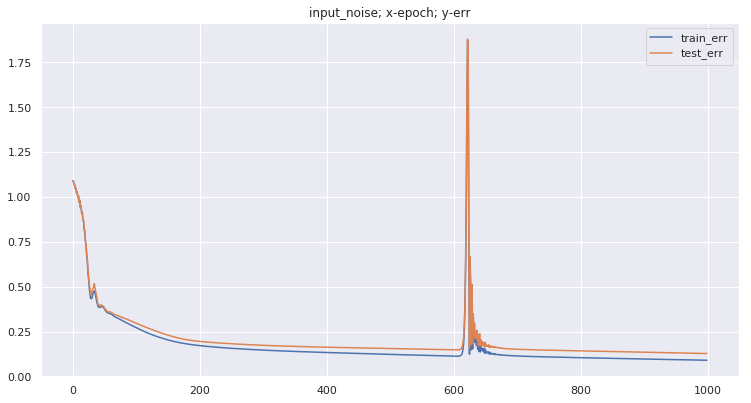

In [49]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(train_err)), train_err)
ax.plot(range(len(val_err)), val_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('input_noise; x-epoch; y-err')

plt.show()

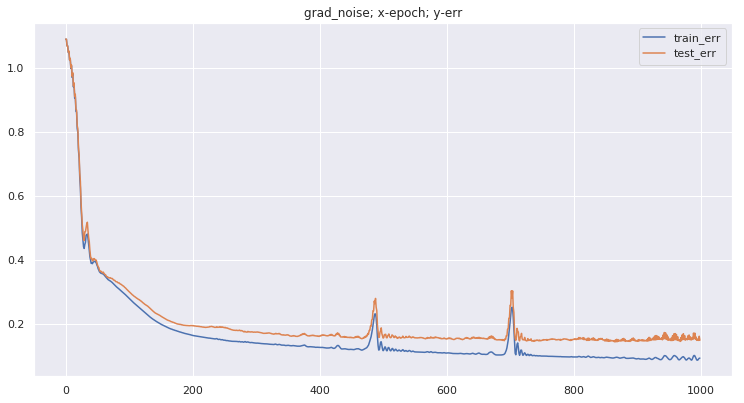

In [55]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(train_err)), train_err)
ax.plot(range(len(val_err)), val_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('grad_noise; x-epoch; y-err')

plt.show()

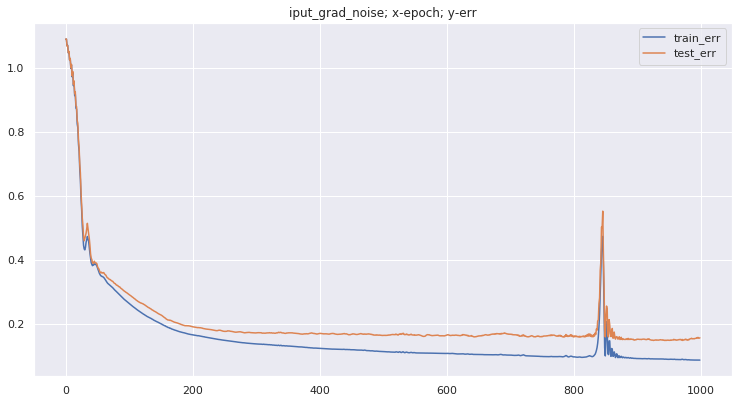

In [52]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)

ax.plot(range(len(train_err)), train_err)
ax.plot(range(len(val_err)), val_err)
ax.legend(['train_err', 'test_err'])
ax.set_title('iput_grad_noise; x-epoch; y-err')

plt.show()

### в) Выводы
Инъекции шума при большом сигма значително ухудшают модель, в то время как инъекции при небольшом сигма и во входные значения и в градиенты не повлияли особо на качество

# V. Исследование обученной нейросетевой модели

## 5.1.Исследование качества обученной модели

In [11]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(30, activation='sigmoid', input_shape=(8, )),
      tf.keras.layers.Dense(30, activation='sigmoid'),
      tf.keras.layers.Dense(1),
    ])
    
loss_fn = tf.keras.losses.MSE

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1, beta_1=0.8, beta_2=0.8),
                  loss=loss_fn,
                  metrics=['mse']
                  )
history_callback = model.fit(train_dset.X, train_dset.y, epochs=1000, validation_data=(X_val, y_val))

Train on 703 samples, validate on 204 samples
Epoch 1/1000
703/703 [==============================] - 0s 199us/sample - loss: 1.3132 - mean_squared_error: 1.3132 - val_loss: 0.5179 - val_mean_squared_error: 0.5179
Epoch 2/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.4131 - mean_squared_error: 0.4131 - val_loss: 0.2993 - val_mean_squared_error: 0.2993
Epoch 3/1000
703/703 [==============================] - 0s 40us/sample - loss: 0.2674 - mean_squared_error: 0.2674 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 4/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.3091 - val_mean_squared_error: 0.3091
Epoch 5/1000
703/703 [==============================] - 0s 44us/sample - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.2426 - val_mean_squared_error: 0.2426
Epoch 6/1000
703/703 [==============================] - 0s 41us/sample - loss: 0.1784 - mean_squared_error: 0.1784 - v

703/703 [==============================] - 0s 34us/sample - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 50/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.1801 - val_mean_squared_error: 0.1801
Epoch 51/1000
703/703 [==============================] - 0s 45us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1808 - val_mean_squared_error: 0.1808
Epoch 52/1000
703/703 [==============================] - 0s 42us/sample - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 53/1000
703/703 [==============================] - 0s 45us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 54/1000
703/703 [==============================] - 0s 43us/sample - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.1484 - val_mean_squared_error: 0.1484
Epoch 

Epoch 98/1000
703/703 [==============================] - 0s 33us/sample - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 99/1000
703/703 [==============================] - 0s 32us/sample - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 100/1000
703/703 [==============================] - 0s 33us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.1463 - val_mean_squared_error: 0.1463
Epoch 101/1000
703/703 [==============================] - 0s 33us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 102/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0674 - mean_squared_error: 0.0674 - val_loss: 0.1953 - val_mean_squared_error: 0.1953
Epoch 103/1000
703/703 [==============================] - 0s 32us/sample - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1354 - val_mean_squared_er

703/703 [==============================] - 0s 40us/sample - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.1699 - val_mean_squared_error: 0.1699
Epoch 147/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.1534 - val_mean_squared_error: 0.1534
Epoch 148/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.1662 - val_mean_squared_error: 0.1662
Epoch 149/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 150/1000
703/703 [==============================] - 0s 40us/sample - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 151/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0520 - mean_squared_error: 0.0520 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0475 - mean_squared_error: 0.0475 - val_loss: 0.1752 - val_mean_squared_error: 0.1752
Epoch 195/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.1912 - val_mean_squared_error: 0.1912
Epoch 196/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1800 - val_mean_squared_error: 0.1800
Epoch 197/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.1838 - val_mean_squared_error: 0.1838
Epoch 198/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0537 - mean_squared_error: 0.0537 - val_loss: 0.1843 - val_mean_squared_error: 0.1843
Epoch 199/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.1715 - val_mean_squared_error: 0.1715
E

703/703 [==============================] - 0s 37us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1453 - val_mean_squared_error: 0.1453
Epoch 243/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 244/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0494 - mean_squared_error: 0.0494 - val_loss: 0.1553 - val_mean_squared_error: 0.1553
Epoch 245/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1642 - val_mean_squared_error: 0.1642
Epoch 246/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.1376 - val_mean_squared_error: 0.1376
Epoch 247/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.1511 - val_mean_squared_error: 0.1511
E

703/703 [==============================] - 0s 41us/sample - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 291/1000
703/703 [==============================] - 0s 41us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 292/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 293/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 294/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 295/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.1440 - val_mean_squared_error: 0.1440
E

703/703 [==============================] - 0s 39us/sample - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.1417 - val_mean_squared_error: 0.1417
Epoch 339/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.1546 - val_mean_squared_error: 0.1546
Epoch 340/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.1561 - val_mean_squared_error: 0.1561
Epoch 341/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.1447 - val_mean_squared_error: 0.1447
Epoch 342/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 343/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
E

703/703 [==============================] - 0s 38us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 387/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 388/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 389/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.1686 - val_mean_squared_error: 0.1686
Epoch 390/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1428 - val_mean_squared_error: 0.1428
Epoch 391/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 435/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 436/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1686 - val_mean_squared_error: 0.1686
Epoch 437/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 438/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1630 - val_mean_squared_error: 0.1630
Epoch 439/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
E

703/703 [==============================] - 0s 42us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 483/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 484/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 485/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 486/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 487/1000
703/703 [==============================] - 0s 41us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.1472 - val_mean_squared_error: 0.1472
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 531/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 532/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.1477 - val_mean_squared_error: 0.1477
Epoch 533/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.1650 - val_mean_squared_error: 0.1650
Epoch 534/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 535/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1655 - val_mean_squared_error: 0.1655
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 579/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1750 - val_mean_squared_error: 0.1750
Epoch 580/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.1668 - val_mean_squared_error: 0.1668
Epoch 581/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.1398 - val_mean_squared_error: 0.1398
Epoch 582/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
Epoch 583/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.1828 - val_mean_squared_error: 0.1828
E

703/703 [==============================] - 0s 35us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 627/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1593 - val_mean_squared_error: 0.1593
Epoch 628/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 629/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.1416 - val_mean_squared_error: 0.1416
Epoch 630/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 631/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.1696 - val_mean_squared_error: 0.1696
E

703/703 [==============================] - 0s 37us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 675/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 676/1000
703/703 [==============================] - 0s 71us/sample - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.1372 - val_mean_squared_error: 0.1372
Epoch 677/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.1397 - val_mean_squared_error: 0.1397
Epoch 678/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1511 - val_mean_squared_error: 0.1511
Epoch 679/1000
703/703 [==============================] - 0s 39us/sample - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1502 - val_mean_squared_error: 0.1502
E

703/703 [==============================] - 0s 38us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.1583 - val_mean_squared_error: 0.1583
Epoch 723/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1559 - val_mean_squared_error: 0.1559
Epoch 724/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.1563 - val_mean_squared_error: 0.1563
Epoch 725/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.1628 - val_mean_squared_error: 0.1628
Epoch 726/1000
703/703 [==============================] - 0s 41us/sample - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 727/1000
703/703 [==============================] - 0s 40us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 771/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1455 - val_mean_squared_error: 0.1455
Epoch 772/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.1546 - val_mean_squared_error: 0.1546
Epoch 773/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 774/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 775/1000
703/703 [==============================] - 0s 38us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 819/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoch 820/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.1639 - val_mean_squared_error: 0.1639
Epoch 821/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.1749 - val_mean_squared_error: 0.1749
Epoch 822/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 823/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.1609 - val_mean_squared_error: 0.1609
E

703/703 [==============================] - 0s 35us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1542 - val_mean_squared_error: 0.1542
Epoch 867/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1786 - val_mean_squared_error: 0.1786
Epoch 868/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 869/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1727 - val_mean_squared_error: 0.1727
Epoch 870/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.1553 - val_mean_squared_error: 0.1553
Epoch 871/1000
703/703 [==============================] - 0s 34us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
E

703/703 [==============================] - 0s 36us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 915/1000
703/703 [==============================] - 0s 41us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 916/1000
703/703 [==============================] - 0s 40us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.1890 - val_mean_squared_error: 0.1890
Epoch 917/1000
703/703 [==============================] - 0s 44us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1825 - val_mean_squared_error: 0.1825
Epoch 918/1000
703/703 [==============================] - 0s 42us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 919/1000
703/703 [==============================] - 0s 35us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1768 - val_mean_squared_error: 0.1768
E

703/703 [==============================] - 0s 35us/sample - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.1879 - val_mean_squared_error: 0.1879
Epoch 963/1000
703/703 [==============================] - 0s 36us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.1385 - val_mean_squared_error: 0.1385
Epoch 964/1000
703/703 [==============================] - 0s 40us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 965/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 966/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 967/1000
703/703 [==============================] - 0s 37us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.1808 - val_mean_squared_error: 0.1808
E

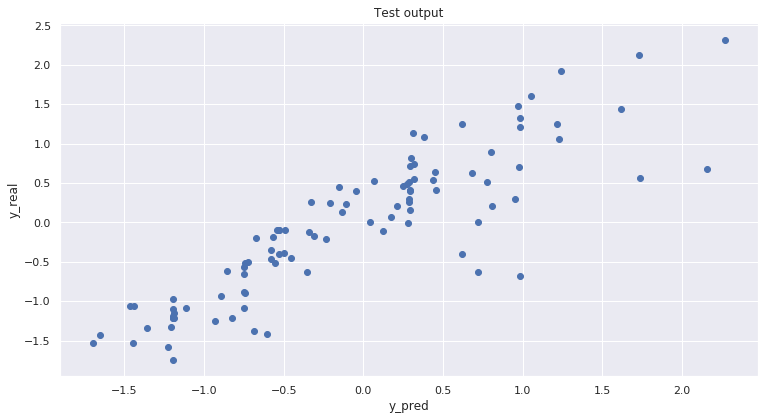

In [12]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)
ax.scatter(model.predict(X_test), y_test)
ax.set_xlabel("y_pred")
ax.set_ylabel("y_real")
ax.set_title('Test output')
plt.show()

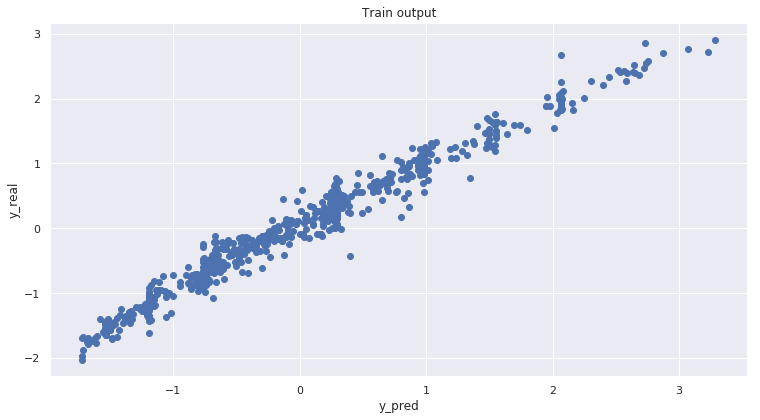

In [13]:
fig, ax =  plt.subplots(1)
fig.set_size_inches(12.5, 6.5)
ax.scatter(model.predict(train_dset.X), train_dset.y)
ax.set_xlabel("y_pred")
ax.set_ylabel("y_real")
ax.set_title('Train output')
plt.show()

In [14]:
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(model.predict(X_test), y_test)
print("r2_test: ", lin_reg.score(model.predict(X_test), y_test))

r2_test:  0.7624015602455607


test_errors hist

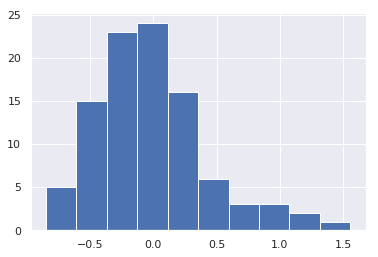

In [15]:
plt.hist(lin_reg.predict(model.predict(X_test)) - y_test)
plt.show()

In [16]:
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(model.predict(train_dset.X), train_dset.y)
print("r2_train: ", lin_reg.score(model.predict(train_dset.X), train_dset.y))

r2_train:  0.9709693823408534


train_errors hist

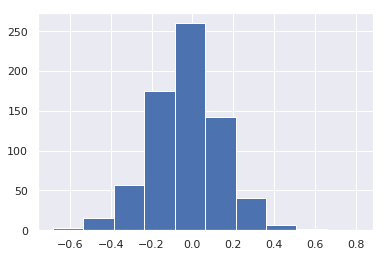

In [17]:
plt.hist(lin_reg.predict(model.predict(train_dset.X)) - train_dset.y)
plt.show()

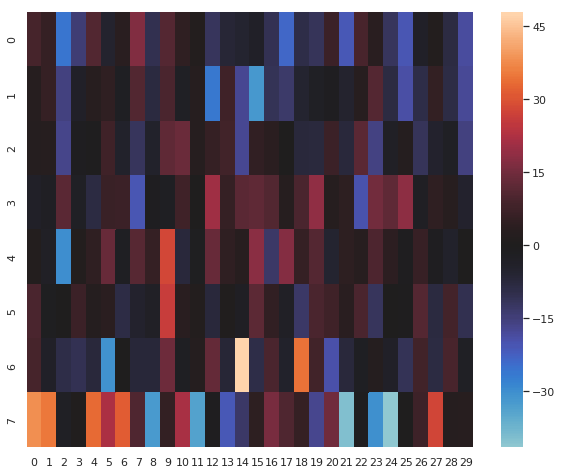

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(model.layers[0].get_weights()[0], center=0)
plt.show()

In [19]:
train_dset.X.columns

Index(['Cement', 'BLF', 'Fly_Ash', 'Water', 'Superpl', 'C_Aggr', 'F_Aggr',
       'Age'],
      dtype='object')

По heatmap видно, что все признаки в какой-то степени значимы.

### 5.3. Выводы
Модель нейросети применима в рамках данной задачи r2 = 0.97 на train и 0.76 на test. Остатки модели на вид имеют нормальное распределение, значит полученные нами оценки можно назвать хорошими с точки зрения гипотезы максимального правдоподобия. Модель достаточно качественная и применимая в данной задаче.